In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from tqdm import tqdm
import os

In [2]:
NPI_COLS = ['C1_School closing',
            'C2_Workplace closing',
            'C3_Cancel public events',
            'C4_Restrictions on gatherings',
            'C5_Close public transport',
            'C6_Stay at home requirements',
            'C7_Restrictions on internal movement',
            'C8_International travel controls',
            'H1_Public information campaigns',
            'H2_Testing policy',
            'H3_Contact tracing',
            'H6_Facial Coverings']

In [3]:
NPI_values = [[0,1,2,3],
             [0,1,2,3],
             [0,1,2],
             [0,1,2,3,4],
             [0,1,2],
             [0,1,2,3],
             [0,1,2],
             [0,1,2,3,4],
             [0,1,2],
             [0,1,2,3],
             [0,1,2],
             [0,1,2,3,4]]


In [4]:
from itertools import combinations, permutations, product

In [5]:
res = list(product(range(0, 2), repeat = 12)) 

In [6]:
res[0]

(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

In [7]:
col_names = ['PrescriptionIndex', 'CountryName', 'RegionName', 'Date'] + NPI_COLS

In [8]:
(pd.to_datetime('2020-08-01') + pd.Timedelta(days=1)).date()

datetime.date(2020, 8, 2)

In [66]:
# ip_df_dict = {}
# for i in tqdm(range(len(res))):
#     ip_df_tmp = pd.DataFrame()
#     row_values = []
#     for j in range(5):
#         row_values.append([0, 'Canada', np.nan, (pd.to_datetime('2020-08-01') + pd.Timedelta(days=j)).date()] + list(res[i]))
#     ip_df_dict[i] = ip_df_tmp.append(row_values)
#     ip_df_dict[i].columns = col_names
    
# # row_values = [[0, 'Canada', '', '2020-08-01'] + list(res[0])]

100%|██████████| 4096/4096 [00:13<00:00, 306.83it/s]


In [72]:
import pickle
with open('ip_df_dict.pickle', 'wb') as file:
    pickle.dump(ip_df_dict, file)

In [ ]:
with open('ip_df_dict.pickle', 'rb') as file:
    ip_df_dict = pickle.load(file)

In [67]:
ip_df_dict[0]

,PrescriptionIndex,CountryName,RegionName,Date,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H6_Facial Coverings
0,0,Canada,NaN,2020-08-01,0,0,0,0,0,0,0,0,0,0,0,0
1,0,Canada,NaN,2020-08-02,0,0,0,0,0,0,0,0,0,0,0,0
2,0,Canada,NaN,2020-08-03,0,0,0,0,0,0,0,0,0,0,0,0
3,0,Canada,NaN,2020-08-04,0,0,0,0,0,0,0,0,0,0,0,0
4,0,Canada,NaN,2020-08-05,0,0,0,0,0,0,0,0,0,0,0,0


# Prepare Historical IP

In [12]:
from covid_xprize.scoring.predictor_scoring import load_dataset
from covid_xprize.validation.scenario_generator import generate_scenario

LATEST_DATA_URL = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv'
GEO_FILE = "countries_regions.csv"

latest_df = load_dataset(LATEST_DATA_URL, GEO_FILE)

Using TensorFlow backend.
/Users/chang/anaconda/envs/python3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/chang/anaconda/envs/python3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/chang/anaconda/envs/python3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/chang/a

In [61]:
costs_file = TEST_COST

# Load prescriptions
#     pres_df = pd.read_csv(prescription_file)
pres_df = ip_df_dict[prescription_file_index]

# Generate predictions for all prescriptions
pred_dfs = []
for idx in pres_df['PrescriptionIndex'].unique():
    idx_df = pres_df[pres_df['PrescriptionIndex'] == idx]
    idx_df = idx_df.drop(columns='PrescriptionIndex') # Predictor doesn't need this
    ip_file_path = 'prescriptions/prescription_{}.csv'.format(idx)
    os.makedirs(os.path.dirname(ip_file_path), exist_ok=True)
    idx_df.to_csv(ip_file_path)
    preds_file_path = 'predictions/predictions_{}.csv'.format(idx)
    os.makedirs(os.path.dirname(preds_file_path), exist_ok=True)

    # Run predictor
    !python covid_xprize/standard_predictor/predict.py -s $START_DATE -e $END_DATE -ip $ip_file_path -o $preds_file_path

    # Collect predictions
    pred_df = pd.read_csv(preds_file_path,                                                               
                          parse_dates=['Date'],
                          encoding="ISO-8859-1",
                          error_bad_lines=True)
    pred_df['PrescriptionIndex'] = idx
    pred_dfs.append(pred_df)
pred_df = pd.concat(pred_dfs)

# Aggregate cases by prescription index and geo
agg_pred_df = pred_df.groupby(['CountryName', 
                               'RegionName', 
                               'PrescriptionIndex'], dropna=False).mean().reset_index()

# Load IP cost weights
cost_df = pd.read_csv(costs_file)

# Only use costs of geos we've predicted for
cost_df = cost_df[cost_df.CountryName.isin(agg_pred_df.CountryName) &
                  cost_df.RegionName.isin(agg_pred_df.RegionName)]

# # Apply weights to prescriptions
# pres_df = weight_prescriptions_by_cost(pres_df, cost_df)

# # Aggregate stringency across npis
# pres_df['Stringency'] = pres_df[NPI_COLS].sum(axis=1)

# # Aggregate stringency by prescription index and geo
# agg_pres_df = pres_df.groupby(['CountryName', 
#                                'RegionName', 
#                                'PrescriptionIndex'], dropna=False).mean().reset_index()

Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


In [108]:
cost_df

,CountryName,RegionName,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H6_Facial Coverings
30,Canada,NaN,0.92,0.03,0.68,1.41,1.58,1.41,1.25,1.44,0.85,0.46,0.76,1.21


In [62]:
pres_df

,PrescriptionIndex,CountryName,RegionName,Date,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H6_Facial Coverings
0,0,Canada,,2020-08-01,0,0,0,0,0,0,0,0,0,0,0,0
1,0,Canada,,2020-08-02,0,0,0,0,0,0,0,0,0,0,0,0
2,0,Canada,,2020-08-03,0,0,0,0,0,0,0,0,0,0,0,0
3,0,Canada,,2020-08-04,0,0,0,0,0,0,0,0,0,0,0,0
4,0,Canada,,2020-08-05,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
weighted_df = pres_df.merge(cost_df, how='outer', on=['CountryName', 'RegionName'], suffixes=('_pres', '_cost'))
# for npi_col in NPI_COLS:
#     weighted_df[npi_col] = weighted_df[npi_col + '_pres'] * weighted_df[npi_col + '_cost']
# return weighted_df

In [65]:
cost_df

,CountryName,RegionName,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H6_Facial Coverings
30,Canada,NaN,0.92,0.03,0.68,1.41,1.58,1.41,1.25,1.44,0.85,0.46,0.76,1.21


In [50]:
cost_df

,CountryName,RegionName,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H6_Facial Coverings
30,Canada,NaN,0.92,0.03,0.68,1.41,1.58,1.41,1.25,1.44,0.85,0.46,0.76,1.21


In [48]:
agg_pres_df

,CountryName,RegionName,PrescriptionIndex,C1_School closing_pres,C2_Workplace closing_pres,C3_Cancel public events_pres,C4_Restrictions on gatherings_pres,C5_Close public transport_pres,C6_Stay at home requirements_pres,C7_Restrictions on internal movement_pres,...,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H6_Facial Coverings,Stringency
0,Canada,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [68]:
def weight_prescriptions_by_cost(pres_df, cost_df):
    """
    Weight prescriptions by their costs.
    """
    weighted_df = pres_df.merge(cost_df, how='outer', on=['CountryName', 'RegionName'], suffixes=('_pres', '_cost'))
    for npi_col in NPI_COLS:
        weighted_df[npi_col] = weighted_df[npi_col + '_pres'] * weighted_df[npi_col + '_cost']
    return weighted_df


def generate_cases_and_stringency_for_prescriptions(
        prescription_file_index, costs_file):
    
    # Load prescriptions
#     pres_df = pd.read_csv(prescription_file)
    pres_df = ip_df_dict[prescription_file_index]
    
    # Generate predictions for all prescriptions
    pred_dfs = []
    for idx in pres_df['PrescriptionIndex'].unique():
        idx_df = pres_df[pres_df['PrescriptionIndex'] == idx]
        idx_df = idx_df.drop(columns='PrescriptionIndex') # Predictor doesn't need this
        ip_file_path = 'prescriptions/prescription_{}.csv'.format(idx)
        os.makedirs(os.path.dirname(ip_file_path), exist_ok=True)
        idx_df.to_csv(ip_file_path)
        preds_file_path = 'predictions/predictions_{}.csv'.format(idx)
        os.makedirs(os.path.dirname(preds_file_path), exist_ok=True)
        
        # Run predictor
        !python covid_xprize/standard_predictor/predict.py -s $START_DATE -e $END_DATE -ip $ip_file_path -o $preds_file_path
        
        # Collect predictions
        pred_df = pd.read_csv(preds_file_path,                                                               
                              parse_dates=['Date'],
                              encoding="ISO-8859-1",
                              error_bad_lines=True)
        pred_df['PrescriptionIndex'] = idx
        pred_dfs.append(pred_df)
    pred_df = pd.concat(pred_dfs)
    
    # Aggregate cases by prescription index and geo
    agg_pred_df = pred_df.groupby(['CountryName', 
                                   'RegionName', 
                                   'PrescriptionIndex'], dropna=False).mean().reset_index()

    # Load IP cost weights
    cost_df = pd.read_csv(costs_file)
    
    # Only use costs of geos we've predicted for
    cost_df = cost_df[cost_df.CountryName.isin(agg_pred_df.CountryName) &
                      cost_df.RegionName.isin(agg_pred_df.RegionName)]
    
    # Apply weights to prescriptions
    pres_df = weight_prescriptions_by_cost(pres_df, cost_df)
    
    # Aggregate stringency across npis
    pres_df['Stringency'] = pres_df[NPI_COLS].sum(axis=1)
    
    # Aggregate stringency by prescription index and geo
    agg_pres_df = pres_df.groupby(['CountryName', 
                                   'RegionName', 
                                   'PrescriptionIndex'], dropna=False).mean().reset_index()
    
#     agg_pres_df.PrescriptionIndex.astype(int)
#     agg_pred_df.PrescriptionIndex.astype(int)
    
    # Combine stringency and cases into a single df
    df = agg_pres_df.merge(agg_pred_df, how='outer', on=['CountryName', 
                                                         'RegionName', 
                                                         'PrescriptionIndex'])

    # Only keep columns of interest
    df = df[['CountryName', 
             'RegionName', 
             'PrescriptionIndex', 
             'PredictedDailyNewCases', 
             'Stringency']]
    
    # only keep canada for testing purpose
    df = df[df['CountryName'] == 'Canada']
    
    return df

In [15]:
# Cost weightings for each IP for each geo
TEST_COST = "covid_xprize/validation/data/uniform_random_costs.csv"

In [41]:
# Can set these longer for better evaluation. Will increase eval time
START_DATE = "2020-08-01"
END_DATE = "2020-08-05"

In [73]:
# Collect case and stringency data for all prescriptors
dfs = []
for prescription_file_index in tqdm(ip_df_dict.keys()):
    print("Generating predictions for", prescription_file_index)
    df = generate_cases_and_stringency_for_prescriptions(prescription_file_index, TEST_COST)
    df['PrescriptorName'] = prescription_file_index
    dfs.append(df)
#     print(prescription_file_index)
#     break
df = pd.concat(dfs)
df.to_csv('canada_test_output.csv', index=False)

  0%|          | 0/4096 [00:00<?, ?it/s]

Generating predictions for 0
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  0%|          | 1/4096 [00:08<9:18:19,  8.18s/it]

Generating predictions for 1
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  0%|          | 2/4096 [00:16<9:15:13,  8.14s/it]

Generating predictions for 2
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  0%|          | 3/4096 [00:24<9:14:39,  8.13s/it]

Generating predictions for 3
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  0%|          | 4/4096 [00:32<9:18:55,  8.20s/it]

Generating predictions for 4
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  0%|          | 5/4096 [00:41<9:23:13,  8.26s/it]

Generating predictions for 5
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  0%|          | 6/4096 [00:50<9:42:27,  8.54s/it]

Generating predictions for 6
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  0%|          | 7/4096 [00:59<9:50:46,  8.67s/it]

Generating predictions for 7
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  0%|          | 8/4096 [01:07<9:41:37,  8.54s/it]

Generating predictions for 8
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  0%|          | 9/4096 [01:15<9:36:29,  8.46s/it]

Generating predictions for 9
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  0%|          | 10/4096 [01:24<9:37:30,  8.48s/it]

Generating predictions for 10
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  0%|          | 11/4096 [01:32<9:38:12,  8.49s/it]

Generating predictions for 11
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  0%|          | 12/4096 [01:44<10:37:57,  9.37s/it]

Generating predictions for 12
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  0%|          | 13/4096 [01:52<10:19:27,  9.10s/it]

Generating predictions for 13
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  0%|          | 14/4096 [02:01<10:08:53,  8.95s/it]

Generating predictions for 14
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  0%|          | 15/4096 [02:09<9:47:29,  8.64s/it] 

Generating predictions for 15
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  0%|          | 16/4096 [02:17<9:30:26,  8.39s/it]

Generating predictions for 16
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  0%|          | 17/4096 [02:24<9:18:45,  8.22s/it]

Generating predictions for 17
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  0%|          | 18/4096 [02:33<9:27:10,  8.34s/it]

Generating predictions for 18
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  0%|          | 19/4096 [02:41<9:20:41,  8.25s/it]

Generating predictions for 19
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  0%|          | 20/4096 [02:50<9:26:02,  8.33s/it]

Generating predictions for 20
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|          | 21/4096 [02:58<9:34:35,  8.46s/it]

Generating predictions for 21
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|          | 22/4096 [03:06<9:26:31,  8.34s/it]

Generating predictions for 22
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|          | 23/4096 [03:14<9:19:25,  8.24s/it]

Generating predictions for 23
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|          | 24/4096 [03:22<9:08:14,  8.08s/it]

Generating predictions for 24
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|          | 25/4096 [03:30<9:07:14,  8.07s/it]

Generating predictions for 25
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|          | 26/4096 [03:38<9:03:38,  8.01s/it]

Generating predictions for 26
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|          | 27/4096 [03:46<9:01:48,  7.99s/it]

Generating predictions for 27
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|          | 28/4096 [03:54<9:02:49,  8.01s/it]

Generating predictions for 28
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|          | 29/4096 [04:02<9:03:15,  8.01s/it]

Generating predictions for 29
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|          | 30/4096 [04:10<8:55:33,  7.90s/it]

Generating predictions for 30
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|          | 31/4096 [04:17<8:48:06,  7.80s/it]

Generating predictions for 31
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|          | 32/4096 [04:25<8:38:15,  7.65s/it]

Generating predictions for 32
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|          | 33/4096 [04:32<8:29:31,  7.52s/it]

Generating predictions for 33
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|          | 34/4096 [04:39<8:27:21,  7.49s/it]

Generating predictions for 34
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|          | 35/4096 [04:47<8:33:41,  7.59s/it]

Generating predictions for 35
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|          | 36/4096 [04:54<8:28:58,  7.52s/it]

Generating predictions for 36
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|          | 37/4096 [05:02<8:22:29,  7.43s/it]

Generating predictions for 37
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|          | 38/4096 [05:09<8:18:47,  7.38s/it]

Generating predictions for 38
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|          | 39/4096 [05:16<8:18:03,  7.37s/it]

Generating predictions for 39
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|          | 40/4096 [05:23<8:14:52,  7.32s/it]

Generating predictions for 40
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|          | 41/4096 [05:31<8:12:10,  7.28s/it]

Generating predictions for 41
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|          | 42/4096 [05:38<8:10:28,  7.26s/it]

Generating predictions for 42
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|          | 43/4096 [05:45<8:08:10,  7.23s/it]

Generating predictions for 43
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|          | 44/4096 [05:52<8:06:38,  7.21s/it]

Generating predictions for 44
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|          | 45/4096 [05:59<8:06:36,  7.21s/it]

Generating predictions for 45
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|          | 46/4096 [06:06<8:06:23,  7.21s/it]

Generating predictions for 46
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|          | 47/4096 [06:14<8:05:47,  7.20s/it]

Generating predictions for 47
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|          | 48/4096 [06:21<8:05:29,  7.20s/it]

Generating predictions for 48
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|          | 49/4096 [06:28<8:03:47,  7.17s/it]

Generating predictions for 49
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|          | 50/4096 [06:35<8:04:02,  7.18s/it]

Generating predictions for 50
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|          | 51/4096 [06:42<8:05:55,  7.21s/it]

Generating predictions for 51
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|▏         | 52/4096 [06:50<8:05:16,  7.20s/it]

Generating predictions for 52
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|▏         | 53/4096 [06:57<8:04:37,  7.19s/it]

Generating predictions for 53
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|▏         | 54/4096 [07:04<8:03:48,  7.18s/it]

Generating predictions for 54
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|▏         | 55/4096 [07:11<8:04:04,  7.19s/it]

Generating predictions for 55
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|▏         | 56/4096 [07:18<8:03:22,  7.18s/it]

Generating predictions for 56
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|▏         | 57/4096 [07:25<8:02:12,  7.16s/it]

Generating predictions for 57
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|▏         | 58/4096 [07:33<8:01:59,  7.16s/it]

Generating predictions for 58
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|▏         | 59/4096 [07:40<8:01:49,  7.16s/it]

Generating predictions for 59
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|▏         | 60/4096 [07:47<8:01:41,  7.16s/it]

Generating predictions for 60
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  1%|▏         | 61/4096 [07:54<8:02:38,  7.18s/it]

Generating predictions for 61
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 62/4096 [08:01<8:01:36,  7.16s/it]

Generating predictions for 62
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 63/4096 [08:08<8:02:30,  7.18s/it]

Generating predictions for 63
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 64/4096 [08:16<8:02:16,  7.18s/it]

Generating predictions for 64
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 65/4096 [08:23<8:02:50,  7.19s/it]

Generating predictions for 65
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 66/4096 [08:30<8:01:27,  7.17s/it]

Generating predictions for 66
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 67/4096 [08:37<8:00:42,  7.16s/it]

Generating predictions for 67
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 68/4096 [08:44<8:00:51,  7.16s/it]

Generating predictions for 68
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 69/4096 [08:51<8:00:12,  7.15s/it]

Generating predictions for 69
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 70/4096 [08:59<8:00:15,  7.16s/it]

Generating predictions for 70
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 71/4096 [09:06<7:59:23,  7.15s/it]

Generating predictions for 71
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 72/4096 [09:13<7:59:16,  7.15s/it]

Generating predictions for 72
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 73/4096 [09:20<7:59:55,  7.16s/it]

Generating predictions for 73
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 74/4096 [09:27<7:59:52,  7.16s/it]

Generating predictions for 74
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 75/4096 [09:34<7:59:14,  7.15s/it]

Generating predictions for 75
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 76/4096 [09:42<7:59:50,  7.16s/it]

Generating predictions for 76
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 77/4096 [09:49<8:00:28,  7.17s/it]

Generating predictions for 77
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 78/4096 [09:56<8:01:04,  7.18s/it]

Generating predictions for 78
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 79/4096 [10:03<8:01:01,  7.18s/it]

Generating predictions for 79
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 80/4096 [10:10<8:01:20,  7.19s/it]

Generating predictions for 80
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 81/4096 [10:18<8:01:24,  7.19s/it]

Generating predictions for 81
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 82/4096 [10:25<8:00:14,  7.18s/it]

Generating predictions for 82
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 83/4096 [10:32<7:59:47,  7.17s/it]

Generating predictions for 83
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 84/4096 [10:39<7:59:20,  7.17s/it]

Generating predictions for 84
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 85/4096 [10:46<7:58:48,  7.16s/it]

Generating predictions for 85
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 86/4096 [10:53<7:59:01,  7.17s/it]

Generating predictions for 86
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 87/4096 [11:01<7:59:37,  7.18s/it]

Generating predictions for 87
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 88/4096 [11:08<7:59:14,  7.17s/it]

Generating predictions for 88
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 89/4096 [11:15<7:58:31,  7.17s/it]

Generating predictions for 89
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 90/4096 [11:22<7:57:49,  7.16s/it]

Generating predictions for 90
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 91/4096 [11:29<7:57:49,  7.16s/it]

Generating predictions for 91
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 92/4096 [11:36<7:57:27,  7.15s/it]

Generating predictions for 92
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 93/4096 [11:43<7:58:00,  7.16s/it]

Generating predictions for 93
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 94/4096 [11:51<7:58:19,  7.17s/it]

Generating predictions for 94
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 95/4096 [11:58<7:58:17,  7.17s/it]

Generating predictions for 95
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 96/4096 [12:05<7:58:52,  7.18s/it]

Generating predictions for 96
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 97/4096 [12:12<7:59:56,  7.20s/it]

Generating predictions for 97
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 98/4096 [12:20<8:01:00,  7.22s/it]

Generating predictions for 98
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 99/4096 [12:27<8:01:24,  7.23s/it]

Generating predictions for 99
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 100/4096 [12:34<8:00:04,  7.21s/it]

Generating predictions for 100
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 101/4096 [12:41<7:59:16,  7.20s/it]

Generating predictions for 101
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  2%|▏         | 102/4096 [12:48<7:58:34,  7.19s/it]

Generating predictions for 102
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 103/4096 [12:55<7:58:02,  7.18s/it]

Generating predictions for 103
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 104/4096 [13:03<7:57:25,  7.18s/it]

Generating predictions for 104
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 105/4096 [13:10<7:56:49,  7.17s/it]

Generating predictions for 105
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 106/4096 [13:17<7:57:16,  7.18s/it]

Generating predictions for 106
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 107/4096 [13:24<7:56:32,  7.17s/it]

Generating predictions for 107
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 108/4096 [13:31<7:56:01,  7.16s/it]

Generating predictions for 108
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 109/4096 [13:38<7:55:24,  7.15s/it]

Generating predictions for 109
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 110/4096 [13:46<7:56:05,  7.17s/it]

Generating predictions for 110
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 111/4096 [13:53<7:56:12,  7.17s/it]

Generating predictions for 111
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 112/4096 [14:00<7:56:24,  7.17s/it]

Generating predictions for 112
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 113/4096 [14:07<7:57:02,  7.19s/it]

Generating predictions for 113
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 114/4096 [14:14<7:57:01,  7.19s/it]

Generating predictions for 114
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 115/4096 [14:22<7:56:56,  7.19s/it]

Generating predictions for 115
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 116/4096 [14:29<7:56:32,  7.18s/it]

Generating predictions for 116
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 117/4096 [14:36<7:56:05,  7.18s/it]

Generating predictions for 117
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 118/4096 [14:43<7:55:18,  7.17s/it]

Generating predictions for 118
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 119/4096 [14:50<7:56:14,  7.19s/it]

Generating predictions for 119
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 120/4096 [14:57<7:55:33,  7.18s/it]

Generating predictions for 120
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 121/4096 [15:05<7:55:16,  7.17s/it]

Generating predictions for 121
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 122/4096 [15:12<7:56:00,  7.19s/it]

Generating predictions for 122
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 123/4096 [15:19<7:56:03,  7.19s/it]

Generating predictions for 123
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 124/4096 [15:26<7:55:55,  7.19s/it]

Generating predictions for 124
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 125/4096 [15:33<7:55:33,  7.19s/it]

Generating predictions for 125
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 126/4096 [15:41<7:55:08,  7.18s/it]

Generating predictions for 126
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 127/4096 [15:48<7:54:27,  7.17s/it]

Generating predictions for 127
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 128/4096 [15:55<7:54:59,  7.18s/it]

Generating predictions for 128
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 129/4096 [16:02<7:55:06,  7.19s/it]

Generating predictions for 129
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 130/4096 [16:09<7:56:20,  7.21s/it]

Generating predictions for 130
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 131/4096 [16:17<7:55:57,  7.20s/it]

Generating predictions for 131
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 132/4096 [16:24<7:55:24,  7.20s/it]

Generating predictions for 132
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 133/4096 [16:31<7:54:26,  7.18s/it]

Generating predictions for 133
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 134/4096 [16:38<7:55:41,  7.20s/it]

Generating predictions for 134
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 135/4096 [16:45<7:55:19,  7.20s/it]

Generating predictions for 135
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 136/4096 [16:52<7:54:44,  7.19s/it]

Generating predictions for 136
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 137/4096 [17:00<7:54:21,  7.19s/it]

Generating predictions for 137
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 138/4096 [17:07<7:55:09,  7.20s/it]

Generating predictions for 138
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 139/4096 [17:14<7:55:51,  7.22s/it]

Generating predictions for 139
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 140/4096 [17:21<7:54:44,  7.20s/it]

Generating predictions for 140
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 141/4096 [17:28<7:54:13,  7.19s/it]

Generating predictions for 141
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 142/4096 [17:36<7:53:30,  7.19s/it]

Generating predictions for 142
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  3%|▎         | 143/4096 [17:43<7:52:42,  7.17s/it]

Generating predictions for 143
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▎         | 144/4096 [17:50<7:52:41,  7.18s/it]

Generating predictions for 144
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▎         | 145/4096 [17:57<7:52:38,  7.18s/it]

Generating predictions for 145
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▎         | 146/4096 [18:04<7:54:06,  7.20s/it]

Generating predictions for 146
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▎         | 147/4096 [18:12<7:53:52,  7.20s/it]

Generating predictions for 147
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▎         | 148/4096 [18:19<7:55:00,  7.22s/it]

Generating predictions for 148
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▎         | 149/4096 [18:26<7:54:37,  7.22s/it]

Generating predictions for 149
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▎         | 150/4096 [18:33<7:54:10,  7.21s/it]

Generating predictions for 150
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▎         | 151/4096 [18:40<7:53:17,  7.20s/it]

Generating predictions for 151
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▎         | 152/4096 [18:48<7:52:56,  7.19s/it]

Generating predictions for 152
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▎         | 153/4096 [18:55<7:52:24,  7.19s/it]

Generating predictions for 153
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▍         | 154/4096 [19:02<7:51:27,  7.18s/it]

Generating predictions for 154
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▍         | 155/4096 [19:09<7:50:38,  7.17s/it]

Generating predictions for 155
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▍         | 156/4096 [19:16<7:54:21,  7.22s/it]

Generating predictions for 156
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▍         | 157/4096 [19:24<7:55:07,  7.24s/it]

Generating predictions for 157
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▍         | 158/4096 [19:31<7:52:18,  7.20s/it]

Generating predictions for 158
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▍         | 159/4096 [19:38<7:49:54,  7.16s/it]

Generating predictions for 159
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▍         | 160/4096 [19:45<7:47:55,  7.13s/it]

Generating predictions for 160
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▍         | 161/4096 [19:52<7:46:51,  7.12s/it]

Generating predictions for 161
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▍         | 162/4096 [19:59<7:45:54,  7.11s/it]

Generating predictions for 162
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▍         | 163/4096 [20:06<7:45:38,  7.10s/it]

Generating predictions for 163
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▍         | 164/4096 [20:13<7:44:55,  7.09s/it]

Generating predictions for 164
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▍         | 165/4096 [20:20<7:44:59,  7.10s/it]

Generating predictions for 165
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▍         | 166/4096 [20:28<7:45:01,  7.10s/it]

Generating predictions for 166
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▍         | 167/4096 [20:35<7:46:15,  7.12s/it]

Generating predictions for 167
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▍         | 168/4096 [20:42<7:44:25,  7.09s/it]

Generating predictions for 168
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▍         | 169/4096 [20:49<7:43:13,  7.08s/it]

Generating predictions for 169
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▍         | 170/4096 [20:56<7:42:06,  7.06s/it]

Generating predictions for 170
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▍         | 171/4096 [21:03<7:43:15,  7.08s/it]

Generating predictions for 171
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▍         | 172/4096 [21:10<7:42:08,  7.07s/it]

Generating predictions for 172
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▍         | 173/4096 [21:17<7:42:35,  7.08s/it]

Generating predictions for 173
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▍         | 174/4096 [21:24<7:42:16,  7.07s/it]

Generating predictions for 174
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▍         | 175/4096 [21:31<7:41:59,  7.07s/it]

Generating predictions for 175
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▍         | 176/4096 [21:38<7:41:24,  7.06s/it]

Generating predictions for 176
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▍         | 177/4096 [21:45<7:41:26,  7.06s/it]

Generating predictions for 177
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▍         | 178/4096 [21:52<7:42:44,  7.09s/it]

Generating predictions for 178
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▍         | 179/4096 [21:59<7:42:07,  7.08s/it]

Generating predictions for 179
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▍         | 180/4096 [22:07<7:42:36,  7.09s/it]

Generating predictions for 180
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▍         | 181/4096 [22:14<7:42:15,  7.08s/it]

Generating predictions for 181
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▍         | 182/4096 [22:21<7:41:49,  7.08s/it]

Generating predictions for 182
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▍         | 183/4096 [22:28<7:41:41,  7.08s/it]

Generating predictions for 183
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  4%|▍         | 184/4096 [22:35<7:41:52,  7.08s/it]

Generating predictions for 184
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▍         | 185/4096 [22:42<7:41:29,  7.08s/it]

Generating predictions for 185
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▍         | 186/4096 [22:49<7:40:57,  7.07s/it]

Generating predictions for 186
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▍         | 187/4096 [22:56<7:40:32,  7.07s/it]

Generating predictions for 187
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▍         | 188/4096 [23:03<7:40:49,  7.07s/it]

Generating predictions for 188
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▍         | 189/4096 [23:10<7:40:37,  7.07s/it]

Generating predictions for 189
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▍         | 190/4096 [23:17<7:40:49,  7.08s/it]

Generating predictions for 190
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▍         | 191/4096 [23:24<7:40:37,  7.08s/it]

Generating predictions for 191
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▍         | 192/4096 [23:31<7:40:09,  7.07s/it]

Generating predictions for 192
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▍         | 193/4096 [23:39<7:40:08,  7.07s/it]

Generating predictions for 193
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▍         | 194/4096 [23:46<7:40:59,  7.09s/it]

Generating predictions for 194
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▍         | 195/4096 [23:53<7:41:05,  7.09s/it]

Generating predictions for 195
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▍         | 196/4096 [24:00<7:40:25,  7.08s/it]

Generating predictions for 196
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▍         | 197/4096 [24:07<7:41:16,  7.10s/it]

Generating predictions for 197
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▍         | 198/4096 [24:14<7:41:17,  7.10s/it]

Generating predictions for 198
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▍         | 199/4096 [24:21<7:40:15,  7.09s/it]

Generating predictions for 199
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▍         | 200/4096 [24:28<7:39:51,  7.08s/it]

Generating predictions for 200
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▍         | 201/4096 [24:35<7:39:21,  7.08s/it]

Generating predictions for 201
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▍         | 202/4096 [24:42<7:38:34,  7.07s/it]

Generating predictions for 202
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▍         | 203/4096 [24:49<7:38:42,  7.07s/it]

Generating predictions for 203
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▍         | 204/4096 [24:56<7:38:34,  7.07s/it]

Generating predictions for 204
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▌         | 205/4096 [25:04<7:38:00,  7.06s/it]

Generating predictions for 205
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▌         | 206/4096 [25:11<7:37:57,  7.06s/it]

Generating predictions for 206
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▌         | 207/4096 [25:18<7:38:26,  7.07s/it]

Generating predictions for 207
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▌         | 208/4096 [25:25<7:38:36,  7.08s/it]

Generating predictions for 208
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▌         | 209/4096 [25:32<7:38:28,  7.08s/it]

Generating predictions for 209
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▌         | 210/4096 [25:39<7:37:55,  7.07s/it]

Generating predictions for 210
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▌         | 211/4096 [25:46<7:37:46,  7.07s/it]

Generating predictions for 211
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▌         | 212/4096 [25:53<7:38:12,  7.08s/it]

Generating predictions for 212
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▌         | 213/4096 [26:00<7:37:39,  7.07s/it]

Generating predictions for 213
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▌         | 214/4096 [26:07<7:38:16,  7.08s/it]

Generating predictions for 214
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▌         | 215/4096 [26:14<7:38:14,  7.08s/it]

Generating predictions for 215
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▌         | 216/4096 [26:21<7:37:30,  7.07s/it]

Generating predictions for 216
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▌         | 217/4096 [26:29<7:39:22,  7.11s/it]

Generating predictions for 217
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▌         | 218/4096 [26:36<7:40:03,  7.12s/it]

Generating predictions for 218
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▌         | 219/4096 [26:43<7:39:23,  7.11s/it]

Generating predictions for 219
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▌         | 220/4096 [26:50<7:40:18,  7.13s/it]

Generating predictions for 220
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▌         | 221/4096 [26:57<7:39:16,  7.11s/it]

Generating predictions for 221
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▌         | 222/4096 [27:04<7:38:15,  7.10s/it]

Generating predictions for 222
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▌         | 223/4096 [27:11<7:37:34,  7.09s/it]

Generating predictions for 223
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▌         | 224/4096 [27:18<7:37:30,  7.09s/it]

Generating predictions for 224
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  5%|▌         | 225/4096 [27:25<7:37:54,  7.10s/it]

Generating predictions for 225
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▌         | 226/4096 [27:32<7:37:12,  7.09s/it]

Generating predictions for 226
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▌         | 227/4096 [27:40<7:37:11,  7.09s/it]

Generating predictions for 227
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▌         | 228/4096 [27:47<7:38:20,  7.11s/it]

Generating predictions for 228
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▌         | 229/4096 [27:54<7:38:09,  7.11s/it]

Generating predictions for 229
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▌         | 230/4096 [28:01<7:36:59,  7.09s/it]

Generating predictions for 230
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▌         | 231/4096 [28:08<7:37:42,  7.11s/it]

Generating predictions for 231
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▌         | 232/4096 [28:15<7:36:31,  7.09s/it]

Generating predictions for 232
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▌         | 233/4096 [28:22<7:35:40,  7.08s/it]

Generating predictions for 233
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▌         | 234/4096 [28:29<7:35:44,  7.08s/it]

Generating predictions for 234
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▌         | 235/4096 [28:36<7:35:09,  7.07s/it]

Generating predictions for 235
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▌         | 236/4096 [28:43<7:34:34,  7.07s/it]

Generating predictions for 236
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▌         | 237/4096 [28:50<7:35:08,  7.08s/it]

Generating predictions for 237
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▌         | 238/4096 [28:57<7:35:26,  7.08s/it]

Generating predictions for 238
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▌         | 239/4096 [29:05<7:34:54,  7.08s/it]

Generating predictions for 239
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▌         | 240/4096 [29:12<7:34:17,  7.07s/it]

Generating predictions for 240
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▌         | 241/4096 [29:19<7:34:34,  7.08s/it]

Generating predictions for 241
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▌         | 242/4096 [29:26<7:34:23,  7.07s/it]

Generating predictions for 242
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▌         | 243/4096 [29:33<7:33:35,  7.06s/it]

Generating predictions for 243
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▌         | 244/4096 [29:40<7:33:27,  7.06s/it]

Generating predictions for 244
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▌         | 245/4096 [29:47<7:33:51,  7.07s/it]

Generating predictions for 245
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▌         | 246/4096 [29:54<7:34:34,  7.08s/it]

Generating predictions for 246
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▌         | 247/4096 [30:01<7:34:21,  7.08s/it]

Generating predictions for 247
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▌         | 248/4096 [30:08<7:34:22,  7.08s/it]

Generating predictions for 248
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▌         | 249/4096 [30:15<7:34:07,  7.08s/it]

Generating predictions for 249
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▌         | 250/4096 [30:22<7:33:51,  7.08s/it]

Generating predictions for 250
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▌         | 251/4096 [30:29<7:33:51,  7.08s/it]

Generating predictions for 251
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▌         | 252/4096 [30:37<7:33:48,  7.08s/it]

Generating predictions for 252
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▌         | 253/4096 [30:44<7:32:39,  7.07s/it]

Generating predictions for 253
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▌         | 254/4096 [30:51<7:32:38,  7.07s/it]

Generating predictions for 254
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▌         | 255/4096 [30:58<7:31:59,  7.06s/it]

Generating predictions for 255
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▋         | 256/4096 [31:05<7:31:51,  7.06s/it]

Generating predictions for 256
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▋         | 257/4096 [31:12<7:32:23,  7.07s/it]

Generating predictions for 257
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▋         | 258/4096 [31:19<7:32:21,  7.07s/it]

Generating predictions for 258
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▋         | 259/4096 [31:26<7:31:49,  7.07s/it]

Generating predictions for 259
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▋         | 260/4096 [31:33<7:32:04,  7.07s/it]

Generating predictions for 260
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▋         | 261/4096 [31:40<7:32:33,  7.08s/it]

Generating predictions for 261
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▋         | 262/4096 [31:47<7:32:26,  7.08s/it]

Generating predictions for 262
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▋         | 263/4096 [31:54<7:32:03,  7.08s/it]

Generating predictions for 263
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▋         | 264/4096 [32:01<7:31:45,  7.07s/it]

Generating predictions for 264
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▋         | 265/4096 [32:08<7:32:42,  7.09s/it]

Generating predictions for 265
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  6%|▋         | 266/4096 [32:16<7:32:03,  7.08s/it]

Generating predictions for 266
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 267/4096 [32:23<7:32:13,  7.09s/it]

Generating predictions for 267
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 268/4096 [32:30<7:32:47,  7.10s/it]

Generating predictions for 268
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 269/4096 [32:37<7:31:52,  7.08s/it]

Generating predictions for 269
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 270/4096 [32:44<7:31:14,  7.08s/it]

Generating predictions for 270
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 271/4096 [32:51<7:31:40,  7.08s/it]

Generating predictions for 271
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 272/4096 [32:58<7:31:05,  7.08s/it]

Generating predictions for 272
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 273/4096 [33:05<7:31:10,  7.08s/it]

Generating predictions for 273
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 274/4096 [33:12<7:30:49,  7.08s/it]

Generating predictions for 274
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 275/4096 [33:19<7:30:42,  7.08s/it]

Generating predictions for 275
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 276/4096 [33:26<7:30:34,  7.08s/it]

Generating predictions for 276
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 277/4096 [33:33<7:30:44,  7.08s/it]

Generating predictions for 277
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 278/4096 [33:41<7:30:36,  7.08s/it]

Generating predictions for 278
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 279/4096 [33:48<7:30:30,  7.08s/it]

Generating predictions for 279
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 280/4096 [33:55<7:30:53,  7.09s/it]

Generating predictions for 280
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 281/4096 [34:02<7:30:34,  7.09s/it]

Generating predictions for 281
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 282/4096 [34:09<7:31:27,  7.10s/it]

Generating predictions for 282
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 283/4096 [34:16<7:30:49,  7.09s/it]

Generating predictions for 283
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 284/4096 [34:23<7:30:28,  7.09s/it]

Generating predictions for 284
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 285/4096 [34:30<7:30:52,  7.10s/it]

Generating predictions for 285
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 286/4096 [34:37<7:31:02,  7.10s/it]

Generating predictions for 286
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 287/4096 [34:44<7:30:15,  7.09s/it]

Generating predictions for 287
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 288/4096 [34:51<7:29:43,  7.09s/it]

Generating predictions for 288
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 289/4096 [34:59<7:29:34,  7.09s/it]

Generating predictions for 289
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 290/4096 [35:06<7:29:20,  7.08s/it]

Generating predictions for 290
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 291/4096 [35:13<7:28:49,  7.08s/it]

Generating predictions for 291
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 292/4096 [35:20<7:29:17,  7.09s/it]

Generating predictions for 292
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 293/4096 [35:27<7:28:59,  7.08s/it]

Generating predictions for 293
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 294/4096 [35:34<7:28:39,  7.08s/it]

Generating predictions for 294
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 295/4096 [35:41<7:28:47,  7.08s/it]

Generating predictions for 295
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 296/4096 [35:48<7:28:43,  7.09s/it]

Generating predictions for 296
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 297/4096 [35:55<7:28:02,  7.08s/it]

Generating predictions for 297
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 298/4096 [36:02<7:27:59,  7.08s/it]

Generating predictions for 298
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 299/4096 [36:09<7:28:26,  7.09s/it]

Generating predictions for 299
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 300/4096 [36:16<7:28:16,  7.09s/it]

Generating predictions for 300
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 301/4096 [36:24<7:28:19,  7.09s/it]

Generating predictions for 301
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 302/4096 [36:31<7:28:01,  7.09s/it]

Generating predictions for 302
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 303/4096 [36:38<7:30:08,  7.12s/it]

Generating predictions for 303
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 304/4096 [36:45<7:29:07,  7.11s/it]

Generating predictions for 304
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 305/4096 [36:52<7:28:37,  7.10s/it]

Generating predictions for 305
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 306/4096 [36:59<7:27:57,  7.09s/it]

Generating predictions for 306
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  7%|▋         | 307/4096 [37:06<7:27:36,  7.09s/it]

Generating predictions for 307
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 308/4096 [37:13<7:27:28,  7.09s/it]

Generating predictions for 308
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 309/4096 [37:20<7:26:58,  7.08s/it]

Generating predictions for 309
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 310/4096 [37:27<7:26:09,  7.07s/it]

Generating predictions for 310
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 311/4096 [37:34<7:25:58,  7.07s/it]

Generating predictions for 311
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 312/4096 [37:42<7:26:54,  7.09s/it]

Generating predictions for 312
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 313/4096 [37:49<7:27:05,  7.09s/it]

Generating predictions for 313
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 314/4096 [37:56<7:27:27,  7.10s/it]

Generating predictions for 314
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 315/4096 [38:03<7:27:14,  7.10s/it]

Generating predictions for 315
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 316/4096 [38:10<7:27:04,  7.10s/it]

Generating predictions for 316
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 317/4096 [38:17<7:26:59,  7.10s/it]

Generating predictions for 317
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 318/4096 [38:24<7:26:07,  7.09s/it]

Generating predictions for 318
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 319/4096 [38:31<7:25:54,  7.08s/it]

Generating predictions for 319
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 320/4096 [38:38<7:26:09,  7.09s/it]

Generating predictions for 320
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 321/4096 [38:45<7:25:35,  7.08s/it]

Generating predictions for 321
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 322/4096 [38:52<7:25:45,  7.09s/it]

Generating predictions for 322
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 323/4096 [39:00<7:25:09,  7.08s/it]

Generating predictions for 323
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 324/4096 [39:07<7:24:46,  7.07s/it]

Generating predictions for 324
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 325/4096 [39:14<7:25:07,  7.08s/it]

Generating predictions for 325
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 326/4096 [39:21<7:24:28,  7.07s/it]

Generating predictions for 326
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 327/4096 [39:28<7:24:59,  7.08s/it]

Generating predictions for 327
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 328/4096 [39:35<7:25:30,  7.09s/it]

Generating predictions for 328
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 329/4096 [39:42<7:25:01,  7.09s/it]

Generating predictions for 329
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 330/4096 [39:49<7:25:29,  7.10s/it]

Generating predictions for 330
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 331/4096 [39:56<7:25:20,  7.10s/it]

Generating predictions for 331
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 332/4096 [40:03<7:26:34,  7.12s/it]

Generating predictions for 332
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 333/4096 [40:11<7:25:52,  7.11s/it]

Generating predictions for 333
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 334/4096 [40:18<7:25:12,  7.10s/it]

Generating predictions for 334
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 335/4096 [40:25<7:24:10,  7.09s/it]

Generating predictions for 335
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 336/4096 [40:32<7:23:29,  7.08s/it]

Generating predictions for 336
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 337/4096 [40:39<7:23:40,  7.08s/it]

Generating predictions for 337
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 338/4096 [40:46<7:23:24,  7.08s/it]

Generating predictions for 338
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 339/4096 [40:53<7:23:15,  7.08s/it]

Generating predictions for 339
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 340/4096 [41:00<7:22:46,  7.07s/it]

Generating predictions for 340
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 341/4096 [41:07<7:22:33,  7.07s/it]

Generating predictions for 341
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 342/4096 [41:14<7:22:21,  7.07s/it]

Generating predictions for 342
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 343/4096 [41:21<7:21:51,  7.06s/it]

Generating predictions for 343
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 344/4096 [41:28<7:21:47,  7.06s/it]

Generating predictions for 344
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 345/4096 [41:35<7:22:17,  7.07s/it]

Generating predictions for 345
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 346/4096 [41:42<7:23:26,  7.09s/it]

Generating predictions for 346
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 347/4096 [41:50<7:23:17,  7.09s/it]

Generating predictions for 347
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  8%|▊         | 348/4096 [41:57<7:22:33,  7.08s/it]

Generating predictions for 348
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▊         | 349/4096 [42:04<7:22:55,  7.09s/it]

Generating predictions for 349
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▊         | 350/4096 [42:11<7:23:42,  7.11s/it]

Generating predictions for 350
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▊         | 351/4096 [42:18<7:23:14,  7.10s/it]

Generating predictions for 351
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▊         | 352/4096 [42:25<7:22:15,  7.09s/it]

Generating predictions for 352
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▊         | 353/4096 [42:32<7:21:45,  7.08s/it]

Generating predictions for 353
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▊         | 354/4096 [42:39<7:23:04,  7.10s/it]

Generating predictions for 354
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▊         | 355/4096 [42:46<7:22:32,  7.10s/it]

Generating predictions for 355
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▊         | 356/4096 [42:53<7:21:45,  7.09s/it]

Generating predictions for 356
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▊         | 357/4096 [43:00<7:21:26,  7.08s/it]

Generating predictions for 357
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▊         | 358/4096 [43:08<7:21:00,  7.08s/it]

Generating predictions for 358
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▉         | 359/4096 [43:15<7:21:07,  7.08s/it]

Generating predictions for 359
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▉         | 360/4096 [43:22<7:20:51,  7.08s/it]

Generating predictions for 360
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▉         | 361/4096 [43:29<7:20:55,  7.08s/it]

Generating predictions for 361
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▉         | 362/4096 [43:36<7:21:26,  7.09s/it]

Generating predictions for 362
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▉         | 363/4096 [43:43<7:20:42,  7.08s/it]

Generating predictions for 363
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▉         | 364/4096 [43:50<7:20:49,  7.09s/it]

Generating predictions for 364
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▉         | 365/4096 [43:57<7:22:13,  7.11s/it]

Generating predictions for 365
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▉         | 366/4096 [44:04<7:22:45,  7.12s/it]

Generating predictions for 366
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▉         | 367/4096 [44:11<7:22:03,  7.11s/it]

Generating predictions for 367
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▉         | 368/4096 [44:19<7:21:31,  7.11s/it]

Generating predictions for 368
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▉         | 369/4096 [44:26<7:20:45,  7.10s/it]

Generating predictions for 369
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▉         | 370/4096 [44:33<7:20:12,  7.09s/it]

Generating predictions for 370
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▉         | 371/4096 [44:40<7:19:55,  7.09s/it]

Generating predictions for 371
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▉         | 372/4096 [44:47<7:19:41,  7.08s/it]

Generating predictions for 372
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▉         | 373/4096 [44:54<7:19:27,  7.08s/it]

Generating predictions for 373
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▉         | 374/4096 [45:01<7:19:33,  7.09s/it]

Generating predictions for 374
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▉         | 375/4096 [45:08<7:18:34,  7.07s/it]

Generating predictions for 375
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▉         | 376/4096 [45:15<7:18:37,  7.07s/it]

Generating predictions for 376
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▉         | 377/4096 [45:22<7:18:58,  7.08s/it]

Generating predictions for 377
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▉         | 378/4096 [45:29<7:18:30,  7.08s/it]

Generating predictions for 378
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▉         | 379/4096 [45:36<7:18:35,  7.08s/it]

Generating predictions for 379
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▉         | 380/4096 [45:44<7:18:28,  7.08s/it]

Generating predictions for 380
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▉         | 381/4096 [45:51<7:21:56,  7.14s/it]

Generating predictions for 381
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▉         | 382/4096 [45:58<7:20:01,  7.11s/it]

Generating predictions for 382
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▉         | 383/4096 [46:05<7:19:42,  7.11s/it]

Generating predictions for 383
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▉         | 384/4096 [46:12<7:19:04,  7.10s/it]

Generating predictions for 384
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▉         | 385/4096 [46:19<7:18:36,  7.09s/it]

Generating predictions for 385
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▉         | 386/4096 [46:26<7:18:27,  7.09s/it]

Generating predictions for 386
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▉         | 387/4096 [46:33<7:17:39,  7.08s/it]

Generating predictions for 387
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▉         | 388/4096 [46:40<7:17:28,  7.08s/it]

Generating predictions for 388
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


  9%|▉         | 389/4096 [46:47<7:17:01,  7.07s/it]

Generating predictions for 389
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|▉         | 390/4096 [46:54<7:16:12,  7.06s/it]

Generating predictions for 390
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|▉         | 391/4096 [47:01<7:15:57,  7.06s/it]

Generating predictions for 391
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|▉         | 392/4096 [47:08<7:15:35,  7.06s/it]

Generating predictions for 392
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|▉         | 393/4096 [47:16<7:15:32,  7.06s/it]

Generating predictions for 393
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|▉         | 394/4096 [47:23<7:15:31,  7.06s/it]

Generating predictions for 394
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|▉         | 395/4096 [47:30<7:15:23,  7.06s/it]

Generating predictions for 395
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|▉         | 396/4096 [47:37<7:15:37,  7.06s/it]

Generating predictions for 396
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|▉         | 397/4096 [47:44<7:15:31,  7.06s/it]

Generating predictions for 397
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|▉         | 398/4096 [47:51<7:16:10,  7.08s/it]

Generating predictions for 398
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|▉         | 399/4096 [47:58<7:15:51,  7.07s/it]

Generating predictions for 399
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|▉         | 400/4096 [48:05<7:17:16,  7.10s/it]

Generating predictions for 400
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|▉         | 401/4096 [48:12<7:16:21,  7.09s/it]

Generating predictions for 401
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|▉         | 402/4096 [48:19<7:16:06,  7.08s/it]

Generating predictions for 402
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|▉         | 403/4096 [48:26<7:15:28,  7.08s/it]

Generating predictions for 403
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|▉         | 404/4096 [48:33<7:15:03,  7.07s/it]

Generating predictions for 404
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|▉         | 405/4096 [48:41<7:16:07,  7.09s/it]

Generating predictions for 405
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|▉         | 406/4096 [48:48<7:16:03,  7.09s/it]

Generating predictions for 406
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|▉         | 407/4096 [48:55<7:16:46,  7.10s/it]

Generating predictions for 407
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|▉         | 408/4096 [49:02<7:16:00,  7.09s/it]

Generating predictions for 408
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|▉         | 409/4096 [49:09<7:14:52,  7.08s/it]

Generating predictions for 409
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|█         | 410/4096 [49:16<7:14:40,  7.08s/it]

Generating predictions for 410
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|█         | 411/4096 [49:23<7:14:06,  7.07s/it]

Generating predictions for 411
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|█         | 412/4096 [49:30<7:14:29,  7.08s/it]

Generating predictions for 412
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|█         | 413/4096 [49:37<7:14:20,  7.08s/it]

Generating predictions for 413
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|█         | 414/4096 [49:44<7:14:50,  7.09s/it]

Generating predictions for 414
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|█         | 415/4096 [49:51<7:14:39,  7.09s/it]

Generating predictions for 415
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|█         | 416/4096 [49:58<7:14:12,  7.08s/it]

Generating predictions for 416
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|█         | 417/4096 [50:06<7:14:35,  7.09s/it]

Generating predictions for 417
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|█         | 418/4096 [50:13<7:15:22,  7.10s/it]

Generating predictions for 418
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|█         | 419/4096 [50:20<7:15:11,  7.10s/it]

Generating predictions for 419
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|█         | 420/4096 [50:27<7:14:05,  7.09s/it]

Generating predictions for 420
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|█         | 421/4096 [50:34<7:13:07,  7.07s/it]

Generating predictions for 421
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|█         | 422/4096 [50:41<7:13:32,  7.08s/it]

Generating predictions for 422
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|█         | 423/4096 [50:48<7:13:39,  7.08s/it]

Generating predictions for 423
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|█         | 424/4096 [50:55<7:13:03,  7.08s/it]

Generating predictions for 424
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|█         | 425/4096 [51:02<7:12:50,  7.07s/it]

Generating predictions for 425
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|█         | 426/4096 [51:09<7:12:28,  7.07s/it]

Generating predictions for 426
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|█         | 427/4096 [51:16<7:11:49,  7.06s/it]

Generating predictions for 427
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|█         | 428/4096 [51:23<7:12:13,  7.07s/it]

Generating predictions for 428
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|█         | 429/4096 [51:30<7:11:47,  7.06s/it]

Generating predictions for 429
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 10%|█         | 430/4096 [51:38<7:12:36,  7.08s/it]

Generating predictions for 430
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█         | 431/4096 [51:45<7:13:06,  7.09s/it]

Generating predictions for 431
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█         | 432/4096 [51:52<7:12:58,  7.09s/it]

Generating predictions for 432
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█         | 433/4096 [51:59<7:12:30,  7.08s/it]

Generating predictions for 433
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█         | 434/4096 [52:06<7:12:38,  7.09s/it]

Generating predictions for 434
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█         | 435/4096 [52:13<7:12:06,  7.08s/it]

Generating predictions for 435
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█         | 436/4096 [52:20<7:12:27,  7.09s/it]

Generating predictions for 436
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█         | 437/4096 [52:27<7:11:52,  7.08s/it]

Generating predictions for 437
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█         | 438/4096 [52:34<7:11:24,  7.08s/it]

Generating predictions for 438
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█         | 439/4096 [52:41<7:11:32,  7.08s/it]

Generating predictions for 439
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█         | 440/4096 [52:48<7:11:49,  7.09s/it]

Generating predictions for 440
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█         | 441/4096 [52:55<7:11:02,  7.08s/it]

Generating predictions for 441
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█         | 442/4096 [53:03<7:12:36,  7.10s/it]

Generating predictions for 442
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█         | 443/4096 [53:10<7:12:29,  7.10s/it]

Generating predictions for 443
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█         | 444/4096 [53:17<7:12:01,  7.10s/it]

Generating predictions for 444
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█         | 445/4096 [53:24<7:11:16,  7.09s/it]

Generating predictions for 445
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█         | 446/4096 [53:31<7:10:49,  7.08s/it]

Generating predictions for 446
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█         | 447/4096 [53:38<7:10:43,  7.08s/it]

Generating predictions for 447
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█         | 448/4096 [53:45<7:10:24,  7.08s/it]

Generating predictions for 448
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█         | 449/4096 [53:52<7:10:16,  7.08s/it]

Generating predictions for 449
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█         | 450/4096 [53:59<7:09:44,  7.07s/it]

Generating predictions for 450
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█         | 451/4096 [54:06<7:09:45,  7.07s/it]

Generating predictions for 451
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█         | 452/4096 [54:13<7:09:16,  7.07s/it]

Generating predictions for 452
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█         | 453/4096 [54:20<7:09:35,  7.08s/it]

Generating predictions for 453
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█         | 454/4096 [54:28<7:09:38,  7.08s/it]

Generating predictions for 454
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█         | 455/4096 [54:35<7:09:01,  7.07s/it]

Generating predictions for 455
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█         | 456/4096 [54:42<7:09:03,  7.07s/it]

Generating predictions for 456
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█         | 457/4096 [54:49<7:09:06,  7.08s/it]

Generating predictions for 457
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█         | 458/4096 [54:56<7:08:27,  7.07s/it]

Generating predictions for 458
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█         | 459/4096 [55:03<7:09:30,  7.09s/it]

Generating predictions for 459
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█         | 460/4096 [55:10<7:09:22,  7.09s/it]

Generating predictions for 460
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█▏        | 461/4096 [55:17<7:10:02,  7.10s/it]

Generating predictions for 461
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█▏        | 462/4096 [55:24<7:08:51,  7.08s/it]

Generating predictions for 462
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█▏        | 463/4096 [55:31<7:09:24,  7.09s/it]

Generating predictions for 463
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█▏        | 464/4096 [55:38<7:10:56,  7.12s/it]

Generating predictions for 464
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█▏        | 465/4096 [55:46<7:10:40,  7.12s/it]

Generating predictions for 465
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█▏        | 466/4096 [55:53<7:09:50,  7.10s/it]

Generating predictions for 466
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█▏        | 467/4096 [56:00<7:10:15,  7.11s/it]

Generating predictions for 467
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█▏        | 468/4096 [56:07<7:12:52,  7.16s/it]

Generating predictions for 468
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█▏        | 469/4096 [56:14<7:11:29,  7.14s/it]

Generating predictions for 469
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█▏        | 470/4096 [56:21<7:10:14,  7.12s/it]

Generating predictions for 470
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 11%|█▏        | 471/4096 [56:28<7:10:14,  7.12s/it]

Generating predictions for 471
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 472/4096 [56:35<7:09:36,  7.11s/it]

Generating predictions for 472
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 473/4096 [56:43<7:08:51,  7.10s/it]

Generating predictions for 473
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 474/4096 [56:50<7:09:05,  7.11s/it]

Generating predictions for 474
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 475/4096 [56:57<7:08:57,  7.11s/it]

Generating predictions for 475
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 476/4096 [57:04<7:08:46,  7.11s/it]

Generating predictions for 476
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 477/4096 [57:11<7:08:13,  7.10s/it]

Generating predictions for 477
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 478/4096 [57:18<7:08:02,  7.10s/it]

Generating predictions for 478
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 479/4096 [57:25<7:08:11,  7.10s/it]

Generating predictions for 479
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 480/4096 [57:32<7:07:41,  7.10s/it]

Generating predictions for 480
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 481/4096 [57:39<7:07:32,  7.10s/it]

Generating predictions for 481
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 482/4096 [57:46<7:08:11,  7.11s/it]

Generating predictions for 482
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 483/4096 [57:54<7:08:36,  7.12s/it]

Generating predictions for 483
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 484/4096 [58:01<7:07:34,  7.10s/it]

Generating predictions for 484
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 485/4096 [58:08<7:07:29,  7.10s/it]

Generating predictions for 485
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 486/4096 [58:15<7:07:14,  7.10s/it]

Generating predictions for 486
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 487/4096 [58:22<7:08:53,  7.13s/it]

Generating predictions for 487
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 488/4096 [58:29<7:07:25,  7.11s/it]

Generating predictions for 488
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 489/4096 [58:36<7:06:12,  7.09s/it]

Generating predictions for 489
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 490/4096 [58:43<7:06:17,  7.09s/it]

Generating predictions for 490
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 491/4096 [58:50<7:07:04,  7.11s/it]

Generating predictions for 491
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 492/4096 [58:58<7:06:49,  7.11s/it]

Generating predictions for 492
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 493/4096 [59:05<7:05:41,  7.09s/it]

Generating predictions for 493
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 494/4096 [59:12<7:05:31,  7.09s/it]

Generating predictions for 494
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 495/4096 [59:19<7:05:20,  7.09s/it]

Generating predictions for 495
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 496/4096 [59:26<7:05:20,  7.09s/it]

Generating predictions for 496
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 497/4096 [59:33<7:04:44,  7.08s/it]

Generating predictions for 497
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 498/4096 [59:40<7:05:13,  7.09s/it]

Generating predictions for 498
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 499/4096 [59:47<7:05:20,  7.09s/it]

Generating predictions for 499
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 500/4096 [59:54<7:04:30,  7.08s/it]

Generating predictions for 500
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 501/4096 [1:00:01<7:04:00,  7.08s/it]

Generating predictions for 501
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 502/4096 [1:00:08<7:05:38,  7.11s/it]

Generating predictions for 502
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 503/4096 [1:00:15<7:05:12,  7.10s/it]

Generating predictions for 503
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 504/4096 [1:00:23<7:05:00,  7.10s/it]

Generating predictions for 504
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 505/4096 [1:00:30<7:04:05,  7.09s/it]

Generating predictions for 505
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 506/4096 [1:00:37<7:03:37,  7.08s/it]

Generating predictions for 506
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 507/4096 [1:00:44<7:04:07,  7.09s/it]

Generating predictions for 507
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 508/4096 [1:00:51<7:04:23,  7.10s/it]

Generating predictions for 508
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 509/4096 [1:00:58<7:03:40,  7.09s/it]

Generating predictions for 509
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 510/4096 [1:01:05<7:03:42,  7.09s/it]

Generating predictions for 510
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▏        | 511/4096 [1:01:12<7:03:11,  7.08s/it]

Generating predictions for 511
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 12%|█▎        | 512/4096 [1:01:19<7:03:08,  7.08s/it]

Generating predictions for 512
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 513/4096 [1:01:26<7:02:50,  7.08s/it]

Generating predictions for 513
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 514/4096 [1:01:33<7:02:32,  7.08s/it]

Generating predictions for 514
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 515/4096 [1:01:40<7:01:56,  7.07s/it]

Generating predictions for 515
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 516/4096 [1:01:48<7:02:14,  7.08s/it]

Generating predictions for 516
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 517/4096 [1:01:55<7:02:37,  7.09s/it]

Generating predictions for 517
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 518/4096 [1:02:02<7:01:59,  7.08s/it]

Generating predictions for 518
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 519/4096 [1:02:09<7:03:12,  7.10s/it]

Generating predictions for 519
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 520/4096 [1:02:16<7:02:28,  7.09s/it]

Generating predictions for 520
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 521/4096 [1:02:23<7:02:45,  7.10s/it]

Generating predictions for 521
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 522/4096 [1:02:30<7:02:21,  7.09s/it]

Generating predictions for 522
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 523/4096 [1:02:37<7:02:52,  7.10s/it]

Generating predictions for 523
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 524/4096 [1:02:44<7:02:42,  7.10s/it]

Generating predictions for 524
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 525/4096 [1:02:51<7:02:38,  7.10s/it]

Generating predictions for 525
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 526/4096 [1:02:59<7:02:34,  7.10s/it]

Generating predictions for 526
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 527/4096 [1:03:06<7:02:56,  7.11s/it]

Generating predictions for 527
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 528/4096 [1:03:13<7:02:33,  7.11s/it]

Generating predictions for 528
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 529/4096 [1:03:20<7:02:42,  7.11s/it]

Generating predictions for 529
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 530/4096 [1:03:27<7:02:26,  7.11s/it]

Generating predictions for 530
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 531/4096 [1:03:34<7:01:18,  7.09s/it]

Generating predictions for 531
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 532/4096 [1:03:41<7:00:52,  7.09s/it]

Generating predictions for 532
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 533/4096 [1:03:48<7:01:28,  7.10s/it]

Generating predictions for 533
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 534/4096 [1:03:55<7:01:28,  7.10s/it]

Generating predictions for 534
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 535/4096 [1:04:03<7:04:00,  7.14s/it]

Generating predictions for 535
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 536/4096 [1:04:10<7:04:58,  7.16s/it]

Generating predictions for 536
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 537/4096 [1:04:17<7:06:29,  7.19s/it]

Generating predictions for 537
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 538/4096 [1:04:24<7:04:27,  7.16s/it]

Generating predictions for 538
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 539/4096 [1:04:31<7:03:29,  7.14s/it]

Generating predictions for 539
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 540/4096 [1:04:38<7:02:11,  7.12s/it]

Generating predictions for 540
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 541/4096 [1:04:45<7:01:09,  7.11s/it]

Generating predictions for 541
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 542/4096 [1:04:52<7:00:37,  7.10s/it]

Generating predictions for 542
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 543/4096 [1:05:00<7:00:02,  7.09s/it]

Generating predictions for 543
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 544/4096 [1:05:07<7:00:23,  7.10s/it]

Generating predictions for 544
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 545/4096 [1:05:14<6:59:47,  7.09s/it]

Generating predictions for 545
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 546/4096 [1:05:21<6:59:30,  7.09s/it]

Generating predictions for 546
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 547/4096 [1:05:28<6:58:58,  7.08s/it]

Generating predictions for 547
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 548/4096 [1:05:35<6:58:40,  7.08s/it]

Generating predictions for 548
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 549/4096 [1:05:42<6:58:38,  7.08s/it]

Generating predictions for 549
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 550/4096 [1:05:49<6:58:38,  7.08s/it]

Generating predictions for 550
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 551/4096 [1:05:56<6:58:36,  7.08s/it]

Generating predictions for 551
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 13%|█▎        | 552/4096 [1:06:03<6:59:00,  7.09s/it]

Generating predictions for 552
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▎        | 553/4096 [1:06:10<6:58:52,  7.09s/it]

Generating predictions for 553
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▎        | 554/4096 [1:06:18<6:58:34,  7.09s/it]

Generating predictions for 554
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▎        | 555/4096 [1:06:25<6:58:36,  7.09s/it]

Generating predictions for 555
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▎        | 556/4096 [1:06:32<6:58:35,  7.09s/it]

Generating predictions for 556
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▎        | 557/4096 [1:06:39<6:58:09,  7.09s/it]

Generating predictions for 557
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▎        | 558/4096 [1:06:46<6:57:49,  7.09s/it]

Generating predictions for 558
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▎        | 559/4096 [1:06:53<6:58:53,  7.11s/it]

Generating predictions for 559
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▎        | 560/4096 [1:07:00<6:58:33,  7.10s/it]

Generating predictions for 560
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▎        | 561/4096 [1:07:07<6:58:28,  7.10s/it]

Generating predictions for 561
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▎        | 562/4096 [1:07:14<6:57:37,  7.09s/it]

Generating predictions for 562
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▎        | 563/4096 [1:07:21<6:56:53,  7.08s/it]

Generating predictions for 563
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▍        | 564/4096 [1:07:28<6:56:27,  7.07s/it]

Generating predictions for 564
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▍        | 565/4096 [1:07:35<6:56:28,  7.08s/it]

Generating predictions for 565
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▍        | 566/4096 [1:07:43<6:56:29,  7.08s/it]

Generating predictions for 566
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▍        | 567/4096 [1:07:50<6:56:24,  7.08s/it]

Generating predictions for 567
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▍        | 568/4096 [1:07:57<6:56:30,  7.08s/it]

Generating predictions for 568
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▍        | 569/4096 [1:08:04<6:56:35,  7.09s/it]

Generating predictions for 569
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▍        | 570/4096 [1:08:11<6:56:41,  7.09s/it]

Generating predictions for 570
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▍        | 571/4096 [1:08:18<6:56:37,  7.09s/it]

Generating predictions for 571
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▍        | 572/4096 [1:08:25<6:55:53,  7.08s/it]

Generating predictions for 572
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▍        | 573/4096 [1:08:32<6:55:50,  7.08s/it]

Generating predictions for 573
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▍        | 574/4096 [1:08:39<6:55:26,  7.08s/it]

Generating predictions for 574
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▍        | 575/4096 [1:08:46<6:55:28,  7.08s/it]

Generating predictions for 575
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▍        | 576/4096 [1:08:53<6:56:33,  7.10s/it]

Generating predictions for 576
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▍        | 577/4096 [1:09:01<6:56:51,  7.11s/it]

Generating predictions for 577
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▍        | 578/4096 [1:09:08<6:56:12,  7.10s/it]

Generating predictions for 578
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▍        | 579/4096 [1:09:15<6:55:34,  7.09s/it]

Generating predictions for 579
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▍        | 580/4096 [1:09:22<6:55:27,  7.09s/it]

Generating predictions for 580
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▍        | 581/4096 [1:09:29<6:54:52,  7.08s/it]

Generating predictions for 581
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▍        | 582/4096 [1:09:36<6:54:40,  7.08s/it]

Generating predictions for 582
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▍        | 583/4096 [1:09:43<6:54:56,  7.09s/it]

Generating predictions for 583
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▍        | 584/4096 [1:09:50<6:55:33,  7.10s/it]

Generating predictions for 584
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▍        | 585/4096 [1:09:57<6:55:47,  7.11s/it]

Generating predictions for 585
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▍        | 586/4096 [1:10:05<6:57:58,  7.14s/it]

Generating predictions for 586
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▍        | 587/4096 [1:10:12<6:56:40,  7.12s/it]

Generating predictions for 587
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▍        | 588/4096 [1:10:19<6:57:19,  7.14s/it]

Generating predictions for 588
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▍        | 589/4096 [1:10:26<6:56:26,  7.12s/it]

Generating predictions for 589
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▍        | 590/4096 [1:10:33<6:55:26,  7.11s/it]

Generating predictions for 590
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▍        | 591/4096 [1:10:40<6:55:03,  7.11s/it]

Generating predictions for 591
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▍        | 592/4096 [1:10:47<6:55:24,  7.11s/it]

Generating predictions for 592
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 14%|█▍        | 593/4096 [1:10:54<6:55:52,  7.12s/it]

Generating predictions for 593
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▍        | 594/4096 [1:11:01<6:55:36,  7.12s/it]

Generating predictions for 594
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▍        | 595/4096 [1:11:09<6:55:01,  7.11s/it]

Generating predictions for 595
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▍        | 596/4096 [1:11:16<6:54:36,  7.11s/it]

Generating predictions for 596
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▍        | 597/4096 [1:11:23<6:53:46,  7.10s/it]

Generating predictions for 597
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▍        | 598/4096 [1:11:30<6:53:36,  7.09s/it]

Generating predictions for 598
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▍        | 599/4096 [1:11:37<6:54:12,  7.11s/it]

Generating predictions for 599
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▍        | 600/4096 [1:11:44<6:53:39,  7.10s/it]

Generating predictions for 600
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▍        | 601/4096 [1:11:51<6:54:22,  7.11s/it]

Generating predictions for 601
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▍        | 602/4096 [1:11:58<6:53:58,  7.11s/it]

Generating predictions for 602
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▍        | 603/4096 [1:12:05<6:55:49,  7.14s/it]

Generating predictions for 603
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▍        | 604/4096 [1:12:13<6:55:08,  7.13s/it]

Generating predictions for 604
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▍        | 605/4096 [1:12:20<6:54:42,  7.13s/it]

Generating predictions for 605
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▍        | 606/4096 [1:12:27<6:53:38,  7.11s/it]

Generating predictions for 606
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▍        | 607/4096 [1:12:34<6:53:22,  7.11s/it]

Generating predictions for 607
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▍        | 608/4096 [1:12:41<6:52:36,  7.10s/it]

Generating predictions for 608
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▍        | 609/4096 [1:12:48<6:52:13,  7.09s/it]

Generating predictions for 609
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▍        | 610/4096 [1:12:55<6:51:55,  7.09s/it]

Generating predictions for 610
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▍        | 611/4096 [1:13:02<6:52:00,  7.09s/it]

Generating predictions for 611
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▍        | 612/4096 [1:13:09<6:51:50,  7.09s/it]

Generating predictions for 612
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▍        | 613/4096 [1:13:16<6:51:05,  7.08s/it]

Generating predictions for 613
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▍        | 614/4096 [1:13:23<6:50:21,  7.07s/it]

Generating predictions for 614
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▌        | 615/4096 [1:13:31<6:50:37,  7.08s/it]

Generating predictions for 615
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▌        | 616/4096 [1:13:38<6:50:28,  7.08s/it]

Generating predictions for 616
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▌        | 617/4096 [1:13:45<6:50:17,  7.08s/it]

Generating predictions for 617
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▌        | 618/4096 [1:13:52<6:50:42,  7.09s/it]

Generating predictions for 618
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▌        | 619/4096 [1:13:59<6:50:48,  7.09s/it]

Generating predictions for 619
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▌        | 620/4096 [1:14:06<6:51:00,  7.09s/it]

Generating predictions for 620
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▌        | 621/4096 [1:14:13<6:51:50,  7.11s/it]

Generating predictions for 621
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▌        | 622/4096 [1:14:20<6:51:22,  7.11s/it]

Generating predictions for 622
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▌        | 623/4096 [1:14:27<6:50:30,  7.09s/it]

Generating predictions for 623
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▌        | 624/4096 [1:14:34<6:50:24,  7.09s/it]

Generating predictions for 624
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▌        | 625/4096 [1:14:41<6:49:54,  7.09s/it]

Generating predictions for 625
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▌        | 626/4096 [1:14:49<6:50:14,  7.09s/it]

Generating predictions for 626
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▌        | 627/4096 [1:14:56<6:49:38,  7.09s/it]

Generating predictions for 627
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▌        | 628/4096 [1:15:03<6:49:19,  7.08s/it]

Generating predictions for 628
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▌        | 629/4096 [1:15:10<6:49:18,  7.08s/it]

Generating predictions for 629
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▌        | 630/4096 [1:15:17<6:50:09,  7.10s/it]

Generating predictions for 630
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▌        | 631/4096 [1:15:24<6:49:45,  7.10s/it]

Generating predictions for 631
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▌        | 632/4096 [1:15:31<6:49:55,  7.10s/it]

Generating predictions for 632
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▌        | 633/4096 [1:15:38<6:49:28,  7.09s/it]

Generating predictions for 633
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 15%|█▌        | 634/4096 [1:15:45<6:51:52,  7.14s/it]

Generating predictions for 634
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▌        | 635/4096 [1:15:53<6:50:45,  7.12s/it]

Generating predictions for 635
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▌        | 636/4096 [1:16:00<6:49:58,  7.11s/it]

Generating predictions for 636
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▌        | 637/4096 [1:16:07<6:49:40,  7.11s/it]

Generating predictions for 637
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▌        | 638/4096 [1:16:14<6:49:58,  7.11s/it]

Generating predictions for 638
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▌        | 639/4096 [1:16:21<6:49:36,  7.11s/it]

Generating predictions for 639
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▌        | 640/4096 [1:16:28<6:49:02,  7.10s/it]

Generating predictions for 640
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▌        | 641/4096 [1:16:35<6:48:58,  7.10s/it]

Generating predictions for 641
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▌        | 642/4096 [1:16:42<6:49:04,  7.11s/it]

Generating predictions for 642
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▌        | 643/4096 [1:16:49<6:48:43,  7.10s/it]

Generating predictions for 643
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▌        | 644/4096 [1:16:56<6:48:55,  7.11s/it]

Generating predictions for 644
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▌        | 645/4096 [1:17:04<6:48:17,  7.10s/it]

Generating predictions for 645
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▌        | 646/4096 [1:17:11<6:50:46,  7.14s/it]

Generating predictions for 646
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▌        | 647/4096 [1:17:18<6:51:29,  7.16s/it]

Generating predictions for 647
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▌        | 648/4096 [1:17:25<6:50:20,  7.14s/it]

Generating predictions for 648
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▌        | 649/4096 [1:17:32<6:50:20,  7.14s/it]

Generating predictions for 649
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▌        | 650/4096 [1:17:39<6:48:44,  7.12s/it]

Generating predictions for 650
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▌        | 651/4096 [1:17:46<6:48:45,  7.12s/it]

Generating predictions for 651
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▌        | 652/4096 [1:17:53<6:47:58,  7.11s/it]

Generating predictions for 652
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▌        | 653/4096 [1:18:01<6:48:23,  7.12s/it]

Generating predictions for 653
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▌        | 654/4096 [1:18:08<6:50:06,  7.15s/it]

Generating predictions for 654
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▌        | 655/4096 [1:18:15<6:49:21,  7.14s/it]

Generating predictions for 655
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▌        | 656/4096 [1:18:22<6:48:45,  7.13s/it]

Generating predictions for 656
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▌        | 657/4096 [1:18:29<6:47:06,  7.10s/it]

Generating predictions for 657
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▌        | 658/4096 [1:18:36<6:48:50,  7.14s/it]

Generating predictions for 658
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▌        | 659/4096 [1:18:43<6:47:27,  7.11s/it]

Generating predictions for 659
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▌        | 660/4096 [1:18:50<6:46:55,  7.11s/it]

Generating predictions for 660
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▌        | 661/4096 [1:18:58<6:47:41,  7.12s/it]

Generating predictions for 661
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▌        | 662/4096 [1:19:05<6:47:18,  7.12s/it]

Generating predictions for 662
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▌        | 663/4096 [1:19:12<6:46:34,  7.11s/it]

Generating predictions for 663
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▌        | 664/4096 [1:19:19<6:46:06,  7.10s/it]

Generating predictions for 664
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▌        | 665/4096 [1:19:26<6:46:17,  7.10s/it]

Generating predictions for 665
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▋        | 666/4096 [1:19:33<6:46:34,  7.11s/it]

Generating predictions for 666
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▋        | 667/4096 [1:19:40<6:46:16,  7.11s/it]

Generating predictions for 667
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▋        | 668/4096 [1:19:47<6:45:53,  7.10s/it]

Generating predictions for 668
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▋        | 669/4096 [1:19:55<6:47:20,  7.13s/it]

Generating predictions for 669
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▋        | 670/4096 [1:20:02<6:45:59,  7.11s/it]

Generating predictions for 670
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▋        | 671/4096 [1:20:09<6:46:24,  7.12s/it]

Generating predictions for 671
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▋        | 672/4096 [1:20:16<6:45:59,  7.11s/it]

Generating predictions for 672
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▋        | 673/4096 [1:20:23<6:45:51,  7.11s/it]

Generating predictions for 673
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▋        | 674/4096 [1:20:30<6:45:03,  7.10s/it]

Generating predictions for 674
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 16%|█▋        | 675/4096 [1:20:37<6:44:55,  7.10s/it]

Generating predictions for 675
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 676/4096 [1:20:44<6:44:16,  7.09s/it]

Generating predictions for 676
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 677/4096 [1:20:51<6:44:50,  7.10s/it]

Generating predictions for 677
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 678/4096 [1:20:58<6:44:48,  7.11s/it]

Generating predictions for 678
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 679/4096 [1:21:06<6:44:26,  7.10s/it]

Generating predictions for 679
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 680/4096 [1:21:13<6:44:26,  7.10s/it]

Generating predictions for 680
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 681/4096 [1:21:20<6:43:46,  7.09s/it]

Generating predictions for 681
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 682/4096 [1:21:27<6:44:44,  7.11s/it]

Generating predictions for 682
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 683/4096 [1:21:34<6:45:58,  7.14s/it]

Generating predictions for 683
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 684/4096 [1:21:41<6:45:20,  7.13s/it]

Generating predictions for 684
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 685/4096 [1:21:48<6:45:01,  7.12s/it]

Generating predictions for 685
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 686/4096 [1:21:55<6:44:23,  7.12s/it]

Generating predictions for 686
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 687/4096 [1:22:02<6:43:26,  7.10s/it]

Generating predictions for 687
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 688/4096 [1:22:10<6:44:28,  7.12s/it]

Generating predictions for 688
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 689/4096 [1:22:17<6:44:04,  7.12s/it]

Generating predictions for 689
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 690/4096 [1:22:24<6:43:47,  7.11s/it]

Generating predictions for 690
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 691/4096 [1:22:31<6:44:04,  7.12s/it]

Generating predictions for 691
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 692/4096 [1:22:38<6:45:03,  7.14s/it]

Generating predictions for 692
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 693/4096 [1:22:45<6:45:17,  7.15s/it]

Generating predictions for 693
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 694/4096 [1:22:52<6:44:57,  7.14s/it]

Generating predictions for 694
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 695/4096 [1:23:00<6:44:00,  7.13s/it]

Generating predictions for 695
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 696/4096 [1:23:07<6:43:29,  7.12s/it]

Generating predictions for 696
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 697/4096 [1:23:14<6:43:14,  7.12s/it]

Generating predictions for 697
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 698/4096 [1:23:21<6:43:16,  7.12s/it]

Generating predictions for 698
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 699/4096 [1:23:28<6:42:48,  7.11s/it]

Generating predictions for 699
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 700/4096 [1:23:35<6:41:57,  7.10s/it]

Generating predictions for 700
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 701/4096 [1:23:42<6:41:42,  7.10s/it]

Generating predictions for 701
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 702/4096 [1:23:49<6:41:18,  7.09s/it]

Generating predictions for 702
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 703/4096 [1:23:56<6:42:04,  7.11s/it]

Generating predictions for 703
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 704/4096 [1:24:03<6:41:40,  7.11s/it]

Generating predictions for 704
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 705/4096 [1:24:11<6:42:27,  7.12s/it]

Generating predictions for 705
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 706/4096 [1:24:18<6:42:07,  7.12s/it]

Generating predictions for 706
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 707/4096 [1:24:25<6:42:40,  7.13s/it]

Generating predictions for 707
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 708/4096 [1:24:32<6:41:40,  7.11s/it]

Generating predictions for 708
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 709/4096 [1:24:39<6:40:51,  7.10s/it]

Generating predictions for 709
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 710/4096 [1:24:46<6:40:22,  7.09s/it]

Generating predictions for 710
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 711/4096 [1:24:53<6:40:33,  7.10s/it]

Generating predictions for 711
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 712/4096 [1:25:00<6:39:59,  7.09s/it]

Generating predictions for 712
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 713/4096 [1:25:07<6:39:26,  7.08s/it]

Generating predictions for 713
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 714/4096 [1:25:14<6:39:31,  7.09s/it]

Generating predictions for 714
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 715/4096 [1:25:22<6:39:48,  7.10s/it]

Generating predictions for 715
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 17%|█▋        | 716/4096 [1:25:29<6:41:18,  7.12s/it]

Generating predictions for 716
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 717/4096 [1:25:36<6:41:55,  7.14s/it]

Generating predictions for 717
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 718/4096 [1:25:43<6:42:59,  7.16s/it]

Generating predictions for 718
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 719/4096 [1:25:51<6:47:45,  7.24s/it]

Generating predictions for 719
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 720/4096 [1:25:58<6:50:23,  7.29s/it]

Generating predictions for 720
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 721/4096 [1:26:06<6:55:11,  7.38s/it]

Generating predictions for 721
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 722/4096 [1:26:13<6:57:52,  7.43s/it]

Generating predictions for 722
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 723/4096 [1:26:20<6:55:18,  7.39s/it]

Generating predictions for 723
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 724/4096 [1:26:28<6:51:39,  7.32s/it]

Generating predictions for 724
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 725/4096 [1:26:35<6:47:40,  7.26s/it]

Generating predictions for 725
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 726/4096 [1:26:42<6:46:34,  7.24s/it]

Generating predictions for 726
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 727/4096 [1:26:49<6:44:33,  7.21s/it]

Generating predictions for 727
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 728/4096 [1:26:56<6:44:02,  7.20s/it]

Generating predictions for 728
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 729/4096 [1:27:03<6:42:01,  7.16s/it]

Generating predictions for 729
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 730/4096 [1:27:10<6:40:37,  7.14s/it]

Generating predictions for 730
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 731/4096 [1:27:18<6:40:35,  7.14s/it]

Generating predictions for 731
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 732/4096 [1:27:25<6:40:11,  7.14s/it]

Generating predictions for 732
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 733/4096 [1:27:32<6:39:51,  7.13s/it]

Generating predictions for 733
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 734/4096 [1:27:39<6:38:52,  7.12s/it]

Generating predictions for 734
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 735/4096 [1:27:46<6:39:30,  7.13s/it]

Generating predictions for 735
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 736/4096 [1:27:53<6:39:45,  7.14s/it]

Generating predictions for 736
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 737/4096 [1:28:00<6:39:26,  7.14s/it]

Generating predictions for 737
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 738/4096 [1:28:07<6:40:38,  7.16s/it]

Generating predictions for 738
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 739/4096 [1:28:15<6:40:33,  7.16s/it]

Generating predictions for 739
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 740/4096 [1:28:22<6:50:10,  7.33s/it]

Generating predictions for 740
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 741/4096 [1:28:30<6:51:50,  7.37s/it]

Generating predictions for 741
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 742/4096 [1:28:37<6:55:27,  7.43s/it]

Generating predictions for 742
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 743/4096 [1:28:45<6:52:04,  7.37s/it]

Generating predictions for 743
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 744/4096 [1:28:52<6:49:05,  7.32s/it]

Generating predictions for 744
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 745/4096 [1:28:59<6:47:04,  7.29s/it]

Generating predictions for 745
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 746/4096 [1:29:06<6:47:31,  7.30s/it]

Generating predictions for 746
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 747/4096 [1:29:14<6:47:59,  7.31s/it]

Generating predictions for 747
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 748/4096 [1:29:21<6:48:16,  7.32s/it]

Generating predictions for 748
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 749/4096 [1:29:28<6:45:15,  7.26s/it]

Generating predictions for 749
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 750/4096 [1:29:36<6:45:46,  7.28s/it]

Generating predictions for 750
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 751/4096 [1:29:43<6:45:01,  7.26s/it]

Generating predictions for 751
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 752/4096 [1:29:50<6:46:18,  7.29s/it]

Generating predictions for 752
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 753/4096 [1:29:57<6:45:30,  7.28s/it]

Generating predictions for 753
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 754/4096 [1:30:05<6:45:08,  7.27s/it]

Generating predictions for 754
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 755/4096 [1:30:12<6:42:39,  7.23s/it]

Generating predictions for 755
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 756/4096 [1:30:19<6:40:45,  7.20s/it]

Generating predictions for 756
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 18%|█▊        | 757/4096 [1:30:26<6:39:29,  7.18s/it]

Generating predictions for 757
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▊        | 758/4096 [1:30:33<6:38:31,  7.16s/it]

Generating predictions for 758
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▊        | 759/4096 [1:30:40<6:38:05,  7.16s/it]

Generating predictions for 759
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▊        | 760/4096 [1:30:48<6:39:12,  7.18s/it]

Generating predictions for 760
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▊        | 761/4096 [1:30:55<6:38:59,  7.18s/it]

Generating predictions for 761
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▊        | 762/4096 [1:31:02<6:37:21,  7.15s/it]

Generating predictions for 762
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▊        | 763/4096 [1:31:09<6:38:05,  7.17s/it]

Generating predictions for 763
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▊        | 764/4096 [1:31:16<6:37:22,  7.16s/it]

Generating predictions for 764
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▊        | 765/4096 [1:31:23<6:38:32,  7.18s/it]

Generating predictions for 765
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▊        | 766/4096 [1:31:31<6:39:04,  7.19s/it]

Generating predictions for 766
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▊        | 767/4096 [1:31:38<6:37:22,  7.16s/it]

Generating predictions for 767
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▉        | 768/4096 [1:31:45<6:36:43,  7.15s/it]

Generating predictions for 768
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▉        | 769/4096 [1:31:52<6:36:57,  7.16s/it]

Generating predictions for 769
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▉        | 770/4096 [1:31:59<6:36:49,  7.16s/it]

Generating predictions for 770
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▉        | 771/4096 [1:32:06<6:36:40,  7.16s/it]

Generating predictions for 771
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▉        | 772/4096 [1:32:14<6:39:31,  7.21s/it]

Generating predictions for 772
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▉        | 773/4096 [1:32:21<6:37:30,  7.18s/it]

Generating predictions for 773
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▉        | 774/4096 [1:32:28<6:36:35,  7.16s/it]

Generating predictions for 774
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▉        | 775/4096 [1:32:35<6:36:19,  7.16s/it]

Generating predictions for 775
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▉        | 776/4096 [1:32:42<6:35:24,  7.15s/it]

Generating predictions for 776
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▉        | 777/4096 [1:32:49<6:35:45,  7.15s/it]

Generating predictions for 777
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▉        | 778/4096 [1:32:56<6:35:19,  7.15s/it]

Generating predictions for 778
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▉        | 779/4096 [1:33:03<6:34:22,  7.13s/it]

Generating predictions for 779
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▉        | 780/4096 [1:33:11<6:34:30,  7.14s/it]

Generating predictions for 780
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▉        | 781/4096 [1:33:18<6:37:40,  7.20s/it]

Generating predictions for 781
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▉        | 782/4096 [1:33:25<6:38:36,  7.22s/it]

Generating predictions for 782
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▉        | 783/4096 [1:33:32<6:38:31,  7.22s/it]

Generating predictions for 783
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▉        | 784/4096 [1:33:40<6:41:42,  7.28s/it]

Generating predictions for 784
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▉        | 785/4096 [1:33:47<6:40:34,  7.26s/it]

Generating predictions for 785
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▉        | 786/4096 [1:33:54<6:38:41,  7.23s/it]

Generating predictions for 786
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▉        | 787/4096 [1:34:01<6:38:18,  7.22s/it]

Generating predictions for 787
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▉        | 788/4096 [1:34:09<6:40:19,  7.26s/it]

Generating predictions for 788
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▉        | 789/4096 [1:34:16<6:41:33,  7.29s/it]

Generating predictions for 789
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▉        | 790/4096 [1:34:24<6:42:51,  7.31s/it]

Generating predictions for 790
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▉        | 791/4096 [1:34:31<6:41:44,  7.29s/it]

Generating predictions for 791
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▉        | 792/4096 [1:34:38<6:39:35,  7.26s/it]

Generating predictions for 792
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▉        | 793/4096 [1:34:45<6:39:46,  7.26s/it]

Generating predictions for 793
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▉        | 794/4096 [1:34:53<6:41:37,  7.30s/it]

Generating predictions for 794
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▉        | 795/4096 [1:35:00<6:41:48,  7.30s/it]

Generating predictions for 795
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▉        | 796/4096 [1:35:07<6:40:47,  7.29s/it]

Generating predictions for 796
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▉        | 797/4096 [1:35:14<6:38:51,  7.25s/it]

Generating predictions for 797
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 19%|█▉        | 798/4096 [1:35:22<6:38:28,  7.25s/it]

Generating predictions for 798
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|█▉        | 799/4096 [1:35:29<6:39:44,  7.27s/it]

Generating predictions for 799
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|█▉        | 800/4096 [1:35:36<6:38:36,  7.26s/it]

Generating predictions for 800
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|█▉        | 801/4096 [1:35:43<6:39:43,  7.28s/it]

Generating predictions for 801
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|█▉        | 802/4096 [1:35:51<6:38:00,  7.25s/it]

Generating predictions for 802
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|█▉        | 803/4096 [1:35:58<6:37:48,  7.25s/it]

Generating predictions for 803
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|█▉        | 804/4096 [1:36:05<6:42:10,  7.33s/it]

Generating predictions for 804
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|█▉        | 805/4096 [1:36:13<6:42:08,  7.33s/it]

Generating predictions for 805
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|█▉        | 806/4096 [1:36:20<6:40:14,  7.30s/it]

Generating predictions for 806
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|█▉        | 807/4096 [1:36:27<6:37:59,  7.26s/it]

Generating predictions for 807
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|█▉        | 808/4096 [1:36:34<6:37:58,  7.26s/it]

Generating predictions for 808
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|█▉        | 809/4096 [1:36:42<6:39:45,  7.30s/it]

Generating predictions for 809
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|█▉        | 810/4096 [1:36:49<6:38:28,  7.28s/it]

Generating predictions for 810
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|█▉        | 811/4096 [1:36:56<6:36:29,  7.24s/it]

Generating predictions for 811
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|█▉        | 812/4096 [1:37:04<6:38:33,  7.28s/it]

Generating predictions for 812
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|█▉        | 813/4096 [1:37:11<6:38:36,  7.29s/it]

Generating predictions for 813
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|█▉        | 814/4096 [1:37:18<6:37:21,  7.26s/it]

Generating predictions for 814
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|█▉        | 815/4096 [1:37:25<6:38:48,  7.29s/it]

Generating predictions for 815
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|█▉        | 816/4096 [1:37:33<6:36:43,  7.26s/it]

Generating predictions for 816
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|█▉        | 817/4096 [1:37:40<6:36:32,  7.26s/it]

Generating predictions for 817
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|█▉        | 818/4096 [1:37:47<6:36:43,  7.26s/it]

Generating predictions for 818
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|█▉        | 819/4096 [1:37:54<6:35:20,  7.24s/it]

Generating predictions for 819
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|██        | 820/4096 [1:38:02<6:36:30,  7.26s/it]

Generating predictions for 820
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|██        | 821/4096 [1:38:09<6:37:44,  7.29s/it]

Generating predictions for 821
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|██        | 822/4096 [1:38:16<6:37:41,  7.29s/it]

Generating predictions for 822
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|██        | 823/4096 [1:38:24<6:37:40,  7.29s/it]

Generating predictions for 823
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|██        | 824/4096 [1:38:31<6:36:10,  7.26s/it]

Generating predictions for 824
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|██        | 825/4096 [1:38:38<6:39:16,  7.32s/it]

Generating predictions for 825
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|██        | 826/4096 [1:38:46<6:38:57,  7.32s/it]

Generating predictions for 826
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|██        | 827/4096 [1:38:53<6:38:29,  7.31s/it]

Generating predictions for 827
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|██        | 828/4096 [1:39:00<6:37:19,  7.29s/it]

Generating predictions for 828
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|██        | 829/4096 [1:39:07<6:35:45,  7.27s/it]

Generating predictions for 829
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|██        | 830/4096 [1:39:15<6:37:49,  7.31s/it]

Generating predictions for 830
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|██        | 831/4096 [1:39:22<6:35:19,  7.26s/it]

Generating predictions for 831
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|██        | 832/4096 [1:39:29<6:36:14,  7.28s/it]

Generating predictions for 832
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|██        | 833/4096 [1:39:36<6:35:39,  7.28s/it]

Generating predictions for 833
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|██        | 834/4096 [1:39:44<6:36:12,  7.29s/it]

Generating predictions for 834
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|██        | 835/4096 [1:39:51<6:38:01,  7.32s/it]

Generating predictions for 835
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|██        | 836/4096 [1:39:59<6:38:15,  7.33s/it]

Generating predictions for 836
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|██        | 837/4096 [1:40:06<6:39:24,  7.35s/it]

Generating predictions for 837
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|██        | 838/4096 [1:40:13<6:38:41,  7.34s/it]

Generating predictions for 838
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 20%|██        | 839/4096 [1:40:20<6:37:18,  7.32s/it]

Generating predictions for 839
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██        | 840/4096 [1:40:28<6:39:14,  7.36s/it]

Generating predictions for 840
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██        | 841/4096 [1:40:35<6:36:40,  7.31s/it]

Generating predictions for 841
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██        | 842/4096 [1:40:43<6:38:26,  7.35s/it]

Generating predictions for 842
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██        | 843/4096 [1:40:50<6:36:06,  7.31s/it]

Generating predictions for 843
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██        | 844/4096 [1:40:57<6:37:08,  7.33s/it]

Generating predictions for 844
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██        | 845/4096 [1:41:04<6:36:19,  7.31s/it]

Generating predictions for 845
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██        | 846/4096 [1:41:12<6:36:30,  7.32s/it]

Generating predictions for 846
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██        | 847/4096 [1:41:19<6:37:53,  7.35s/it]

Generating predictions for 847
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██        | 848/4096 [1:41:26<6:35:59,  7.32s/it]

Generating predictions for 848
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██        | 849/4096 [1:41:34<6:35:39,  7.31s/it]

Generating predictions for 849
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██        | 850/4096 [1:41:41<6:35:40,  7.31s/it]

Generating predictions for 850
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██        | 851/4096 [1:41:48<6:34:57,  7.30s/it]

Generating predictions for 851
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██        | 852/4096 [1:41:56<6:34:18,  7.29s/it]

Generating predictions for 852
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██        | 853/4096 [1:42:03<6:34:35,  7.30s/it]

Generating predictions for 853
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██        | 854/4096 [1:42:10<6:34:02,  7.29s/it]

Generating predictions for 854
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██        | 855/4096 [1:42:18<6:35:56,  7.33s/it]

Generating predictions for 855
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██        | 856/4096 [1:42:25<6:33:44,  7.29s/it]

Generating predictions for 856
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██        | 857/4096 [1:42:32<6:33:36,  7.29s/it]

Generating predictions for 857
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██        | 858/4096 [1:42:39<6:32:28,  7.27s/it]

Generating predictions for 858
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██        | 859/4096 [1:42:47<6:33:07,  7.29s/it]

Generating predictions for 859
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██        | 860/4096 [1:42:54<6:33:43,  7.30s/it]

Generating predictions for 860
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██        | 861/4096 [1:43:01<6:33:02,  7.29s/it]

Generating predictions for 861
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██        | 862/4096 [1:43:09<6:34:05,  7.31s/it]

Generating predictions for 862
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██        | 863/4096 [1:43:16<6:32:14,  7.28s/it]

Generating predictions for 863
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██        | 864/4096 [1:43:23<6:31:43,  7.27s/it]

Generating predictions for 864
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██        | 865/4096 [1:43:30<6:34:01,  7.32s/it]

Generating predictions for 865
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██        | 866/4096 [1:43:38<6:31:26,  7.27s/it]

Generating predictions for 866
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██        | 867/4096 [1:43:45<6:33:20,  7.31s/it]

Generating predictions for 867
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██        | 868/4096 [1:43:52<6:32:24,  7.29s/it]

Generating predictions for 868
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██        | 869/4096 [1:44:00<6:31:59,  7.29s/it]

Generating predictions for 869
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██        | 870/4096 [1:44:07<6:33:00,  7.31s/it]

Generating predictions for 870
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██▏       | 871/4096 [1:44:14<6:32:05,  7.29s/it]

Generating predictions for 871
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██▏       | 872/4096 [1:44:22<6:33:18,  7.32s/it]

Generating predictions for 872
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██▏       | 873/4096 [1:44:29<6:31:18,  7.28s/it]

Generating predictions for 873
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██▏       | 874/4096 [1:44:36<6:31:25,  7.29s/it]

Generating predictions for 874
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██▏       | 875/4096 [1:44:43<6:31:17,  7.29s/it]

Generating predictions for 875
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██▏       | 876/4096 [1:44:51<6:31:00,  7.29s/it]

Generating predictions for 876
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██▏       | 877/4096 [1:44:58<6:31:38,  7.30s/it]

Generating predictions for 877
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██▏       | 878/4096 [1:45:05<6:29:06,  7.26s/it]

Generating predictions for 878
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██▏       | 879/4096 [1:45:12<6:28:40,  7.25s/it]

Generating predictions for 879
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 21%|██▏       | 880/4096 [1:45:20<6:30:05,  7.28s/it]

Generating predictions for 880
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 881/4096 [1:45:27<6:29:50,  7.28s/it]

Generating predictions for 881
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 882/4096 [1:45:34<6:29:27,  7.27s/it]

Generating predictions for 882
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 883/4096 [1:45:42<6:30:53,  7.30s/it]

Generating predictions for 883
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 884/4096 [1:45:49<6:29:35,  7.28s/it]

Generating predictions for 884
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 885/4096 [1:45:56<6:29:59,  7.29s/it]

Generating predictions for 885
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 886/4096 [1:46:04<6:31:00,  7.31s/it]

Generating predictions for 886
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 887/4096 [1:46:11<6:31:41,  7.32s/it]

Generating predictions for 887
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 888/4096 [1:46:18<6:31:00,  7.31s/it]

Generating predictions for 888
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 889/4096 [1:46:25<6:28:34,  7.27s/it]

Generating predictions for 889
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 890/4096 [1:46:33<6:28:21,  7.27s/it]

Generating predictions for 890
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 891/4096 [1:46:40<6:29:17,  7.29s/it]

Generating predictions for 891
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 892/4096 [1:46:47<6:29:42,  7.30s/it]

Generating predictions for 892
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 893/4096 [1:46:54<6:27:21,  7.26s/it]

Generating predictions for 893
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 894/4096 [1:47:02<6:28:15,  7.28s/it]

Generating predictions for 894
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 895/4096 [1:47:09<6:27:08,  7.26s/it]

Generating predictions for 895
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 896/4096 [1:47:16<6:27:54,  7.27s/it]

Generating predictions for 896
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 897/4096 [1:47:24<6:29:35,  7.31s/it]

Generating predictions for 897
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 898/4096 [1:47:31<6:27:03,  7.26s/it]

Generating predictions for 898
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 899/4096 [1:47:38<6:26:04,  7.25s/it]

Generating predictions for 899
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 900/4096 [1:47:45<6:27:46,  7.28s/it]

Generating predictions for 900
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 901/4096 [1:47:53<6:29:08,  7.31s/it]

Generating predictions for 901
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 902/4096 [1:48:00<6:31:31,  7.35s/it]

Generating predictions for 902
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 903/4096 [1:48:07<6:29:20,  7.32s/it]

Generating predictions for 903
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 904/4096 [1:48:15<6:29:42,  7.33s/it]

Generating predictions for 904
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 905/4096 [1:48:22<6:28:31,  7.31s/it]

Generating predictions for 905
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 906/4096 [1:48:29<6:28:12,  7.30s/it]

Generating predictions for 906
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 907/4096 [1:48:37<6:27:53,  7.30s/it]

Generating predictions for 907
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 908/4096 [1:48:44<6:26:00,  7.26s/it]

Generating predictions for 908
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 909/4096 [1:48:51<6:25:00,  7.25s/it]

Generating predictions for 909
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 910/4096 [1:48:58<6:23:11,  7.22s/it]

Generating predictions for 910
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 911/4096 [1:49:05<6:24:04,  7.24s/it]

Generating predictions for 911
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 912/4096 [1:49:13<6:26:32,  7.28s/it]

Generating predictions for 912
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 913/4096 [1:49:20<6:24:33,  7.25s/it]

Generating predictions for 913
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 914/4096 [1:49:27<6:22:29,  7.21s/it]

Generating predictions for 914
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 915/4096 [1:49:34<6:22:05,  7.21s/it]

Generating predictions for 915
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 916/4096 [1:49:42<6:22:15,  7.21s/it]

Generating predictions for 916
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 917/4096 [1:49:49<6:25:11,  7.27s/it]

Generating predictions for 917
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 918/4096 [1:49:56<6:24:38,  7.26s/it]

Generating predictions for 918
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 919/4096 [1:50:03<6:22:48,  7.23s/it]

Generating predictions for 919
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 920/4096 [1:50:11<6:22:19,  7.22s/it]

Generating predictions for 920
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 22%|██▏       | 921/4096 [1:50:18<6:23:39,  7.25s/it]

Generating predictions for 921
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 922/4096 [1:50:25<6:25:21,  7.28s/it]

Generating predictions for 922
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 923/4096 [1:50:32<6:24:39,  7.27s/it]

Generating predictions for 923
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 924/4096 [1:50:40<6:22:41,  7.24s/it]

Generating predictions for 924
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 925/4096 [1:50:47<6:21:31,  7.22s/it]

Generating predictions for 925
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 926/4096 [1:50:54<6:21:42,  7.22s/it]

Generating predictions for 926
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 927/4096 [1:51:01<6:21:18,  7.22s/it]

Generating predictions for 927
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 928/4096 [1:51:09<6:25:00,  7.29s/it]

Generating predictions for 928
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 929/4096 [1:51:16<6:22:47,  7.25s/it]

Generating predictions for 929
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 930/4096 [1:51:23<6:21:03,  7.22s/it]

Generating predictions for 930
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 931/4096 [1:51:30<6:20:49,  7.22s/it]

Generating predictions for 931
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 932/4096 [1:51:38<6:22:15,  7.25s/it]

Generating predictions for 932
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 933/4096 [1:51:45<6:24:30,  7.29s/it]

Generating predictions for 933
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 934/4096 [1:51:52<6:23:29,  7.28s/it]

Generating predictions for 934
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 935/4096 [1:52:00<6:25:22,  7.31s/it]

Generating predictions for 935
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 936/4096 [1:52:07<6:24:32,  7.30s/it]

Generating predictions for 936
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 937/4096 [1:52:14<6:23:02,  7.28s/it]

Generating predictions for 937
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 938/4096 [1:52:22<6:25:41,  7.33s/it]

Generating predictions for 938
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 939/4096 [1:52:29<6:24:03,  7.30s/it]

Generating predictions for 939
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 940/4096 [1:52:36<6:22:37,  7.27s/it]

Generating predictions for 940
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 941/4096 [1:52:43<6:22:58,  7.28s/it]

Generating predictions for 941
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 942/4096 [1:52:51<6:22:05,  7.27s/it]

Generating predictions for 942
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 943/4096 [1:52:58<6:24:57,  7.33s/it]

Generating predictions for 943
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 944/4096 [1:53:05<6:24:20,  7.32s/it]

Generating predictions for 944
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 945/4096 [1:53:12<6:22:39,  7.29s/it]

Generating predictions for 945
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 946/4096 [1:53:20<6:22:20,  7.28s/it]

Generating predictions for 946
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 947/4096 [1:53:27<6:23:20,  7.30s/it]

Generating predictions for 947
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 948/4096 [1:53:34<6:23:25,  7.31s/it]

Generating predictions for 948
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 949/4096 [1:53:42<6:22:29,  7.29s/it]

Generating predictions for 949
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 950/4096 [1:53:49<6:22:09,  7.29s/it]

Generating predictions for 950
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 951/4096 [1:53:56<6:21:13,  7.27s/it]

Generating predictions for 951
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 952/4096 [1:54:03<6:19:22,  7.24s/it]

Generating predictions for 952
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 953/4096 [1:54:11<6:23:09,  7.31s/it]

Generating predictions for 953
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 954/4096 [1:54:18<6:21:34,  7.29s/it]

Generating predictions for 954
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 955/4096 [1:54:25<6:19:50,  7.26s/it]

Generating predictions for 955
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 956/4096 [1:54:33<6:19:37,  7.25s/it]

Generating predictions for 956
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 957/4096 [1:54:40<6:18:33,  7.24s/it]

Generating predictions for 957
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 958/4096 [1:54:47<6:20:20,  7.27s/it]

Generating predictions for 958
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 959/4096 [1:54:54<6:20:13,  7.27s/it]

Generating predictions for 959
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 960/4096 [1:55:02<6:18:54,  7.25s/it]

Generating predictions for 960
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 961/4096 [1:55:09<6:18:53,  7.25s/it]

Generating predictions for 961
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 23%|██▎       | 962/4096 [1:55:16<6:18:38,  7.25s/it]

Generating predictions for 962
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▎       | 963/4096 [1:55:23<6:19:40,  7.27s/it]

Generating predictions for 963
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▎       | 964/4096 [1:55:31<6:18:36,  7.25s/it]

Generating predictions for 964
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▎       | 965/4096 [1:55:38<6:16:59,  7.22s/it]

Generating predictions for 965
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▎       | 966/4096 [1:55:45<6:17:56,  7.24s/it]

Generating predictions for 966
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▎       | 967/4096 [1:55:52<6:16:55,  7.23s/it]

Generating predictions for 967
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▎       | 968/4096 [1:56:00<6:18:57,  7.27s/it]

Generating predictions for 968
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▎       | 969/4096 [1:56:07<6:19:13,  7.28s/it]

Generating predictions for 969
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▎       | 970/4096 [1:56:14<6:17:52,  7.25s/it]

Generating predictions for 970
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▎       | 971/4096 [1:56:21<6:17:30,  7.25s/it]

Generating predictions for 971
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▎       | 972/4096 [1:56:29<6:17:17,  7.25s/it]

Generating predictions for 972
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▍       | 973/4096 [1:56:36<6:19:52,  7.30s/it]

Generating predictions for 973
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▍       | 974/4096 [1:56:43<6:17:44,  7.26s/it]

Generating predictions for 974
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▍       | 975/4096 [1:56:50<6:17:42,  7.26s/it]

Generating predictions for 975
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▍       | 976/4096 [1:56:58<6:17:35,  7.26s/it]

Generating predictions for 976
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▍       | 977/4096 [1:57:05<6:17:20,  7.26s/it]

Generating predictions for 977
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▍       | 978/4096 [1:57:12<6:19:17,  7.30s/it]

Generating predictions for 978
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▍       | 979/4096 [1:57:20<6:19:13,  7.30s/it]

Generating predictions for 979
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▍       | 980/4096 [1:57:27<6:17:28,  7.27s/it]

Generating predictions for 980
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▍       | 981/4096 [1:57:34<6:16:59,  7.26s/it]

Generating predictions for 981
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▍       | 982/4096 [1:57:41<6:16:29,  7.25s/it]

Generating predictions for 982
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▍       | 983/4096 [1:57:49<6:18:33,  7.30s/it]

Generating predictions for 983
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▍       | 984/4096 [1:57:56<6:17:53,  7.29s/it]

Generating predictions for 984
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▍       | 985/4096 [1:58:03<6:16:34,  7.26s/it]

Generating predictions for 985
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▍       | 986/4096 [1:58:10<6:16:55,  7.27s/it]

Generating predictions for 986
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▍       | 987/4096 [1:58:18<6:15:38,  7.25s/it]

Generating predictions for 987
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▍       | 988/4096 [1:58:25<6:17:50,  7.29s/it]

Generating predictions for 988
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▍       | 989/4096 [1:58:32<6:17:33,  7.29s/it]

Generating predictions for 989
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▍       | 990/4096 [1:58:39<6:14:42,  7.24s/it]

Generating predictions for 990
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▍       | 991/4096 [1:58:47<6:14:19,  7.23s/it]

Generating predictions for 991
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▍       | 992/4096 [1:58:54<6:14:38,  7.24s/it]

Generating predictions for 992
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▍       | 993/4096 [1:59:01<6:16:39,  7.28s/it]

Generating predictions for 993
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▍       | 994/4096 [1:59:09<6:17:08,  7.29s/it]

Generating predictions for 994
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▍       | 995/4096 [1:59:16<6:15:27,  7.26s/it]

Generating predictions for 995
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▍       | 996/4096 [1:59:23<6:13:48,  7.24s/it]

Generating predictions for 996
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▍       | 997/4096 [1:59:30<6:13:57,  7.24s/it]

Generating predictions for 997
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▍       | 998/4096 [1:59:38<6:15:34,  7.27s/it]

Generating predictions for 998
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▍       | 999/4096 [1:59:45<6:15:17,  7.27s/it]

Generating predictions for 999
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▍       | 1000/4096 [1:59:52<6:13:41,  7.24s/it]

Generating predictions for 1000
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▍       | 1001/4096 [1:59:59<6:13:28,  7.24s/it]

Generating predictions for 1001
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▍       | 1002/4096 [2:00:06<6:13:18,  7.24s/it]

Generating predictions for 1002
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 24%|██▍       | 1003/4096 [2:00:14<6:14:22,  7.26s/it]

Generating predictions for 1003
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▍       | 1004/4096 [2:00:21<6:13:48,  7.25s/it]

Generating predictions for 1004
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▍       | 1005/4096 [2:00:28<6:13:28,  7.25s/it]

Generating predictions for 1005
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▍       | 1006/4096 [2:00:35<6:12:49,  7.24s/it]

Generating predictions for 1006
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▍       | 1007/4096 [2:00:43<6:11:56,  7.22s/it]

Generating predictions for 1007
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▍       | 1008/4096 [2:00:50<6:13:44,  7.26s/it]

Generating predictions for 1008
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▍       | 1009/4096 [2:00:57<6:13:58,  7.27s/it]

Generating predictions for 1009
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▍       | 1010/4096 [2:01:05<6:12:45,  7.25s/it]

Generating predictions for 1010
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▍       | 1011/4096 [2:01:12<6:13:17,  7.26s/it]

Generating predictions for 1011
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▍       | 1012/4096 [2:01:19<6:13:51,  7.27s/it]

Generating predictions for 1012
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▍       | 1013/4096 [2:01:27<6:16:00,  7.32s/it]

Generating predictions for 1013
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▍       | 1014/4096 [2:01:34<6:17:05,  7.34s/it]

Generating predictions for 1014
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▍       | 1015/4096 [2:01:41<6:17:01,  7.34s/it]

Generating predictions for 1015
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▍       | 1016/4096 [2:01:48<6:14:58,  7.30s/it]

Generating predictions for 1016
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▍       | 1017/4096 [2:01:56<6:13:40,  7.28s/it]

Generating predictions for 1017
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▍       | 1018/4096 [2:02:03<6:12:49,  7.27s/it]

Generating predictions for 1018
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▍       | 1019/4096 [2:02:10<6:16:05,  7.33s/it]

Generating predictions for 1019
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▍       | 1020/4096 [2:02:18<6:15:41,  7.33s/it]

Generating predictions for 1020
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▍       | 1021/4096 [2:02:25<6:14:38,  7.31s/it]

Generating predictions for 1021
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▍       | 1022/4096 [2:02:32<6:12:39,  7.27s/it]

Generating predictions for 1022
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▍       | 1023/4096 [2:02:40<6:13:12,  7.29s/it]

Generating predictions for 1023
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▌       | 1024/4096 [2:02:47<6:16:21,  7.35s/it]

Generating predictions for 1024
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▌       | 1025/4096 [2:02:54<6:15:07,  7.33s/it]

Generating predictions for 1025
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▌       | 1026/4096 [2:03:02<6:13:02,  7.29s/it]

Generating predictions for 1026
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▌       | 1027/4096 [2:03:09<6:11:41,  7.27s/it]

Generating predictions for 1027
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▌       | 1028/4096 [2:03:16<6:09:54,  7.23s/it]

Generating predictions for 1028
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▌       | 1029/4096 [2:03:23<6:12:17,  7.28s/it]

Generating predictions for 1029
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▌       | 1030/4096 [2:03:31<6:12:27,  7.29s/it]

Generating predictions for 1030
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▌       | 1031/4096 [2:03:38<6:10:34,  7.25s/it]

Generating predictions for 1031
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▌       | 1032/4096 [2:03:45<6:09:27,  7.23s/it]

Generating predictions for 1032
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▌       | 1033/4096 [2:03:52<6:08:05,  7.21s/it]

Generating predictions for 1033
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▌       | 1034/4096 [2:03:59<6:06:54,  7.19s/it]

Generating predictions for 1034
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▌       | 1035/4096 [2:04:07<6:07:57,  7.21s/it]

Generating predictions for 1035
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▌       | 1036/4096 [2:04:14<6:09:31,  7.25s/it]

Generating predictions for 1036
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▌       | 1037/4096 [2:04:21<6:10:25,  7.27s/it]

Generating predictions for 1037
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▌       | 1038/4096 [2:04:28<6:08:37,  7.23s/it]

Generating predictions for 1038
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▌       | 1039/4096 [2:04:35<6:06:34,  7.19s/it]

Generating predictions for 1039
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▌       | 1040/4096 [2:04:43<6:06:37,  7.20s/it]

Generating predictions for 1040
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▌       | 1041/4096 [2:04:50<6:08:33,  7.24s/it]

Generating predictions for 1041
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▌       | 1042/4096 [2:04:57<6:08:24,  7.24s/it]

Generating predictions for 1042
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▌       | 1043/4096 [2:05:04<6:07:53,  7.23s/it]

Generating predictions for 1043
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 25%|██▌       | 1044/4096 [2:05:11<6:05:45,  7.19s/it]

Generating predictions for 1044
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▌       | 1045/4096 [2:05:19<6:06:27,  7.21s/it]

Generating predictions for 1045
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▌       | 1046/4096 [2:05:26<6:07:12,  7.22s/it]

Generating predictions for 1046
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▌       | 1047/4096 [2:05:33<6:07:21,  7.23s/it]

Generating predictions for 1047
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▌       | 1048/4096 [2:05:40<6:06:48,  7.22s/it]

Generating predictions for 1048
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▌       | 1049/4096 [2:05:48<6:06:03,  7.21s/it]

Generating predictions for 1049
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▌       | 1050/4096 [2:05:55<6:06:23,  7.22s/it]

Generating predictions for 1050
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▌       | 1051/4096 [2:06:02<6:07:11,  7.24s/it]

Generating predictions for 1051
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▌       | 1052/4096 [2:06:09<6:06:50,  7.23s/it]

Generating predictions for 1052
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▌       | 1053/4096 [2:06:17<6:06:03,  7.22s/it]

Generating predictions for 1053
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▌       | 1054/4096 [2:06:24<6:04:54,  7.20s/it]

Generating predictions for 1054
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▌       | 1055/4096 [2:06:31<6:05:35,  7.21s/it]

Generating predictions for 1055
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▌       | 1056/4096 [2:06:38<6:06:49,  7.24s/it]

Generating predictions for 1056
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▌       | 1057/4096 [2:06:45<6:06:28,  7.24s/it]

Generating predictions for 1057
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▌       | 1058/4096 [2:06:53<6:08:14,  7.27s/it]

Generating predictions for 1058
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▌       | 1059/4096 [2:07:00<6:07:17,  7.26s/it]

Generating predictions for 1059
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▌       | 1060/4096 [2:07:07<6:06:04,  7.23s/it]

Generating predictions for 1060
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▌       | 1061/4096 [2:07:15<6:07:39,  7.27s/it]

Generating predictions for 1061
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▌       | 1062/4096 [2:07:22<6:07:15,  7.26s/it]

Generating predictions for 1062
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▌       | 1063/4096 [2:07:29<6:07:19,  7.27s/it]

Generating predictions for 1063
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▌       | 1064/4096 [2:07:36<6:05:48,  7.24s/it]

Generating predictions for 1064
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▌       | 1065/4096 [2:07:43<6:04:11,  7.21s/it]

Generating predictions for 1065
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▌       | 1066/4096 [2:07:51<6:04:05,  7.21s/it]

Generating predictions for 1066
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▌       | 1067/4096 [2:07:58<6:06:14,  7.25s/it]

Generating predictions for 1067
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▌       | 1068/4096 [2:08:05<6:06:51,  7.27s/it]

Generating predictions for 1068
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▌       | 1069/4096 [2:08:12<6:04:47,  7.23s/it]

Generating predictions for 1069
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▌       | 1070/4096 [2:08:20<6:04:04,  7.22s/it]

Generating predictions for 1070
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▌       | 1071/4096 [2:08:27<6:03:48,  7.22s/it]

Generating predictions for 1071
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▌       | 1072/4096 [2:08:34<6:03:52,  7.22s/it]

Generating predictions for 1072
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▌       | 1073/4096 [2:08:41<6:05:45,  7.26s/it]

Generating predictions for 1073
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▌       | 1074/4096 [2:08:49<6:03:56,  7.23s/it]

Generating predictions for 1074
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▌       | 1075/4096 [2:08:56<6:03:14,  7.21s/it]

Generating predictions for 1075
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▋       | 1076/4096 [2:09:03<6:03:00,  7.21s/it]

Generating predictions for 1076
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▋       | 1077/4096 [2:09:10<6:02:48,  7.21s/it]

Generating predictions for 1077
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▋       | 1078/4096 [2:09:18<6:05:15,  7.26s/it]

Generating predictions for 1078
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▋       | 1079/4096 [2:09:25<6:05:01,  7.26s/it]

Generating predictions for 1079
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▋       | 1080/4096 [2:09:32<6:03:12,  7.23s/it]

Generating predictions for 1080
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▋       | 1081/4096 [2:09:39<6:04:52,  7.26s/it]

Generating predictions for 1081
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▋       | 1082/4096 [2:09:46<6:03:39,  7.24s/it]

Generating predictions for 1082
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▋       | 1083/4096 [2:09:54<6:05:27,  7.28s/it]

Generating predictions for 1083
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▋       | 1084/4096 [2:10:01<6:03:54,  7.25s/it]

Generating predictions for 1084
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 26%|██▋       | 1085/4096 [2:10:08<6:02:51,  7.23s/it]

Generating predictions for 1085
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1086/4096 [2:10:15<6:03:30,  7.25s/it]

Generating predictions for 1086
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1087/4096 [2:10:23<6:01:54,  7.22s/it]

Generating predictions for 1087
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1088/4096 [2:10:30<6:01:04,  7.20s/it]

Generating predictions for 1088
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1089/4096 [2:10:37<6:05:09,  7.29s/it]

Generating predictions for 1089
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1090/4096 [2:10:44<6:02:42,  7.24s/it]

Generating predictions for 1090
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1091/4096 [2:10:52<6:02:29,  7.24s/it]

Generating predictions for 1091
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1092/4096 [2:10:59<6:02:25,  7.24s/it]

Generating predictions for 1092
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1093/4096 [2:11:06<6:01:09,  7.22s/it]

Generating predictions for 1093
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1094/4096 [2:11:13<6:02:00,  7.24s/it]

Generating predictions for 1094
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1095/4096 [2:11:21<6:02:38,  7.25s/it]

Generating predictions for 1095
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1096/4096 [2:11:28<6:02:09,  7.24s/it]

Generating predictions for 1096
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1097/4096 [2:11:35<6:00:50,  7.22s/it]

Generating predictions for 1097
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1098/4096 [2:11:42<6:01:24,  7.23s/it]

Generating predictions for 1098
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1099/4096 [2:11:50<6:02:48,  7.26s/it]

Generating predictions for 1099
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1100/4096 [2:11:57<6:03:47,  7.29s/it]

Generating predictions for 1100
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1101/4096 [2:12:04<6:03:35,  7.28s/it]

Generating predictions for 1101
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1102/4096 [2:12:11<6:02:26,  7.26s/it]

Generating predictions for 1102
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1103/4096 [2:12:19<6:01:41,  7.25s/it]

Generating predictions for 1103
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1104/4096 [2:12:26<6:02:31,  7.27s/it]

Generating predictions for 1104
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1105/4096 [2:12:33<6:03:34,  7.29s/it]

Generating predictions for 1105
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1106/4096 [2:12:41<6:02:36,  7.28s/it]

Generating predictions for 1106
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1107/4096 [2:12:48<6:01:58,  7.27s/it]

Generating predictions for 1107
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1108/4096 [2:12:55<6:00:26,  7.24s/it]

Generating predictions for 1108
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1109/4096 [2:13:02<6:02:37,  7.28s/it]

Generating predictions for 1109
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1110/4096 [2:13:10<6:02:00,  7.27s/it]

Generating predictions for 1110
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1111/4096 [2:13:17<6:01:35,  7.27s/it]

Generating predictions for 1111
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1112/4096 [2:13:24<5:59:29,  7.23s/it]

Generating predictions for 1112
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1113/4096 [2:13:31<5:58:54,  7.22s/it]

Generating predictions for 1113
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1114/4096 [2:13:39<6:00:41,  7.26s/it]

Generating predictions for 1114
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1115/4096 [2:13:46<6:00:49,  7.26s/it]

Generating predictions for 1115
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1116/4096 [2:13:53<6:01:07,  7.27s/it]

Generating predictions for 1116
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1117/4096 [2:14:00<5:59:08,  7.23s/it]

Generating predictions for 1117
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1118/4096 [2:14:08<5:59:43,  7.25s/it]

Generating predictions for 1118
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1119/4096 [2:14:15<6:01:16,  7.28s/it]

Generating predictions for 1119
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1120/4096 [2:14:22<5:59:52,  7.26s/it]

Generating predictions for 1120
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1121/4096 [2:14:29<6:00:48,  7.28s/it]

Generating predictions for 1121
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1122/4096 [2:14:37<5:59:40,  7.26s/it]

Generating predictions for 1122
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1123/4096 [2:14:44<5:59:15,  7.25s/it]

Generating predictions for 1123
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1124/4096 [2:14:51<6:00:43,  7.28s/it]

Generating predictions for 1124
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1125/4096 [2:14:58<5:59:25,  7.26s/it]

Generating predictions for 1125
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 27%|██▋       | 1126/4096 [2:15:06<5:59:08,  7.26s/it]

Generating predictions for 1126
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1127/4096 [2:15:13<5:58:11,  7.24s/it]

Generating predictions for 1127
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1128/4096 [2:15:20<5:57:44,  7.23s/it]

Generating predictions for 1128
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1129/4096 [2:15:27<5:56:41,  7.21s/it]

Generating predictions for 1129
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1130/4096 [2:15:35<5:58:22,  7.25s/it]

Generating predictions for 1130
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1131/4096 [2:15:42<5:59:27,  7.27s/it]

Generating predictions for 1131
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1132/4096 [2:15:49<5:58:28,  7.26s/it]

Generating predictions for 1132
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1133/4096 [2:15:56<5:57:49,  7.25s/it]

Generating predictions for 1133
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1134/4096 [2:16:04<5:58:37,  7.26s/it]

Generating predictions for 1134
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1135/4096 [2:16:11<5:59:05,  7.28s/it]

Generating predictions for 1135
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1136/4096 [2:16:18<5:59:55,  7.30s/it]

Generating predictions for 1136
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1137/4096 [2:16:26<5:59:02,  7.28s/it]

Generating predictions for 1137
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1138/4096 [2:16:33<5:57:51,  7.26s/it]

Generating predictions for 1138
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1139/4096 [2:16:40<5:56:13,  7.23s/it]

Generating predictions for 1139
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1140/4096 [2:16:47<5:57:36,  7.26s/it]

Generating predictions for 1140
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1141/4096 [2:16:55<5:57:29,  7.26s/it]

Generating predictions for 1141
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1142/4096 [2:17:02<5:55:55,  7.23s/it]

Generating predictions for 1142
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1143/4096 [2:17:09<5:59:48,  7.31s/it]

Generating predictions for 1143
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1144/4096 [2:17:16<5:59:01,  7.30s/it]

Generating predictions for 1144
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1145/4096 [2:17:24<6:00:40,  7.33s/it]

Generating predictions for 1145
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1146/4096 [2:17:31<5:59:18,  7.31s/it]

Generating predictions for 1146
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1147/4096 [2:17:38<5:58:35,  7.30s/it]

Generating predictions for 1147
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1148/4096 [2:17:46<5:59:11,  7.31s/it]

Generating predictions for 1148
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1149/4096 [2:17:53<5:57:35,  7.28s/it]

Generating predictions for 1149
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1150/4096 [2:18:00<5:59:03,  7.31s/it]

Generating predictions for 1150
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1151/4096 [2:18:08<6:02:01,  7.38s/it]

Generating predictions for 1151
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1152/4096 [2:18:15<6:03:16,  7.40s/it]

Generating predictions for 1152
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1153/4096 [2:18:23<6:00:37,  7.35s/it]

Generating predictions for 1153
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1154/4096 [2:18:30<5:58:49,  7.32s/it]

Generating predictions for 1154
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1155/4096 [2:18:37<5:58:51,  7.32s/it]

Generating predictions for 1155
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1156/4096 [2:18:44<5:57:15,  7.29s/it]

Generating predictions for 1156
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1157/4096 [2:18:51<5:54:48,  7.24s/it]

Generating predictions for 1157
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1158/4096 [2:18:59<5:56:29,  7.28s/it]

Generating predictions for 1158
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1159/4096 [2:19:06<5:55:41,  7.27s/it]

Generating predictions for 1159
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1160/4096 [2:19:13<5:55:13,  7.26s/it]

Generating predictions for 1160
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1161/4096 [2:19:21<5:55:53,  7.28s/it]

Generating predictions for 1161
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1162/4096 [2:19:28<5:54:04,  7.24s/it]

Generating predictions for 1162
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1163/4096 [2:19:35<5:53:23,  7.23s/it]

Generating predictions for 1163
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1164/4096 [2:19:42<5:54:41,  7.26s/it]

Generating predictions for 1164
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1165/4096 [2:19:50<5:55:28,  7.28s/it]

Generating predictions for 1165
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1166/4096 [2:19:57<5:55:00,  7.27s/it]

Generating predictions for 1166
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 28%|██▊       | 1167/4096 [2:20:04<5:54:33,  7.26s/it]

Generating predictions for 1167
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▊       | 1168/4096 [2:20:11<5:53:44,  7.25s/it]

Generating predictions for 1168
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▊       | 1169/4096 [2:20:19<5:54:09,  7.26s/it]

Generating predictions for 1169
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▊       | 1170/4096 [2:20:26<5:55:02,  7.28s/it]

Generating predictions for 1170
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▊       | 1171/4096 [2:20:33<5:54:33,  7.27s/it]

Generating predictions for 1171
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▊       | 1172/4096 [2:20:40<5:52:25,  7.23s/it]

Generating predictions for 1172
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▊       | 1173/4096 [2:20:48<5:53:46,  7.26s/it]

Generating predictions for 1173
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▊       | 1174/4096 [2:20:55<5:53:57,  7.27s/it]

Generating predictions for 1174
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▊       | 1175/4096 [2:21:02<5:54:02,  7.27s/it]

Generating predictions for 1175
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▊       | 1176/4096 [2:21:10<5:54:12,  7.28s/it]

Generating predictions for 1176
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▊       | 1177/4096 [2:21:17<5:52:10,  7.24s/it]

Generating predictions for 1177
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▉       | 1178/4096 [2:21:24<5:52:39,  7.25s/it]

Generating predictions for 1178
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▉       | 1179/4096 [2:21:31<5:54:01,  7.28s/it]

Generating predictions for 1179
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▉       | 1180/4096 [2:21:39<5:54:27,  7.29s/it]

Generating predictions for 1180
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▉       | 1181/4096 [2:21:46<5:54:07,  7.29s/it]

Generating predictions for 1181
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▉       | 1182/4096 [2:21:53<5:53:29,  7.28s/it]

Generating predictions for 1182
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▉       | 1183/4096 [2:22:00<5:53:39,  7.28s/it]

Generating predictions for 1183
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▉       | 1184/4096 [2:22:08<5:52:58,  7.27s/it]

Generating predictions for 1184
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▉       | 1185/4096 [2:22:15<5:53:21,  7.28s/it]

Generating predictions for 1185
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▉       | 1186/4096 [2:22:22<5:55:11,  7.32s/it]

Generating predictions for 1186
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▉       | 1187/4096 [2:22:30<5:52:30,  7.27s/it]

Generating predictions for 1187
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▉       | 1188/4096 [2:22:37<5:52:42,  7.28s/it]

Generating predictions for 1188
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▉       | 1189/4096 [2:22:44<5:52:13,  7.27s/it]

Generating predictions for 1189
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▉       | 1190/4096 [2:22:51<5:51:50,  7.26s/it]

Generating predictions for 1190
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▉       | 1191/4096 [2:22:59<5:54:19,  7.32s/it]

Generating predictions for 1191
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▉       | 1192/4096 [2:23:06<5:52:12,  7.28s/it]

Generating predictions for 1192
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▉       | 1193/4096 [2:23:13<5:51:50,  7.27s/it]

Generating predictions for 1193
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▉       | 1194/4096 [2:23:21<5:51:40,  7.27s/it]

Generating predictions for 1194
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▉       | 1195/4096 [2:23:28<5:51:18,  7.27s/it]

Generating predictions for 1195
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▉       | 1196/4096 [2:23:35<5:53:09,  7.31s/it]

Generating predictions for 1196
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▉       | 1197/4096 [2:23:42<5:51:11,  7.27s/it]

Generating predictions for 1197
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▉       | 1198/4096 [2:23:50<5:51:42,  7.28s/it]

Generating predictions for 1198
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▉       | 1199/4096 [2:23:57<5:51:42,  7.28s/it]

Generating predictions for 1199
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▉       | 1200/4096 [2:24:04<5:52:18,  7.30s/it]

Generating predictions for 1200
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▉       | 1201/4096 [2:24:12<5:53:45,  7.33s/it]

Generating predictions for 1201
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▉       | 1202/4096 [2:24:19<5:53:10,  7.32s/it]

Generating predictions for 1202
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▉       | 1203/4096 [2:24:26<5:51:32,  7.29s/it]

Generating predictions for 1203
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▉       | 1204/4096 [2:24:33<5:50:43,  7.28s/it]

Generating predictions for 1204
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▉       | 1205/4096 [2:24:41<5:51:46,  7.30s/it]

Generating predictions for 1205
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▉       | 1206/4096 [2:24:48<5:49:52,  7.26s/it]

Generating predictions for 1206
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▉       | 1207/4096 [2:24:55<5:49:35,  7.26s/it]

Generating predictions for 1207
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 29%|██▉       | 1208/4096 [2:25:03<5:52:31,  7.32s/it]

Generating predictions for 1208
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|██▉       | 1209/4096 [2:25:10<5:51:14,  7.30s/it]

Generating predictions for 1209
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|██▉       | 1210/4096 [2:25:17<5:50:28,  7.29s/it]

Generating predictions for 1210
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|██▉       | 1211/4096 [2:25:24<5:49:32,  7.27s/it]

Generating predictions for 1211
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|██▉       | 1212/4096 [2:25:32<5:48:34,  7.25s/it]

Generating predictions for 1212
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|██▉       | 1213/4096 [2:25:39<5:48:19,  7.25s/it]

Generating predictions for 1213
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|██▉       | 1214/4096 [2:25:46<5:49:10,  7.27s/it]

Generating predictions for 1214
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|██▉       | 1215/4096 [2:25:54<5:49:10,  7.27s/it]

Generating predictions for 1215
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|██▉       | 1216/4096 [2:26:01<5:48:00,  7.25s/it]

Generating predictions for 1216
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|██▉       | 1217/4096 [2:26:08<5:48:56,  7.27s/it]

Generating predictions for 1217
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|██▉       | 1218/4096 [2:26:15<5:49:17,  7.28s/it]

Generating predictions for 1218
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|██▉       | 1219/4096 [2:26:23<5:49:02,  7.28s/it]

Generating predictions for 1219
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|██▉       | 1220/4096 [2:26:30<5:49:26,  7.29s/it]

Generating predictions for 1220
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|██▉       | 1221/4096 [2:26:37<5:47:25,  7.25s/it]

Generating predictions for 1221
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|██▉       | 1222/4096 [2:26:44<5:46:44,  7.24s/it]

Generating predictions for 1222
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|██▉       | 1223/4096 [2:26:52<5:48:45,  7.28s/it]

Generating predictions for 1223
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|██▉       | 1224/4096 [2:26:59<5:47:41,  7.26s/it]

Generating predictions for 1224
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|██▉       | 1225/4096 [2:27:06<5:48:04,  7.27s/it]

Generating predictions for 1225
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|██▉       | 1226/4096 [2:27:13<5:47:50,  7.27s/it]

Generating predictions for 1226
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|██▉       | 1227/4096 [2:27:21<5:47:22,  7.26s/it]

Generating predictions for 1227
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|██▉       | 1228/4096 [2:27:28<5:46:52,  7.26s/it]

Generating predictions for 1228
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|███       | 1229/4096 [2:27:35<5:47:34,  7.27s/it]

Generating predictions for 1229
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|███       | 1230/4096 [2:27:43<5:48:24,  7.29s/it]

Generating predictions for 1230
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|███       | 1231/4096 [2:27:50<5:47:16,  7.27s/it]

Generating predictions for 1231
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|███       | 1232/4096 [2:27:57<5:47:47,  7.29s/it]

Generating predictions for 1232
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|███       | 1233/4096 [2:28:05<5:48:43,  7.31s/it]

Generating predictions for 1233
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|███       | 1234/4096 [2:28:12<5:47:21,  7.28s/it]

Generating predictions for 1234
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|███       | 1235/4096 [2:28:19<5:48:29,  7.31s/it]

Generating predictions for 1235
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|███       | 1236/4096 [2:28:26<5:46:50,  7.28s/it]

Generating predictions for 1236
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|███       | 1237/4096 [2:28:34<5:46:27,  7.27s/it]

Generating predictions for 1237
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|███       | 1238/4096 [2:28:41<5:46:47,  7.28s/it]

Generating predictions for 1238
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|███       | 1239/4096 [2:28:48<5:44:36,  7.24s/it]

Generating predictions for 1239
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|███       | 1240/4096 [2:28:55<5:44:21,  7.23s/it]

Generating predictions for 1240
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|███       | 1241/4096 [2:29:03<5:46:02,  7.27s/it]

Generating predictions for 1241
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|███       | 1242/4096 [2:29:10<5:46:16,  7.28s/it]

Generating predictions for 1242
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|███       | 1243/4096 [2:29:17<5:47:42,  7.31s/it]

Generating predictions for 1243
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|███       | 1244/4096 [2:29:24<5:46:06,  7.28s/it]

Generating predictions for 1244
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|███       | 1245/4096 [2:29:32<5:45:01,  7.26s/it]

Generating predictions for 1245
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|███       | 1246/4096 [2:29:39<5:45:55,  7.28s/it]

Generating predictions for 1246
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|███       | 1247/4096 [2:29:46<5:45:51,  7.28s/it]

Generating predictions for 1247
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|███       | 1248/4096 [2:29:54<5:46:30,  7.30s/it]

Generating predictions for 1248
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 30%|███       | 1249/4096 [2:30:01<5:44:20,  7.26s/it]

Generating predictions for 1249
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███       | 1250/4096 [2:30:08<5:44:20,  7.26s/it]

Generating predictions for 1250
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███       | 1251/4096 [2:30:15<5:46:00,  7.30s/it]

Generating predictions for 1251
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███       | 1252/4096 [2:30:23<5:46:44,  7.32s/it]

Generating predictions for 1252
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███       | 1253/4096 [2:30:30<5:45:02,  7.28s/it]

Generating predictions for 1253
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███       | 1254/4096 [2:30:37<5:43:59,  7.26s/it]

Generating predictions for 1254
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███       | 1255/4096 [2:30:44<5:43:18,  7.25s/it]

Generating predictions for 1255
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███       | 1256/4096 [2:30:52<5:44:09,  7.27s/it]

Generating predictions for 1256
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███       | 1257/4096 [2:30:59<5:46:16,  7.32s/it]

Generating predictions for 1257
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███       | 1258/4096 [2:31:06<5:45:12,  7.30s/it]

Generating predictions for 1258
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███       | 1259/4096 [2:31:14<5:44:23,  7.28s/it]

Generating predictions for 1259
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███       | 1260/4096 [2:31:21<5:44:49,  7.30s/it]

Generating predictions for 1260
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███       | 1261/4096 [2:31:28<5:43:52,  7.28s/it]

Generating predictions for 1261
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███       | 1262/4096 [2:31:36<5:43:56,  7.28s/it]

Generating predictions for 1262
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███       | 1263/4096 [2:31:43<5:44:25,  7.29s/it]

Generating predictions for 1263
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███       | 1264/4096 [2:31:50<5:42:58,  7.27s/it]

Generating predictions for 1264
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███       | 1265/4096 [2:31:57<5:42:33,  7.26s/it]

Generating predictions for 1265
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███       | 1266/4096 [2:32:05<5:44:58,  7.31s/it]

Generating predictions for 1266
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███       | 1267/4096 [2:32:12<5:45:00,  7.32s/it]

Generating predictions for 1267
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███       | 1268/4096 [2:32:19<5:45:10,  7.32s/it]

Generating predictions for 1268
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███       | 1269/4096 [2:32:27<5:43:14,  7.28s/it]

Generating predictions for 1269
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███       | 1270/4096 [2:32:34<5:43:29,  7.29s/it]

Generating predictions for 1270
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███       | 1271/4096 [2:32:41<5:43:05,  7.29s/it]

Generating predictions for 1271
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███       | 1272/4096 [2:32:49<5:44:33,  7.32s/it]

Generating predictions for 1272
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███       | 1273/4096 [2:32:56<5:44:15,  7.32s/it]

Generating predictions for 1273
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███       | 1274/4096 [2:33:03<5:42:31,  7.28s/it]

Generating predictions for 1274
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███       | 1275/4096 [2:33:10<5:43:13,  7.30s/it]

Generating predictions for 1275
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███       | 1276/4096 [2:33:18<5:42:45,  7.29s/it]

Generating predictions for 1276
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███       | 1277/4096 [2:33:25<5:43:58,  7.32s/it]

Generating predictions for 1277
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███       | 1278/4096 [2:33:33<5:44:55,  7.34s/it]

Generating predictions for 1278
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███       | 1279/4096 [2:33:40<5:43:26,  7.31s/it]

Generating predictions for 1279
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███▏      | 1280/4096 [2:33:47<5:43:02,  7.31s/it]

Generating predictions for 1280
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███▏      | 1281/4096 [2:33:54<5:40:49,  7.26s/it]

Generating predictions for 1281
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███▏      | 1282/4096 [2:34:02<5:42:59,  7.31s/it]

Generating predictions for 1282
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███▏      | 1283/4096 [2:34:09<5:44:50,  7.36s/it]

Generating predictions for 1283
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███▏      | 1284/4096 [2:34:16<5:42:47,  7.31s/it]

Generating predictions for 1284
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███▏      | 1285/4096 [2:34:24<5:42:22,  7.31s/it]

Generating predictions for 1285
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███▏      | 1286/4096 [2:34:31<5:39:48,  7.26s/it]

Generating predictions for 1286
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███▏      | 1287/4096 [2:34:38<5:41:37,  7.30s/it]

Generating predictions for 1287
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███▏      | 1288/4096 [2:34:46<5:42:43,  7.32s/it]

Generating predictions for 1288
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███▏      | 1289/4096 [2:34:53<5:41:06,  7.29s/it]

Generating predictions for 1289
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 31%|███▏      | 1290/4096 [2:35:00<5:40:33,  7.28s/it]

Generating predictions for 1290
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1291/4096 [2:35:07<5:41:22,  7.30s/it]

Generating predictions for 1291
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1292/4096 [2:35:15<5:42:44,  7.33s/it]

Generating predictions for 1292
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1293/4096 [2:35:22<5:44:01,  7.36s/it]

Generating predictions for 1293
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1294/4096 [2:35:29<5:41:23,  7.31s/it]

Generating predictions for 1294
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1295/4096 [2:35:37<5:40:56,  7.30s/it]

Generating predictions for 1295
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1296/4096 [2:35:44<5:39:20,  7.27s/it]

Generating predictions for 1296
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1297/4096 [2:35:51<5:41:26,  7.32s/it]

Generating predictions for 1297
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1298/4096 [2:35:59<5:41:35,  7.32s/it]

Generating predictions for 1298
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1299/4096 [2:36:06<5:41:21,  7.32s/it]

Generating predictions for 1299
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1300/4096 [2:36:13<5:40:56,  7.32s/it]

Generating predictions for 1300
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1301/4096 [2:36:21<5:39:52,  7.30s/it]

Generating predictions for 1301
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1302/4096 [2:36:28<5:40:03,  7.30s/it]

Generating predictions for 1302
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1303/4096 [2:36:35<5:41:24,  7.33s/it]

Generating predictions for 1303
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1304/4096 [2:36:42<5:39:41,  7.30s/it]

Generating predictions for 1304
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1305/4096 [2:36:50<5:40:03,  7.31s/it]

Generating predictions for 1305
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1306/4096 [2:36:57<5:38:23,  7.28s/it]

Generating predictions for 1306
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1307/4096 [2:37:04<5:40:23,  7.32s/it]

Generating predictions for 1307
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1308/4096 [2:37:12<5:40:26,  7.33s/it]

Generating predictions for 1308
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1309/4096 [2:37:19<5:40:12,  7.32s/it]

Generating predictions for 1309
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1310/4096 [2:37:26<5:38:50,  7.30s/it]

Generating predictions for 1310
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1311/4096 [2:37:34<5:38:24,  7.29s/it]

Generating predictions for 1311
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1312/4096 [2:37:41<5:38:57,  7.30s/it]

Generating predictions for 1312
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1313/4096 [2:37:48<5:38:57,  7.31s/it]

Generating predictions for 1313
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1314/4096 [2:37:56<5:38:58,  7.31s/it]

Generating predictions for 1314
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1315/4096 [2:38:03<5:38:19,  7.30s/it]

Generating predictions for 1315
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1316/4096 [2:38:10<5:38:43,  7.31s/it]

Generating predictions for 1316
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1317/4096 [2:38:18<5:40:22,  7.35s/it]

Generating predictions for 1317
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1318/4096 [2:38:25<5:41:14,  7.37s/it]

Generating predictions for 1318
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1319/4096 [2:38:32<5:40:09,  7.35s/it]

Generating predictions for 1319
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1320/4096 [2:38:40<5:38:16,  7.31s/it]

Generating predictions for 1320
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1321/4096 [2:38:47<5:36:34,  7.28s/it]

Generating predictions for 1321
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1322/4096 [2:38:54<5:38:00,  7.31s/it]

Generating predictions for 1322
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1323/4096 [2:39:01<5:38:21,  7.32s/it]

Generating predictions for 1323
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1324/4096 [2:39:09<5:36:46,  7.29s/it]

Generating predictions for 1324
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1325/4096 [2:39:16<5:36:34,  7.29s/it]

Generating predictions for 1325
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1326/4096 [2:39:23<5:35:06,  7.26s/it]

Generating predictions for 1326
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1327/4096 [2:39:31<5:36:37,  7.29s/it]

Generating predictions for 1327
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1328/4096 [2:39:38<5:38:08,  7.33s/it]

Generating predictions for 1328
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1329/4096 [2:39:45<5:37:05,  7.31s/it]

Generating predictions for 1329
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1330/4096 [2:39:52<5:35:55,  7.29s/it]

Generating predictions for 1330
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 32%|███▏      | 1331/4096 [2:40:00<5:35:47,  7.29s/it]

Generating predictions for 1331
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1332/4096 [2:40:07<5:36:23,  7.30s/it]

Generating predictions for 1332
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1333/4096 [2:40:15<5:37:50,  7.34s/it]

Generating predictions for 1333
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1334/4096 [2:40:22<5:36:22,  7.31s/it]

Generating predictions for 1334
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1335/4096 [2:40:29<5:35:27,  7.29s/it]

Generating predictions for 1335
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1336/4096 [2:40:36<5:34:08,  7.26s/it]

Generating predictions for 1336
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1337/4096 [2:40:44<5:35:20,  7.29s/it]

Generating predictions for 1337
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1338/4096 [2:40:51<5:34:35,  7.28s/it]

Generating predictions for 1338
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1339/4096 [2:40:58<5:36:48,  7.33s/it]

Generating predictions for 1339
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1340/4096 [2:41:05<5:35:04,  7.29s/it]

Generating predictions for 1340
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1341/4096 [2:41:13<5:33:54,  7.27s/it]

Generating predictions for 1341
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1342/4096 [2:41:20<5:35:00,  7.30s/it]

Generating predictions for 1342
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1343/4096 [2:41:27<5:34:46,  7.30s/it]

Generating predictions for 1343
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1344/4096 [2:41:35<5:34:43,  7.30s/it]

Generating predictions for 1344
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1345/4096 [2:41:42<5:34:00,  7.28s/it]

Generating predictions for 1345
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1346/4096 [2:41:49<5:33:23,  7.27s/it]

Generating predictions for 1346
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1347/4096 [2:41:56<5:33:59,  7.29s/it]

Generating predictions for 1347
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1348/4096 [2:42:04<5:33:53,  7.29s/it]

Generating predictions for 1348
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1349/4096 [2:42:11<5:33:37,  7.29s/it]

Generating predictions for 1349
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1350/4096 [2:42:18<5:33:34,  7.29s/it]

Generating predictions for 1350
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1351/4096 [2:42:26<5:33:15,  7.28s/it]

Generating predictions for 1351
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1352/4096 [2:42:33<5:33:22,  7.29s/it]

Generating predictions for 1352
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1353/4096 [2:42:40<5:32:49,  7.28s/it]

Generating predictions for 1353
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1354/4096 [2:42:47<5:33:07,  7.29s/it]

Generating predictions for 1354
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1355/4096 [2:42:55<5:33:06,  7.29s/it]

Generating predictions for 1355
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1356/4096 [2:43:02<5:32:22,  7.28s/it]

Generating predictions for 1356
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1357/4096 [2:43:09<5:32:26,  7.28s/it]

Generating predictions for 1357
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1358/4096 [2:43:17<5:32:09,  7.28s/it]

Generating predictions for 1358
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1359/4096 [2:43:24<5:32:24,  7.29s/it]

Generating predictions for 1359
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1360/4096 [2:43:31<5:31:10,  7.26s/it]

Generating predictions for 1360
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1361/4096 [2:43:38<5:30:37,  7.25s/it]

Generating predictions for 1361
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1362/4096 [2:43:46<5:32:08,  7.29s/it]

Generating predictions for 1362
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1363/4096 [2:43:53<5:31:15,  7.27s/it]

Generating predictions for 1363
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1364/4096 [2:44:00<5:31:46,  7.29s/it]

Generating predictions for 1364
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1365/4096 [2:44:08<5:31:59,  7.29s/it]

Generating predictions for 1365
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1366/4096 [2:44:15<5:31:53,  7.29s/it]

Generating predictions for 1366
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1367/4096 [2:44:22<5:32:04,  7.30s/it]

Generating predictions for 1367
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1368/4096 [2:44:29<5:30:35,  7.27s/it]

Generating predictions for 1368
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1369/4096 [2:44:37<5:30:46,  7.28s/it]

Generating predictions for 1369
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1370/4096 [2:44:44<5:30:09,  7.27s/it]

Generating predictions for 1370
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1371/4096 [2:44:51<5:30:18,  7.27s/it]

Generating predictions for 1371
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 33%|███▎      | 1372/4096 [2:44:59<5:30:51,  7.29s/it]

Generating predictions for 1372
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▎      | 1373/4096 [2:45:06<5:31:09,  7.30s/it]

Generating predictions for 1373
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▎      | 1374/4096 [2:45:13<5:30:20,  7.28s/it]

Generating predictions for 1374
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▎      | 1375/4096 [2:45:20<5:30:07,  7.28s/it]

Generating predictions for 1375
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▎      | 1376/4096 [2:45:28<5:29:27,  7.27s/it]

Generating predictions for 1376
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▎      | 1377/4096 [2:45:35<5:29:51,  7.28s/it]

Generating predictions for 1377
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▎      | 1378/4096 [2:45:42<5:29:19,  7.27s/it]

Generating predictions for 1378
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▎      | 1379/4096 [2:45:49<5:29:38,  7.28s/it]

Generating predictions for 1379
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▎      | 1380/4096 [2:45:57<5:29:41,  7.28s/it]

Generating predictions for 1380
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▎      | 1381/4096 [2:46:04<5:29:55,  7.29s/it]

Generating predictions for 1381
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▎      | 1382/4096 [2:46:11<5:30:46,  7.31s/it]

Generating predictions for 1382
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▍      | 1383/4096 [2:46:19<5:29:28,  7.29s/it]

Generating predictions for 1383
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▍      | 1384/4096 [2:46:26<5:29:28,  7.29s/it]

Generating predictions for 1384
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▍      | 1385/4096 [2:46:33<5:28:35,  7.27s/it]

Generating predictions for 1385
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▍      | 1386/4096 [2:46:40<5:28:40,  7.28s/it]

Generating predictions for 1386
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▍      | 1387/4096 [2:46:48<5:29:13,  7.29s/it]

Generating predictions for 1387
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▍      | 1388/4096 [2:46:55<5:28:55,  7.29s/it]

Generating predictions for 1388
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▍      | 1389/4096 [2:47:02<5:28:21,  7.28s/it]

Generating predictions for 1389
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▍      | 1390/4096 [2:47:10<5:28:45,  7.29s/it]

Generating predictions for 1390
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▍      | 1391/4096 [2:47:17<5:28:11,  7.28s/it]

Generating predictions for 1391
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▍      | 1392/4096 [2:47:24<5:28:19,  7.29s/it]

Generating predictions for 1392
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▍      | 1393/4096 [2:47:31<5:27:56,  7.28s/it]

Generating predictions for 1393
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▍      | 1394/4096 [2:47:39<5:27:30,  7.27s/it]

Generating predictions for 1394
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▍      | 1395/4096 [2:47:46<5:27:29,  7.27s/it]

Generating predictions for 1395
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▍      | 1396/4096 [2:47:53<5:28:00,  7.29s/it]

Generating predictions for 1396
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▍      | 1397/4096 [2:48:01<5:28:38,  7.31s/it]

Generating predictions for 1397
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▍      | 1398/4096 [2:48:08<5:29:10,  7.32s/it]

Generating predictions for 1398
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▍      | 1399/4096 [2:48:15<5:29:09,  7.32s/it]

Generating predictions for 1399
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▍      | 1400/4096 [2:48:23<5:29:02,  7.32s/it]

Generating predictions for 1400
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▍      | 1401/4096 [2:48:30<5:28:09,  7.31s/it]

Generating predictions for 1401
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▍      | 1402/4096 [2:48:37<5:28:31,  7.32s/it]

Generating predictions for 1402
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▍      | 1403/4096 [2:48:45<5:27:24,  7.29s/it]

Generating predictions for 1403
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▍      | 1404/4096 [2:48:52<5:26:26,  7.28s/it]

Generating predictions for 1404
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▍      | 1405/4096 [2:48:59<5:26:35,  7.28s/it]

Generating predictions for 1405
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▍      | 1406/4096 [2:49:06<5:27:48,  7.31s/it]

Generating predictions for 1406
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▍      | 1407/4096 [2:49:14<5:27:28,  7.31s/it]

Generating predictions for 1407
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▍      | 1408/4096 [2:49:21<5:27:04,  7.30s/it]

Generating predictions for 1408
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▍      | 1409/4096 [2:49:28<5:26:07,  7.28s/it]

Generating predictions for 1409
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▍      | 1410/4096 [2:49:36<5:27:08,  7.31s/it]

Generating predictions for 1410
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▍      | 1411/4096 [2:49:43<5:26:53,  7.30s/it]

Generating predictions for 1411
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▍      | 1412/4096 [2:49:50<5:27:30,  7.32s/it]

Generating predictions for 1412
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 34%|███▍      | 1413/4096 [2:49:58<5:26:33,  7.30s/it]

Generating predictions for 1413
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▍      | 1414/4096 [2:50:05<5:26:52,  7.31s/it]

Generating predictions for 1414
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▍      | 1415/4096 [2:50:12<5:25:09,  7.28s/it]

Generating predictions for 1415
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▍      | 1416/4096 [2:50:19<5:25:02,  7.28s/it]

Generating predictions for 1416
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▍      | 1417/4096 [2:50:27<5:26:53,  7.32s/it]

Generating predictions for 1417
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▍      | 1418/4096 [2:50:34<5:25:55,  7.30s/it]

Generating predictions for 1418
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▍      | 1419/4096 [2:50:41<5:24:06,  7.26s/it]

Generating predictions for 1419
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▍      | 1420/4096 [2:50:48<5:23:45,  7.26s/it]

Generating predictions for 1420
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▍      | 1421/4096 [2:50:56<5:23:44,  7.26s/it]

Generating predictions for 1421
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▍      | 1422/4096 [2:51:03<5:26:10,  7.32s/it]

Generating predictions for 1422
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▍      | 1423/4096 [2:51:10<5:25:34,  7.31s/it]

Generating predictions for 1423
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▍      | 1424/4096 [2:51:18<5:23:51,  7.27s/it]

Generating predictions for 1424
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▍      | 1425/4096 [2:51:25<5:23:24,  7.26s/it]

Generating predictions for 1425
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▍      | 1426/4096 [2:51:32<5:24:00,  7.28s/it]

Generating predictions for 1426
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▍      | 1427/4096 [2:51:40<5:25:43,  7.32s/it]

Generating predictions for 1427
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▍      | 1428/4096 [2:51:47<5:25:03,  7.31s/it]

Generating predictions for 1428
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▍      | 1429/4096 [2:51:54<5:22:43,  7.26s/it]

Generating predictions for 1429
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▍      | 1430/4096 [2:52:01<5:21:52,  7.24s/it]

Generating predictions for 1430
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▍      | 1431/4096 [2:52:09<5:23:40,  7.29s/it]

Generating predictions for 1431
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▍      | 1432/4096 [2:52:16<5:24:08,  7.30s/it]

Generating predictions for 1432
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▍      | 1433/4096 [2:52:23<5:24:38,  7.31s/it]

Generating predictions for 1433
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▌      | 1434/4096 [2:52:31<5:23:22,  7.29s/it]

Generating predictions for 1434
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▌      | 1435/4096 [2:52:38<5:22:41,  7.28s/it]

Generating predictions for 1435
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▌      | 1436/4096 [2:52:45<5:23:35,  7.30s/it]

Generating predictions for 1436
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▌      | 1437/4096 [2:52:52<5:21:18,  7.25s/it]

Generating predictions for 1437
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▌      | 1438/4096 [2:53:00<5:21:43,  7.26s/it]

Generating predictions for 1438
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▌      | 1439/4096 [2:53:07<5:22:58,  7.29s/it]

Generating predictions for 1439
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▌      | 1440/4096 [2:53:14<5:22:11,  7.28s/it]

Generating predictions for 1440
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▌      | 1441/4096 [2:53:21<5:22:13,  7.28s/it]

Generating predictions for 1441
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▌      | 1442/4096 [2:53:29<5:21:09,  7.26s/it]

Generating predictions for 1442
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▌      | 1443/4096 [2:53:36<5:21:34,  7.27s/it]

Generating predictions for 1443
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▌      | 1444/4096 [2:53:43<5:22:07,  7.29s/it]

Generating predictions for 1444
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▌      | 1445/4096 [2:53:51<5:22:27,  7.30s/it]

Generating predictions for 1445
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▌      | 1446/4096 [2:53:58<5:22:01,  7.29s/it]

Generating predictions for 1446
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▌      | 1447/4096 [2:54:05<5:20:54,  7.27s/it]

Generating predictions for 1447
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▌      | 1448/4096 [2:54:12<5:21:01,  7.27s/it]

Generating predictions for 1448
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▌      | 1449/4096 [2:54:20<5:22:50,  7.32s/it]

Generating predictions for 1449
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▌      | 1450/4096 [2:54:27<5:21:20,  7.29s/it]

Generating predictions for 1450
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▌      | 1451/4096 [2:54:34<5:21:32,  7.29s/it]

Generating predictions for 1451
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▌      | 1452/4096 [2:54:41<5:19:16,  7.25s/it]

Generating predictions for 1452
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▌      | 1453/4096 [2:54:49<5:19:04,  7.24s/it]

Generating predictions for 1453
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 35%|███▌      | 1454/4096 [2:54:56<5:21:44,  7.31s/it]

Generating predictions for 1454
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▌      | 1455/4096 [2:55:03<5:20:34,  7.28s/it]

Generating predictions for 1455
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▌      | 1456/4096 [2:55:11<5:19:59,  7.27s/it]

Generating predictions for 1456
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▌      | 1457/4096 [2:55:18<5:20:11,  7.28s/it]

Generating predictions for 1457
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▌      | 1458/4096 [2:55:25<5:19:05,  7.26s/it]

Generating predictions for 1458
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▌      | 1459/4096 [2:55:32<5:19:52,  7.28s/it]

Generating predictions for 1459
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▌      | 1460/4096 [2:55:40<5:22:09,  7.33s/it]

Generating predictions for 1460
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▌      | 1461/4096 [2:55:47<5:22:22,  7.34s/it]

Generating predictions for 1461
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▌      | 1462/4096 [2:55:54<5:19:38,  7.28s/it]

Generating predictions for 1462
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▌      | 1463/4096 [2:56:02<5:19:58,  7.29s/it]

Generating predictions for 1463
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▌      | 1464/4096 [2:56:09<5:20:36,  7.31s/it]

Generating predictions for 1464
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▌      | 1465/4096 [2:56:17<5:21:45,  7.34s/it]

Generating predictions for 1465
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▌      | 1466/4096 [2:56:24<5:21:10,  7.33s/it]

Generating predictions for 1466
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▌      | 1467/4096 [2:56:31<5:18:55,  7.28s/it]

Generating predictions for 1467
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▌      | 1468/4096 [2:56:38<5:18:45,  7.28s/it]

Generating predictions for 1468
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▌      | 1469/4096 [2:56:46<5:19:17,  7.29s/it]

Generating predictions for 1469
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▌      | 1470/4096 [2:56:53<5:20:12,  7.32s/it]

Generating predictions for 1470
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▌      | 1471/4096 [2:57:00<5:19:28,  7.30s/it]

Generating predictions for 1471
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▌      | 1472/4096 [2:57:07<5:17:32,  7.26s/it]

Generating predictions for 1472
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▌      | 1473/4096 [2:57:15<5:16:49,  7.25s/it]

Generating predictions for 1473
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▌      | 1474/4096 [2:57:22<5:18:26,  7.29s/it]

Generating predictions for 1474
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▌      | 1475/4096 [2:57:29<5:19:12,  7.31s/it]

Generating predictions for 1475
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▌      | 1476/4096 [2:57:37<5:19:25,  7.32s/it]

Generating predictions for 1476
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▌      | 1477/4096 [2:57:44<5:17:18,  7.27s/it]

Generating predictions for 1477
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▌      | 1478/4096 [2:57:51<5:16:37,  7.26s/it]

Generating predictions for 1478
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▌      | 1479/4096 [2:57:58<5:17:10,  7.27s/it]

Generating predictions for 1479
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▌      | 1480/4096 [2:58:06<5:17:24,  7.28s/it]

Generating predictions for 1480
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▌      | 1481/4096 [2:58:13<5:19:15,  7.33s/it]

Generating predictions for 1481
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▌      | 1482/4096 [2:58:20<5:18:41,  7.32s/it]

Generating predictions for 1482
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▌      | 1483/4096 [2:58:28<5:17:23,  7.29s/it]

Generating predictions for 1483
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▌      | 1484/4096 [2:58:35<5:18:18,  7.31s/it]

Generating predictions for 1484
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▋      | 1485/4096 [2:58:42<5:17:30,  7.30s/it]

Generating predictions for 1485
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▋      | 1486/4096 [2:58:50<5:19:03,  7.33s/it]

Generating predictions for 1486
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▋      | 1487/4096 [2:58:57<5:16:36,  7.28s/it]

Generating predictions for 1487
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▋      | 1488/4096 [2:59:04<5:15:22,  7.26s/it]

Generating predictions for 1488
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▋      | 1489/4096 [2:59:11<5:15:25,  7.26s/it]

Generating predictions for 1489
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▋      | 1490/4096 [2:59:19<5:15:59,  7.28s/it]

Generating predictions for 1490
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▋      | 1491/4096 [2:59:26<5:17:12,  7.31s/it]

Generating predictions for 1491
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▋      | 1492/4096 [2:59:33<5:15:59,  7.28s/it]

Generating predictions for 1492
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▋      | 1493/4096 [2:59:40<5:14:29,  7.25s/it]

Generating predictions for 1493
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▋      | 1494/4096 [2:59:48<5:15:22,  7.27s/it]

Generating predictions for 1494
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 36%|███▋      | 1495/4096 [2:59:55<5:14:41,  7.26s/it]

Generating predictions for 1495
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1496/4096 [3:00:02<5:15:47,  7.29s/it]

Generating predictions for 1496
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1497/4096 [3:00:10<5:15:11,  7.28s/it]

Generating predictions for 1497
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1498/4096 [3:00:17<5:14:45,  7.27s/it]

Generating predictions for 1498
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1499/4096 [3:00:24<5:15:07,  7.28s/it]

Generating predictions for 1499
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1500/4096 [3:00:31<5:14:26,  7.27s/it]

Generating predictions for 1500
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1501/4096 [3:00:39<5:14:58,  7.28s/it]

Generating predictions for 1501
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1502/4096 [3:00:46<5:14:07,  7.27s/it]

Generating predictions for 1502
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1503/4096 [3:00:53<5:13:01,  7.24s/it]

Generating predictions for 1503
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1504/4096 [3:01:00<5:14:13,  7.27s/it]

Generating predictions for 1504
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1505/4096 [3:01:08<5:13:40,  7.26s/it]

Generating predictions for 1505
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1506/4096 [3:01:15<5:15:05,  7.30s/it]

Generating predictions for 1506
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1507/4096 [3:01:22<5:14:19,  7.28s/it]

Generating predictions for 1507
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1508/4096 [3:01:29<5:13:01,  7.26s/it]

Generating predictions for 1508
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1509/4096 [3:01:37<5:13:13,  7.26s/it]

Generating predictions for 1509
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1510/4096 [3:01:44<5:14:09,  7.29s/it]

Generating predictions for 1510
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1511/4096 [3:01:51<5:14:47,  7.31s/it]

Generating predictions for 1511
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1512/4096 [3:01:59<5:13:53,  7.29s/it]

Generating predictions for 1512
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1513/4096 [3:02:06<5:13:20,  7.28s/it]

Generating predictions for 1513
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1514/4096 [3:02:13<5:14:10,  7.30s/it]

Generating predictions for 1514
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1515/4096 [3:02:21<5:13:47,  7.29s/it]

Generating predictions for 1515
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1516/4096 [3:02:28<5:15:47,  7.34s/it]

Generating predictions for 1516
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1517/4096 [3:02:35<5:14:08,  7.31s/it]

Generating predictions for 1517
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1518/4096 [3:02:43<5:13:01,  7.29s/it]

Generating predictions for 1518
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1519/4096 [3:02:50<5:12:50,  7.28s/it]

Generating predictions for 1519
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1520/4096 [3:02:57<5:12:27,  7.28s/it]

Generating predictions for 1520
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1521/4096 [3:03:04<5:13:48,  7.31s/it]

Generating predictions for 1521
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1522/4096 [3:03:12<5:13:53,  7.32s/it]

Generating predictions for 1522
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1523/4096 [3:03:19<5:13:03,  7.30s/it]

Generating predictions for 1523
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1524/4096 [3:03:26<5:14:38,  7.34s/it]

Generating predictions for 1524
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1525/4096 [3:03:34<5:14:50,  7.35s/it]

Generating predictions for 1525
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1526/4096 [3:03:41<5:16:00,  7.38s/it]

Generating predictions for 1526
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1527/4096 [3:03:49<5:15:01,  7.36s/it]

Generating predictions for 1527
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1528/4096 [3:03:56<5:11:54,  7.29s/it]

Generating predictions for 1528
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1529/4096 [3:04:03<5:11:40,  7.29s/it]

Generating predictions for 1529
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1530/4096 [3:04:10<5:11:50,  7.29s/it]

Generating predictions for 1530
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1531/4096 [3:04:18<5:11:39,  7.29s/it]

Generating predictions for 1531
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1532/4096 [3:04:25<5:09:57,  7.25s/it]

Generating predictions for 1532
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1533/4096 [3:04:32<5:08:12,  7.22s/it]

Generating predictions for 1533
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1534/4096 [3:04:39<5:08:02,  7.21s/it]

Generating predictions for 1534
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 37%|███▋      | 1535/4096 [3:04:46<5:09:59,  7.26s/it]

Generating predictions for 1535
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1536/4096 [3:04:54<5:08:38,  7.23s/it]

Generating predictions for 1536
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1537/4096 [3:05:01<5:08:17,  7.23s/it]

Generating predictions for 1537
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1538/4096 [3:05:08<5:07:50,  7.22s/it]

Generating predictions for 1538
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1539/4096 [3:05:15<5:07:34,  7.22s/it]

Generating predictions for 1539
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1540/4096 [3:05:23<5:09:09,  7.26s/it]

Generating predictions for 1540
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1541/4096 [3:05:30<5:07:41,  7.23s/it]

Generating predictions for 1541
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1542/4096 [3:05:37<5:08:53,  7.26s/it]

Generating predictions for 1542
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1543/4096 [3:05:44<5:08:17,  7.25s/it]

Generating predictions for 1543
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1544/4096 [3:05:51<5:07:19,  7.23s/it]

Generating predictions for 1544
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1545/4096 [3:05:59<5:08:31,  7.26s/it]

Generating predictions for 1545
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1546/4096 [3:06:06<5:11:08,  7.32s/it]

Generating predictions for 1546
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1547/4096 [3:06:14<5:10:34,  7.31s/it]

Generating predictions for 1547
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1548/4096 [3:06:21<5:09:29,  7.29s/it]

Generating predictions for 1548
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1549/4096 [3:06:28<5:09:13,  7.28s/it]

Generating predictions for 1549
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1550/4096 [3:06:35<5:09:11,  7.29s/it]

Generating predictions for 1550
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1551/4096 [3:06:43<5:07:20,  7.25s/it]

Generating predictions for 1551
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1552/4096 [3:06:50<5:07:56,  7.26s/it]

Generating predictions for 1552
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1553/4096 [3:06:57<5:07:34,  7.26s/it]

Generating predictions for 1553
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1554/4096 [3:07:04<5:06:39,  7.24s/it]

Generating predictions for 1554
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1555/4096 [3:07:12<5:07:37,  7.26s/it]

Generating predictions for 1555
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1556/4096 [3:07:19<5:08:32,  7.29s/it]

Generating predictions for 1556
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1557/4096 [3:07:26<5:07:45,  7.27s/it]

Generating predictions for 1557
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1558/4096 [3:07:33<5:05:41,  7.23s/it]

Generating predictions for 1558
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1559/4096 [3:07:40<5:04:45,  7.21s/it]

Generating predictions for 1559
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1560/4096 [3:07:48<5:05:21,  7.22s/it]

Generating predictions for 1560
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1561/4096 [3:07:55<5:07:54,  7.29s/it]

Generating predictions for 1561
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1562/4096 [3:08:02<5:05:58,  7.24s/it]

Generating predictions for 1562
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1563/4096 [3:08:10<5:06:26,  7.26s/it]

Generating predictions for 1563
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1564/4096 [3:08:17<5:04:51,  7.22s/it]

Generating predictions for 1564
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1565/4096 [3:08:24<5:05:54,  7.25s/it]

Generating predictions for 1565
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1566/4096 [3:08:32<5:08:38,  7.32s/it]

Generating predictions for 1566
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1567/4096 [3:08:39<5:07:08,  7.29s/it]

Generating predictions for 1567
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1568/4096 [3:08:46<5:06:43,  7.28s/it]

Generating predictions for 1568
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1569/4096 [3:08:53<5:05:48,  7.26s/it]

Generating predictions for 1569
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1570/4096 [3:09:00<5:05:49,  7.26s/it]

Generating predictions for 1570
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1571/4096 [3:09:08<5:06:57,  7.29s/it]

Generating predictions for 1571
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1572/4096 [3:09:15<5:05:51,  7.27s/it]

Generating predictions for 1572
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1573/4096 [3:09:22<5:06:20,  7.29s/it]

Generating predictions for 1573
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1574/4096 [3:09:30<5:05:02,  7.26s/it]

Generating predictions for 1574
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1575/4096 [3:09:37<5:05:18,  7.27s/it]

Generating predictions for 1575
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 38%|███▊      | 1576/4096 [3:09:44<5:06:09,  7.29s/it]

Generating predictions for 1576
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▊      | 1577/4096 [3:09:51<5:04:59,  7.26s/it]

Generating predictions for 1577
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▊      | 1578/4096 [3:09:59<5:05:16,  7.27s/it]

Generating predictions for 1578
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▊      | 1579/4096 [3:10:06<5:05:22,  7.28s/it]

Generating predictions for 1579
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▊      | 1580/4096 [3:10:13<5:04:59,  7.27s/it]

Generating predictions for 1580
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▊      | 1581/4096 [3:10:21<5:06:49,  7.32s/it]

Generating predictions for 1581
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▊      | 1582/4096 [3:10:28<5:05:37,  7.29s/it]

Generating predictions for 1582
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▊      | 1583/4096 [3:10:35<5:05:29,  7.29s/it]

Generating predictions for 1583
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▊      | 1584/4096 [3:10:42<5:04:28,  7.27s/it]

Generating predictions for 1584
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▊      | 1585/4096 [3:10:50<5:04:35,  7.28s/it]

Generating predictions for 1585
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▊      | 1586/4096 [3:10:57<5:04:35,  7.28s/it]

Generating predictions for 1586
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▊      | 1587/4096 [3:11:04<5:04:28,  7.28s/it]

Generating predictions for 1587
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▉      | 1588/4096 [3:11:12<5:03:49,  7.27s/it]

Generating predictions for 1588
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▉      | 1589/4096 [3:11:19<5:03:02,  7.25s/it]

Generating predictions for 1589
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▉      | 1590/4096 [3:11:26<5:03:31,  7.27s/it]

Generating predictions for 1590
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▉      | 1591/4096 [3:11:33<5:04:17,  7.29s/it]

Generating predictions for 1591
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▉      | 1592/4096 [3:11:41<5:04:45,  7.30s/it]

Generating predictions for 1592
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▉      | 1593/4096 [3:11:48<5:04:57,  7.31s/it]

Generating predictions for 1593
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▉      | 1594/4096 [3:11:55<5:04:55,  7.31s/it]

Generating predictions for 1594
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▉      | 1595/4096 [3:12:03<5:04:03,  7.29s/it]

Generating predictions for 1595
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▉      | 1596/4096 [3:12:10<5:06:16,  7.35s/it]

Generating predictions for 1596
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▉      | 1597/4096 [3:12:17<5:06:01,  7.35s/it]

Generating predictions for 1597
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▉      | 1598/4096 [3:12:25<5:06:15,  7.36s/it]

Generating predictions for 1598
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▉      | 1599/4096 [3:12:32<5:04:19,  7.31s/it]

Generating predictions for 1599
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▉      | 1600/4096 [3:12:39<5:04:21,  7.32s/it]

Generating predictions for 1600
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▉      | 1601/4096 [3:12:47<5:05:10,  7.34s/it]

Generating predictions for 1601
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▉      | 1602/4096 [3:12:54<5:03:14,  7.30s/it]

Generating predictions for 1602
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▉      | 1603/4096 [3:13:01<5:03:31,  7.30s/it]

Generating predictions for 1603
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▉      | 1604/4096 [3:13:08<5:01:57,  7.27s/it]

Generating predictions for 1604
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▉      | 1605/4096 [3:13:16<5:02:25,  7.28s/it]

Generating predictions for 1605
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▉      | 1606/4096 [3:13:23<5:04:10,  7.33s/it]

Generating predictions for 1606
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▉      | 1607/4096 [3:13:30<5:02:47,  7.30s/it]

Generating predictions for 1607
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▉      | 1608/4096 [3:13:38<5:02:25,  7.29s/it]

Generating predictions for 1608
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▉      | 1609/4096 [3:13:45<5:01:41,  7.28s/it]

Generating predictions for 1609
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▉      | 1610/4096 [3:13:52<5:00:34,  7.25s/it]

Generating predictions for 1610
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▉      | 1611/4096 [3:13:59<5:00:43,  7.26s/it]

Generating predictions for 1611
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▉      | 1612/4096 [3:14:07<5:02:10,  7.30s/it]

Generating predictions for 1612
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▉      | 1613/4096 [3:14:14<5:02:22,  7.31s/it]

Generating predictions for 1613
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▉      | 1614/4096 [3:14:21<5:01:33,  7.29s/it]

Generating predictions for 1614
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▉      | 1615/4096 [3:14:29<5:01:47,  7.30s/it]

Generating predictions for 1615
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▉      | 1616/4096 [3:14:36<5:00:50,  7.28s/it]

Generating predictions for 1616
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 39%|███▉      | 1617/4096 [3:14:43<5:01:44,  7.30s/it]

Generating predictions for 1617
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|███▉      | 1618/4096 [3:14:51<5:01:27,  7.30s/it]

Generating predictions for 1618
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|███▉      | 1619/4096 [3:14:58<5:00:06,  7.27s/it]

Generating predictions for 1619
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|███▉      | 1620/4096 [3:15:05<4:59:12,  7.25s/it]

Generating predictions for 1620
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|███▉      | 1621/4096 [3:15:12<4:59:39,  7.26s/it]

Generating predictions for 1621
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|███▉      | 1622/4096 [3:15:20<5:00:02,  7.28s/it]

Generating predictions for 1622
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|███▉      | 1623/4096 [3:15:27<5:01:09,  7.31s/it]

Generating predictions for 1623
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|███▉      | 1624/4096 [3:15:34<4:59:38,  7.27s/it]

Generating predictions for 1624
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|███▉      | 1625/4096 [3:15:41<4:58:49,  7.26s/it]

Generating predictions for 1625
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|███▉      | 1626/4096 [3:15:49<4:59:00,  7.26s/it]

Generating predictions for 1626
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|███▉      | 1627/4096 [3:15:56<4:59:53,  7.29s/it]

Generating predictions for 1627
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|███▉      | 1628/4096 [3:16:03<4:59:32,  7.28s/it]

Generating predictions for 1628
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|███▉      | 1629/4096 [3:16:11<4:59:34,  7.29s/it]

Generating predictions for 1629
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|███▉      | 1630/4096 [3:16:18<4:59:25,  7.29s/it]

Generating predictions for 1630
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|███▉      | 1631/4096 [3:16:25<4:59:16,  7.28s/it]

Generating predictions for 1631
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|███▉      | 1632/4096 [3:16:32<4:59:41,  7.30s/it]

Generating predictions for 1632
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|███▉      | 1633/4096 [3:16:40<5:01:11,  7.34s/it]

Generating predictions for 1633
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|███▉      | 1634/4096 [3:16:47<5:00:07,  7.31s/it]

Generating predictions for 1634
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|███▉      | 1635/4096 [3:16:54<4:59:30,  7.30s/it]

Generating predictions for 1635
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|███▉      | 1636/4096 [3:17:02<4:58:59,  7.29s/it]

Generating predictions for 1636
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|███▉      | 1637/4096 [3:17:09<5:01:18,  7.35s/it]

Generating predictions for 1637
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|███▉      | 1638/4096 [3:17:17<5:01:54,  7.37s/it]

Generating predictions for 1638
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|████      | 1639/4096 [3:17:24<5:00:13,  7.33s/it]

Generating predictions for 1639
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|████      | 1640/4096 [3:17:31<4:58:27,  7.29s/it]

Generating predictions for 1640
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|████      | 1641/4096 [3:17:38<4:57:14,  7.26s/it]

Generating predictions for 1641
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|████      | 1642/4096 [3:17:46<4:57:54,  7.28s/it]

Generating predictions for 1642
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|████      | 1643/4096 [3:17:53<4:56:17,  7.25s/it]

Generating predictions for 1643
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|████      | 1644/4096 [3:18:00<4:55:57,  7.24s/it]

Generating predictions for 1644
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|████      | 1645/4096 [3:18:07<4:57:23,  7.28s/it]

Generating predictions for 1645
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|████      | 1646/4096 [3:18:15<4:57:12,  7.28s/it]

Generating predictions for 1646
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|████      | 1647/4096 [3:18:22<4:57:41,  7.29s/it]

Generating predictions for 1647
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|████      | 1648/4096 [3:18:29<4:55:50,  7.25s/it]

Generating predictions for 1648
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|████      | 1649/4096 [3:18:36<4:56:20,  7.27s/it]

Generating predictions for 1649
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|████      | 1650/4096 [3:18:44<4:57:19,  7.29s/it]

Generating predictions for 1650
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|████      | 1651/4096 [3:18:51<4:55:31,  7.25s/it]

Generating predictions for 1651
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|████      | 1652/4096 [3:18:58<4:53:20,  7.20s/it]

Generating predictions for 1652
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|████      | 1653/4096 [3:19:05<4:51:53,  7.17s/it]

Generating predictions for 1653
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|████      | 1654/4096 [3:19:12<4:53:39,  7.22s/it]

Generating predictions for 1654
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|████      | 1655/4096 [3:19:20<4:54:15,  7.23s/it]

Generating predictions for 1655
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|████      | 1656/4096 [3:19:27<4:53:56,  7.23s/it]

Generating predictions for 1656
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|████      | 1657/4096 [3:19:34<4:52:28,  7.19s/it]

Generating predictions for 1657
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 40%|████      | 1658/4096 [3:19:41<4:51:07,  7.16s/it]

Generating predictions for 1658
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████      | 1659/4096 [3:19:48<4:53:16,  7.22s/it]

Generating predictions for 1659
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████      | 1660/4096 [3:19:56<4:53:44,  7.24s/it]

Generating predictions for 1660
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████      | 1661/4096 [3:20:03<4:52:39,  7.21s/it]

Generating predictions for 1661
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████      | 1662/4096 [3:20:10<4:52:21,  7.21s/it]

Generating predictions for 1662
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████      | 1663/4096 [3:20:17<4:51:39,  7.19s/it]

Generating predictions for 1663
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████      | 1664/4096 [3:20:25<4:53:32,  7.24s/it]

Generating predictions for 1664
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████      | 1665/4096 [3:20:32<4:55:01,  7.28s/it]

Generating predictions for 1665
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████      | 1666/4096 [3:20:39<4:53:51,  7.26s/it]

Generating predictions for 1666
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████      | 1667/4096 [3:20:46<4:52:36,  7.23s/it]

Generating predictions for 1667
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████      | 1668/4096 [3:20:53<4:51:14,  7.20s/it]

Generating predictions for 1668
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████      | 1669/4096 [3:21:01<4:53:12,  7.25s/it]

Generating predictions for 1669
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████      | 1670/4096 [3:21:08<4:52:38,  7.24s/it]

Generating predictions for 1670
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████      | 1671/4096 [3:21:15<4:52:53,  7.25s/it]

Generating predictions for 1671
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████      | 1672/4096 [3:21:23<4:52:08,  7.23s/it]

Generating predictions for 1672
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████      | 1673/4096 [3:21:30<4:52:02,  7.23s/it]

Generating predictions for 1673
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████      | 1674/4096 [3:21:37<4:52:49,  7.25s/it]

Generating predictions for 1674
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████      | 1675/4096 [3:21:44<4:51:59,  7.24s/it]

Generating predictions for 1675
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████      | 1676/4096 [3:21:52<4:52:12,  7.24s/it]

Generating predictions for 1676
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████      | 1677/4096 [3:21:59<4:52:21,  7.25s/it]

Generating predictions for 1677
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████      | 1678/4096 [3:22:06<4:52:07,  7.25s/it]

Generating predictions for 1678
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████      | 1679/4096 [3:22:13<4:52:33,  7.26s/it]

Generating predictions for 1679
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████      | 1680/4096 [3:22:21<4:52:30,  7.26s/it]

Generating predictions for 1680
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████      | 1681/4096 [3:22:28<4:53:50,  7.30s/it]

Generating predictions for 1681
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████      | 1682/4096 [3:22:35<4:53:11,  7.29s/it]

Generating predictions for 1682
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████      | 1683/4096 [3:22:42<4:52:03,  7.26s/it]

Generating predictions for 1683
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████      | 1684/4096 [3:22:50<4:52:29,  7.28s/it]

Generating predictions for 1684
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████      | 1685/4096 [3:22:57<4:51:04,  7.24s/it]

Generating predictions for 1685
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████      | 1686/4096 [3:23:04<4:52:05,  7.27s/it]

Generating predictions for 1686
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████      | 1687/4096 [3:23:12<4:52:04,  7.27s/it]

Generating predictions for 1687
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████      | 1688/4096 [3:23:19<4:53:09,  7.30s/it]

Generating predictions for 1688
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████      | 1689/4096 [3:23:26<4:52:37,  7.29s/it]

Generating predictions for 1689
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████▏     | 1690/4096 [3:23:33<4:50:40,  7.25s/it]

Generating predictions for 1690
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████▏     | 1691/4096 [3:23:41<4:49:53,  7.23s/it]

Generating predictions for 1691
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████▏     | 1692/4096 [3:23:48<4:49:49,  7.23s/it]

Generating predictions for 1692
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████▏     | 1693/4096 [3:23:55<4:50:01,  7.24s/it]

Generating predictions for 1693
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████▏     | 1694/4096 [3:24:02<4:49:30,  7.23s/it]

Generating predictions for 1694
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████▏     | 1695/4096 [3:24:10<4:50:01,  7.25s/it]

Generating predictions for 1695
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████▏     | 1696/4096 [3:24:17<4:49:45,  7.24s/it]

Generating predictions for 1696
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████▏     | 1697/4096 [3:24:24<4:49:13,  7.23s/it]

Generating predictions for 1697
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████▏     | 1698/4096 [3:24:31<4:50:18,  7.26s/it]

Generating predictions for 1698
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 41%|████▏     | 1699/4096 [3:24:39<4:50:50,  7.28s/it]

Generating predictions for 1699
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1700/4096 [3:24:46<4:49:49,  7.26s/it]

Generating predictions for 1700
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1701/4096 [3:24:53<4:50:24,  7.28s/it]

Generating predictions for 1701
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1702/4096 [3:25:00<4:49:12,  7.25s/it]

Generating predictions for 1702
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1703/4096 [3:25:08<4:49:04,  7.25s/it]

Generating predictions for 1703
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1704/4096 [3:25:15<4:49:55,  7.27s/it]

Generating predictions for 1704
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1705/4096 [3:25:22<4:49:49,  7.27s/it]

Generating predictions for 1705
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1706/4096 [3:25:29<4:48:44,  7.25s/it]

Generating predictions for 1706
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1707/4096 [3:25:36<4:47:14,  7.21s/it]

Generating predictions for 1707
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1708/4096 [3:25:44<4:48:02,  7.24s/it]

Generating predictions for 1708
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1709/4096 [3:25:51<4:48:41,  7.26s/it]

Generating predictions for 1709
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1710/4096 [3:25:58<4:47:56,  7.24s/it]

Generating predictions for 1710
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1711/4096 [3:26:06<4:47:47,  7.24s/it]

Generating predictions for 1711
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1712/4096 [3:26:13<4:47:57,  7.25s/it]

Generating predictions for 1712
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1713/4096 [3:26:20<4:49:32,  7.29s/it]

Generating predictions for 1713
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1714/4096 [3:26:28<4:50:31,  7.32s/it]

Generating predictions for 1714
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1715/4096 [3:26:35<4:50:05,  7.31s/it]

Generating predictions for 1715
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1716/4096 [3:26:42<4:49:24,  7.30s/it]

Generating predictions for 1716
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1717/4096 [3:26:49<4:47:58,  7.26s/it]

Generating predictions for 1717
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1718/4096 [3:26:57<4:48:48,  7.29s/it]

Generating predictions for 1718
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1719/4096 [3:27:04<4:47:28,  7.26s/it]

Generating predictions for 1719
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1720/4096 [3:27:11<4:47:43,  7.27s/it]

Generating predictions for 1720
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1721/4096 [3:27:18<4:48:29,  7.29s/it]

Generating predictions for 1721
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1722/4096 [3:27:26<4:47:42,  7.27s/it]

Generating predictions for 1722
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1723/4096 [3:27:33<4:47:38,  7.27s/it]

Generating predictions for 1723
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1724/4096 [3:27:40<4:46:40,  7.25s/it]

Generating predictions for 1724
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1725/4096 [3:27:47<4:47:07,  7.27s/it]

Generating predictions for 1725
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1726/4096 [3:27:55<4:46:39,  7.26s/it]

Generating predictions for 1726
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1727/4096 [3:28:02<4:46:33,  7.26s/it]

Generating predictions for 1727
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1728/4096 [3:28:09<4:47:00,  7.27s/it]

Generating predictions for 1728
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1729/4096 [3:28:16<4:46:25,  7.26s/it]

Generating predictions for 1729
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1730/4096 [3:28:24<4:47:07,  7.28s/it]

Generating predictions for 1730
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1731/4096 [3:28:31<4:46:51,  7.28s/it]

Generating predictions for 1731
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1732/4096 [3:28:38<4:45:56,  7.26s/it]

Generating predictions for 1732
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1733/4096 [3:28:46<4:46:19,  7.27s/it]

Generating predictions for 1733
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1734/4096 [3:28:53<4:45:34,  7.25s/it]

Generating predictions for 1734
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1735/4096 [3:29:00<4:45:11,  7.25s/it]

Generating predictions for 1735
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1736/4096 [3:29:07<4:46:42,  7.29s/it]

Generating predictions for 1736
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1737/4096 [3:29:15<4:45:44,  7.27s/it]

Generating predictions for 1737
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1738/4096 [3:29:22<4:45:23,  7.26s/it]

Generating predictions for 1738
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1739/4096 [3:29:29<4:45:32,  7.27s/it]

Generating predictions for 1739
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 42%|████▏     | 1740/4096 [3:29:37<4:45:51,  7.28s/it]

Generating predictions for 1740
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1741/4096 [3:29:44<4:45:25,  7.27s/it]

Generating predictions for 1741
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1742/4096 [3:29:51<4:44:55,  7.26s/it]

Generating predictions for 1742
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1743/4096 [3:29:58<4:43:37,  7.23s/it]

Generating predictions for 1743
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1744/4096 [3:30:05<4:44:46,  7.26s/it]

Generating predictions for 1744
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1745/4096 [3:30:13<4:46:11,  7.30s/it]

Generating predictions for 1745
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1746/4096 [3:30:20<4:45:58,  7.30s/it]

Generating predictions for 1746
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1747/4096 [3:30:27<4:44:17,  7.26s/it]

Generating predictions for 1747
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1748/4096 [3:30:35<4:44:09,  7.26s/it]

Generating predictions for 1748
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1749/4096 [3:30:42<4:44:22,  7.27s/it]

Generating predictions for 1749
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1750/4096 [3:30:49<4:44:51,  7.29s/it]

Generating predictions for 1750
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1751/4096 [3:30:57<4:45:58,  7.32s/it]

Generating predictions for 1751
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1752/4096 [3:31:04<4:45:03,  7.30s/it]

Generating predictions for 1752
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1753/4096 [3:31:11<4:44:33,  7.29s/it]

Generating predictions for 1753
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1754/4096 [3:31:19<4:45:25,  7.31s/it]

Generating predictions for 1754
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1755/4096 [3:31:26<4:45:40,  7.32s/it]

Generating predictions for 1755
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1756/4096 [3:31:33<4:44:46,  7.30s/it]

Generating predictions for 1756
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1757/4096 [3:31:40<4:43:41,  7.28s/it]

Generating predictions for 1757
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1758/4096 [3:31:48<4:43:09,  7.27s/it]

Generating predictions for 1758
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1759/4096 [3:31:55<4:42:43,  7.26s/it]

Generating predictions for 1759
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1760/4096 [3:32:02<4:43:44,  7.29s/it]

Generating predictions for 1760
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1761/4096 [3:32:09<4:43:55,  7.30s/it]

Generating predictions for 1761
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1762/4096 [3:32:17<4:42:22,  7.26s/it]

Generating predictions for 1762
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1763/4096 [3:32:24<4:42:14,  7.26s/it]

Generating predictions for 1763
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1764/4096 [3:32:31<4:42:42,  7.27s/it]

Generating predictions for 1764
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1765/4096 [3:32:38<4:42:42,  7.28s/it]

Generating predictions for 1765
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1766/4096 [3:32:46<4:43:03,  7.29s/it]

Generating predictions for 1766
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1767/4096 [3:32:53<4:42:09,  7.27s/it]

Generating predictions for 1767
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1768/4096 [3:33:00<4:40:42,  7.23s/it]

Generating predictions for 1768
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1769/4096 [3:33:08<4:42:08,  7.27s/it]

Generating predictions for 1769
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1770/4096 [3:33:15<4:42:38,  7.29s/it]

Generating predictions for 1770
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1771/4096 [3:33:22<4:42:15,  7.28s/it]

Generating predictions for 1771
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1772/4096 [3:33:29<4:41:40,  7.27s/it]

Generating predictions for 1772
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1773/4096 [3:33:37<4:40:41,  7.25s/it]

Generating predictions for 1773
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1774/4096 [3:33:44<4:40:59,  7.26s/it]

Generating predictions for 1774
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1775/4096 [3:33:51<4:41:51,  7.29s/it]

Generating predictions for 1775
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1776/4096 [3:33:58<4:40:12,  7.25s/it]

Generating predictions for 1776
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1777/4096 [3:34:06<4:39:47,  7.24s/it]

Generating predictions for 1777
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1778/4096 [3:34:13<4:41:05,  7.28s/it]

Generating predictions for 1778
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1779/4096 [3:34:20<4:40:47,  7.27s/it]

Generating predictions for 1779
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1780/4096 [3:34:28<4:41:20,  7.29s/it]

Generating predictions for 1780
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 43%|████▎     | 1781/4096 [3:34:35<4:40:48,  7.28s/it]

Generating predictions for 1781
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▎     | 1782/4096 [3:34:42<4:39:28,  7.25s/it]

Generating predictions for 1782
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▎     | 1783/4096 [3:34:49<4:40:05,  7.27s/it]

Generating predictions for 1783
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▎     | 1784/4096 [3:34:57<4:39:54,  7.26s/it]

Generating predictions for 1784
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▎     | 1785/4096 [3:35:04<4:40:55,  7.29s/it]

Generating predictions for 1785
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▎     | 1786/4096 [3:35:11<4:38:38,  7.24s/it]

Generating predictions for 1786
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▎     | 1787/4096 [3:35:18<4:38:39,  7.24s/it]

Generating predictions for 1787
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▎     | 1788/4096 [3:35:26<4:39:13,  7.26s/it]

Generating predictions for 1788
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▎     | 1789/4096 [3:35:33<4:38:55,  7.25s/it]

Generating predictions for 1789
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▎     | 1790/4096 [3:35:40<4:40:44,  7.30s/it]

Generating predictions for 1790
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▎     | 1791/4096 [3:35:47<4:39:23,  7.27s/it]

Generating predictions for 1791
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▍     | 1792/4096 [3:35:55<4:38:12,  7.25s/it]

Generating predictions for 1792
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▍     | 1793/4096 [3:36:02<4:39:45,  7.29s/it]

Generating predictions for 1793
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▍     | 1794/4096 [3:36:09<4:39:46,  7.29s/it]

Generating predictions for 1794
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▍     | 1795/4096 [3:36:17<4:40:29,  7.31s/it]

Generating predictions for 1795
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▍     | 1796/4096 [3:36:24<4:39:27,  7.29s/it]

Generating predictions for 1796
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▍     | 1797/4096 [3:36:31<4:38:05,  7.26s/it]

Generating predictions for 1797
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▍     | 1798/4096 [3:36:38<4:39:16,  7.29s/it]

Generating predictions for 1798
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▍     | 1799/4096 [3:36:46<4:39:26,  7.30s/it]

Generating predictions for 1799
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▍     | 1800/4096 [3:36:53<4:39:57,  7.32s/it]

Generating predictions for 1800
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▍     | 1801/4096 [3:37:00<4:38:16,  7.28s/it]

Generating predictions for 1801
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▍     | 1802/4096 [3:37:08<4:37:40,  7.26s/it]

Generating predictions for 1802
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▍     | 1803/4096 [3:37:15<4:38:02,  7.28s/it]

Generating predictions for 1803
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▍     | 1804/4096 [3:37:22<4:37:07,  7.25s/it]

Generating predictions for 1804
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▍     | 1805/4096 [3:37:29<4:37:03,  7.26s/it]

Generating predictions for 1805
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▍     | 1806/4096 [3:37:37<4:37:30,  7.27s/it]

Generating predictions for 1806
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▍     | 1807/4096 [3:37:44<4:36:36,  7.25s/it]

Generating predictions for 1807
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▍     | 1808/4096 [3:37:51<4:37:35,  7.28s/it]

Generating predictions for 1808
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▍     | 1809/4096 [3:37:58<4:36:14,  7.25s/it]

Generating predictions for 1809
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▍     | 1810/4096 [3:38:06<4:36:16,  7.25s/it]

Generating predictions for 1810
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▍     | 1811/4096 [3:38:13<4:37:24,  7.28s/it]

Generating predictions for 1811
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▍     | 1812/4096 [3:38:20<4:38:08,  7.31s/it]

Generating predictions for 1812
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▍     | 1813/4096 [3:38:28<4:38:46,  7.33s/it]

Generating predictions for 1813
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▍     | 1814/4096 [3:38:35<4:36:45,  7.28s/it]

Generating predictions for 1814
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▍     | 1815/4096 [3:38:42<4:35:56,  7.26s/it]

Generating predictions for 1815
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▍     | 1816/4096 [3:38:49<4:36:43,  7.28s/it]

Generating predictions for 1816
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▍     | 1817/4096 [3:38:57<4:36:39,  7.28s/it]

Generating predictions for 1817
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▍     | 1818/4096 [3:39:04<4:36:25,  7.28s/it]

Generating predictions for 1818
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▍     | 1819/4096 [3:39:11<4:36:14,  7.28s/it]

Generating predictions for 1819
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▍     | 1820/4096 [3:39:18<4:35:24,  7.26s/it]

Generating predictions for 1820
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▍     | 1821/4096 [3:39:26<4:35:45,  7.27s/it]

Generating predictions for 1821
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 44%|████▍     | 1822/4096 [3:39:33<4:36:07,  7.29s/it]

Generating predictions for 1822
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▍     | 1823/4096 [3:39:40<4:35:57,  7.28s/it]

Generating predictions for 1823
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▍     | 1824/4096 [3:39:48<4:34:57,  7.26s/it]

Generating predictions for 1824
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▍     | 1825/4096 [3:39:55<4:35:10,  7.27s/it]

Generating predictions for 1825
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▍     | 1826/4096 [3:40:02<4:34:56,  7.27s/it]

Generating predictions for 1826
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▍     | 1827/4096 [3:40:10<4:36:15,  7.31s/it]

Generating predictions for 1827
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▍     | 1828/4096 [3:40:17<4:36:31,  7.32s/it]

Generating predictions for 1828
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▍     | 1829/4096 [3:40:24<4:35:02,  7.28s/it]

Generating predictions for 1829
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▍     | 1830/4096 [3:40:31<4:33:49,  7.25s/it]

Generating predictions for 1830
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▍     | 1831/4096 [3:40:39<4:34:31,  7.27s/it]

Generating predictions for 1831
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▍     | 1832/4096 [3:40:46<4:35:58,  7.31s/it]

Generating predictions for 1832
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▍     | 1833/4096 [3:40:53<4:36:13,  7.32s/it]

Generating predictions for 1833
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▍     | 1834/4096 [3:41:01<4:35:45,  7.31s/it]

Generating predictions for 1834
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▍     | 1835/4096 [3:41:08<4:34:56,  7.30s/it]

Generating predictions for 1835
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▍     | 1836/4096 [3:41:15<4:35:48,  7.32s/it]

Generating predictions for 1836
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▍     | 1837/4096 [3:41:23<4:35:11,  7.31s/it]

Generating predictions for 1837
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▍     | 1838/4096 [3:41:30<4:35:34,  7.32s/it]

Generating predictions for 1838
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▍     | 1839/4096 [3:41:37<4:34:16,  7.29s/it]

Generating predictions for 1839
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▍     | 1840/4096 [3:41:44<4:33:55,  7.29s/it]

Generating predictions for 1840
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▍     | 1841/4096 [3:41:52<4:33:07,  7.27s/it]

Generating predictions for 1841
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▍     | 1842/4096 [3:41:59<4:33:52,  7.29s/it]

Generating predictions for 1842
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▍     | 1843/4096 [3:42:06<4:34:52,  7.32s/it]

Generating predictions for 1843
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▌     | 1844/4096 [3:42:14<4:34:10,  7.30s/it]

Generating predictions for 1844
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▌     | 1845/4096 [3:42:21<4:33:30,  7.29s/it]

Generating predictions for 1845
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▌     | 1846/4096 [3:42:28<4:33:17,  7.29s/it]

Generating predictions for 1846
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▌     | 1847/4096 [3:42:35<4:33:00,  7.28s/it]

Generating predictions for 1847
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▌     | 1848/4096 [3:42:43<4:33:51,  7.31s/it]

Generating predictions for 1848
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▌     | 1849/4096 [3:42:50<4:33:12,  7.30s/it]

Generating predictions for 1849
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▌     | 1850/4096 [3:42:57<4:31:55,  7.26s/it]

Generating predictions for 1850
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▌     | 1851/4096 [3:43:05<4:32:16,  7.28s/it]

Generating predictions for 1851
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▌     | 1852/4096 [3:43:12<4:32:18,  7.28s/it]

Generating predictions for 1852
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▌     | 1853/4096 [3:43:19<4:32:07,  7.28s/it]

Generating predictions for 1853
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▌     | 1854/4096 [3:43:26<4:31:09,  7.26s/it]

Generating predictions for 1854
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▌     | 1855/4096 [3:43:33<4:30:14,  7.24s/it]

Generating predictions for 1855
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▌     | 1856/4096 [3:43:41<4:30:25,  7.24s/it]

Generating predictions for 1856
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▌     | 1857/4096 [3:43:48<4:31:26,  7.27s/it]

Generating predictions for 1857
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▌     | 1858/4096 [3:43:55<4:31:55,  7.29s/it]

Generating predictions for 1858
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▌     | 1859/4096 [3:44:03<4:30:28,  7.25s/it]

Generating predictions for 1859
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▌     | 1860/4096 [3:44:10<4:31:15,  7.28s/it]

Generating predictions for 1860
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▌     | 1861/4096 [3:44:17<4:31:52,  7.30s/it]

Generating predictions for 1861
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▌     | 1862/4096 [3:44:25<4:31:53,  7.30s/it]

Generating predictions for 1862
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 45%|████▌     | 1863/4096 [3:44:32<4:32:14,  7.31s/it]

Generating predictions for 1863
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▌     | 1864/4096 [3:44:39<4:30:57,  7.28s/it]

Generating predictions for 1864
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▌     | 1865/4096 [3:44:46<4:30:50,  7.28s/it]

Generating predictions for 1865
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▌     | 1866/4096 [3:44:54<4:30:55,  7.29s/it]

Generating predictions for 1866
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▌     | 1867/4096 [3:45:01<4:30:33,  7.28s/it]

Generating predictions for 1867
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▌     | 1868/4096 [3:45:08<4:31:22,  7.31s/it]

Generating predictions for 1868
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▌     | 1869/4096 [3:45:15<4:29:09,  7.25s/it]

Generating predictions for 1869
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▌     | 1870/4096 [3:45:23<4:28:57,  7.25s/it]

Generating predictions for 1870
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▌     | 1871/4096 [3:45:30<4:29:38,  7.27s/it]

Generating predictions for 1871
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▌     | 1872/4096 [3:45:37<4:29:26,  7.27s/it]

Generating predictions for 1872
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▌     | 1873/4096 [3:45:45<4:31:28,  7.33s/it]

Generating predictions for 1873
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▌     | 1874/4096 [3:45:52<4:31:22,  7.33s/it]

Generating predictions for 1874
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▌     | 1875/4096 [3:45:59<4:31:11,  7.33s/it]

Generating predictions for 1875
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▌     | 1876/4096 [3:46:07<4:32:18,  7.36s/it]

Generating predictions for 1876
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▌     | 1877/4096 [3:46:14<4:30:59,  7.33s/it]

Generating predictions for 1877
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▌     | 1878/4096 [3:46:22<4:31:24,  7.34s/it]

Generating predictions for 1878
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▌     | 1879/4096 [3:46:29<4:29:36,  7.30s/it]

Generating predictions for 1879
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▌     | 1880/4096 [3:46:36<4:29:05,  7.29s/it]

Generating predictions for 1880
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▌     | 1881/4096 [3:46:43<4:28:06,  7.26s/it]

Generating predictions for 1881
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▌     | 1882/4096 [3:46:51<4:29:44,  7.31s/it]

Generating predictions for 1882
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▌     | 1883/4096 [3:46:58<4:30:45,  7.34s/it]

Generating predictions for 1883
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▌     | 1884/4096 [3:47:05<4:29:32,  7.31s/it]

Generating predictions for 1884
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▌     | 1885/4096 [3:47:12<4:28:17,  7.28s/it]

Generating predictions for 1885
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▌     | 1886/4096 [3:47:20<4:27:27,  7.26s/it]

Generating predictions for 1886
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▌     | 1887/4096 [3:47:27<4:27:30,  7.27s/it]

Generating predictions for 1887
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▌     | 1888/4096 [3:47:34<4:28:00,  7.28s/it]

Generating predictions for 1888
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▌     | 1889/4096 [3:47:41<4:27:16,  7.27s/it]

Generating predictions for 1889
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▌     | 1890/4096 [3:47:49<4:27:36,  7.28s/it]

Generating predictions for 1890
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▌     | 1891/4096 [3:47:56<4:26:32,  7.25s/it]

Generating predictions for 1891
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▌     | 1892/4096 [3:48:03<4:27:22,  7.28s/it]

Generating predictions for 1892
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▌     | 1893/4096 [3:48:11<4:28:59,  7.33s/it]

Generating predictions for 1893
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▌     | 1894/4096 [3:48:18<4:28:42,  7.32s/it]

Generating predictions for 1894
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▋     | 1895/4096 [3:48:25<4:28:25,  7.32s/it]

Generating predictions for 1895
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▋     | 1896/4096 [3:48:33<4:27:10,  7.29s/it]

Generating predictions for 1896
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▋     | 1897/4096 [3:48:40<4:27:27,  7.30s/it]

Generating predictions for 1897
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▋     | 1898/4096 [3:48:47<4:27:53,  7.31s/it]

Generating predictions for 1898
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▋     | 1899/4096 [3:48:55<4:28:24,  7.33s/it]

Generating predictions for 1899
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▋     | 1900/4096 [3:49:02<4:26:51,  7.29s/it]

Generating predictions for 1900
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▋     | 1901/4096 [3:49:09<4:27:03,  7.30s/it]

Generating predictions for 1901
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▋     | 1902/4096 [3:49:16<4:27:20,  7.31s/it]

Generating predictions for 1902
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▋     | 1903/4096 [3:49:24<4:27:17,  7.31s/it]

Generating predictions for 1903
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 46%|████▋     | 1904/4096 [3:49:31<4:26:15,  7.29s/it]

Generating predictions for 1904
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1905/4096 [3:49:38<4:26:23,  7.29s/it]

Generating predictions for 1905
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1906/4096 [3:49:46<4:26:03,  7.29s/it]

Generating predictions for 1906
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1907/4096 [3:49:53<4:26:27,  7.30s/it]

Generating predictions for 1907
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1908/4096 [3:50:00<4:26:02,  7.30s/it]

Generating predictions for 1908
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1909/4096 [3:50:08<4:25:40,  7.29s/it]

Generating predictions for 1909
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1910/4096 [3:50:15<4:25:40,  7.29s/it]

Generating predictions for 1910
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1911/4096 [3:50:22<4:25:13,  7.28s/it]

Generating predictions for 1911
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1912/4096 [3:50:29<4:24:58,  7.28s/it]

Generating predictions for 1912
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1913/4096 [3:50:37<4:25:15,  7.29s/it]

Generating predictions for 1913
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1914/4096 [3:50:44<4:25:01,  7.29s/it]

Generating predictions for 1914
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1915/4096 [3:50:51<4:24:20,  7.27s/it]

Generating predictions for 1915
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1916/4096 [3:50:58<4:24:39,  7.28s/it]

Generating predictions for 1916
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1917/4096 [3:51:06<4:24:42,  7.29s/it]

Generating predictions for 1917
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1918/4096 [3:51:13<4:24:34,  7.29s/it]

Generating predictions for 1918
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1919/4096 [3:51:20<4:24:58,  7.30s/it]

Generating predictions for 1919
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1920/4096 [3:51:28<4:24:13,  7.29s/it]

Generating predictions for 1920
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1921/4096 [3:51:35<4:24:07,  7.29s/it]

Generating predictions for 1921
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1922/4096 [3:51:42<4:24:16,  7.29s/it]

Generating predictions for 1922
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1923/4096 [3:51:50<4:24:24,  7.30s/it]

Generating predictions for 1923
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1924/4096 [3:51:57<4:24:10,  7.30s/it]

Generating predictions for 1924
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1925/4096 [3:52:04<4:24:04,  7.30s/it]

Generating predictions for 1925
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1926/4096 [3:52:12<4:24:18,  7.31s/it]

Generating predictions for 1926
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1927/4096 [3:52:19<4:24:30,  7.32s/it]

Generating predictions for 1927
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1928/4096 [3:52:26<4:25:01,  7.33s/it]

Generating predictions for 1928
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1929/4096 [3:52:34<4:24:44,  7.33s/it]

Generating predictions for 1929
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1930/4096 [3:52:41<4:23:11,  7.29s/it]

Generating predictions for 1930
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1931/4096 [3:52:48<4:23:25,  7.30s/it]

Generating predictions for 1931
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1932/4096 [3:52:55<4:24:25,  7.33s/it]

Generating predictions for 1932
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1933/4096 [3:53:03<4:24:52,  7.35s/it]

Generating predictions for 1933
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1934/4096 [3:53:10<4:23:35,  7.32s/it]

Generating predictions for 1934
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1935/4096 [3:53:17<4:22:52,  7.30s/it]

Generating predictions for 1935
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1936/4096 [3:53:25<4:22:45,  7.30s/it]

Generating predictions for 1936
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1937/4096 [3:53:32<4:22:43,  7.30s/it]

Generating predictions for 1937
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1938/4096 [3:53:39<4:22:59,  7.31s/it]

Generating predictions for 1938
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1939/4096 [3:53:47<4:23:23,  7.33s/it]

Generating predictions for 1939
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1940/4096 [3:53:54<4:22:11,  7.30s/it]

Generating predictions for 1940
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1941/4096 [3:54:01<4:21:18,  7.28s/it]

Generating predictions for 1941
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1942/4096 [3:54:08<4:21:28,  7.28s/it]

Generating predictions for 1942
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1943/4096 [3:54:16<4:21:56,  7.30s/it]

Generating predictions for 1943
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1944/4096 [3:54:23<4:21:32,  7.29s/it]

Generating predictions for 1944
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 47%|████▋     | 1945/4096 [3:54:30<4:20:44,  7.27s/it]

Generating predictions for 1945
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1946/4096 [3:54:38<4:21:46,  7.31s/it]

Generating predictions for 1946
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1947/4096 [3:54:45<4:21:40,  7.31s/it]

Generating predictions for 1947
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1948/4096 [3:54:52<4:22:03,  7.32s/it]

Generating predictions for 1948
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1949/4096 [3:55:00<4:22:04,  7.32s/it]

Generating predictions for 1949
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1950/4096 [3:55:07<4:21:21,  7.31s/it]

Generating predictions for 1950
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1951/4096 [3:55:14<4:20:13,  7.28s/it]

Generating predictions for 1951
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1952/4096 [3:55:21<4:20:34,  7.29s/it]

Generating predictions for 1952
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1953/4096 [3:55:29<4:21:31,  7.32s/it]

Generating predictions for 1953
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1954/4096 [3:55:36<4:20:57,  7.31s/it]

Generating predictions for 1954
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1955/4096 [3:55:43<4:19:25,  7.27s/it]

Generating predictions for 1955
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1956/4096 [3:55:51<4:19:28,  7.27s/it]

Generating predictions for 1956
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1957/4096 [3:55:58<4:19:21,  7.28s/it]

Generating predictions for 1957
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1958/4096 [3:56:05<4:20:43,  7.32s/it]

Generating predictions for 1958
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1959/4096 [3:56:13<4:20:42,  7.32s/it]

Generating predictions for 1959
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1960/4096 [3:56:20<4:19:11,  7.28s/it]

Generating predictions for 1960
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1961/4096 [3:56:27<4:19:23,  7.29s/it]

Generating predictions for 1961
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1962/4096 [3:56:34<4:19:27,  7.29s/it]

Generating predictions for 1962
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1963/4096 [3:56:42<4:18:04,  7.26s/it]

Generating predictions for 1963
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1964/4096 [3:56:49<4:18:49,  7.28s/it]

Generating predictions for 1964
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1965/4096 [3:56:56<4:18:46,  7.29s/it]

Generating predictions for 1965
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1966/4096 [3:57:04<4:18:52,  7.29s/it]

Generating predictions for 1966
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1967/4096 [3:57:11<4:19:11,  7.30s/it]

Generating predictions for 1967
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1968/4096 [3:57:18<4:18:33,  7.29s/it]

Generating predictions for 1968
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1969/4096 [3:57:25<4:17:06,  7.25s/it]

Generating predictions for 1969
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1970/4096 [3:57:33<4:17:51,  7.28s/it]

Generating predictions for 1970
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1971/4096 [3:57:40<4:17:21,  7.27s/it]

Generating predictions for 1971
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1972/4096 [3:57:47<4:17:36,  7.28s/it]

Generating predictions for 1972
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1973/4096 [3:57:54<4:17:02,  7.26s/it]

Generating predictions for 1973
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1974/4096 [3:58:02<4:16:18,  7.25s/it]

Generating predictions for 1974
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1975/4096 [3:58:09<4:17:19,  7.28s/it]

Generating predictions for 1975
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1976/4096 [3:58:16<4:17:45,  7.29s/it]

Generating predictions for 1976
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1977/4096 [3:58:24<4:17:40,  7.30s/it]

Generating predictions for 1977
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1978/4096 [3:58:31<4:17:27,  7.29s/it]

Generating predictions for 1978
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1979/4096 [3:58:38<4:16:26,  7.27s/it]

Generating predictions for 1979
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1980/4096 [3:58:45<4:17:38,  7.31s/it]

Generating predictions for 1980
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1981/4096 [3:58:53<4:17:49,  7.31s/it]

Generating predictions for 1981
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1982/4096 [3:59:00<4:17:30,  7.31s/it]

Generating predictions for 1982
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1983/4096 [3:59:07<4:17:09,  7.30s/it]

Generating predictions for 1983
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1984/4096 [3:59:15<4:16:03,  7.27s/it]

Generating predictions for 1984
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1985/4096 [3:59:22<4:16:33,  7.29s/it]

Generating predictions for 1985
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 48%|████▊     | 1986/4096 [3:59:29<4:17:12,  7.31s/it]

Generating predictions for 1986
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▊     | 1987/4096 [3:59:37<4:17:11,  7.32s/it]

Generating predictions for 1987
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▊     | 1988/4096 [3:59:44<4:16:26,  7.30s/it]

Generating predictions for 1988
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▊     | 1989/4096 [3:59:51<4:17:02,  7.32s/it]

Generating predictions for 1989
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▊     | 1990/4096 [3:59:59<4:16:39,  7.31s/it]

Generating predictions for 1990
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▊     | 1991/4096 [4:00:06<4:16:59,  7.33s/it]

Generating predictions for 1991
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▊     | 1992/4096 [4:00:13<4:16:43,  7.32s/it]

Generating predictions for 1992
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▊     | 1993/4096 [4:00:20<4:16:18,  7.31s/it]

Generating predictions for 1993
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▊     | 1994/4096 [4:00:28<4:15:40,  7.30s/it]

Generating predictions for 1994
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▊     | 1995/4096 [4:00:35<4:16:14,  7.32s/it]

Generating predictions for 1995
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▊     | 1996/4096 [4:00:42<4:15:26,  7.30s/it]

Generating predictions for 1996
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▉     | 1997/4096 [4:00:50<4:15:27,  7.30s/it]

Generating predictions for 1997
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▉     | 1998/4096 [4:00:57<4:15:22,  7.30s/it]

Generating predictions for 1998
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▉     | 1999/4096 [4:01:04<4:15:08,  7.30s/it]

Generating predictions for 1999
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▉     | 2000/4096 [4:01:12<4:15:59,  7.33s/it]

Generating predictions for 2000
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▉     | 2001/4096 [4:01:19<4:16:28,  7.35s/it]

Generating predictions for 2001
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▉     | 2002/4096 [4:01:26<4:16:22,  7.35s/it]

Generating predictions for 2002
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▉     | 2003/4096 [4:01:34<4:15:33,  7.33s/it]

Generating predictions for 2003
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▉     | 2004/4096 [4:01:41<4:14:32,  7.30s/it]

Generating predictions for 2004
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▉     | 2005/4096 [4:01:48<4:15:35,  7.33s/it]

Generating predictions for 2005
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▉     | 2006/4096 [4:01:56<4:14:43,  7.31s/it]

Generating predictions for 2006
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▉     | 2007/4096 [4:02:03<4:15:25,  7.34s/it]

Generating predictions for 2007
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▉     | 2008/4096 [4:02:10<4:15:32,  7.34s/it]

Generating predictions for 2008
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▉     | 2009/4096 [4:02:18<4:16:18,  7.37s/it]

Generating predictions for 2009
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▉     | 2010/4096 [4:02:25<4:16:37,  7.38s/it]

Generating predictions for 2010
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▉     | 2011/4096 [4:02:32<4:15:28,  7.35s/it]

Generating predictions for 2011
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▉     | 2012/4096 [4:02:40<4:16:13,  7.38s/it]

Generating predictions for 2012
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▉     | 2013/4096 [4:02:47<4:14:46,  7.34s/it]

Generating predictions for 2013
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▉     | 2014/4096 [4:02:54<4:13:12,  7.30s/it]

Generating predictions for 2014
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▉     | 2015/4096 [4:03:02<4:13:33,  7.31s/it]

Generating predictions for 2015
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▉     | 2016/4096 [4:03:09<4:12:57,  7.30s/it]

Generating predictions for 2016
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▉     | 2017/4096 [4:03:16<4:13:52,  7.33s/it]

Generating predictions for 2017
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▉     | 2018/4096 [4:03:24<4:14:22,  7.34s/it]

Generating predictions for 2018
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▉     | 2019/4096 [4:03:31<4:13:23,  7.32s/it]

Generating predictions for 2019
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▉     | 2020/4096 [4:03:38<4:13:04,  7.31s/it]

Generating predictions for 2020
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▉     | 2021/4096 [4:03:46<4:12:11,  7.29s/it]

Generating predictions for 2021
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▉     | 2022/4096 [4:03:53<4:12:36,  7.31s/it]

Generating predictions for 2022
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▉     | 2023/4096 [4:04:00<4:10:53,  7.26s/it]

Generating predictions for 2023
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▉     | 2024/4096 [4:04:07<4:11:28,  7.28s/it]

Generating predictions for 2024
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▉     | 2025/4096 [4:04:15<4:09:59,  7.24s/it]

Generating predictions for 2025
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▉     | 2026/4096 [4:04:22<4:10:54,  7.27s/it]

Generating predictions for 2026
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 49%|████▉     | 2027/4096 [4:04:29<4:10:48,  7.27s/it]

Generating predictions for 2027
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|████▉     | 2028/4096 [4:04:36<4:10:08,  7.26s/it]

Generating predictions for 2028
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|████▉     | 2029/4096 [4:04:44<4:09:28,  7.24s/it]

Generating predictions for 2029
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|████▉     | 2030/4096 [4:04:51<4:09:25,  7.24s/it]

Generating predictions for 2030
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|████▉     | 2031/4096 [4:04:58<4:09:42,  7.26s/it]

Generating predictions for 2031
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|████▉     | 2032/4096 [4:05:05<4:09:46,  7.26s/it]

Generating predictions for 2032
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|████▉     | 2033/4096 [4:05:13<4:09:50,  7.27s/it]

Generating predictions for 2033
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|████▉     | 2034/4096 [4:05:20<4:08:39,  7.24s/it]

Generating predictions for 2034
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|████▉     | 2035/4096 [4:05:27<4:08:23,  7.23s/it]

Generating predictions for 2035
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|████▉     | 2036/4096 [4:05:34<4:09:06,  7.26s/it]

Generating predictions for 2036
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|████▉     | 2037/4096 [4:05:42<4:09:56,  7.28s/it]

Generating predictions for 2037
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|████▉     | 2038/4096 [4:05:49<4:09:53,  7.29s/it]

Generating predictions for 2038
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|████▉     | 2039/4096 [4:05:56<4:08:04,  7.24s/it]

Generating predictions for 2039
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|████▉     | 2040/4096 [4:06:03<4:07:49,  7.23s/it]

Generating predictions for 2040
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|████▉     | 2041/4096 [4:06:11<4:08:20,  7.25s/it]

Generating predictions for 2041
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|████▉     | 2042/4096 [4:06:18<4:09:05,  7.28s/it]

Generating predictions for 2042
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|████▉     | 2043/4096 [4:06:25<4:08:36,  7.27s/it]

Generating predictions for 2043
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|████▉     | 2044/4096 [4:06:32<4:07:08,  7.23s/it]

Generating predictions for 2044
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|████▉     | 2045/4096 [4:06:40<4:06:55,  7.22s/it]

Generating predictions for 2045
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|████▉     | 2046/4096 [4:06:47<4:06:47,  7.22s/it]

Generating predictions for 2046
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|████▉     | 2047/4096 [4:06:54<4:06:23,  7.21s/it]

Generating predictions for 2047
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|█████     | 2048/4096 [4:07:01<4:07:26,  7.25s/it]

Generating predictions for 2048
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|█████     | 2049/4096 [4:07:08<4:06:38,  7.23s/it]

Generating predictions for 2049
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|█████     | 2050/4096 [4:07:16<4:06:19,  7.22s/it]

Generating predictions for 2050
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|█████     | 2051/4096 [4:07:23<4:05:54,  7.21s/it]

Generating predictions for 2051
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|█████     | 2052/4096 [4:07:30<4:05:28,  7.21s/it]

Generating predictions for 2052
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|█████     | 2053/4096 [4:07:37<4:04:34,  7.18s/it]

Generating predictions for 2053
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|█████     | 2054/4096 [4:07:44<4:04:55,  7.20s/it]

Generating predictions for 2054
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|█████     | 2055/4096 [4:07:52<4:05:25,  7.21s/it]

Generating predictions for 2055
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|█████     | 2056/4096 [4:07:59<4:05:59,  7.23s/it]

Generating predictions for 2056
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|█████     | 2057/4096 [4:08:06<4:06:13,  7.25s/it]

Generating predictions for 2057
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|█████     | 2058/4096 [4:08:13<4:04:52,  7.21s/it]

Generating predictions for 2058
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|█████     | 2059/4096 [4:08:21<4:05:38,  7.24s/it]

Generating predictions for 2059
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|█████     | 2060/4096 [4:08:28<4:05:39,  7.24s/it]

Generating predictions for 2060
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|█████     | 2061/4096 [4:08:35<4:04:48,  7.22s/it]

Generating predictions for 2061
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|█████     | 2062/4096 [4:08:42<4:05:03,  7.23s/it]

Generating predictions for 2062
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|█████     | 2063/4096 [4:08:50<4:04:46,  7.22s/it]

Generating predictions for 2063
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|█████     | 2064/4096 [4:08:57<4:04:06,  7.21s/it]

Generating predictions for 2064
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|█████     | 2065/4096 [4:09:04<4:04:07,  7.21s/it]

Generating predictions for 2065
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|█████     | 2066/4096 [4:09:11<4:04:19,  7.22s/it]

Generating predictions for 2066
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|█████     | 2067/4096 [4:09:18<4:04:57,  7.24s/it]

Generating predictions for 2067
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 50%|█████     | 2068/4096 [4:09:26<4:03:49,  7.21s/it]

Generating predictions for 2068
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████     | 2069/4096 [4:09:33<4:03:12,  7.20s/it]

Generating predictions for 2069
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████     | 2070/4096 [4:09:40<4:03:22,  7.21s/it]

Generating predictions for 2070
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████     | 2071/4096 [4:09:47<4:03:13,  7.21s/it]

Generating predictions for 2071
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████     | 2072/4096 [4:09:54<4:03:35,  7.22s/it]

Generating predictions for 2072
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████     | 2073/4096 [4:10:02<4:03:31,  7.22s/it]

Generating predictions for 2073
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████     | 2074/4096 [4:10:09<4:04:22,  7.25s/it]

Generating predictions for 2074
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████     | 2075/4096 [4:10:16<4:04:00,  7.24s/it]

Generating predictions for 2075
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████     | 2076/4096 [4:10:23<4:03:18,  7.23s/it]

Generating predictions for 2076
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████     | 2077/4096 [4:10:31<4:03:02,  7.22s/it]

Generating predictions for 2077
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████     | 2078/4096 [4:10:38<4:02:25,  7.21s/it]

Generating predictions for 2078
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████     | 2079/4096 [4:10:45<4:01:35,  7.19s/it]

Generating predictions for 2079
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████     | 2080/4096 [4:10:52<4:02:08,  7.21s/it]

Generating predictions for 2080
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████     | 2081/4096 [4:10:59<4:02:32,  7.22s/it]

Generating predictions for 2081
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████     | 2082/4096 [4:11:07<4:01:52,  7.21s/it]

Generating predictions for 2082
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████     | 2083/4096 [4:11:14<4:01:45,  7.21s/it]

Generating predictions for 2083
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████     | 2084/4096 [4:11:21<4:01:04,  7.19s/it]

Generating predictions for 2084
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████     | 2085/4096 [4:11:28<4:01:18,  7.20s/it]

Generating predictions for 2085
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████     | 2086/4096 [4:11:35<4:01:30,  7.21s/it]

Generating predictions for 2086
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████     | 2087/4096 [4:11:43<4:01:53,  7.22s/it]

Generating predictions for 2087
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████     | 2088/4096 [4:11:50<4:02:26,  7.24s/it]

Generating predictions for 2088
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████     | 2089/4096 [4:11:57<4:01:21,  7.22s/it]

Generating predictions for 2089
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████     | 2090/4096 [4:12:04<4:00:50,  7.20s/it]

Generating predictions for 2090
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████     | 2091/4096 [4:12:12<4:01:24,  7.22s/it]

Generating predictions for 2091
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████     | 2092/4096 [4:12:19<4:02:20,  7.26s/it]

Generating predictions for 2092
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████     | 2093/4096 [4:12:26<4:01:38,  7.24s/it]

Generating predictions for 2093
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████     | 2094/4096 [4:12:33<4:01:08,  7.23s/it]

Generating predictions for 2094
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████     | 2095/4096 [4:12:41<4:01:15,  7.23s/it]

Generating predictions for 2095
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████     | 2096/4096 [4:12:48<4:00:14,  7.21s/it]

Generating predictions for 2096
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████     | 2097/4096 [4:12:55<4:00:07,  7.21s/it]

Generating predictions for 2097
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████     | 2098/4096 [4:13:02<4:00:42,  7.23s/it]

Generating predictions for 2098
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████     | 2099/4096 [4:13:10<4:01:25,  7.25s/it]

Generating predictions for 2099
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████▏    | 2100/4096 [4:13:17<4:00:26,  7.23s/it]

Generating predictions for 2100
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████▏    | 2101/4096 [4:13:24<3:59:59,  7.22s/it]

Generating predictions for 2101
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████▏    | 2102/4096 [4:13:31<3:59:27,  7.21s/it]

Generating predictions for 2102
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████▏    | 2103/4096 [4:13:38<3:59:45,  7.22s/it]

Generating predictions for 2103
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████▏    | 2104/4096 [4:13:45<3:58:57,  7.20s/it]

Generating predictions for 2104
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████▏    | 2105/4096 [4:13:53<3:59:49,  7.23s/it]

Generating predictions for 2105
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████▏    | 2106/4096 [4:14:00<4:00:01,  7.24s/it]

Generating predictions for 2106
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████▏    | 2107/4096 [4:14:07<4:00:01,  7.24s/it]

Generating predictions for 2107
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████▏    | 2108/4096 [4:14:14<3:59:12,  7.22s/it]

Generating predictions for 2108
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 51%|█████▏    | 2109/4096 [4:14:22<3:59:24,  7.23s/it]

Generating predictions for 2109
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2110/4096 [4:14:29<3:59:33,  7.24s/it]

Generating predictions for 2110
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2111/4096 [4:14:36<3:58:56,  7.22s/it]

Generating predictions for 2111
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2112/4096 [4:14:43<3:58:49,  7.22s/it]

Generating predictions for 2112
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2113/4096 [4:14:50<3:57:57,  7.20s/it]

Generating predictions for 2113
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2114/4096 [4:14:58<3:58:28,  7.22s/it]

Generating predictions for 2114
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2115/4096 [4:15:05<3:58:19,  7.22s/it]

Generating predictions for 2115
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2116/4096 [4:15:12<3:57:57,  7.21s/it]

Generating predictions for 2116
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2117/4096 [4:15:19<3:58:26,  7.23s/it]

Generating predictions for 2117
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2118/4096 [4:15:27<3:57:57,  7.22s/it]

Generating predictions for 2118
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2119/4096 [4:15:34<3:58:34,  7.24s/it]

Generating predictions for 2119
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2120/4096 [4:15:41<3:58:35,  7.24s/it]

Generating predictions for 2120
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2121/4096 [4:15:48<3:58:22,  7.24s/it]

Generating predictions for 2121
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2122/4096 [4:15:56<3:58:00,  7.23s/it]

Generating predictions for 2122
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2123/4096 [4:16:03<3:57:00,  7.21s/it]

Generating predictions for 2123
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2124/4096 [4:16:10<3:58:20,  7.25s/it]

Generating predictions for 2124
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2125/4096 [4:16:17<3:58:21,  7.26s/it]

Generating predictions for 2125
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2126/4096 [4:16:25<3:57:31,  7.23s/it]

Generating predictions for 2126
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2127/4096 [4:16:32<3:57:13,  7.23s/it]

Generating predictions for 2127
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2128/4096 [4:16:39<3:56:17,  7.20s/it]

Generating predictions for 2128
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2129/4096 [4:16:46<3:57:02,  7.23s/it]

Generating predictions for 2129
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2130/4096 [4:16:54<3:57:39,  7.25s/it]

Generating predictions for 2130
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2131/4096 [4:17:01<3:57:04,  7.24s/it]

Generating predictions for 2131
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2132/4096 [4:17:08<3:57:31,  7.26s/it]

Generating predictions for 2132
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2133/4096 [4:17:15<3:58:16,  7.28s/it]

Generating predictions for 2133
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2134/4096 [4:17:23<3:58:07,  7.28s/it]

Generating predictions for 2134
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2135/4096 [4:17:30<3:57:49,  7.28s/it]

Generating predictions for 2135
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2136/4096 [4:17:37<3:57:28,  7.27s/it]

Generating predictions for 2136
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2137/4096 [4:17:44<3:57:14,  7.27s/it]

Generating predictions for 2137
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2138/4096 [4:17:52<3:56:20,  7.24s/it]

Generating predictions for 2138
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2139/4096 [4:17:59<3:56:51,  7.26s/it]

Generating predictions for 2139
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2140/4096 [4:18:06<3:58:20,  7.31s/it]

Generating predictions for 2140
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2141/4096 [4:18:14<3:57:54,  7.30s/it]

Generating predictions for 2141
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2142/4096 [4:18:21<3:58:01,  7.31s/it]

Generating predictions for 2142
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2143/4096 [4:18:28<3:57:17,  7.29s/it]

Generating predictions for 2143
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2144/4096 [4:18:35<3:56:58,  7.28s/it]

Generating predictions for 2144
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2145/4096 [4:18:43<3:57:10,  7.29s/it]

Generating predictions for 2145
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2146/4096 [4:18:50<3:57:04,  7.29s/it]

Generating predictions for 2146
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2147/4096 [4:18:57<3:54:56,  7.23s/it]

Generating predictions for 2147
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2148/4096 [4:19:04<3:54:46,  7.23s/it]

Generating predictions for 2148
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2149/4096 [4:19:12<3:55:48,  7.27s/it]

Generating predictions for 2149
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 52%|█████▏    | 2150/4096 [4:19:19<3:55:56,  7.27s/it]

Generating predictions for 2150
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2151/4096 [4:19:26<3:55:25,  7.26s/it]

Generating predictions for 2151
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2152/4096 [4:19:33<3:54:31,  7.24s/it]

Generating predictions for 2152
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2153/4096 [4:19:41<3:54:40,  7.25s/it]

Generating predictions for 2153
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2154/4096 [4:19:48<3:55:16,  7.27s/it]

Generating predictions for 2154
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2155/4096 [4:19:55<3:55:22,  7.28s/it]

Generating predictions for 2155
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2156/4096 [4:20:03<3:54:46,  7.26s/it]

Generating predictions for 2156
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2157/4096 [4:20:10<3:54:19,  7.25s/it]

Generating predictions for 2157
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2158/4096 [4:20:17<3:54:26,  7.26s/it]

Generating predictions for 2158
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2159/4096 [4:20:24<3:55:13,  7.29s/it]

Generating predictions for 2159
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2160/4096 [4:20:32<3:54:57,  7.28s/it]

Generating predictions for 2160
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2161/4096 [4:20:39<3:54:37,  7.28s/it]

Generating predictions for 2161
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2162/4096 [4:20:46<3:53:33,  7.25s/it]

Generating predictions for 2162
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2163/4096 [4:20:53<3:53:25,  7.25s/it]

Generating predictions for 2163
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2164/4096 [4:21:01<3:54:24,  7.28s/it]

Generating predictions for 2164
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2165/4096 [4:21:08<3:54:32,  7.29s/it]

Generating predictions for 2165
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2166/4096 [4:21:15<3:54:02,  7.28s/it]

Generating predictions for 2166
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2167/4096 [4:21:22<3:53:02,  7.25s/it]

Generating predictions for 2167
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2168/4096 [4:21:30<3:53:25,  7.26s/it]

Generating predictions for 2168
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2169/4096 [4:21:37<3:53:55,  7.28s/it]

Generating predictions for 2169
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2170/4096 [4:21:44<3:53:45,  7.28s/it]

Generating predictions for 2170
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2171/4096 [4:21:52<3:54:29,  7.31s/it]

Generating predictions for 2171
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2172/4096 [4:21:59<3:52:48,  7.26s/it]

Generating predictions for 2172
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2173/4096 [4:22:06<3:54:20,  7.31s/it]

Generating predictions for 2173
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2174/4096 [4:22:14<3:54:15,  7.31s/it]

Generating predictions for 2174
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2175/4096 [4:22:21<3:54:08,  7.31s/it]

Generating predictions for 2175
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2176/4096 [4:22:28<3:54:21,  7.32s/it]

Generating predictions for 2176
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2177/4096 [4:22:36<3:53:21,  7.30s/it]

Generating predictions for 2177
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2178/4096 [4:22:43<3:52:32,  7.27s/it]

Generating predictions for 2178
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2179/4096 [4:22:50<3:51:29,  7.25s/it]

Generating predictions for 2179
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2180/4096 [4:22:57<3:52:13,  7.27s/it]

Generating predictions for 2180
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2181/4096 [4:23:05<3:52:27,  7.28s/it]

Generating predictions for 2181
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2182/4096 [4:23:12<3:51:13,  7.25s/it]

Generating predictions for 2182
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2183/4096 [4:23:19<3:52:13,  7.28s/it]

Generating predictions for 2183
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2184/4096 [4:23:26<3:50:54,  7.25s/it]

Generating predictions for 2184
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2185/4096 [4:23:34<3:51:03,  7.25s/it]

Generating predictions for 2185
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2186/4096 [4:23:41<3:52:06,  7.29s/it]

Generating predictions for 2186
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2187/4096 [4:23:48<3:51:22,  7.27s/it]

Generating predictions for 2187
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2188/4096 [4:23:55<3:50:36,  7.25s/it]

Generating predictions for 2188
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2189/4096 [4:24:03<3:50:32,  7.25s/it]

Generating predictions for 2189
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2190/4096 [4:24:10<3:50:56,  7.27s/it]

Generating predictions for 2190
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 53%|█████▎    | 2191/4096 [4:24:17<3:51:11,  7.28s/it]

Generating predictions for 2191
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▎    | 2192/4096 [4:24:25<3:50:53,  7.28s/it]

Generating predictions for 2192
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▎    | 2193/4096 [4:24:32<3:50:13,  7.26s/it]

Generating predictions for 2193
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▎    | 2194/4096 [4:24:39<3:49:08,  7.23s/it]

Generating predictions for 2194
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▎    | 2195/4096 [4:24:46<3:50:20,  7.27s/it]

Generating predictions for 2195
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▎    | 2196/4096 [4:24:54<3:50:13,  7.27s/it]

Generating predictions for 2196
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▎    | 2197/4096 [4:25:01<3:49:25,  7.25s/it]

Generating predictions for 2197
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▎    | 2198/4096 [4:25:08<3:49:52,  7.27s/it]

Generating predictions for 2198
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▎    | 2199/4096 [4:25:15<3:49:06,  7.25s/it]

Generating predictions for 2199
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▎    | 2200/4096 [4:25:23<3:49:33,  7.26s/it]

Generating predictions for 2200
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▎    | 2201/4096 [4:25:30<3:51:40,  7.34s/it]

Generating predictions for 2201
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▍    | 2202/4096 [4:25:37<3:50:30,  7.30s/it]

Generating predictions for 2202
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▍    | 2203/4096 [4:25:45<3:50:01,  7.29s/it]

Generating predictions for 2203
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▍    | 2204/4096 [4:25:52<3:50:27,  7.31s/it]

Generating predictions for 2204
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▍    | 2205/4096 [4:25:59<3:50:04,  7.30s/it]

Generating predictions for 2205
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▍    | 2206/4096 [4:26:07<3:51:20,  7.34s/it]

Generating predictions for 2206
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▍    | 2207/4096 [4:26:14<3:50:27,  7.32s/it]

Generating predictions for 2207
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▍    | 2208/4096 [4:26:21<3:48:59,  7.28s/it]

Generating predictions for 2208
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▍    | 2209/4096 [4:26:28<3:49:25,  7.29s/it]

Generating predictions for 2209
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▍    | 2210/4096 [4:26:36<3:49:51,  7.31s/it]

Generating predictions for 2210
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▍    | 2211/4096 [4:26:43<3:49:41,  7.31s/it]

Generating predictions for 2211
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▍    | 2212/4096 [4:26:50<3:48:46,  7.29s/it]

Generating predictions for 2212
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▍    | 2213/4096 [4:26:58<3:48:24,  7.28s/it]

Generating predictions for 2213
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▍    | 2214/4096 [4:27:05<3:48:37,  7.29s/it]

Generating predictions for 2214
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▍    | 2215/4096 [4:27:12<3:48:44,  7.30s/it]

Generating predictions for 2215
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▍    | 2216/4096 [4:27:19<3:48:57,  7.31s/it]

Generating predictions for 2216
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▍    | 2217/4096 [4:27:27<3:48:02,  7.28s/it]

Generating predictions for 2217
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▍    | 2218/4096 [4:27:34<3:47:05,  7.26s/it]

Generating predictions for 2218
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▍    | 2219/4096 [4:27:41<3:47:30,  7.27s/it]

Generating predictions for 2219
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▍    | 2220/4096 [4:27:49<3:47:56,  7.29s/it]

Generating predictions for 2220
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▍    | 2221/4096 [4:27:56<3:48:18,  7.31s/it]

Generating predictions for 2221
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▍    | 2222/4096 [4:28:04<3:51:48,  7.42s/it]

Generating predictions for 2222
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▍    | 2223/4096 [4:28:11<3:50:34,  7.39s/it]

Generating predictions for 2223
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▍    | 2224/4096 [4:28:18<3:50:45,  7.40s/it]

Generating predictions for 2224
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▍    | 2225/4096 [4:28:26<3:50:05,  7.38s/it]

Generating predictions for 2225
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▍    | 2226/4096 [4:28:33<3:49:09,  7.35s/it]

Generating predictions for 2226
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▍    | 2227/4096 [4:28:40<3:48:09,  7.32s/it]

Generating predictions for 2227
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▍    | 2228/4096 [4:28:47<3:47:35,  7.31s/it]

Generating predictions for 2228
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▍    | 2229/4096 [4:28:55<3:47:54,  7.32s/it]

Generating predictions for 2229
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▍    | 2230/4096 [4:29:02<3:47:58,  7.33s/it]

Generating predictions for 2230
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▍    | 2231/4096 [4:29:09<3:47:11,  7.31s/it]

Generating predictions for 2231
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 54%|█████▍    | 2232/4096 [4:29:17<3:47:15,  7.31s/it]

Generating predictions for 2232
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▍    | 2233/4096 [4:29:24<3:46:25,  7.29s/it]

Generating predictions for 2233
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▍    | 2234/4096 [4:29:31<3:47:22,  7.33s/it]

Generating predictions for 2234
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▍    | 2235/4096 [4:29:39<3:47:04,  7.32s/it]

Generating predictions for 2235
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▍    | 2236/4096 [4:29:46<3:46:34,  7.31s/it]

Generating predictions for 2236
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▍    | 2237/4096 [4:29:53<3:46:18,  7.30s/it]

Generating predictions for 2237
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▍    | 2238/4096 [4:30:01<3:45:45,  7.29s/it]

Generating predictions for 2238
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▍    | 2239/4096 [4:30:08<3:47:03,  7.34s/it]

Generating predictions for 2239
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▍    | 2240/4096 [4:30:15<3:48:09,  7.38s/it]

Generating predictions for 2240
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▍    | 2241/4096 [4:30:23<3:47:43,  7.37s/it]

Generating predictions for 2241
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▍    | 2242/4096 [4:30:30<3:47:47,  7.37s/it]

Generating predictions for 2242
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▍    | 2243/4096 [4:30:37<3:46:41,  7.34s/it]

Generating predictions for 2243
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▍    | 2244/4096 [4:30:45<3:46:03,  7.32s/it]

Generating predictions for 2244
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▍    | 2245/4096 [4:30:52<3:47:12,  7.37s/it]

Generating predictions for 2245
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▍    | 2246/4096 [4:31:00<3:47:27,  7.38s/it]

Generating predictions for 2246
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▍    | 2247/4096 [4:31:07<3:46:20,  7.34s/it]

Generating predictions for 2247
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▍    | 2248/4096 [4:31:14<3:45:48,  7.33s/it]

Generating predictions for 2248
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▍    | 2249/4096 [4:31:22<3:45:36,  7.33s/it]

Generating predictions for 2249
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▍    | 2250/4096 [4:31:29<3:46:16,  7.35s/it]

Generating predictions for 2250
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▍    | 2251/4096 [4:31:36<3:46:08,  7.35s/it]

Generating predictions for 2251
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▍    | 2252/4096 [4:31:44<3:45:20,  7.33s/it]

Generating predictions for 2252
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▌    | 2253/4096 [4:31:51<3:44:23,  7.31s/it]

Generating predictions for 2253
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▌    | 2254/4096 [4:31:58<3:44:33,  7.31s/it]

Generating predictions for 2254
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▌    | 2255/4096 [4:32:06<3:45:30,  7.35s/it]

Generating predictions for 2255
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▌    | 2256/4096 [4:32:13<3:44:58,  7.34s/it]

Generating predictions for 2256
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▌    | 2257/4096 [4:32:20<3:44:42,  7.33s/it]

Generating predictions for 2257
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▌    | 2258/4096 [4:32:27<3:44:04,  7.31s/it]

Generating predictions for 2258
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▌    | 2259/4096 [4:32:35<3:44:07,  7.32s/it]

Generating predictions for 2259
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▌    | 2260/4096 [4:32:42<3:44:04,  7.32s/it]

Generating predictions for 2260
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▌    | 2261/4096 [4:32:50<3:44:38,  7.35s/it]

Generating predictions for 2261
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▌    | 2262/4096 [4:32:57<3:44:00,  7.33s/it]

Generating predictions for 2262
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▌    | 2263/4096 [4:33:04<3:43:37,  7.32s/it]

Generating predictions for 2263
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▌    | 2264/4096 [4:33:11<3:42:48,  7.30s/it]

Generating predictions for 2264
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▌    | 2265/4096 [4:33:19<3:43:39,  7.33s/it]

Generating predictions for 2265
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▌    | 2266/4096 [4:33:26<3:43:47,  7.34s/it]

Generating predictions for 2266
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▌    | 2267/4096 [4:33:33<3:43:24,  7.33s/it]

Generating predictions for 2267
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▌    | 2268/4096 [4:33:41<3:42:53,  7.32s/it]

Generating predictions for 2268
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▌    | 2269/4096 [4:33:48<3:42:21,  7.30s/it]

Generating predictions for 2269
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▌    | 2270/4096 [4:33:55<3:41:18,  7.27s/it]

Generating predictions for 2270
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▌    | 2271/4096 [4:34:02<3:40:01,  7.23s/it]

Generating predictions for 2271
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▌    | 2272/4096 [4:34:10<3:42:23,  7.32s/it]

Generating predictions for 2272
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 55%|█████▌    | 2273/4096 [4:34:17<3:42:40,  7.33s/it]

Generating predictions for 2273
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▌    | 2274/4096 [4:34:25<3:42:52,  7.34s/it]

Generating predictions for 2274
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▌    | 2275/4096 [4:34:32<3:42:04,  7.32s/it]

Generating predictions for 2275
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▌    | 2276/4096 [4:34:39<3:40:42,  7.28s/it]

Generating predictions for 2276
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▌    | 2277/4096 [4:34:46<3:41:52,  7.32s/it]

Generating predictions for 2277
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▌    | 2278/4096 [4:34:54<3:42:08,  7.33s/it]

Generating predictions for 2278
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▌    | 2279/4096 [4:35:01<3:42:25,  7.34s/it]

Generating predictions for 2279
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▌    | 2280/4096 [4:35:08<3:41:07,  7.31s/it]

Generating predictions for 2280
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▌    | 2281/4096 [4:35:16<3:40:40,  7.29s/it]

Generating predictions for 2281
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▌    | 2282/4096 [4:35:23<3:41:46,  7.34s/it]

Generating predictions for 2282
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▌    | 2283/4096 [4:35:30<3:42:09,  7.35s/it]

Generating predictions for 2283
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▌    | 2284/4096 [4:35:38<3:42:15,  7.36s/it]

Generating predictions for 2284
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▌    | 2285/4096 [4:35:45<3:41:07,  7.33s/it]

Generating predictions for 2285
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▌    | 2286/4096 [4:35:52<3:39:45,  7.28s/it]

Generating predictions for 2286
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▌    | 2287/4096 [4:36:00<3:40:31,  7.31s/it]

Generating predictions for 2287
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▌    | 2288/4096 [4:36:07<3:41:10,  7.34s/it]

Generating predictions for 2288
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▌    | 2289/4096 [4:36:14<3:40:28,  7.32s/it]

Generating predictions for 2289
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▌    | 2290/4096 [4:36:22<3:40:31,  7.33s/it]

Generating predictions for 2290
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▌    | 2291/4096 [4:36:29<3:40:05,  7.32s/it]

Generating predictions for 2291
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▌    | 2292/4096 [4:36:36<3:40:07,  7.32s/it]

Generating predictions for 2292
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▌    | 2293/4096 [4:36:44<3:40:29,  7.34s/it]

Generating predictions for 2293
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▌    | 2294/4096 [4:36:51<3:39:13,  7.30s/it]

Generating predictions for 2294
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▌    | 2295/4096 [4:36:58<3:39:52,  7.33s/it]

Generating predictions for 2295
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▌    | 2296/4096 [4:37:05<3:38:44,  7.29s/it]

Generating predictions for 2296
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▌    | 2297/4096 [4:37:13<3:39:40,  7.33s/it]

Generating predictions for 2297
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▌    | 2298/4096 [4:37:20<3:40:09,  7.35s/it]

Generating predictions for 2298
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▌    | 2299/4096 [4:37:28<3:39:27,  7.33s/it]

Generating predictions for 2299
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▌    | 2300/4096 [4:37:35<3:39:14,  7.32s/it]

Generating predictions for 2300
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▌    | 2301/4096 [4:37:42<3:38:49,  7.31s/it]

Generating predictions for 2301
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▌    | 2302/4096 [4:37:49<3:38:43,  7.32s/it]

Generating predictions for 2302
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▌    | 2303/4096 [4:37:57<3:39:33,  7.35s/it]

Generating predictions for 2303
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▋    | 2304/4096 [4:38:04<3:38:43,  7.32s/it]

Generating predictions for 2304
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▋    | 2305/4096 [4:38:12<3:39:31,  7.35s/it]

Generating predictions for 2305
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▋    | 2306/4096 [4:38:19<3:38:28,  7.32s/it]

Generating predictions for 2306
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▋    | 2307/4096 [4:38:26<3:39:06,  7.35s/it]

Generating predictions for 2307
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▋    | 2308/4096 [4:38:34<3:38:56,  7.35s/it]

Generating predictions for 2308
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▋    | 2309/4096 [4:38:41<3:38:23,  7.33s/it]

Generating predictions for 2309
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▋    | 2310/4096 [4:38:48<3:37:58,  7.32s/it]

Generating predictions for 2310
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▋    | 2311/4096 [4:38:55<3:37:33,  7.31s/it]

Generating predictions for 2311
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▋    | 2312/4096 [4:39:03<3:37:11,  7.30s/it]

Generating predictions for 2312
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▋    | 2313/4096 [4:39:10<3:37:45,  7.33s/it]

Generating predictions for 2313
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 56%|█████▋    | 2314/4096 [4:39:18<3:37:58,  7.34s/it]

Generating predictions for 2314
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2315/4096 [4:39:25<3:38:11,  7.35s/it]

Generating predictions for 2315
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2316/4096 [4:39:32<3:37:20,  7.33s/it]

Generating predictions for 2316
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2317/4096 [4:39:39<3:36:38,  7.31s/it]

Generating predictions for 2317
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2318/4096 [4:39:47<3:38:00,  7.36s/it]

Generating predictions for 2318
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2319/4096 [4:39:54<3:37:23,  7.34s/it]

Generating predictions for 2319
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2320/4096 [4:40:01<3:36:19,  7.31s/it]

Generating predictions for 2320
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2321/4096 [4:40:09<3:37:02,  7.34s/it]

Generating predictions for 2321
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2322/4096 [4:40:16<3:36:00,  7.31s/it]

Generating predictions for 2322
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2323/4096 [4:40:23<3:36:48,  7.34s/it]

Generating predictions for 2323
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2324/4096 [4:40:31<3:35:20,  7.29s/it]

Generating predictions for 2324
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2325/4096 [4:40:38<3:35:34,  7.30s/it]

Generating predictions for 2325
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2326/4096 [4:40:45<3:35:15,  7.30s/it]

Generating predictions for 2326
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2327/4096 [4:40:53<3:35:23,  7.31s/it]

Generating predictions for 2327
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2328/4096 [4:41:00<3:36:03,  7.33s/it]

Generating predictions for 2328
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2329/4096 [4:41:07<3:35:25,  7.32s/it]

Generating predictions for 2329
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2330/4096 [4:41:15<3:34:28,  7.29s/it]

Generating predictions for 2330
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2331/4096 [4:41:22<3:35:36,  7.33s/it]

Generating predictions for 2331
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2332/4096 [4:41:29<3:35:27,  7.33s/it]

Generating predictions for 2332
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2333/4096 [4:41:37<3:35:56,  7.35s/it]

Generating predictions for 2333
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2334/4096 [4:41:44<3:34:07,  7.29s/it]

Generating predictions for 2334
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2335/4096 [4:41:51<3:34:02,  7.29s/it]

Generating predictions for 2335
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2336/4096 [4:41:58<3:34:14,  7.30s/it]

Generating predictions for 2336
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2337/4096 [4:42:06<3:34:53,  7.33s/it]

Generating predictions for 2337
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2338/4096 [4:42:13<3:35:43,  7.36s/it]

Generating predictions for 2338
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2339/4096 [4:42:21<3:34:28,  7.32s/it]

Generating predictions for 2339
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2340/4096 [4:42:28<3:33:52,  7.31s/it]

Generating predictions for 2340
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2341/4096 [4:42:35<3:34:30,  7.33s/it]

Generating predictions for 2341
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2342/4096 [4:42:42<3:34:07,  7.32s/it]

Generating predictions for 2342
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2343/4096 [4:42:50<3:35:20,  7.37s/it]

Generating predictions for 2343
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2344/4096 [4:42:57<3:33:30,  7.31s/it]

Generating predictions for 2344
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2345/4096 [4:43:04<3:32:58,  7.30s/it]

Generating predictions for 2345
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2346/4096 [4:43:12<3:32:48,  7.30s/it]

Generating predictions for 2346
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2347/4096 [4:43:19<3:33:22,  7.32s/it]

Generating predictions for 2347
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2348/4096 [4:43:27<3:34:51,  7.37s/it]

Generating predictions for 2348
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2349/4096 [4:43:34<3:33:48,  7.34s/it]

Generating predictions for 2349
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2350/4096 [4:43:41<3:32:21,  7.30s/it]

Generating predictions for 2350
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2351/4096 [4:43:48<3:33:22,  7.34s/it]

Generating predictions for 2351
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2352/4096 [4:43:56<3:33:20,  7.34s/it]

Generating predictions for 2352
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2353/4096 [4:44:03<3:33:44,  7.36s/it]

Generating predictions for 2353
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2354/4096 [4:44:10<3:33:00,  7.34s/it]

Generating predictions for 2354
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 57%|█████▋    | 2355/4096 [4:44:18<3:32:43,  7.33s/it]

Generating predictions for 2355
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2356/4096 [4:44:25<3:32:25,  7.33s/it]

Generating predictions for 2356
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2357/4096 [4:44:33<3:33:13,  7.36s/it]

Generating predictions for 2357
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2358/4096 [4:44:40<3:33:24,  7.37s/it]

Generating predictions for 2358
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2359/4096 [4:44:47<3:32:36,  7.34s/it]

Generating predictions for 2359
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2360/4096 [4:44:54<3:31:27,  7.31s/it]

Generating predictions for 2360
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2361/4096 [4:45:02<3:31:53,  7.33s/it]

Generating predictions for 2361
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2362/4096 [4:45:09<3:31:46,  7.33s/it]

Generating predictions for 2362
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2363/4096 [4:45:17<3:32:48,  7.37s/it]

Generating predictions for 2363
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2364/4096 [4:45:24<3:31:13,  7.32s/it]

Generating predictions for 2364
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2365/4096 [4:45:31<3:31:34,  7.33s/it]

Generating predictions for 2365
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2366/4096 [4:45:39<3:31:18,  7.33s/it]

Generating predictions for 2366
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2367/4096 [4:45:46<3:32:00,  7.36s/it]

Generating predictions for 2367
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2368/4096 [4:45:53<3:31:30,  7.34s/it]

Generating predictions for 2368
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2369/4096 [4:46:01<3:32:07,  7.37s/it]

Generating predictions for 2369
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2370/4096 [4:46:08<3:31:18,  7.35s/it]

Generating predictions for 2370
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2371/4096 [4:46:15<3:31:20,  7.35s/it]

Generating predictions for 2371
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2372/4096 [4:46:23<3:30:54,  7.34s/it]

Generating predictions for 2372
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2373/4096 [4:46:30<3:31:43,  7.37s/it]

Generating predictions for 2373
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2374/4096 [4:46:37<3:31:22,  7.36s/it]

Generating predictions for 2374
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2375/4096 [4:46:45<3:30:30,  7.34s/it]

Generating predictions for 2375
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2376/4096 [4:46:52<3:30:03,  7.33s/it]

Generating predictions for 2376
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2377/4096 [4:46:59<3:29:21,  7.31s/it]

Generating predictions for 2377
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2378/4096 [4:47:07<3:29:27,  7.31s/it]

Generating predictions for 2378
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2379/4096 [4:47:14<3:28:51,  7.30s/it]

Generating predictions for 2379
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2380/4096 [4:47:21<3:28:25,  7.29s/it]

Generating predictions for 2380
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2381/4096 [4:47:28<3:28:25,  7.29s/it]

Generating predictions for 2381
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2382/4096 [4:47:36<3:28:56,  7.31s/it]

Generating predictions for 2382
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2383/4096 [4:47:43<3:27:59,  7.29s/it]

Generating predictions for 2383
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2384/4096 [4:47:50<3:27:55,  7.29s/it]

Generating predictions for 2384
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2385/4096 [4:47:58<3:27:43,  7.28s/it]

Generating predictions for 2385
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2386/4096 [4:48:05<3:27:53,  7.29s/it]

Generating predictions for 2386
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2387/4096 [4:48:12<3:28:09,  7.31s/it]

Generating predictions for 2387
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2388/4096 [4:48:20<3:28:01,  7.31s/it]

Generating predictions for 2388
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2389/4096 [4:48:27<3:27:33,  7.30s/it]

Generating predictions for 2389
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2390/4096 [4:48:34<3:27:53,  7.31s/it]

Generating predictions for 2390
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2391/4096 [4:48:41<3:26:39,  7.27s/it]

Generating predictions for 2391
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2392/4096 [4:48:49<3:27:48,  7.32s/it]

Generating predictions for 2392
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2393/4096 [4:48:56<3:27:47,  7.32s/it]

Generating predictions for 2393
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2394/4096 [4:49:03<3:26:00,  7.26s/it]

Generating predictions for 2394
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2395/4096 [4:49:11<3:26:19,  7.28s/it]

Generating predictions for 2395
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 58%|█████▊    | 2396/4096 [4:49:18<3:26:46,  7.30s/it]

Generating predictions for 2396
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▊    | 2397/4096 [4:49:25<3:26:32,  7.29s/it]

Generating predictions for 2397
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▊    | 2398/4096 [4:49:32<3:26:14,  7.29s/it]

Generating predictions for 2398
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▊    | 2399/4096 [4:49:40<3:25:20,  7.26s/it]

Generating predictions for 2399
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▊    | 2400/4096 [4:49:47<3:24:31,  7.24s/it]

Generating predictions for 2400
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▊    | 2401/4096 [4:49:54<3:24:50,  7.25s/it]

Generating predictions for 2401
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▊    | 2402/4096 [4:50:01<3:24:52,  7.26s/it]

Generating predictions for 2402
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▊    | 2403/4096 [4:50:09<3:25:14,  7.27s/it]

Generating predictions for 2403
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▊    | 2404/4096 [4:50:16<3:24:03,  7.24s/it]

Generating predictions for 2404
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▊    | 2405/4096 [4:50:23<3:23:54,  7.23s/it]

Generating predictions for 2405
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▊    | 2406/4096 [4:50:30<3:24:58,  7.28s/it]

Generating predictions for 2406
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▉    | 2407/4096 [4:50:38<3:25:34,  7.30s/it]

Generating predictions for 2407
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▉    | 2408/4096 [4:50:45<3:24:47,  7.28s/it]

Generating predictions for 2408
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▉    | 2409/4096 [4:50:52<3:24:01,  7.26s/it]

Generating predictions for 2409
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▉    | 2410/4096 [4:51:00<3:24:18,  7.27s/it]

Generating predictions for 2410
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▉    | 2411/4096 [4:51:07<3:24:35,  7.28s/it]

Generating predictions for 2411
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▉    | 2412/4096 [4:51:14<3:24:06,  7.27s/it]

Generating predictions for 2412
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▉    | 2413/4096 [4:51:21<3:23:28,  7.25s/it]

Generating predictions for 2413
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▉    | 2414/4096 [4:51:29<3:23:57,  7.28s/it]

Generating predictions for 2414
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▉    | 2415/4096 [4:51:36<3:23:21,  7.26s/it]

Generating predictions for 2415
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▉    | 2416/4096 [4:51:43<3:23:40,  7.27s/it]

Generating predictions for 2416
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▉    | 2417/4096 [4:51:50<3:23:26,  7.27s/it]

Generating predictions for 2417
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▉    | 2418/4096 [4:51:58<3:22:37,  7.25s/it]

Generating predictions for 2418
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▉    | 2419/4096 [4:52:05<3:22:51,  7.26s/it]

Generating predictions for 2419
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▉    | 2420/4096 [4:52:12<3:22:59,  7.27s/it]

Generating predictions for 2420
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▉    | 2421/4096 [4:52:19<3:23:10,  7.28s/it]

Generating predictions for 2421
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▉    | 2422/4096 [4:52:27<3:23:01,  7.28s/it]

Generating predictions for 2422
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▉    | 2423/4096 [4:52:34<3:21:41,  7.23s/it]

Generating predictions for 2423
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▉    | 2424/4096 [4:52:41<3:21:49,  7.24s/it]

Generating predictions for 2424
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▉    | 2425/4096 [4:52:48<3:21:47,  7.25s/it]

Generating predictions for 2425
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▉    | 2426/4096 [4:52:56<3:21:01,  7.22s/it]

Generating predictions for 2426
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▉    | 2427/4096 [4:53:03<3:22:00,  7.26s/it]

Generating predictions for 2427
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▉    | 2428/4096 [4:53:10<3:21:29,  7.25s/it]

Generating predictions for 2428
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▉    | 2429/4096 [4:53:17<3:21:50,  7.26s/it]

Generating predictions for 2429
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▉    | 2430/4096 [4:53:25<3:21:50,  7.27s/it]

Generating predictions for 2430
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▉    | 2431/4096 [4:53:32<3:20:58,  7.24s/it]

Generating predictions for 2431
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▉    | 2432/4096 [4:53:39<3:21:21,  7.26s/it]

Generating predictions for 2432
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▉    | 2433/4096 [4:53:46<3:21:21,  7.26s/it]

Generating predictions for 2433
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▉    | 2434/4096 [4:53:54<3:21:37,  7.28s/it]

Generating predictions for 2434
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▉    | 2435/4096 [4:54:01<3:21:15,  7.27s/it]

Generating predictions for 2435
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▉    | 2436/4096 [4:54:08<3:21:09,  7.27s/it]

Generating predictions for 2436
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 59%|█████▉    | 2437/4096 [4:54:16<3:21:20,  7.28s/it]

Generating predictions for 2437
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|█████▉    | 2438/4096 [4:54:23<3:21:33,  7.29s/it]

Generating predictions for 2438
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|█████▉    | 2439/4096 [4:54:30<3:21:16,  7.29s/it]

Generating predictions for 2439
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|█████▉    | 2440/4096 [4:54:38<3:21:12,  7.29s/it]

Generating predictions for 2440
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|█████▉    | 2441/4096 [4:54:45<3:20:07,  7.26s/it]

Generating predictions for 2441
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|█████▉    | 2442/4096 [4:54:52<3:21:08,  7.30s/it]

Generating predictions for 2442
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|█████▉    | 2443/4096 [4:54:59<3:20:42,  7.29s/it]

Generating predictions for 2443
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|█████▉    | 2444/4096 [4:55:07<3:20:10,  7.27s/it]

Generating predictions for 2444
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|█████▉    | 2445/4096 [4:55:14<3:19:58,  7.27s/it]

Generating predictions for 2445
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|█████▉    | 2446/4096 [4:55:21<3:19:39,  7.26s/it]

Generating predictions for 2446
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|█████▉    | 2447/4096 [4:55:28<3:20:17,  7.29s/it]

Generating predictions for 2447
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|█████▉    | 2448/4096 [4:55:36<3:19:42,  7.27s/it]

Generating predictions for 2448
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|█████▉    | 2449/4096 [4:55:43<3:20:39,  7.31s/it]

Generating predictions for 2449
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|█████▉    | 2450/4096 [4:55:50<3:20:19,  7.30s/it]

Generating predictions for 2450
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|█████▉    | 2451/4096 [4:55:58<3:19:09,  7.26s/it]

Generating predictions for 2451
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|█████▉    | 2452/4096 [4:56:05<3:20:29,  7.32s/it]

Generating predictions for 2452
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|█████▉    | 2453/4096 [4:56:12<3:19:58,  7.30s/it]

Generating predictions for 2453
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|█████▉    | 2454/4096 [4:56:20<3:19:36,  7.29s/it]

Generating predictions for 2454
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|█████▉    | 2455/4096 [4:56:27<3:20:09,  7.32s/it]

Generating predictions for 2455
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|█████▉    | 2456/4096 [4:56:34<3:19:51,  7.31s/it]

Generating predictions for 2456
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|█████▉    | 2457/4096 [4:56:41<3:18:58,  7.28s/it]

Generating predictions for 2457
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|██████    | 2458/4096 [4:56:49<3:19:16,  7.30s/it]

Generating predictions for 2458
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|██████    | 2459/4096 [4:56:56<3:18:51,  7.29s/it]

Generating predictions for 2459
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|██████    | 2460/4096 [4:57:03<3:18:25,  7.28s/it]

Generating predictions for 2460
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|██████    | 2461/4096 [4:57:11<3:18:46,  7.29s/it]

Generating predictions for 2461
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|██████    | 2462/4096 [4:57:18<3:17:33,  7.25s/it]

Generating predictions for 2462
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|██████    | 2463/4096 [4:57:25<3:17:20,  7.25s/it]

Generating predictions for 2463
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|██████    | 2464/4096 [4:57:32<3:17:36,  7.27s/it]

Generating predictions for 2464
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|██████    | 2465/4096 [4:57:40<3:17:38,  7.27s/it]

Generating predictions for 2465
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|██████    | 2466/4096 [4:57:47<3:17:20,  7.26s/it]

Generating predictions for 2466
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|██████    | 2467/4096 [4:57:54<3:17:07,  7.26s/it]

Generating predictions for 2467
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|██████    | 2468/4096 [4:58:01<3:17:15,  7.27s/it]

Generating predictions for 2468
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|██████    | 2469/4096 [4:58:09<3:18:00,  7.30s/it]

Generating predictions for 2469
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|██████    | 2470/4096 [4:58:16<3:18:25,  7.32s/it]

Generating predictions for 2470
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|██████    | 2471/4096 [4:58:23<3:17:47,  7.30s/it]

Generating predictions for 2471
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|██████    | 2472/4096 [4:58:31<3:16:32,  7.26s/it]

Generating predictions for 2472
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|██████    | 2473/4096 [4:58:38<3:17:54,  7.32s/it]

Generating predictions for 2473
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|██████    | 2474/4096 [4:58:45<3:17:41,  7.31s/it]

Generating predictions for 2474
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|██████    | 2475/4096 [4:58:53<3:18:01,  7.33s/it]

Generating predictions for 2475
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|██████    | 2476/4096 [4:59:00<3:17:55,  7.33s/it]

Generating predictions for 2476
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|██████    | 2477/4096 [4:59:07<3:16:22,  7.28s/it]

Generating predictions for 2477
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 60%|██████    | 2478/4096 [4:59:14<3:16:05,  7.27s/it]

Generating predictions for 2478
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████    | 2479/4096 [4:59:22<3:16:48,  7.30s/it]

Generating predictions for 2479
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████    | 2480/4096 [4:59:29<3:16:58,  7.31s/it]

Generating predictions for 2480
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████    | 2481/4096 [4:59:36<3:16:15,  7.29s/it]

Generating predictions for 2481
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████    | 2482/4096 [4:59:44<3:16:08,  7.29s/it]

Generating predictions for 2482
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████    | 2483/4096 [4:59:51<3:15:41,  7.28s/it]

Generating predictions for 2483
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████    | 2484/4096 [4:59:58<3:15:37,  7.28s/it]

Generating predictions for 2484
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████    | 2485/4096 [5:00:06<3:16:26,  7.32s/it]

Generating predictions for 2485
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████    | 2486/4096 [5:00:13<3:16:17,  7.31s/it]

Generating predictions for 2486
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████    | 2487/4096 [5:00:20<3:15:14,  7.28s/it]

Generating predictions for 2487
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████    | 2488/4096 [5:00:27<3:15:23,  7.29s/it]

Generating predictions for 2488
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████    | 2489/4096 [5:00:35<3:15:02,  7.28s/it]

Generating predictions for 2489
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████    | 2490/4096 [5:00:42<3:14:38,  7.27s/it]

Generating predictions for 2490
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████    | 2491/4096 [5:00:49<3:15:06,  7.29s/it]

Generating predictions for 2491
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████    | 2492/4096 [5:00:56<3:14:08,  7.26s/it]

Generating predictions for 2492
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████    | 2493/4096 [5:01:04<3:13:46,  7.25s/it]

Generating predictions for 2493
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████    | 2494/4096 [5:01:11<3:14:15,  7.28s/it]

Generating predictions for 2494
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████    | 2495/4096 [5:01:18<3:14:51,  7.30s/it]

Generating predictions for 2495
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████    | 2496/4096 [5:01:26<3:15:18,  7.32s/it]

Generating predictions for 2496
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████    | 2497/4096 [5:01:33<3:14:27,  7.30s/it]

Generating predictions for 2497
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████    | 2498/4096 [5:01:40<3:14:30,  7.30s/it]

Generating predictions for 2498
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████    | 2499/4096 [5:01:48<3:14:25,  7.30s/it]

Generating predictions for 2499
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████    | 2500/4096 [5:01:55<3:14:29,  7.31s/it]

Generating predictions for 2500
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████    | 2501/4096 [5:02:02<3:13:51,  7.29s/it]

Generating predictions for 2501
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████    | 2502/4096 [5:02:10<3:14:11,  7.31s/it]

Generating predictions for 2502
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████    | 2503/4096 [5:02:17<3:13:57,  7.31s/it]

Generating predictions for 2503
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████    | 2504/4096 [5:02:24<3:13:25,  7.29s/it]

Generating predictions for 2504
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████    | 2505/4096 [5:02:31<3:13:54,  7.31s/it]

Generating predictions for 2505
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████    | 2506/4096 [5:02:39<3:13:56,  7.32s/it]

Generating predictions for 2506
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████    | 2507/4096 [5:02:46<3:12:35,  7.27s/it]

Generating predictions for 2507
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████    | 2508/4096 [5:02:53<3:12:08,  7.26s/it]

Generating predictions for 2508
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████▏   | 2509/4096 [5:03:00<3:12:31,  7.28s/it]

Generating predictions for 2509
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████▏   | 2510/4096 [5:03:08<3:13:26,  7.32s/it]

Generating predictions for 2510
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████▏   | 2511/4096 [5:03:15<3:13:21,  7.32s/it]

Generating predictions for 2511
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████▏   | 2512/4096 [5:03:22<3:12:45,  7.30s/it]

Generating predictions for 2512
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████▏   | 2513/4096 [5:03:30<3:11:43,  7.27s/it]

Generating predictions for 2513
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████▏   | 2514/4096 [5:03:37<3:12:18,  7.29s/it]

Generating predictions for 2514
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████▏   | 2515/4096 [5:03:44<3:12:40,  7.31s/it]

Generating predictions for 2515
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████▏   | 2516/4096 [5:03:52<3:12:29,  7.31s/it]

Generating predictions for 2516
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████▏   | 2517/4096 [5:03:59<3:11:54,  7.29s/it]

Generating predictions for 2517
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████▏   | 2518/4096 [5:04:06<3:11:57,  7.30s/it]

Generating predictions for 2518
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 61%|██████▏   | 2519/4096 [5:04:14<3:12:15,  7.32s/it]

Generating predictions for 2519
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2520/4096 [5:04:21<3:13:04,  7.35s/it]

Generating predictions for 2520
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2521/4096 [5:04:28<3:12:09,  7.32s/it]

Generating predictions for 2521
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2522/4096 [5:04:36<3:11:43,  7.31s/it]

Generating predictions for 2522
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2523/4096 [5:04:43<3:10:34,  7.27s/it]

Generating predictions for 2523
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2524/4096 [5:04:50<3:10:46,  7.28s/it]

Generating predictions for 2524
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2525/4096 [5:04:57<3:11:42,  7.32s/it]

Generating predictions for 2525
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2526/4096 [5:05:05<3:11:00,  7.30s/it]

Generating predictions for 2526
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2527/4096 [5:05:12<3:10:29,  7.28s/it]

Generating predictions for 2527
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2528/4096 [5:05:19<3:10:36,  7.29s/it]

Generating predictions for 2528
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2529/4096 [5:05:27<3:09:57,  7.27s/it]

Generating predictions for 2529
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2530/4096 [5:05:34<3:11:29,  7.34s/it]

Generating predictions for 2530
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2531/4096 [5:05:41<3:10:33,  7.31s/it]

Generating predictions for 2531
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2532/4096 [5:05:49<3:11:00,  7.33s/it]

Generating predictions for 2532
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2533/4096 [5:05:56<3:09:51,  7.29s/it]

Generating predictions for 2533
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2534/4096 [5:06:03<3:09:39,  7.29s/it]

Generating predictions for 2534
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2535/4096 [5:06:10<3:09:38,  7.29s/it]

Generating predictions for 2535
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2536/4096 [5:06:18<3:09:58,  7.31s/it]

Generating predictions for 2536
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2537/4096 [5:06:25<3:10:24,  7.33s/it]

Generating predictions for 2537
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2538/4096 [5:06:32<3:09:42,  7.31s/it]

Generating predictions for 2538
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2539/4096 [5:06:40<3:09:55,  7.32s/it]

Generating predictions for 2539
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2540/4096 [5:06:47<3:09:56,  7.32s/it]

Generating predictions for 2540
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2541/4096 [5:06:54<3:10:21,  7.35s/it]

Generating predictions for 2541
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2542/4096 [5:07:02<3:09:55,  7.33s/it]

Generating predictions for 2542
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2543/4096 [5:07:09<3:08:20,  7.28s/it]

Generating predictions for 2543
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2544/4096 [5:07:16<3:08:29,  7.29s/it]

Generating predictions for 2544
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2545/4096 [5:07:24<3:08:30,  7.29s/it]

Generating predictions for 2545
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2546/4096 [5:07:31<3:08:01,  7.28s/it]

Generating predictions for 2546
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2547/4096 [5:07:38<3:07:29,  7.26s/it]

Generating predictions for 2547
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2548/4096 [5:07:45<3:08:15,  7.30s/it]

Generating predictions for 2548
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2549/4096 [5:07:53<3:08:22,  7.31s/it]

Generating predictions for 2549
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2550/4096 [5:08:00<3:07:57,  7.29s/it]

Generating predictions for 2550
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2551/4096 [5:08:07<3:08:33,  7.32s/it]

Generating predictions for 2551
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2552/4096 [5:08:15<3:08:12,  7.31s/it]

Generating predictions for 2552
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2553/4096 [5:08:22<3:08:28,  7.33s/it]

Generating predictions for 2553
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2554/4096 [5:08:29<3:08:28,  7.33s/it]

Generating predictions for 2554
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2555/4096 [5:08:37<3:08:37,  7.34s/it]

Generating predictions for 2555
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2556/4096 [5:08:44<3:08:00,  7.33s/it]

Generating predictions for 2556
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2557/4096 [5:08:51<3:07:55,  7.33s/it]

Generating predictions for 2557
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2558/4096 [5:08:59<3:07:35,  7.32s/it]

Generating predictions for 2558
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▏   | 2559/4096 [5:09:06<3:07:28,  7.32s/it]

Generating predictions for 2559
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 62%|██████▎   | 2560/4096 [5:09:13<3:07:05,  7.31s/it]

Generating predictions for 2560
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2561/4096 [5:09:21<3:06:43,  7.30s/it]

Generating predictions for 2561
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2562/4096 [5:09:28<3:06:06,  7.28s/it]

Generating predictions for 2562
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2563/4096 [5:09:35<3:06:15,  7.29s/it]

Generating predictions for 2563
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2564/4096 [5:09:42<3:06:32,  7.31s/it]

Generating predictions for 2564
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2565/4096 [5:09:50<3:06:24,  7.31s/it]

Generating predictions for 2565
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2566/4096 [5:09:57<3:06:25,  7.31s/it]

Generating predictions for 2566
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2567/4096 [5:10:04<3:06:32,  7.32s/it]

Generating predictions for 2567
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2568/4096 [5:10:12<3:06:41,  7.33s/it]

Generating predictions for 2568
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2569/4096 [5:10:19<3:06:55,  7.34s/it]

Generating predictions for 2569
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2570/4096 [5:10:26<3:05:55,  7.31s/it]

Generating predictions for 2570
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2571/4096 [5:10:34<3:05:17,  7.29s/it]

Generating predictions for 2571
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2572/4096 [5:10:41<3:05:00,  7.28s/it]

Generating predictions for 2572
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2573/4096 [5:10:48<3:05:14,  7.30s/it]

Generating predictions for 2573
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2574/4096 [5:10:56<3:05:40,  7.32s/it]

Generating predictions for 2574
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2575/4096 [5:11:03<3:04:39,  7.28s/it]

Generating predictions for 2575
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2576/4096 [5:11:10<3:04:24,  7.28s/it]

Generating predictions for 2576
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2577/4096 [5:11:17<3:03:57,  7.27s/it]

Generating predictions for 2577
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2578/4096 [5:11:25<3:04:01,  7.27s/it]

Generating predictions for 2578
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2579/4096 [5:11:32<3:04:26,  7.30s/it]

Generating predictions for 2579
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2580/4096 [5:11:39<3:04:27,  7.30s/it]

Generating predictions for 2580
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2581/4096 [5:11:46<3:04:05,  7.29s/it]

Generating predictions for 2581
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2582/4096 [5:11:54<3:03:38,  7.28s/it]

Generating predictions for 2582
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2583/4096 [5:12:01<3:04:04,  7.30s/it]

Generating predictions for 2583
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2584/4096 [5:12:08<3:04:17,  7.31s/it]

Generating predictions for 2584
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2585/4096 [5:12:16<3:04:14,  7.32s/it]

Generating predictions for 2585
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2586/4096 [5:12:23<3:03:41,  7.30s/it]

Generating predictions for 2586
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2587/4096 [5:12:30<3:03:28,  7.30s/it]

Generating predictions for 2587
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2588/4096 [5:12:38<3:03:39,  7.31s/it]

Generating predictions for 2588
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2589/4096 [5:12:45<3:03:54,  7.32s/it]

Generating predictions for 2589
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2590/4096 [5:12:52<3:03:35,  7.31s/it]

Generating predictions for 2590
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2591/4096 [5:12:59<3:02:47,  7.29s/it]

Generating predictions for 2591
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2592/4096 [5:13:07<3:03:45,  7.33s/it]

Generating predictions for 2592
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2593/4096 [5:13:14<3:03:43,  7.33s/it]

Generating predictions for 2593
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2594/4096 [5:13:22<3:03:38,  7.34s/it]

Generating predictions for 2594
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2595/4096 [5:13:29<3:03:09,  7.32s/it]

Generating predictions for 2595
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2596/4096 [5:13:36<3:02:57,  7.32s/it]

Generating predictions for 2596
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2597/4096 [5:13:43<3:02:16,  7.30s/it]

Generating predictions for 2597
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2598/4096 [5:13:51<3:02:13,  7.30s/it]

Generating predictions for 2598
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2599/4096 [5:13:58<3:02:30,  7.32s/it]

Generating predictions for 2599
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 63%|██████▎   | 2600/4096 [5:14:06<3:03:48,  7.37s/it]

Generating predictions for 2600
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▎   | 2601/4096 [5:14:13<3:03:38,  7.37s/it]

Generating predictions for 2601
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▎   | 2602/4096 [5:14:20<3:03:00,  7.35s/it]

Generating predictions for 2602
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▎   | 2603/4096 [5:14:28<3:02:45,  7.34s/it]

Generating predictions for 2603
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▎   | 2604/4096 [5:14:35<3:02:58,  7.36s/it]

Generating predictions for 2604
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▎   | 2605/4096 [5:14:42<3:02:34,  7.35s/it]

Generating predictions for 2605
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▎   | 2606/4096 [5:14:50<3:01:44,  7.32s/it]

Generating predictions for 2606
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▎   | 2607/4096 [5:14:57<3:01:53,  7.33s/it]

Generating predictions for 2607
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▎   | 2608/4096 [5:15:04<3:01:38,  7.32s/it]

Generating predictions for 2608
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▎   | 2609/4096 [5:15:12<3:01:45,  7.33s/it]

Generating predictions for 2609
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▎   | 2610/4096 [5:15:19<3:01:21,  7.32s/it]

Generating predictions for 2610
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▎   | 2611/4096 [5:15:26<3:00:30,  7.29s/it]

Generating predictions for 2611
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▍   | 2612/4096 [5:15:33<3:00:29,  7.30s/it]

Generating predictions for 2612
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▍   | 2613/4096 [5:15:41<3:00:25,  7.30s/it]

Generating predictions for 2613
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▍   | 2614/4096 [5:15:48<3:01:23,  7.34s/it]

Generating predictions for 2614
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▍   | 2615/4096 [5:15:55<3:00:57,  7.33s/it]

Generating predictions for 2615
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▍   | 2616/4096 [5:16:03<3:00:55,  7.33s/it]

Generating predictions for 2616
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▍   | 2617/4096 [5:16:10<3:00:53,  7.34s/it]

Generating predictions for 2617
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▍   | 2618/4096 [5:16:18<3:00:57,  7.35s/it]

Generating predictions for 2618
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▍   | 2619/4096 [5:16:25<3:00:47,  7.34s/it]

Generating predictions for 2619
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▍   | 2620/4096 [5:16:32<3:00:04,  7.32s/it]

Generating predictions for 2620
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▍   | 2621/4096 [5:16:39<2:59:58,  7.32s/it]

Generating predictions for 2621
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▍   | 2622/4096 [5:16:47<3:00:18,  7.34s/it]

Generating predictions for 2622
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▍   | 2623/4096 [5:16:54<2:59:46,  7.32s/it]

Generating predictions for 2623
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▍   | 2624/4096 [5:17:01<2:59:53,  7.33s/it]

Generating predictions for 2624
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▍   | 2625/4096 [5:17:09<3:00:48,  7.37s/it]

Generating predictions for 2625
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▍   | 2626/4096 [5:17:16<3:00:11,  7.36s/it]

Generating predictions for 2626
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▍   | 2627/4096 [5:17:24<2:59:45,  7.34s/it]

Generating predictions for 2627
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▍   | 2628/4096 [5:17:31<2:59:17,  7.33s/it]

Generating predictions for 2628
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▍   | 2629/4096 [5:17:38<2:59:06,  7.33s/it]

Generating predictions for 2629
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▍   | 2630/4096 [5:17:46<2:58:57,  7.32s/it]

Generating predictions for 2630
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▍   | 2631/4096 [5:17:53<2:58:32,  7.31s/it]

Generating predictions for 2631
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▍   | 2632/4096 [5:18:00<2:58:14,  7.30s/it]

Generating predictions for 2632
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▍   | 2633/4096 [5:18:07<2:58:31,  7.32s/it]

Generating predictions for 2633
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▍   | 2634/4096 [5:18:15<2:58:24,  7.32s/it]

Generating predictions for 2634
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▍   | 2635/4096 [5:18:22<2:58:05,  7.31s/it]

Generating predictions for 2635
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▍   | 2636/4096 [5:18:29<2:57:38,  7.30s/it]

Generating predictions for 2636
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▍   | 2637/4096 [5:18:37<2:57:31,  7.30s/it]

Generating predictions for 2637
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▍   | 2638/4096 [5:18:44<2:57:09,  7.29s/it]

Generating predictions for 2638
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▍   | 2639/4096 [5:18:51<2:56:38,  7.27s/it]

Generating predictions for 2639
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▍   | 2640/4096 [5:18:58<2:57:02,  7.30s/it]

Generating predictions for 2640
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 64%|██████▍   | 2641/4096 [5:19:06<2:55:51,  7.25s/it]

Generating predictions for 2641
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▍   | 2642/4096 [5:19:13<2:55:35,  7.25s/it]

Generating predictions for 2642
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▍   | 2643/4096 [5:19:20<2:56:00,  7.27s/it]

Generating predictions for 2643
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▍   | 2644/4096 [5:19:28<2:56:16,  7.28s/it]

Generating predictions for 2644
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▍   | 2645/4096 [5:19:35<2:56:03,  7.28s/it]

Generating predictions for 2645
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▍   | 2646/4096 [5:19:42<2:55:14,  7.25s/it]

Generating predictions for 2646
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▍   | 2647/4096 [5:19:49<2:54:59,  7.25s/it]

Generating predictions for 2647
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▍   | 2648/4096 [5:19:57<2:55:23,  7.27s/it]

Generating predictions for 2648
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▍   | 2649/4096 [5:20:04<2:55:40,  7.28s/it]

Generating predictions for 2649
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▍   | 2650/4096 [5:20:11<2:55:25,  7.28s/it]

Generating predictions for 2650
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▍   | 2651/4096 [5:20:18<2:55:06,  7.27s/it]

Generating predictions for 2651
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▍   | 2652/4096 [5:20:26<2:54:55,  7.27s/it]

Generating predictions for 2652
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▍   | 2653/4096 [5:20:33<2:55:04,  7.28s/it]

Generating predictions for 2653
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▍   | 2654/4096 [5:20:40<2:55:13,  7.29s/it]

Generating predictions for 2654
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▍   | 2655/4096 [5:20:47<2:54:36,  7.27s/it]

Generating predictions for 2655
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▍   | 2656/4096 [5:20:55<2:54:13,  7.26s/it]

Generating predictions for 2656
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▍   | 2657/4096 [5:21:02<2:54:30,  7.28s/it]

Generating predictions for 2657
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▍   | 2658/4096 [5:21:09<2:55:20,  7.32s/it]

Generating predictions for 2658
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▍   | 2659/4096 [5:21:17<2:55:59,  7.35s/it]

Generating predictions for 2659
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▍   | 2660/4096 [5:21:24<2:54:42,  7.30s/it]

Generating predictions for 2660
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▍   | 2661/4096 [5:21:31<2:54:55,  7.31s/it]

Generating predictions for 2661
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▍   | 2662/4096 [5:21:39<2:54:19,  7.29s/it]

Generating predictions for 2662
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▌   | 2663/4096 [5:21:46<2:54:26,  7.30s/it]

Generating predictions for 2663
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▌   | 2664/4096 [5:21:53<2:54:46,  7.32s/it]

Generating predictions for 2664
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▌   | 2665/4096 [5:22:01<2:53:55,  7.29s/it]

Generating predictions for 2665
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▌   | 2666/4096 [5:22:08<2:54:19,  7.31s/it]

Generating predictions for 2666
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▌   | 2667/4096 [5:22:15<2:53:59,  7.31s/it]

Generating predictions for 2667
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▌   | 2668/4096 [5:22:23<2:54:04,  7.31s/it]

Generating predictions for 2668
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▌   | 2669/4096 [5:22:30<2:54:16,  7.33s/it]

Generating predictions for 2669
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▌   | 2670/4096 [5:22:37<2:53:33,  7.30s/it]

Generating predictions for 2670
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▌   | 2671/4096 [5:22:44<2:53:30,  7.31s/it]

Generating predictions for 2671
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▌   | 2672/4096 [5:22:52<2:53:01,  7.29s/it]

Generating predictions for 2672
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▌   | 2673/4096 [5:22:59<2:53:20,  7.31s/it]

Generating predictions for 2673
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▌   | 2674/4096 [5:23:06<2:54:02,  7.34s/it]

Generating predictions for 2674
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▌   | 2675/4096 [5:23:14<2:52:33,  7.29s/it]

Generating predictions for 2675
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▌   | 2676/4096 [5:23:21<2:53:16,  7.32s/it]

Generating predictions for 2676
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▌   | 2677/4096 [5:23:28<2:52:51,  7.31s/it]

Generating predictions for 2677
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▌   | 2678/4096 [5:23:36<2:52:49,  7.31s/it]

Generating predictions for 2678
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▌   | 2679/4096 [5:23:43<2:52:32,  7.31s/it]

Generating predictions for 2679
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▌   | 2680/4096 [5:23:50<2:51:55,  7.28s/it]

Generating predictions for 2680
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▌   | 2681/4096 [5:23:57<2:51:40,  7.28s/it]

Generating predictions for 2681
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 65%|██████▌   | 2682/4096 [5:24:05<2:51:53,  7.29s/it]

Generating predictions for 2682
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▌   | 2683/4096 [5:24:12<2:52:07,  7.31s/it]

Generating predictions for 2683
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▌   | 2684/4096 [5:24:19<2:51:45,  7.30s/it]

Generating predictions for 2684
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▌   | 2685/4096 [5:24:27<2:50:52,  7.27s/it]

Generating predictions for 2685
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▌   | 2686/4096 [5:24:34<2:51:06,  7.28s/it]

Generating predictions for 2686
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▌   | 2687/4096 [5:24:41<2:50:20,  7.25s/it]

Generating predictions for 2687
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▌   | 2688/4096 [5:24:48<2:51:10,  7.29s/it]

Generating predictions for 2688
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▌   | 2689/4096 [5:24:56<2:51:02,  7.29s/it]

Generating predictions for 2689
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▌   | 2690/4096 [5:25:03<2:50:53,  7.29s/it]

Generating predictions for 2690
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▌   | 2691/4096 [5:25:10<2:50:49,  7.30s/it]

Generating predictions for 2691
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▌   | 2692/4096 [5:25:18<2:50:44,  7.30s/it]

Generating predictions for 2692
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▌   | 2693/4096 [5:25:25<2:51:00,  7.31s/it]

Generating predictions for 2693
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▌   | 2694/4096 [5:25:32<2:50:56,  7.32s/it]

Generating predictions for 2694
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▌   | 2695/4096 [5:25:40<2:50:13,  7.29s/it]

Generating predictions for 2695
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▌   | 2696/4096 [5:25:47<2:50:42,  7.32s/it]

Generating predictions for 2696
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▌   | 2697/4096 [5:25:54<2:50:29,  7.31s/it]

Generating predictions for 2697
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▌   | 2698/4096 [5:26:02<2:50:14,  7.31s/it]

Generating predictions for 2698
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▌   | 2699/4096 [5:26:09<2:50:34,  7.33s/it]

Generating predictions for 2699
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▌   | 2700/4096 [5:26:16<2:49:28,  7.28s/it]

Generating predictions for 2700
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▌   | 2701/4096 [5:26:23<2:49:38,  7.30s/it]

Generating predictions for 2701
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▌   | 2702/4096 [5:26:31<2:50:41,  7.35s/it]

Generating predictions for 2702
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▌   | 2703/4096 [5:26:38<2:49:57,  7.32s/it]

Generating predictions for 2703
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▌   | 2704/4096 [5:26:45<2:49:59,  7.33s/it]

Generating predictions for 2704
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▌   | 2705/4096 [5:26:53<2:49:11,  7.30s/it]

Generating predictions for 2705
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▌   | 2706/4096 [5:27:00<2:48:45,  7.28s/it]

Generating predictions for 2706
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▌   | 2707/4096 [5:27:07<2:49:05,  7.30s/it]

Generating predictions for 2707
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▌   | 2708/4096 [5:27:15<2:48:53,  7.30s/it]

Generating predictions for 2708
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▌   | 2709/4096 [5:27:22<2:49:23,  7.33s/it]

Generating predictions for 2709
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▌   | 2710/4096 [5:27:29<2:48:54,  7.31s/it]

Generating predictions for 2710
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▌   | 2711/4096 [5:27:36<2:47:54,  7.27s/it]

Generating predictions for 2711
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▌   | 2712/4096 [5:27:44<2:48:29,  7.30s/it]

Generating predictions for 2712
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▌   | 2713/4096 [5:27:51<2:48:42,  7.32s/it]

Generating predictions for 2713
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▋   | 2714/4096 [5:27:58<2:48:29,  7.31s/it]

Generating predictions for 2714
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▋   | 2715/4096 [5:28:06<2:48:40,  7.33s/it]

Generating predictions for 2715
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▋   | 2716/4096 [5:28:13<2:48:26,  7.32s/it]

Generating predictions for 2716
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▋   | 2717/4096 [5:28:21<2:48:55,  7.35s/it]

Generating predictions for 2717
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▋   | 2718/4096 [5:28:28<2:48:55,  7.36s/it]

Generating predictions for 2718
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▋   | 2719/4096 [5:28:35<2:48:59,  7.36s/it]

Generating predictions for 2719
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▋   | 2720/4096 [5:28:43<2:48:13,  7.34s/it]

Generating predictions for 2720
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▋   | 2721/4096 [5:28:50<2:47:00,  7.29s/it]

Generating predictions for 2721
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▋   | 2722/4096 [5:28:57<2:47:20,  7.31s/it]

Generating predictions for 2722
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 66%|██████▋   | 2723/4096 [5:29:04<2:47:14,  7.31s/it]

Generating predictions for 2723
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2724/4096 [5:29:12<2:47:10,  7.31s/it]

Generating predictions for 2724
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2725/4096 [5:29:19<2:46:40,  7.29s/it]

Generating predictions for 2725
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2726/4096 [5:29:26<2:46:20,  7.28s/it]

Generating predictions for 2726
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2727/4096 [5:29:34<2:47:00,  7.32s/it]

Generating predictions for 2727
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2728/4096 [5:29:41<2:46:51,  7.32s/it]

Generating predictions for 2728
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2729/4096 [5:29:48<2:46:27,  7.31s/it]

Generating predictions for 2729
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2730/4096 [5:29:55<2:45:20,  7.26s/it]

Generating predictions for 2730
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2731/4096 [5:30:03<2:44:29,  7.23s/it]

Generating predictions for 2731
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2732/4096 [5:30:10<2:45:08,  7.26s/it]

Generating predictions for 2732
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2733/4096 [5:30:17<2:44:37,  7.25s/it]

Generating predictions for 2733
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2734/4096 [5:30:24<2:44:48,  7.26s/it]

Generating predictions for 2734
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2735/4096 [5:30:32<2:45:13,  7.28s/it]

Generating predictions for 2735
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2736/4096 [5:30:39<2:44:25,  7.25s/it]

Generating predictions for 2736
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2737/4096 [5:30:46<2:44:22,  7.26s/it]

Generating predictions for 2737
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2738/4096 [5:30:53<2:44:18,  7.26s/it]

Generating predictions for 2738
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2739/4096 [5:31:01<2:44:03,  7.25s/it]

Generating predictions for 2739
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2740/4096 [5:31:08<2:44:29,  7.28s/it]

Generating predictions for 2740
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2741/4096 [5:31:15<2:43:56,  7.26s/it]

Generating predictions for 2741
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2742/4096 [5:31:22<2:43:29,  7.24s/it]

Generating predictions for 2742
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2743/4096 [5:31:30<2:43:30,  7.25s/it]

Generating predictions for 2743
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2744/4096 [5:31:37<2:43:54,  7.27s/it]

Generating predictions for 2744
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2745/4096 [5:31:44<2:43:40,  7.27s/it]

Generating predictions for 2745
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2746/4096 [5:31:52<2:43:53,  7.28s/it]

Generating predictions for 2746
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2747/4096 [5:31:59<2:43:52,  7.29s/it]

Generating predictions for 2747
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2748/4096 [5:32:06<2:43:42,  7.29s/it]

Generating predictions for 2748
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2749/4096 [5:32:14<2:44:00,  7.31s/it]

Generating predictions for 2749
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2750/4096 [5:32:21<2:44:13,  7.32s/it]

Generating predictions for 2750
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2751/4096 [5:32:28<2:43:11,  7.28s/it]

Generating predictions for 2751
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2752/4096 [5:32:35<2:42:50,  7.27s/it]

Generating predictions for 2752
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2753/4096 [5:32:43<2:42:55,  7.28s/it]

Generating predictions for 2753
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2754/4096 [5:32:50<2:42:36,  7.27s/it]

Generating predictions for 2754
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2755/4096 [5:32:57<2:42:03,  7.25s/it]

Generating predictions for 2755
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2756/4096 [5:33:04<2:42:34,  7.28s/it]

Generating predictions for 2756
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2757/4096 [5:33:12<2:42:09,  7.27s/it]

Generating predictions for 2757
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2758/4096 [5:33:19<2:42:25,  7.28s/it]

Generating predictions for 2758
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2759/4096 [5:33:26<2:42:02,  7.27s/it]

Generating predictions for 2759
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2760/4096 [5:33:34<2:41:59,  7.28s/it]

Generating predictions for 2760
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2761/4096 [5:33:41<2:42:07,  7.29s/it]

Generating predictions for 2761
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2762/4096 [5:33:48<2:41:58,  7.29s/it]

Generating predictions for 2762
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2763/4096 [5:33:55<2:40:52,  7.24s/it]

Generating predictions for 2763
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 67%|██████▋   | 2764/4096 [5:34:02<2:40:21,  7.22s/it]

Generating predictions for 2764
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2765/4096 [5:34:10<2:40:41,  7.24s/it]

Generating predictions for 2765
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2766/4096 [5:34:17<2:41:14,  7.27s/it]

Generating predictions for 2766
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2767/4096 [5:34:25<2:42:03,  7.32s/it]

Generating predictions for 2767
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2768/4096 [5:34:32<2:41:48,  7.31s/it]

Generating predictions for 2768
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2769/4096 [5:34:39<2:41:22,  7.30s/it]

Generating predictions for 2769
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2770/4096 [5:34:46<2:40:53,  7.28s/it]

Generating predictions for 2770
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2771/4096 [5:34:54<2:42:35,  7.36s/it]

Generating predictions for 2771
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2772/4096 [5:35:01<2:42:13,  7.35s/it]

Generating predictions for 2772
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2773/4096 [5:35:08<2:41:46,  7.34s/it]

Generating predictions for 2773
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2774/4096 [5:35:16<2:40:38,  7.29s/it]

Generating predictions for 2774
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2775/4096 [5:35:23<2:40:18,  7.28s/it]

Generating predictions for 2775
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2776/4096 [5:35:30<2:40:34,  7.30s/it]

Generating predictions for 2776
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2777/4096 [5:35:38<2:40:07,  7.28s/it]

Generating predictions for 2777
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2778/4096 [5:35:45<2:39:54,  7.28s/it]

Generating predictions for 2778
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2779/4096 [5:35:52<2:39:27,  7.26s/it]

Generating predictions for 2779
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2780/4096 [5:35:59<2:39:07,  7.26s/it]

Generating predictions for 2780
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2781/4096 [5:36:07<2:40:23,  7.32s/it]

Generating predictions for 2781
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2782/4096 [5:36:14<2:40:12,  7.32s/it]

Generating predictions for 2782
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2783/4096 [5:36:21<2:40:24,  7.33s/it]

Generating predictions for 2783
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2784/4096 [5:36:29<2:39:06,  7.28s/it]

Generating predictions for 2784
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2785/4096 [5:36:36<2:39:14,  7.29s/it]

Generating predictions for 2785
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2786/4096 [5:36:43<2:39:12,  7.29s/it]

Generating predictions for 2786
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2787/4096 [5:36:50<2:39:00,  7.29s/it]

Generating predictions for 2787
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2788/4096 [5:36:58<2:39:02,  7.30s/it]

Generating predictions for 2788
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2789/4096 [5:37:05<2:38:17,  7.27s/it]

Generating predictions for 2789
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2790/4096 [5:37:12<2:37:44,  7.25s/it]

Generating predictions for 2790
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2791/4096 [5:37:20<2:38:19,  7.28s/it]

Generating predictions for 2791
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2792/4096 [5:37:27<2:37:53,  7.27s/it]

Generating predictions for 2792
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2793/4096 [5:37:34<2:38:05,  7.28s/it]

Generating predictions for 2793
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2794/4096 [5:37:41<2:37:28,  7.26s/it]

Generating predictions for 2794
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2795/4096 [5:37:48<2:37:05,  7.24s/it]

Generating predictions for 2795
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2796/4096 [5:37:56<2:37:36,  7.27s/it]

Generating predictions for 2796
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2797/4096 [5:38:03<2:37:18,  7.27s/it]

Generating predictions for 2797
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2798/4096 [5:38:10<2:37:53,  7.30s/it]

Generating predictions for 2798
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2799/4096 [5:38:18<2:37:27,  7.28s/it]

Generating predictions for 2799
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2800/4096 [5:38:25<2:37:13,  7.28s/it]

Generating predictions for 2800
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2801/4096 [5:38:32<2:37:43,  7.31s/it]

Generating predictions for 2801
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2802/4096 [5:38:40<2:37:03,  7.28s/it]

Generating predictions for 2802
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2803/4096 [5:38:47<2:37:25,  7.31s/it]

Generating predictions for 2803
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2804/4096 [5:38:54<2:36:58,  7.29s/it]

Generating predictions for 2804
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 68%|██████▊   | 2805/4096 [5:39:01<2:36:20,  7.27s/it]

Generating predictions for 2805
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▊   | 2806/4096 [5:39:09<2:37:06,  7.31s/it]

Generating predictions for 2806
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▊   | 2807/4096 [5:39:16<2:37:23,  7.33s/it]

Generating predictions for 2807
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▊   | 2808/4096 [5:39:23<2:37:12,  7.32s/it]

Generating predictions for 2808
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▊   | 2809/4096 [5:39:31<2:37:04,  7.32s/it]

Generating predictions for 2809
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▊   | 2810/4096 [5:39:38<2:35:56,  7.28s/it]

Generating predictions for 2810
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▊   | 2811/4096 [5:39:45<2:36:31,  7.31s/it]

Generating predictions for 2811
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▊   | 2812/4096 [5:39:53<2:36:09,  7.30s/it]

Generating predictions for 2812
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▊   | 2813/4096 [5:40:00<2:35:30,  7.27s/it]

Generating predictions for 2813
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▊   | 2814/4096 [5:40:07<2:36:30,  7.32s/it]

Generating predictions for 2814
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▊   | 2815/4096 [5:40:15<2:36:03,  7.31s/it]

Generating predictions for 2815
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▉   | 2816/4096 [5:40:22<2:36:03,  7.32s/it]

Generating predictions for 2816
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▉   | 2817/4096 [5:40:29<2:35:40,  7.30s/it]

Generating predictions for 2817
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▉   | 2818/4096 [5:40:36<2:35:33,  7.30s/it]

Generating predictions for 2818
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▉   | 2819/4096 [5:40:44<2:36:01,  7.33s/it]

Generating predictions for 2819
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▉   | 2820/4096 [5:40:51<2:35:24,  7.31s/it]

Generating predictions for 2820
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▉   | 2821/4096 [5:40:58<2:34:42,  7.28s/it]

Generating predictions for 2821
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▉   | 2822/4096 [5:41:06<2:34:25,  7.27s/it]

Generating predictions for 2822
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▉   | 2823/4096 [5:41:13<2:34:02,  7.26s/it]

Generating predictions for 2823
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▉   | 2824/4096 [5:41:20<2:34:49,  7.30s/it]

Generating predictions for 2824
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▉   | 2825/4096 [5:41:27<2:34:08,  7.28s/it]

Generating predictions for 2825
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▉   | 2826/4096 [5:41:35<2:33:54,  7.27s/it]

Generating predictions for 2826
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▉   | 2827/4096 [5:41:42<2:33:44,  7.27s/it]

Generating predictions for 2827
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▉   | 2828/4096 [5:41:49<2:33:37,  7.27s/it]

Generating predictions for 2828
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▉   | 2829/4096 [5:41:57<2:34:01,  7.29s/it]

Generating predictions for 2829
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▉   | 2830/4096 [5:42:04<2:33:52,  7.29s/it]

Generating predictions for 2830
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▉   | 2831/4096 [5:42:11<2:33:48,  7.30s/it]

Generating predictions for 2831
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▉   | 2832/4096 [5:42:19<2:34:26,  7.33s/it]

Generating predictions for 2832
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▉   | 2833/4096 [5:42:26<2:33:46,  7.30s/it]

Generating predictions for 2833
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▉   | 2834/4096 [5:42:33<2:33:52,  7.32s/it]

Generating predictions for 2834
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▉   | 2835/4096 [5:42:40<2:33:27,  7.30s/it]

Generating predictions for 2835
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▉   | 2836/4096 [5:42:48<2:33:11,  7.30s/it]

Generating predictions for 2836
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▉   | 2837/4096 [5:42:55<2:32:45,  7.28s/it]

Generating predictions for 2837
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▉   | 2838/4096 [5:43:02<2:33:08,  7.30s/it]

Generating predictions for 2838
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▉   | 2839/4096 [5:43:10<2:33:01,  7.30s/it]

Generating predictions for 2839
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▉   | 2840/4096 [5:43:17<2:33:19,  7.32s/it]

Generating predictions for 2840
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▉   | 2841/4096 [5:43:24<2:32:29,  7.29s/it]

Generating predictions for 2841
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▉   | 2842/4096 [5:43:32<2:32:58,  7.32s/it]

Generating predictions for 2842
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▉   | 2843/4096 [5:43:39<2:32:45,  7.31s/it]

Generating predictions for 2843
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▉   | 2844/4096 [5:43:46<2:32:44,  7.32s/it]

Generating predictions for 2844
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▉   | 2845/4096 [5:43:53<2:32:06,  7.30s/it]

Generating predictions for 2845
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 69%|██████▉   | 2846/4096 [5:44:01<2:31:59,  7.30s/it]

Generating predictions for 2846
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|██████▉   | 2847/4096 [5:44:08<2:31:50,  7.29s/it]

Generating predictions for 2847
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|██████▉   | 2848/4096 [5:44:15<2:31:53,  7.30s/it]

Generating predictions for 2848
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|██████▉   | 2849/4096 [5:44:23<2:31:51,  7.31s/it]

Generating predictions for 2849
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|██████▉   | 2850/4096 [5:44:30<2:31:16,  7.28s/it]

Generating predictions for 2850
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|██████▉   | 2851/4096 [5:44:37<2:31:27,  7.30s/it]

Generating predictions for 2851
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|██████▉   | 2852/4096 [5:44:45<2:31:09,  7.29s/it]

Generating predictions for 2852
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|██████▉   | 2853/4096 [5:44:52<2:31:02,  7.29s/it]

Generating predictions for 2853
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|██████▉   | 2854/4096 [5:44:59<2:31:29,  7.32s/it]

Generating predictions for 2854
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|██████▉   | 2855/4096 [5:45:06<2:31:04,  7.30s/it]

Generating predictions for 2855
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|██████▉   | 2856/4096 [5:45:14<2:30:41,  7.29s/it]

Generating predictions for 2856
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|██████▉   | 2857/4096 [5:45:21<2:31:06,  7.32s/it]

Generating predictions for 2857
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|██████▉   | 2858/4096 [5:45:28<2:30:34,  7.30s/it]

Generating predictions for 2858
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|██████▉   | 2859/4096 [5:45:36<2:29:33,  7.25s/it]

Generating predictions for 2859
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|██████▉   | 2860/4096 [5:45:43<2:29:55,  7.28s/it]

Generating predictions for 2860
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|██████▉   | 2861/4096 [5:45:50<2:30:05,  7.29s/it]

Generating predictions for 2861
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|██████▉   | 2862/4096 [5:45:57<2:30:04,  7.30s/it]

Generating predictions for 2862
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|██████▉   | 2863/4096 [5:46:05<2:30:02,  7.30s/it]

Generating predictions for 2863
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|██████▉   | 2864/4096 [5:46:12<2:29:42,  7.29s/it]

Generating predictions for 2864
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|██████▉   | 2865/4096 [5:46:19<2:29:40,  7.30s/it]

Generating predictions for 2865
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|██████▉   | 2866/4096 [5:46:27<2:29:50,  7.31s/it]

Generating predictions for 2866
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|██████▉   | 2867/4096 [5:46:34<2:29:45,  7.31s/it]

Generating predictions for 2867
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|███████   | 2868/4096 [5:46:41<2:29:34,  7.31s/it]

Generating predictions for 2868
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|███████   | 2869/4096 [5:46:49<2:28:46,  7.28s/it]

Generating predictions for 2869
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|███████   | 2870/4096 [5:46:56<2:29:19,  7.31s/it]

Generating predictions for 2870
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|███████   | 2871/4096 [5:47:03<2:29:15,  7.31s/it]

Generating predictions for 2871
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|███████   | 2872/4096 [5:47:11<2:29:32,  7.33s/it]

Generating predictions for 2872
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|███████   | 2873/4096 [5:47:18<2:28:54,  7.31s/it]

Generating predictions for 2873
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|███████   | 2874/4096 [5:47:25<2:28:34,  7.30s/it]

Generating predictions for 2874
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|███████   | 2875/4096 [5:47:32<2:28:50,  7.31s/it]

Generating predictions for 2875
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|███████   | 2876/4096 [5:47:40<2:29:08,  7.33s/it]

Generating predictions for 2876
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|███████   | 2877/4096 [5:47:47<2:29:12,  7.34s/it]

Generating predictions for 2877
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|███████   | 2878/4096 [5:47:55<2:28:48,  7.33s/it]

Generating predictions for 2878
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|███████   | 2879/4096 [5:48:02<2:27:34,  7.28s/it]

Generating predictions for 2879
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|███████   | 2880/4096 [5:48:09<2:27:59,  7.30s/it]

Generating predictions for 2880
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|███████   | 2881/4096 [5:48:16<2:28:10,  7.32s/it]

Generating predictions for 2881
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|███████   | 2882/4096 [5:48:24<2:28:03,  7.32s/it]

Generating predictions for 2882
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|███████   | 2883/4096 [5:48:31<2:27:31,  7.30s/it]

Generating predictions for 2883
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|███████   | 2884/4096 [5:48:38<2:27:05,  7.28s/it]

Generating predictions for 2884
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|███████   | 2885/4096 [5:48:46<2:27:23,  7.30s/it]

Generating predictions for 2885
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|███████   | 2886/4096 [5:48:53<2:27:30,  7.31s/it]

Generating predictions for 2886
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 70%|███████   | 2887/4096 [5:49:00<2:26:21,  7.26s/it]

Generating predictions for 2887
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████   | 2888/4096 [5:49:07<2:25:56,  7.25s/it]

Generating predictions for 2888
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████   | 2889/4096 [5:49:15<2:26:26,  7.28s/it]

Generating predictions for 2889
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████   | 2890/4096 [5:49:22<2:26:46,  7.30s/it]

Generating predictions for 2890
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████   | 2891/4096 [5:49:29<2:26:40,  7.30s/it]

Generating predictions for 2891
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████   | 2892/4096 [5:49:36<2:26:06,  7.28s/it]

Generating predictions for 2892
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████   | 2893/4096 [5:49:44<2:25:12,  7.24s/it]

Generating predictions for 2893
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████   | 2894/4096 [5:49:51<2:26:20,  7.30s/it]

Generating predictions for 2894
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████   | 2895/4096 [5:49:58<2:26:41,  7.33s/it]

Generating predictions for 2895
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████   | 2896/4096 [5:50:06<2:27:15,  7.36s/it]

Generating predictions for 2896
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████   | 2897/4096 [5:50:13<2:26:09,  7.31s/it]

Generating predictions for 2897
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████   | 2898/4096 [5:50:20<2:26:05,  7.32s/it]

Generating predictions for 2898
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████   | 2899/4096 [5:50:28<2:27:13,  7.38s/it]

Generating predictions for 2899
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████   | 2900/4096 [5:50:35<2:27:12,  7.38s/it]

Generating predictions for 2900
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████   | 2901/4096 [5:50:43<2:26:43,  7.37s/it]

Generating predictions for 2901
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████   | 2902/4096 [5:50:50<2:25:40,  7.32s/it]

Generating predictions for 2902
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████   | 2903/4096 [5:50:57<2:25:17,  7.31s/it]

Generating predictions for 2903
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████   | 2904/4096 [5:51:05<2:25:18,  7.31s/it]

Generating predictions for 2904
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████   | 2905/4096 [5:51:12<2:25:16,  7.32s/it]

Generating predictions for 2905
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████   | 2906/4096 [5:51:19<2:24:30,  7.29s/it]

Generating predictions for 2906
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████   | 2907/4096 [5:51:26<2:25:09,  7.32s/it]

Generating predictions for 2907
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████   | 2908/4096 [5:51:34<2:24:39,  7.31s/it]

Generating predictions for 2908
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████   | 2909/4096 [5:51:41<2:25:05,  7.33s/it]

Generating predictions for 2909
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████   | 2910/4096 [5:51:49<2:25:13,  7.35s/it]

Generating predictions for 2910
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████   | 2911/4096 [5:51:56<2:24:14,  7.30s/it]

Generating predictions for 2911
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████   | 2912/4096 [5:52:03<2:24:23,  7.32s/it]

Generating predictions for 2912
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████   | 2913/4096 [5:52:10<2:24:04,  7.31s/it]

Generating predictions for 2913
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████   | 2914/4096 [5:52:18<2:24:22,  7.33s/it]

Generating predictions for 2914
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████   | 2915/4096 [5:52:25<2:24:14,  7.33s/it]

Generating predictions for 2915
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████   | 2916/4096 [5:52:32<2:23:31,  7.30s/it]

Generating predictions for 2916
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████   | 2917/4096 [5:52:40<2:23:27,  7.30s/it]

Generating predictions for 2917
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████   | 2918/4096 [5:52:47<2:23:31,  7.31s/it]

Generating predictions for 2918
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████▏  | 2919/4096 [5:52:54<2:23:29,  7.31s/it]

Generating predictions for 2919
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████▏  | 2920/4096 [5:53:02<2:23:20,  7.31s/it]

Generating predictions for 2920
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████▏  | 2921/4096 [5:53:09<2:22:45,  7.29s/it]

Generating predictions for 2921
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████▏  | 2922/4096 [5:53:16<2:22:32,  7.29s/it]

Generating predictions for 2922
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████▏  | 2923/4096 [5:53:23<2:22:13,  7.28s/it]

Generating predictions for 2923
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████▏  | 2924/4096 [5:53:31<2:22:41,  7.30s/it]

Generating predictions for 2924
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████▏  | 2925/4096 [5:53:38<2:22:22,  7.29s/it]

Generating predictions for 2925
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████▏  | 2926/4096 [5:53:45<2:21:49,  7.27s/it]

Generating predictions for 2926
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████▏  | 2927/4096 [5:53:53<2:22:03,  7.29s/it]

Generating predictions for 2927
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 71%|███████▏  | 2928/4096 [5:54:00<2:21:55,  7.29s/it]

Generating predictions for 2928
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2929/4096 [5:54:07<2:22:47,  7.34s/it]

Generating predictions for 2929
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2930/4096 [5:54:15<2:22:32,  7.34s/it]

Generating predictions for 2930
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2931/4096 [5:54:22<2:21:53,  7.31s/it]

Generating predictions for 2931
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2932/4096 [5:54:29<2:22:02,  7.32s/it]

Generating predictions for 2932
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2933/4096 [5:54:36<2:21:50,  7.32s/it]

Generating predictions for 2933
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2934/4096 [5:54:44<2:21:49,  7.32s/it]

Generating predictions for 2934
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2935/4096 [5:54:51<2:22:13,  7.35s/it]

Generating predictions for 2935
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2936/4096 [5:54:58<2:21:34,  7.32s/it]

Generating predictions for 2936
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2937/4096 [5:55:06<2:21:53,  7.35s/it]

Generating predictions for 2937
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2938/4096 [5:55:13<2:21:29,  7.33s/it]

Generating predictions for 2938
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2939/4096 [5:55:20<2:20:56,  7.31s/it]

Generating predictions for 2939
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2940/4096 [5:55:28<2:21:16,  7.33s/it]

Generating predictions for 2940
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2941/4096 [5:55:35<2:20:36,  7.30s/it]

Generating predictions for 2941
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2942/4096 [5:55:42<2:20:23,  7.30s/it]

Generating predictions for 2942
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2943/4096 [5:55:50<2:20:04,  7.29s/it]

Generating predictions for 2943
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2944/4096 [5:55:57<2:19:50,  7.28s/it]

Generating predictions for 2944
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2945/4096 [5:56:04<2:19:55,  7.29s/it]

Generating predictions for 2945
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2946/4096 [5:56:11<2:19:34,  7.28s/it]

Generating predictions for 2946
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2947/4096 [5:56:19<2:19:39,  7.29s/it]

Generating predictions for 2947
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2948/4096 [5:56:26<2:19:21,  7.28s/it]

Generating predictions for 2948
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2949/4096 [5:56:34<2:20:16,  7.34s/it]

Generating predictions for 2949
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2950/4096 [5:56:41<2:19:47,  7.32s/it]

Generating predictions for 2950
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2951/4096 [5:56:48<2:19:51,  7.33s/it]

Generating predictions for 2951
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2952/4096 [5:56:55<2:19:45,  7.33s/it]

Generating predictions for 2952
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2953/4096 [5:57:03<2:19:02,  7.30s/it]

Generating predictions for 2953
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2954/4096 [5:57:10<2:18:52,  7.30s/it]

Generating predictions for 2954
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2955/4096 [5:57:17<2:18:57,  7.31s/it]

Generating predictions for 2955
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2956/4096 [5:57:24<2:18:01,  7.26s/it]

Generating predictions for 2956
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2957/4096 [5:57:32<2:18:30,  7.30s/it]

Generating predictions for 2957
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2958/4096 [5:57:39<2:18:01,  7.28s/it]

Generating predictions for 2958
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2959/4096 [5:57:46<2:18:18,  7.30s/it]

Generating predictions for 2959
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2960/4096 [5:57:54<2:18:12,  7.30s/it]

Generating predictions for 2960
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2961/4096 [5:58:01<2:17:30,  7.27s/it]

Generating predictions for 2961
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2962/4096 [5:58:08<2:18:04,  7.31s/it]

Generating predictions for 2962
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2963/4096 [5:58:16<2:17:32,  7.28s/it]

Generating predictions for 2963
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2964/4096 [5:58:23<2:17:40,  7.30s/it]

Generating predictions for 2964
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2965/4096 [5:58:30<2:17:26,  7.29s/it]

Generating predictions for 2965
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2966/4096 [5:58:37<2:16:55,  7.27s/it]

Generating predictions for 2966
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2967/4096 [5:58:45<2:17:26,  7.30s/it]

Generating predictions for 2967
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2968/4096 [5:58:52<2:16:56,  7.28s/it]

Generating predictions for 2968
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 72%|███████▏  | 2969/4096 [5:58:59<2:17:02,  7.30s/it]

Generating predictions for 2969
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 2970/4096 [5:59:07<2:16:41,  7.28s/it]

Generating predictions for 2970
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 2971/4096 [5:59:14<2:16:07,  7.26s/it]

Generating predictions for 2971
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 2972/4096 [5:59:21<2:16:39,  7.29s/it]

Generating predictions for 2972
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 2973/4096 [5:59:28<2:15:58,  7.27s/it]

Generating predictions for 2973
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 2974/4096 [5:59:36<2:16:26,  7.30s/it]

Generating predictions for 2974
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 2975/4096 [5:59:43<2:16:21,  7.30s/it]

Generating predictions for 2975
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 2976/4096 [5:59:50<2:15:53,  7.28s/it]

Generating predictions for 2976
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 2977/4096 [5:59:58<2:16:09,  7.30s/it]

Generating predictions for 2977
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 2978/4096 [6:00:05<2:15:55,  7.29s/it]

Generating predictions for 2978
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 2979/4096 [6:00:12<2:15:25,  7.27s/it]

Generating predictions for 2979
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 2980/4096 [6:00:19<2:15:30,  7.29s/it]

Generating predictions for 2980
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 2981/4096 [6:00:27<2:14:54,  7.26s/it]

Generating predictions for 2981
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 2982/4096 [6:00:34<2:16:06,  7.33s/it]

Generating predictions for 2982
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 2983/4096 [6:00:41<2:15:26,  7.30s/it]

Generating predictions for 2983
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 2984/4096 [6:00:49<2:15:48,  7.33s/it]

Generating predictions for 2984
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 2985/4096 [6:00:56<2:15:48,  7.33s/it]

Generating predictions for 2985
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 2986/4096 [6:01:03<2:15:24,  7.32s/it]

Generating predictions for 2986
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 2987/4096 [6:01:11<2:15:02,  7.31s/it]

Generating predictions for 2987
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 2988/4096 [6:01:18<2:14:28,  7.28s/it]

Generating predictions for 2988
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 2989/4096 [6:01:25<2:14:24,  7.29s/it]

Generating predictions for 2989
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 2990/4096 [6:01:33<2:14:54,  7.32s/it]

Generating predictions for 2990
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 2991/4096 [6:01:40<2:13:51,  7.27s/it]

Generating predictions for 2991
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 2992/4096 [6:01:47<2:14:18,  7.30s/it]

Generating predictions for 2992
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 2993/4096 [6:01:54<2:13:39,  7.27s/it]

Generating predictions for 2993
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 2994/4096 [6:02:02<2:13:49,  7.29s/it]

Generating predictions for 2994
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 2995/4096 [6:02:09<2:13:58,  7.30s/it]

Generating predictions for 2995
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 2996/4096 [6:02:16<2:13:36,  7.29s/it]

Generating predictions for 2996
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 2997/4096 [6:02:24<2:13:37,  7.30s/it]

Generating predictions for 2997
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 2998/4096 [6:02:31<2:13:08,  7.28s/it]

Generating predictions for 2998
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 2999/4096 [6:02:38<2:12:58,  7.27s/it]

Generating predictions for 2999
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 3000/4096 [6:02:45<2:13:19,  7.30s/it]

Generating predictions for 3000
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 3001/4096 [6:02:53<2:12:56,  7.28s/it]

Generating predictions for 3001
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 3002/4096 [6:03:00<2:12:40,  7.28s/it]

Generating predictions for 3002
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 3003/4096 [6:03:07<2:12:32,  7.28s/it]

Generating predictions for 3003
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 3004/4096 [6:03:15<2:12:51,  7.30s/it]

Generating predictions for 3004
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 3005/4096 [6:03:22<2:13:38,  7.35s/it]

Generating predictions for 3005
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 3006/4096 [6:03:29<2:13:01,  7.32s/it]

Generating predictions for 3006
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 3007/4096 [6:03:37<2:12:40,  7.31s/it]

Generating predictions for 3007
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 3008/4096 [6:03:44<2:12:28,  7.31s/it]

Generating predictions for 3008
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 3009/4096 [6:03:51<2:12:34,  7.32s/it]

Generating predictions for 3009
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 73%|███████▎  | 3010/4096 [6:03:58<2:11:53,  7.29s/it]

Generating predictions for 3010
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▎  | 3011/4096 [6:04:06<2:11:27,  7.27s/it]

Generating predictions for 3011
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▎  | 3012/4096 [6:04:13<2:11:47,  7.29s/it]

Generating predictions for 3012
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▎  | 3013/4096 [6:04:20<2:11:48,  7.30s/it]

Generating predictions for 3013
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▎  | 3014/4096 [6:04:28<2:11:39,  7.30s/it]

Generating predictions for 3014
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▎  | 3015/4096 [6:04:35<2:11:26,  7.30s/it]

Generating predictions for 3015
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▎  | 3016/4096 [6:04:42<2:11:19,  7.30s/it]

Generating predictions for 3016
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▎  | 3017/4096 [6:04:50<2:11:30,  7.31s/it]

Generating predictions for 3017
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▎  | 3018/4096 [6:04:57<2:11:16,  7.31s/it]

Generating predictions for 3018
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▎  | 3019/4096 [6:05:04<2:10:47,  7.29s/it]

Generating predictions for 3019
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▎  | 3020/4096 [6:05:11<2:10:48,  7.29s/it]

Generating predictions for 3020
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▍  | 3021/4096 [6:05:19<2:10:14,  7.27s/it]

Generating predictions for 3021
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▍  | 3022/4096 [6:05:26<2:10:26,  7.29s/it]

Generating predictions for 3022
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▍  | 3023/4096 [6:05:33<2:10:10,  7.28s/it]

Generating predictions for 3023
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▍  | 3024/4096 [6:05:41<2:10:34,  7.31s/it]

Generating predictions for 3024
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▍  | 3025/4096 [6:05:48<2:10:22,  7.30s/it]

Generating predictions for 3025
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▍  | 3026/4096 [6:05:55<2:09:53,  7.28s/it]

Generating predictions for 3026
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▍  | 3027/4096 [6:06:02<2:09:56,  7.29s/it]

Generating predictions for 3027
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▍  | 3028/4096 [6:06:10<2:10:03,  7.31s/it]

Generating predictions for 3028
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▍  | 3029/4096 [6:06:17<2:09:58,  7.31s/it]

Generating predictions for 3029
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▍  | 3030/4096 [6:06:24<2:09:44,  7.30s/it]

Generating predictions for 3030
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▍  | 3031/4096 [6:06:32<2:09:02,  7.27s/it]

Generating predictions for 3031
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▍  | 3032/4096 [6:06:39<2:09:26,  7.30s/it]

Generating predictions for 3032
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▍  | 3033/4096 [6:06:46<2:08:57,  7.28s/it]

Generating predictions for 3033
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▍  | 3034/4096 [6:06:53<2:09:17,  7.30s/it]

Generating predictions for 3034
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▍  | 3035/4096 [6:07:01<2:09:11,  7.31s/it]

Generating predictions for 3035
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▍  | 3036/4096 [6:07:08<2:08:38,  7.28s/it]

Generating predictions for 3036
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▍  | 3037/4096 [6:07:15<2:08:57,  7.31s/it]

Generating predictions for 3037
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▍  | 3038/4096 [6:07:23<2:08:28,  7.29s/it]

Generating predictions for 3038
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▍  | 3039/4096 [6:07:30<2:08:43,  7.31s/it]

Generating predictions for 3039
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▍  | 3040/4096 [6:07:37<2:08:14,  7.29s/it]

Generating predictions for 3040
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▍  | 3041/4096 [6:07:45<2:08:13,  7.29s/it]

Generating predictions for 3041
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▍  | 3042/4096 [6:07:52<2:08:15,  7.30s/it]

Generating predictions for 3042
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▍  | 3043/4096 [6:07:59<2:08:13,  7.31s/it]

Generating predictions for 3043
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▍  | 3044/4096 [6:08:07<2:08:33,  7.33s/it]

Generating predictions for 3044
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▍  | 3045/4096 [6:08:14<2:07:57,  7.31s/it]

Generating predictions for 3045
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▍  | 3046/4096 [6:08:21<2:08:00,  7.31s/it]

Generating predictions for 3046
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▍  | 3047/4096 [6:08:29<2:08:57,  7.38s/it]

Generating predictions for 3047
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▍  | 3048/4096 [6:08:36<2:09:30,  7.41s/it]

Generating predictions for 3048
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▍  | 3049/4096 [6:08:44<2:09:39,  7.43s/it]

Generating predictions for 3049
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▍  | 3050/4096 [6:08:51<2:10:13,  7.47s/it]

Generating predictions for 3050
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 74%|███████▍  | 3051/4096 [6:08:59<2:09:58,  7.46s/it]

Generating predictions for 3051
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▍  | 3052/4096 [6:09:06<2:08:55,  7.41s/it]

Generating predictions for 3052
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▍  | 3053/4096 [6:09:13<2:07:55,  7.36s/it]

Generating predictions for 3053
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▍  | 3054/4096 [6:09:20<2:07:33,  7.34s/it]

Generating predictions for 3054
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▍  | 3055/4096 [6:09:28<2:06:28,  7.29s/it]

Generating predictions for 3055
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▍  | 3056/4096 [6:09:35<2:06:24,  7.29s/it]

Generating predictions for 3056
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▍  | 3057/4096 [6:09:42<2:06:14,  7.29s/it]

Generating predictions for 3057
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▍  | 3058/4096 [6:09:50<2:06:17,  7.30s/it]

Generating predictions for 3058
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▍  | 3059/4096 [6:09:57<2:06:15,  7.31s/it]

Generating predictions for 3059
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▍  | 3060/4096 [6:10:04<2:05:25,  7.26s/it]

Generating predictions for 3060
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▍  | 3061/4096 [6:10:11<2:05:56,  7.30s/it]

Generating predictions for 3061
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▍  | 3062/4096 [6:10:19<2:06:17,  7.33s/it]

Generating predictions for 3062
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▍  | 3063/4096 [6:10:26<2:05:45,  7.30s/it]

Generating predictions for 3063
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▍  | 3064/4096 [6:10:33<2:05:38,  7.30s/it]

Generating predictions for 3064
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▍  | 3065/4096 [6:10:41<2:04:48,  7.26s/it]

Generating predictions for 3065
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▍  | 3066/4096 [6:10:48<2:04:37,  7.26s/it]

Generating predictions for 3066
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▍  | 3067/4096 [6:10:55<2:04:24,  7.25s/it]

Generating predictions for 3067
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▍  | 3068/4096 [6:11:02<2:04:10,  7.25s/it]

Generating predictions for 3068
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▍  | 3069/4096 [6:11:10<2:04:11,  7.26s/it]

Generating predictions for 3069
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▍  | 3070/4096 [6:11:17<2:03:30,  7.22s/it]

Generating predictions for 3070
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▍  | 3071/4096 [6:11:24<2:03:20,  7.22s/it]

Generating predictions for 3071
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▌  | 3072/4096 [6:11:31<2:03:13,  7.22s/it]

Generating predictions for 3072
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▌  | 3073/4096 [6:11:38<2:03:18,  7.23s/it]

Generating predictions for 3073
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▌  | 3074/4096 [6:11:46<2:03:32,  7.25s/it]

Generating predictions for 3074
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▌  | 3075/4096 [6:11:53<2:02:58,  7.23s/it]

Generating predictions for 3075
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▌  | 3076/4096 [6:12:00<2:02:46,  7.22s/it]

Generating predictions for 3076
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▌  | 3077/4096 [6:12:07<2:03:12,  7.26s/it]

Generating predictions for 3077
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▌  | 3078/4096 [6:12:15<2:02:52,  7.24s/it]

Generating predictions for 3078
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▌  | 3079/4096 [6:12:22<2:03:19,  7.28s/it]

Generating predictions for 3079
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▌  | 3080/4096 [6:12:29<2:02:26,  7.23s/it]

Generating predictions for 3080
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▌  | 3081/4096 [6:12:36<2:02:29,  7.24s/it]

Generating predictions for 3081
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▌  | 3082/4096 [6:12:44<2:02:37,  7.26s/it]

Generating predictions for 3082
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▌  | 3083/4096 [6:12:51<2:02:22,  7.25s/it]

Generating predictions for 3083
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▌  | 3084/4096 [6:12:58<2:02:28,  7.26s/it]

Generating predictions for 3084
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▌  | 3085/4096 [6:13:05<2:01:49,  7.23s/it]

Generating predictions for 3085
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▌  | 3086/4096 [6:13:13<2:02:00,  7.25s/it]

Generating predictions for 3086
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▌  | 3087/4096 [6:13:20<2:02:16,  7.27s/it]

Generating predictions for 3087
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▌  | 3088/4096 [6:13:27<2:01:22,  7.22s/it]

Generating predictions for 3088
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▌  | 3089/4096 [6:13:34<2:01:29,  7.24s/it]

Generating predictions for 3089
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▌  | 3090/4096 [6:13:42<2:01:28,  7.25s/it]

Generating predictions for 3090
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▌  | 3091/4096 [6:13:49<2:01:39,  7.26s/it]

Generating predictions for 3091
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 75%|███████▌  | 3092/4096 [6:13:56<2:01:31,  7.26s/it]

Generating predictions for 3092
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▌  | 3093/4096 [6:14:03<2:00:55,  7.23s/it]

Generating predictions for 3093
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▌  | 3094/4096 [6:14:11<2:00:54,  7.24s/it]

Generating predictions for 3094
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▌  | 3095/4096 [6:14:18<2:01:10,  7.26s/it]

Generating predictions for 3095
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▌  | 3096/4096 [6:14:25<2:01:14,  7.27s/it]

Generating predictions for 3096
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▌  | 3097/4096 [6:14:32<2:00:59,  7.27s/it]

Generating predictions for 3097
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▌  | 3098/4096 [6:14:40<2:00:39,  7.25s/it]

Generating predictions for 3098
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▌  | 3099/4096 [6:14:47<2:01:03,  7.29s/it]

Generating predictions for 3099
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▌  | 3100/4096 [6:14:54<2:00:41,  7.27s/it]

Generating predictions for 3100
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▌  | 3101/4096 [6:15:02<2:00:49,  7.29s/it]

Generating predictions for 3101
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▌  | 3102/4096 [6:15:09<2:00:28,  7.27s/it]

Generating predictions for 3102
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▌  | 3103/4096 [6:15:16<2:00:30,  7.28s/it]

Generating predictions for 3103
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▌  | 3104/4096 [6:15:23<2:00:32,  7.29s/it]

Generating predictions for 3104
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▌  | 3105/4096 [6:15:31<1:59:55,  7.26s/it]

Generating predictions for 3105
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▌  | 3106/4096 [6:15:38<1:59:53,  7.27s/it]

Generating predictions for 3106
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▌  | 3107/4096 [6:15:45<2:00:04,  7.28s/it]

Generating predictions for 3107
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▌  | 3108/4096 [6:15:52<1:59:43,  7.27s/it]

Generating predictions for 3108
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▌  | 3109/4096 [6:16:00<1:59:05,  7.24s/it]

Generating predictions for 3109
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▌  | 3110/4096 [6:16:07<1:59:11,  7.25s/it]

Generating predictions for 3110
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▌  | 3111/4096 [6:16:14<1:59:13,  7.26s/it]

Generating predictions for 3111
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▌  | 3112/4096 [6:16:21<1:59:15,  7.27s/it]

Generating predictions for 3112
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▌  | 3113/4096 [6:16:29<1:58:54,  7.26s/it]

Generating predictions for 3113
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▌  | 3114/4096 [6:16:36<1:59:13,  7.28s/it]

Generating predictions for 3114
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▌  | 3115/4096 [6:16:43<1:59:12,  7.29s/it]

Generating predictions for 3115
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▌  | 3116/4096 [6:16:51<1:58:46,  7.27s/it]

Generating predictions for 3116
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▌  | 3117/4096 [6:16:58<1:59:01,  7.29s/it]

Generating predictions for 3117
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▌  | 3118/4096 [6:17:05<1:58:35,  7.28s/it]

Generating predictions for 3118
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▌  | 3119/4096 [6:17:13<1:58:55,  7.30s/it]

Generating predictions for 3119
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▌  | 3120/4096 [6:17:20<1:58:53,  7.31s/it]

Generating predictions for 3120
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▌  | 3121/4096 [6:17:27<1:58:37,  7.30s/it]

Generating predictions for 3121
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▌  | 3122/4096 [6:17:34<1:58:22,  7.29s/it]

Generating predictions for 3122
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▌  | 3123/4096 [6:17:42<1:58:09,  7.29s/it]

Generating predictions for 3123
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▋  | 3124/4096 [6:17:49<1:57:59,  7.28s/it]

Generating predictions for 3124
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▋  | 3125/4096 [6:17:56<1:57:32,  7.26s/it]

Generating predictions for 3125
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▋  | 3126/4096 [6:18:03<1:57:16,  7.25s/it]

Generating predictions for 3126
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▋  | 3127/4096 [6:18:11<1:57:20,  7.27s/it]

Generating predictions for 3127
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▋  | 3128/4096 [6:18:18<1:57:23,  7.28s/it]

Generating predictions for 3128
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▋  | 3129/4096 [6:18:25<1:57:20,  7.28s/it]

Generating predictions for 3129
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▋  | 3130/4096 [6:18:33<1:56:54,  7.26s/it]

Generating predictions for 3130
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▋  | 3131/4096 [6:18:40<1:56:40,  7.25s/it]

Generating predictions for 3131
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▋  | 3132/4096 [6:18:47<1:56:57,  7.28s/it]

Generating predictions for 3132
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 76%|███████▋  | 3133/4096 [6:18:54<1:56:41,  7.27s/it]

Generating predictions for 3133
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3134/4096 [6:19:01<1:55:52,  7.23s/it]

Generating predictions for 3134
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3135/4096 [6:19:09<1:55:23,  7.20s/it]

Generating predictions for 3135
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3136/4096 [6:19:16<1:55:37,  7.23s/it]

Generating predictions for 3136
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3137/4096 [6:19:23<1:55:59,  7.26s/it]

Generating predictions for 3137
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3138/4096 [6:19:31<1:56:22,  7.29s/it]

Generating predictions for 3138
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3139/4096 [6:19:38<1:55:20,  7.23s/it]

Generating predictions for 3139
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3140/4096 [6:19:45<1:55:10,  7.23s/it]

Generating predictions for 3140
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3141/4096 [6:19:52<1:55:26,  7.25s/it]

Generating predictions for 3141
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3142/4096 [6:20:00<1:55:30,  7.26s/it]

Generating predictions for 3142
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3143/4096 [6:20:07<1:56:06,  7.31s/it]

Generating predictions for 3143
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3144/4096 [6:20:14<1:55:28,  7.28s/it]

Generating predictions for 3144
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3145/4096 [6:20:21<1:54:41,  7.24s/it]

Generating predictions for 3145
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3146/4096 [6:20:29<1:54:44,  7.25s/it]

Generating predictions for 3146
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3147/4096 [6:20:36<1:55:14,  7.29s/it]

Generating predictions for 3147
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3148/4096 [6:20:43<1:55:05,  7.28s/it]

Generating predictions for 3148
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3149/4096 [6:20:50<1:54:50,  7.28s/it]

Generating predictions for 3149
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3150/4096 [6:20:58<1:54:43,  7.28s/it]

Generating predictions for 3150
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3151/4096 [6:21:05<1:54:39,  7.28s/it]

Generating predictions for 3151
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3152/4096 [6:21:12<1:54:44,  7.29s/it]

Generating predictions for 3152
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3153/4096 [6:21:20<1:54:40,  7.30s/it]

Generating predictions for 3153
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3154/4096 [6:21:27<1:54:03,  7.26s/it]

Generating predictions for 3154
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3155/4096 [6:21:34<1:53:54,  7.26s/it]

Generating predictions for 3155
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3156/4096 [6:21:41<1:53:58,  7.27s/it]

Generating predictions for 3156
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3157/4096 [6:21:49<1:54:13,  7.30s/it]

Generating predictions for 3157
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3158/4096 [6:21:56<1:54:20,  7.31s/it]

Generating predictions for 3158
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3159/4096 [6:22:03<1:53:34,  7.27s/it]

Generating predictions for 3159
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3160/4096 [6:22:11<1:53:20,  7.27s/it]

Generating predictions for 3160
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3161/4096 [6:22:18<1:53:38,  7.29s/it]

Generating predictions for 3161
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3162/4096 [6:22:25<1:53:26,  7.29s/it]

Generating predictions for 3162
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3163/4096 [6:22:32<1:53:20,  7.29s/it]

Generating predictions for 3163
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3164/4096 [6:22:40<1:52:57,  7.27s/it]

Generating predictions for 3164
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3165/4096 [6:22:47<1:52:35,  7.26s/it]

Generating predictions for 3165
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3166/4096 [6:22:54<1:52:29,  7.26s/it]

Generating predictions for 3166
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3167/4096 [6:23:01<1:52:35,  7.27s/it]

Generating predictions for 3167
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3168/4096 [6:23:09<1:52:50,  7.30s/it]

Generating predictions for 3168
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3169/4096 [6:23:16<1:52:14,  7.26s/it]

Generating predictions for 3169
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3170/4096 [6:23:23<1:51:36,  7.23s/it]

Generating predictions for 3170
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3171/4096 [6:23:30<1:51:44,  7.25s/it]

Generating predictions for 3171
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3172/4096 [6:23:38<1:51:57,  7.27s/it]

Generating predictions for 3172
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3173/4096 [6:23:45<1:52:15,  7.30s/it]

Generating predictions for 3173
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 77%|███████▋  | 3174/4096 [6:23:52<1:52:06,  7.30s/it]

Generating predictions for 3174
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3175/4096 [6:24:00<1:51:34,  7.27s/it]

Generating predictions for 3175
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3176/4096 [6:24:07<1:51:58,  7.30s/it]

Generating predictions for 3176
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3177/4096 [6:24:14<1:52:04,  7.32s/it]

Generating predictions for 3177
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3178/4096 [6:24:22<1:51:53,  7.31s/it]

Generating predictions for 3178
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3179/4096 [6:24:29<1:51:21,  7.29s/it]

Generating predictions for 3179
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3180/4096 [6:24:36<1:50:55,  7.27s/it]

Generating predictions for 3180
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3181/4096 [6:24:43<1:50:14,  7.23s/it]

Generating predictions for 3181
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3182/4096 [6:24:51<1:51:06,  7.29s/it]

Generating predictions for 3182
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3183/4096 [6:24:58<1:51:09,  7.30s/it]

Generating predictions for 3183
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3184/4096 [6:25:05<1:50:43,  7.28s/it]

Generating predictions for 3184
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3185/4096 [6:25:12<1:49:56,  7.24s/it]

Generating predictions for 3185
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3186/4096 [6:25:20<1:49:39,  7.23s/it]

Generating predictions for 3186
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3187/4096 [6:25:27<1:50:06,  7.27s/it]

Generating predictions for 3187
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3188/4096 [6:25:34<1:49:51,  7.26s/it]

Generating predictions for 3188
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3189/4096 [6:25:41<1:49:34,  7.25s/it]

Generating predictions for 3189
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3190/4096 [6:25:49<1:49:27,  7.25s/it]

Generating predictions for 3190
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3191/4096 [6:25:56<1:49:09,  7.24s/it]

Generating predictions for 3191
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3192/4096 [6:26:03<1:49:25,  7.26s/it]

Generating predictions for 3192
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3193/4096 [6:26:11<1:50:01,  7.31s/it]

Generating predictions for 3193
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3194/4096 [6:26:18<1:49:52,  7.31s/it]

Generating predictions for 3194
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3195/4096 [6:26:25<1:49:18,  7.28s/it]

Generating predictions for 3195
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3196/4096 [6:26:32<1:48:37,  7.24s/it]

Generating predictions for 3196
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3197/4096 [6:26:40<1:49:16,  7.29s/it]

Generating predictions for 3197
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3198/4096 [6:26:47<1:49:02,  7.29s/it]

Generating predictions for 3198
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3199/4096 [6:26:54<1:49:08,  7.30s/it]

Generating predictions for 3199
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3200/4096 [6:27:02<1:48:44,  7.28s/it]

Generating predictions for 3200
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3201/4096 [6:27:09<1:48:29,  7.27s/it]

Generating predictions for 3201
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3202/4096 [6:27:16<1:48:46,  7.30s/it]

Generating predictions for 3202
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3203/4096 [6:27:23<1:48:22,  7.28s/it]

Generating predictions for 3203
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3204/4096 [6:27:31<1:48:26,  7.29s/it]

Generating predictions for 3204
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3205/4096 [6:27:38<1:47:55,  7.27s/it]

Generating predictions for 3205
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3206/4096 [6:27:45<1:47:27,  7.24s/it]

Generating predictions for 3206
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3207/4096 [6:27:53<1:48:49,  7.35s/it]

Generating predictions for 3207
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3208/4096 [6:28:00<1:49:45,  7.42s/it]

Generating predictions for 3208
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3209/4096 [6:28:08<1:50:15,  7.46s/it]

Generating predictions for 3209
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3210/4096 [6:28:15<1:48:52,  7.37s/it]

Generating predictions for 3210
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3211/4096 [6:28:22<1:47:36,  7.30s/it]

Generating predictions for 3211
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3212/4096 [6:28:30<1:47:53,  7.32s/it]

Generating predictions for 3212
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3213/4096 [6:28:37<1:46:58,  7.27s/it]

Generating predictions for 3213
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3214/4096 [6:28:44<1:46:09,  7.22s/it]

Generating predictions for 3214
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 78%|███████▊  | 3215/4096 [6:28:51<1:45:44,  7.20s/it]

Generating predictions for 3215
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▊  | 3216/4096 [6:28:58<1:45:14,  7.18s/it]

Generating predictions for 3216
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▊  | 3217/4096 [6:29:05<1:44:43,  7.15s/it]

Generating predictions for 3217
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▊  | 3218/4096 [6:29:12<1:45:14,  7.19s/it]

Generating predictions for 3218
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▊  | 3219/4096 [6:29:20<1:45:30,  7.22s/it]

Generating predictions for 3219
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▊  | 3220/4096 [6:29:27<1:45:01,  7.19s/it]

Generating predictions for 3220
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▊  | 3221/4096 [6:29:34<1:44:33,  7.17s/it]

Generating predictions for 3221
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▊  | 3222/4096 [6:29:41<1:44:16,  7.16s/it]

Generating predictions for 3222
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▊  | 3223/4096 [6:29:48<1:44:32,  7.19s/it]

Generating predictions for 3223
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▊  | 3224/4096 [6:29:56<1:45:11,  7.24s/it]

Generating predictions for 3224
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▊  | 3225/4096 [6:30:03<1:44:38,  7.21s/it]

Generating predictions for 3225
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▉  | 3226/4096 [6:30:10<1:44:32,  7.21s/it]

Generating predictions for 3226
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▉  | 3227/4096 [6:30:17<1:44:13,  7.20s/it]

Generating predictions for 3227
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▉  | 3228/4096 [6:30:25<1:45:04,  7.26s/it]

Generating predictions for 3228
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▉  | 3229/4096 [6:30:32<1:44:50,  7.26s/it]

Generating predictions for 3229
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▉  | 3230/4096 [6:30:39<1:44:27,  7.24s/it]

Generating predictions for 3230
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▉  | 3231/4096 [6:30:46<1:43:52,  7.20s/it]

Generating predictions for 3231
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▉  | 3232/4096 [6:30:53<1:44:06,  7.23s/it]

Generating predictions for 3232
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▉  | 3233/4096 [6:31:01<1:43:50,  7.22s/it]

Generating predictions for 3233
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▉  | 3234/4096 [6:31:08<1:44:18,  7.26s/it]

Generating predictions for 3234
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▉  | 3235/4096 [6:31:15<1:44:08,  7.26s/it]

Generating predictions for 3235
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▉  | 3236/4096 [6:31:23<1:43:59,  7.25s/it]

Generating predictions for 3236
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▉  | 3237/4096 [6:31:30<1:43:43,  7.24s/it]

Generating predictions for 3237
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▉  | 3238/4096 [6:31:37<1:43:41,  7.25s/it]

Generating predictions for 3238
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▉  | 3239/4096 [6:31:44<1:43:55,  7.28s/it]

Generating predictions for 3239
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▉  | 3240/4096 [6:31:52<1:43:40,  7.27s/it]

Generating predictions for 3240
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▉  | 3241/4096 [6:31:59<1:42:59,  7.23s/it]

Generating predictions for 3241
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▉  | 3242/4096 [6:32:06<1:43:20,  7.26s/it]

Generating predictions for 3242
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▉  | 3243/4096 [6:32:13<1:43:21,  7.27s/it]

Generating predictions for 3243
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▉  | 3244/4096 [6:32:21<1:43:48,  7.31s/it]

Generating predictions for 3244
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▉  | 3245/4096 [6:32:28<1:43:08,  7.27s/it]

Generating predictions for 3245
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▉  | 3246/4096 [6:32:35<1:42:36,  7.24s/it]

Generating predictions for 3246
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▉  | 3247/4096 [6:32:42<1:42:34,  7.25s/it]

Generating predictions for 3247
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▉  | 3248/4096 [6:32:50<1:42:32,  7.26s/it]

Generating predictions for 3248
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▉  | 3249/4096 [6:32:57<1:42:51,  7.29s/it]

Generating predictions for 3249
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▉  | 3250/4096 [6:33:04<1:42:25,  7.26s/it]

Generating predictions for 3250
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▉  | 3251/4096 [6:33:11<1:41:28,  7.20s/it]

Generating predictions for 3251
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▉  | 3252/4096 [6:33:19<1:41:58,  7.25s/it]

Generating predictions for 3252
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▉  | 3253/4096 [6:33:26<1:41:41,  7.24s/it]

Generating predictions for 3253
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▉  | 3254/4096 [6:33:33<1:41:53,  7.26s/it]

Generating predictions for 3254
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▉  | 3255/4096 [6:33:40<1:41:34,  7.25s/it]

Generating predictions for 3255
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 79%|███████▉  | 3256/4096 [6:33:48<1:41:28,  7.25s/it]

Generating predictions for 3256
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|███████▉  | 3257/4096 [6:33:55<1:41:14,  7.24s/it]

Generating predictions for 3257
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|███████▉  | 3258/4096 [6:34:02<1:40:48,  7.22s/it]

Generating predictions for 3258
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|███████▉  | 3259/4096 [6:34:09<1:40:43,  7.22s/it]

Generating predictions for 3259
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|███████▉  | 3260/4096 [6:34:17<1:40:55,  7.24s/it]

Generating predictions for 3260
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|███████▉  | 3261/4096 [6:34:24<1:41:06,  7.27s/it]

Generating predictions for 3261
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|███████▉  | 3262/4096 [6:34:31<1:40:52,  7.26s/it]

Generating predictions for 3262
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|███████▉  | 3263/4096 [6:34:38<1:40:47,  7.26s/it]

Generating predictions for 3263
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|███████▉  | 3264/4096 [6:34:45<1:40:01,  7.21s/it]

Generating predictions for 3264
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|███████▉  | 3265/4096 [6:34:53<1:40:31,  7.26s/it]

Generating predictions for 3265
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|███████▉  | 3266/4096 [6:35:00<1:40:40,  7.28s/it]

Generating predictions for 3266
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|███████▉  | 3267/4096 [6:35:07<1:40:17,  7.26s/it]

Generating predictions for 3267
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|███████▉  | 3268/4096 [6:35:15<1:40:29,  7.28s/it]

Generating predictions for 3268
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|███████▉  | 3269/4096 [6:35:22<1:39:52,  7.25s/it]

Generating predictions for 3269
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|███████▉  | 3270/4096 [6:35:29<1:40:08,  7.27s/it]

Generating predictions for 3270
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|███████▉  | 3271/4096 [6:35:37<1:40:34,  7.31s/it]

Generating predictions for 3271
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|███████▉  | 3272/4096 [6:35:44<1:40:17,  7.30s/it]

Generating predictions for 3272
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|███████▉  | 3273/4096 [6:35:51<1:40:02,  7.29s/it]

Generating predictions for 3273
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|███████▉  | 3274/4096 [6:35:58<1:39:32,  7.27s/it]

Generating predictions for 3274
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|███████▉  | 3275/4096 [6:36:06<1:39:33,  7.28s/it]

Generating predictions for 3275
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|███████▉  | 3276/4096 [6:36:13<1:39:23,  7.27s/it]

Generating predictions for 3276
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|████████  | 3277/4096 [6:36:20<1:38:48,  7.24s/it]

Generating predictions for 3277
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|████████  | 3278/4096 [6:36:27<1:38:24,  7.22s/it]

Generating predictions for 3278
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|████████  | 3279/4096 [6:36:35<1:38:32,  7.24s/it]

Generating predictions for 3279
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|████████  | 3280/4096 [6:36:42<1:38:42,  7.26s/it]

Generating predictions for 3280
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|████████  | 3281/4096 [6:36:49<1:38:42,  7.27s/it]

Generating predictions for 3281
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|████████  | 3282/4096 [6:36:56<1:38:50,  7.29s/it]

Generating predictions for 3282
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|████████  | 3283/4096 [6:37:04<1:38:00,  7.23s/it]

Generating predictions for 3283
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|████████  | 3284/4096 [6:37:11<1:37:31,  7.21s/it]

Generating predictions for 3284
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|████████  | 3285/4096 [6:37:18<1:37:33,  7.22s/it]

Generating predictions for 3285
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|████████  | 3286/4096 [6:37:25<1:38:10,  7.27s/it]

Generating predictions for 3286
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|████████  | 3287/4096 [6:37:33<1:38:12,  7.28s/it]

Generating predictions for 3287
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|████████  | 3288/4096 [6:37:40<1:37:28,  7.24s/it]

Generating predictions for 3288
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|████████  | 3289/4096 [6:37:47<1:37:08,  7.22s/it]

Generating predictions for 3289
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|████████  | 3290/4096 [6:37:54<1:37:06,  7.23s/it]

Generating predictions for 3290
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|████████  | 3291/4096 [6:38:02<1:37:08,  7.24s/it]

Generating predictions for 3291
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|████████  | 3292/4096 [6:38:09<1:37:25,  7.27s/it]

Generating predictions for 3292
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|████████  | 3293/4096 [6:38:16<1:36:59,  7.25s/it]

Generating predictions for 3293
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|████████  | 3294/4096 [6:38:23<1:36:32,  7.22s/it]

Generating predictions for 3294
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|████████  | 3295/4096 [6:38:30<1:36:25,  7.22s/it]

Generating predictions for 3295
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|████████  | 3296/4096 [6:38:38<1:36:32,  7.24s/it]

Generating predictions for 3296
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 80%|████████  | 3297/4096 [6:38:45<1:36:54,  7.28s/it]

Generating predictions for 3297
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████  | 3298/4096 [6:38:52<1:36:18,  7.24s/it]

Generating predictions for 3298
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████  | 3299/4096 [6:38:59<1:36:09,  7.24s/it]

Generating predictions for 3299
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████  | 3300/4096 [6:39:07<1:36:14,  7.25s/it]

Generating predictions for 3300
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████  | 3301/4096 [6:39:14<1:35:47,  7.23s/it]

Generating predictions for 3301
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████  | 3302/4096 [6:39:21<1:36:07,  7.26s/it]

Generating predictions for 3302
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████  | 3303/4096 [6:39:28<1:35:38,  7.24s/it]

Generating predictions for 3303
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████  | 3304/4096 [6:39:36<1:35:33,  7.24s/it]

Generating predictions for 3304
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████  | 3305/4096 [6:39:43<1:35:31,  7.25s/it]

Generating predictions for 3305
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████  | 3306/4096 [6:39:50<1:35:17,  7.24s/it]

Generating predictions for 3306
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████  | 3307/4096 [6:39:58<1:35:39,  7.27s/it]

Generating predictions for 3307
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████  | 3308/4096 [6:40:05<1:35:16,  7.25s/it]

Generating predictions for 3308
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████  | 3309/4096 [6:40:12<1:35:09,  7.26s/it]

Generating predictions for 3309
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████  | 3310/4096 [6:40:19<1:35:02,  7.26s/it]

Generating predictions for 3310
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████  | 3311/4096 [6:40:26<1:34:36,  7.23s/it]

Generating predictions for 3311
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████  | 3312/4096 [6:40:34<1:34:54,  7.26s/it]

Generating predictions for 3312
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████  | 3313/4096 [6:40:41<1:34:28,  7.24s/it]

Generating predictions for 3313
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████  | 3314/4096 [6:40:48<1:34:16,  7.23s/it]

Generating predictions for 3314
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████  | 3315/4096 [6:40:55<1:34:04,  7.23s/it]

Generating predictions for 3315
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████  | 3316/4096 [6:41:03<1:33:50,  7.22s/it]

Generating predictions for 3316
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████  | 3317/4096 [6:41:10<1:34:29,  7.28s/it]

Generating predictions for 3317
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████  | 3318/4096 [6:41:17<1:34:30,  7.29s/it]

Generating predictions for 3318
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████  | 3319/4096 [6:41:25<1:34:09,  7.27s/it]

Generating predictions for 3319
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████  | 3320/4096 [6:41:32<1:33:52,  7.26s/it]

Generating predictions for 3320
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████  | 3321/4096 [6:41:39<1:33:40,  7.25s/it]

Generating predictions for 3321
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████  | 3322/4096 [6:41:46<1:34:09,  7.30s/it]

Generating predictions for 3322
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████  | 3323/4096 [6:41:54<1:33:57,  7.29s/it]

Generating predictions for 3323
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████  | 3324/4096 [6:42:01<1:33:40,  7.28s/it]

Generating predictions for 3324
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████  | 3325/4096 [6:42:08<1:33:42,  7.29s/it]

Generating predictions for 3325
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████  | 3326/4096 [6:42:16<1:33:33,  7.29s/it]

Generating predictions for 3326
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████  | 3327/4096 [6:42:23<1:33:57,  7.33s/it]

Generating predictions for 3327
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████▏ | 3328/4096 [6:42:30<1:33:50,  7.33s/it]

Generating predictions for 3328
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████▏ | 3329/4096 [6:42:38<1:34:06,  7.36s/it]

Generating predictions for 3329
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████▏ | 3330/4096 [6:42:45<1:33:52,  7.35s/it]

Generating predictions for 3330
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████▏ | 3331/4096 [6:42:52<1:33:24,  7.33s/it]

Generating predictions for 3331
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████▏ | 3332/4096 [6:43:00<1:33:29,  7.34s/it]

Generating predictions for 3332
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████▏ | 3333/4096 [6:43:07<1:33:13,  7.33s/it]

Generating predictions for 3333
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████▏ | 3334/4096 [6:43:14<1:32:53,  7.31s/it]

Generating predictions for 3334
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████▏ | 3335/4096 [6:43:22<1:32:52,  7.32s/it]

Generating predictions for 3335
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████▏ | 3336/4096 [6:43:29<1:32:27,  7.30s/it]

Generating predictions for 3336
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████▏ | 3337/4096 [6:43:36<1:32:47,  7.34s/it]

Generating predictions for 3337
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 81%|████████▏ | 3338/4096 [6:43:44<1:32:15,  7.30s/it]

Generating predictions for 3338
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3339/4096 [6:43:51<1:32:04,  7.30s/it]

Generating predictions for 3339
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3340/4096 [6:43:58<1:31:58,  7.30s/it]

Generating predictions for 3340
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3341/4096 [6:44:05<1:31:53,  7.30s/it]

Generating predictions for 3341
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3342/4096 [6:44:13<1:32:14,  7.34s/it]

Generating predictions for 3342
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3343/4096 [6:44:20<1:31:42,  7.31s/it]

Generating predictions for 3343
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3344/4096 [6:44:27<1:31:37,  7.31s/it]

Generating predictions for 3344
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3345/4096 [6:44:35<1:31:10,  7.28s/it]

Generating predictions for 3345
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3346/4096 [6:44:42<1:31:02,  7.28s/it]

Generating predictions for 3346
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3347/4096 [6:44:49<1:31:16,  7.31s/it]

Generating predictions for 3347
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3348/4096 [6:44:57<1:31:11,  7.31s/it]

Generating predictions for 3348
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3349/4096 [6:45:04<1:31:02,  7.31s/it]

Generating predictions for 3349
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3350/4096 [6:45:11<1:30:47,  7.30s/it]

Generating predictions for 3350
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3351/4096 [6:45:18<1:30:25,  7.28s/it]

Generating predictions for 3351
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3352/4096 [6:45:26<1:30:39,  7.31s/it]

Generating predictions for 3352
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3353/4096 [6:45:33<1:30:21,  7.30s/it]

Generating predictions for 3353
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3354/4096 [6:45:40<1:30:01,  7.28s/it]

Generating predictions for 3354
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3355/4096 [6:45:48<1:30:07,  7.30s/it]

Generating predictions for 3355
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3356/4096 [6:45:55<1:29:52,  7.29s/it]

Generating predictions for 3356
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3357/4096 [6:46:02<1:30:02,  7.31s/it]

Generating predictions for 3357
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3358/4096 [6:46:10<1:30:19,  7.34s/it]

Generating predictions for 3358
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3359/4096 [6:46:17<1:29:54,  7.32s/it]

Generating predictions for 3359
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3360/4096 [6:46:24<1:29:36,  7.30s/it]

Generating predictions for 3360
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3361/4096 [6:46:32<1:29:21,  7.29s/it]

Generating predictions for 3361
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3362/4096 [6:46:39<1:29:37,  7.33s/it]

Generating predictions for 3362
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3363/4096 [6:46:46<1:29:24,  7.32s/it]

Generating predictions for 3363
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3364/4096 [6:46:53<1:29:05,  7.30s/it]

Generating predictions for 3364
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3365/4096 [6:47:01<1:29:15,  7.33s/it]

Generating predictions for 3365
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3366/4096 [6:47:08<1:28:48,  7.30s/it]

Generating predictions for 3366
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3367/4096 [6:47:15<1:28:49,  7.31s/it]

Generating predictions for 3367
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3368/4096 [6:47:23<1:28:35,  7.30s/it]

Generating predictions for 3368
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3369/4096 [6:47:30<1:28:07,  7.27s/it]

Generating predictions for 3369
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3370/4096 [6:47:37<1:28:08,  7.28s/it]

Generating predictions for 3370
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3371/4096 [6:47:44<1:27:54,  7.28s/it]

Generating predictions for 3371
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3372/4096 [6:47:52<1:27:57,  7.29s/it]

Generating predictions for 3372
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3373/4096 [6:47:59<1:27:42,  7.28s/it]

Generating predictions for 3373
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3374/4096 [6:48:06<1:27:49,  7.30s/it]

Generating predictions for 3374
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3375/4096 [6:48:14<1:27:42,  7.30s/it]

Generating predictions for 3375
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3376/4096 [6:48:21<1:27:26,  7.29s/it]

Generating predictions for 3376
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3377/4096 [6:48:28<1:27:57,  7.34s/it]

Generating predictions for 3377
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3378/4096 [6:48:36<1:27:36,  7.32s/it]

Generating predictions for 3378
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 82%|████████▏ | 3379/4096 [6:48:43<1:27:03,  7.29s/it]

Generating predictions for 3379
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3380/4096 [6:48:50<1:26:57,  7.29s/it]

Generating predictions for 3380
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3381/4096 [6:48:57<1:26:27,  7.26s/it]

Generating predictions for 3381
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3382/4096 [6:49:05<1:26:24,  7.26s/it]

Generating predictions for 3382
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3383/4096 [6:49:12<1:26:48,  7.31s/it]

Generating predictions for 3383
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3384/4096 [6:49:19<1:26:29,  7.29s/it]

Generating predictions for 3384
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3385/4096 [6:49:27<1:26:25,  7.29s/it]

Generating predictions for 3385
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3386/4096 [6:49:34<1:26:00,  7.27s/it]

Generating predictions for 3386
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3387/4096 [6:49:41<1:25:51,  7.27s/it]

Generating predictions for 3387
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3388/4096 [6:49:48<1:25:54,  7.28s/it]

Generating predictions for 3388
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3389/4096 [6:49:56<1:25:49,  7.28s/it]

Generating predictions for 3389
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3390/4096 [6:50:03<1:25:43,  7.28s/it]

Generating predictions for 3390
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3391/4096 [6:50:10<1:25:37,  7.29s/it]

Generating predictions for 3391
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3392/4096 [6:50:18<1:25:49,  7.31s/it]

Generating predictions for 3392
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3393/4096 [6:50:25<1:25:45,  7.32s/it]

Generating predictions for 3393
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3394/4096 [6:50:32<1:25:07,  7.28s/it]

Generating predictions for 3394
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3395/4096 [6:50:39<1:25:07,  7.29s/it]

Generating predictions for 3395
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3396/4096 [6:50:47<1:24:40,  7.26s/it]

Generating predictions for 3396
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3397/4096 [6:50:54<1:24:31,  7.25s/it]

Generating predictions for 3397
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3398/4096 [6:51:01<1:24:51,  7.29s/it]

Generating predictions for 3398
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3399/4096 [6:51:09<1:24:35,  7.28s/it]

Generating predictions for 3399
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3400/4096 [6:51:16<1:24:26,  7.28s/it]

Generating predictions for 3400
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3401/4096 [6:51:23<1:24:05,  7.26s/it]

Generating predictions for 3401
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3402/4096 [6:51:30<1:24:08,  7.27s/it]

Generating predictions for 3402
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3403/4096 [6:51:38<1:24:15,  7.29s/it]

Generating predictions for 3403
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3404/4096 [6:51:45<1:23:56,  7.28s/it]

Generating predictions for 3404
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3405/4096 [6:51:52<1:24:08,  7.31s/it]

Generating predictions for 3405
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3406/4096 [6:52:00<1:23:44,  7.28s/it]

Generating predictions for 3406
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3407/4096 [6:52:07<1:23:54,  7.31s/it]

Generating predictions for 3407
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3408/4096 [6:52:14<1:24:04,  7.33s/it]

Generating predictions for 3408
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3409/4096 [6:52:22<1:23:53,  7.33s/it]

Generating predictions for 3409
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3410/4096 [6:52:29<1:23:34,  7.31s/it]

Generating predictions for 3410
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3411/4096 [6:52:36<1:23:03,  7.27s/it]

Generating predictions for 3411
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3412/4096 [6:52:43<1:23:02,  7.28s/it]

Generating predictions for 3412
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3413/4096 [6:52:51<1:23:34,  7.34s/it]

Generating predictions for 3413
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3414/4096 [6:52:58<1:23:06,  7.31s/it]

Generating predictions for 3414
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3415/4096 [6:53:05<1:22:50,  7.30s/it]

Generating predictions for 3415
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3416/4096 [6:53:13<1:22:32,  7.28s/it]

Generating predictions for 3416
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3417/4096 [6:53:20<1:22:22,  7.28s/it]

Generating predictions for 3417
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3418/4096 [6:53:27<1:22:16,  7.28s/it]

Generating predictions for 3418
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3419/4096 [6:53:34<1:22:06,  7.28s/it]

Generating predictions for 3419
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 83%|████████▎ | 3420/4096 [6:53:42<1:21:48,  7.26s/it]

Generating predictions for 3420
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▎ | 3421/4096 [6:53:49<1:21:54,  7.28s/it]

Generating predictions for 3421
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▎ | 3422/4096 [6:53:56<1:21:40,  7.27s/it]

Generating predictions for 3422
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▎ | 3423/4096 [6:54:04<1:21:48,  7.29s/it]

Generating predictions for 3423
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▎ | 3424/4096 [6:54:11<1:21:35,  7.29s/it]

Generating predictions for 3424
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▎ | 3425/4096 [6:54:18<1:22:09,  7.35s/it]

Generating predictions for 3425
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▎ | 3426/4096 [6:54:25<1:21:22,  7.29s/it]

Generating predictions for 3426
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▎ | 3427/4096 [6:54:33<1:21:12,  7.28s/it]

Generating predictions for 3427
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▎ | 3428/4096 [6:54:40<1:20:58,  7.27s/it]

Generating predictions for 3428
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▎ | 3429/4096 [6:54:47<1:20:52,  7.27s/it]

Generating predictions for 3429
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▎ | 3430/4096 [6:54:55<1:20:56,  7.29s/it]

Generating predictions for 3430
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▍ | 3431/4096 [6:55:02<1:20:32,  7.27s/it]

Generating predictions for 3431
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▍ | 3432/4096 [6:55:09<1:20:16,  7.25s/it]

Generating predictions for 3432
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▍ | 3433/4096 [6:55:16<1:20:14,  7.26s/it]

Generating predictions for 3433
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▍ | 3434/4096 [6:55:24<1:20:18,  7.28s/it]

Generating predictions for 3434
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▍ | 3435/4096 [6:55:31<1:19:57,  7.26s/it]

Generating predictions for 3435
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▍ | 3436/4096 [6:55:38<1:19:52,  7.26s/it]

Generating predictions for 3436
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▍ | 3437/4096 [6:55:45<1:19:41,  7.26s/it]

Generating predictions for 3437
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▍ | 3438/4096 [6:55:53<1:19:27,  7.25s/it]

Generating predictions for 3438
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▍ | 3439/4096 [6:56:00<1:19:36,  7.27s/it]

Generating predictions for 3439
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▍ | 3440/4096 [6:56:07<1:20:04,  7.32s/it]

Generating predictions for 3440
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▍ | 3441/4096 [6:56:15<1:19:33,  7.29s/it]

Generating predictions for 3441
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▍ | 3442/4096 [6:56:22<1:19:29,  7.29s/it]

Generating predictions for 3442
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▍ | 3443/4096 [6:56:29<1:19:12,  7.28s/it]

Generating predictions for 3443
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▍ | 3444/4096 [6:56:36<1:19:12,  7.29s/it]

Generating predictions for 3444
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▍ | 3445/4096 [6:56:44<1:19:07,  7.29s/it]

Generating predictions for 3445
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▍ | 3446/4096 [6:56:51<1:18:54,  7.28s/it]

Generating predictions for 3446
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▍ | 3447/4096 [6:56:58<1:18:39,  7.27s/it]

Generating predictions for 3447
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▍ | 3448/4096 [6:57:05<1:18:30,  7.27s/it]

Generating predictions for 3448
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▍ | 3449/4096 [6:57:13<1:18:30,  7.28s/it]

Generating predictions for 3449
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▍ | 3450/4096 [6:57:20<1:18:34,  7.30s/it]

Generating predictions for 3450
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▍ | 3451/4096 [6:57:27<1:18:18,  7.28s/it]

Generating predictions for 3451
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▍ | 3452/4096 [6:57:35<1:18:13,  7.29s/it]

Generating predictions for 3452
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▍ | 3453/4096 [6:57:42<1:17:46,  7.26s/it]

Generating predictions for 3453
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▍ | 3454/4096 [6:57:49<1:17:59,  7.29s/it]

Generating predictions for 3454
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▍ | 3455/4096 [6:57:57<1:17:52,  7.29s/it]

Generating predictions for 3455
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▍ | 3456/4096 [6:58:04<1:17:23,  7.26s/it]

Generating predictions for 3456
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▍ | 3457/4096 [6:58:11<1:17:13,  7.25s/it]

Generating predictions for 3457
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▍ | 3458/4096 [6:58:18<1:17:34,  7.30s/it]

Generating predictions for 3458
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▍ | 3459/4096 [6:58:26<1:17:21,  7.29s/it]

Generating predictions for 3459
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▍ | 3460/4096 [6:58:33<1:17:36,  7.32s/it]

Generating predictions for 3460
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 84%|████████▍ | 3461/4096 [6:58:40<1:17:18,  7.30s/it]

Generating predictions for 3461
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▍ | 3462/4096 [6:58:48<1:16:57,  7.28s/it]

Generating predictions for 3462
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▍ | 3463/4096 [6:58:55<1:16:49,  7.28s/it]

Generating predictions for 3463
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▍ | 3464/4096 [6:59:02<1:17:00,  7.31s/it]

Generating predictions for 3464
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▍ | 3465/4096 [6:59:10<1:16:57,  7.32s/it]

Generating predictions for 3465
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▍ | 3466/4096 [6:59:17<1:16:43,  7.31s/it]

Generating predictions for 3466
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▍ | 3467/4096 [6:59:24<1:16:32,  7.30s/it]

Generating predictions for 3467
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▍ | 3468/4096 [6:59:31<1:16:20,  7.29s/it]

Generating predictions for 3468
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▍ | 3469/4096 [6:59:39<1:16:21,  7.31s/it]

Generating predictions for 3469
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▍ | 3470/4096 [6:59:46<1:16:00,  7.28s/it]

Generating predictions for 3470
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▍ | 3471/4096 [6:59:53<1:15:52,  7.28s/it]

Generating predictions for 3471
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▍ | 3472/4096 [7:00:00<1:15:45,  7.28s/it]

Generating predictions for 3472
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▍ | 3473/4096 [7:00:08<1:16:05,  7.33s/it]

Generating predictions for 3473
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▍ | 3474/4096 [7:00:15<1:15:57,  7.33s/it]

Generating predictions for 3474
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▍ | 3475/4096 [7:00:22<1:15:35,  7.30s/it]

Generating predictions for 3475
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▍ | 3476/4096 [7:00:30<1:15:20,  7.29s/it]

Generating predictions for 3476
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▍ | 3477/4096 [7:00:37<1:15:00,  7.27s/it]

Generating predictions for 3477
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▍ | 3478/4096 [7:00:44<1:15:06,  7.29s/it]

Generating predictions for 3478
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▍ | 3479/4096 [7:00:52<1:15:02,  7.30s/it]

Generating predictions for 3479
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▍ | 3480/4096 [7:00:59<1:14:35,  7.27s/it]

Generating predictions for 3480
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▍ | 3481/4096 [7:01:06<1:14:30,  7.27s/it]

Generating predictions for 3481
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▌ | 3482/4096 [7:01:13<1:14:29,  7.28s/it]

Generating predictions for 3482
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▌ | 3483/4096 [7:01:21<1:14:17,  7.27s/it]

Generating predictions for 3483
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▌ | 3484/4096 [7:01:28<1:14:29,  7.30s/it]

Generating predictions for 3484
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▌ | 3485/4096 [7:01:35<1:14:18,  7.30s/it]

Generating predictions for 3485
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▌ | 3486/4096 [7:01:43<1:14:13,  7.30s/it]

Generating predictions for 3486
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▌ | 3487/4096 [7:01:50<1:14:11,  7.31s/it]

Generating predictions for 3487
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▌ | 3488/4096 [7:01:57<1:14:09,  7.32s/it]

Generating predictions for 3488
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▌ | 3489/4096 [7:02:05<1:14:08,  7.33s/it]

Generating predictions for 3489
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▌ | 3490/4096 [7:02:12<1:13:43,  7.30s/it]

Generating predictions for 3490
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▌ | 3491/4096 [7:02:19<1:13:33,  7.30s/it]

Generating predictions for 3491
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▌ | 3492/4096 [7:02:27<1:14:16,  7.38s/it]

Generating predictions for 3492
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▌ | 3493/4096 [7:02:34<1:13:47,  7.34s/it]

Generating predictions for 3493
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▌ | 3494/4096 [7:02:41<1:13:41,  7.34s/it]

Generating predictions for 3494
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▌ | 3495/4096 [7:02:49<1:13:09,  7.30s/it]

Generating predictions for 3495
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▌ | 3496/4096 [7:02:56<1:12:57,  7.30s/it]

Generating predictions for 3496
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▌ | 3497/4096 [7:03:03<1:12:47,  7.29s/it]

Generating predictions for 3497
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▌ | 3498/4096 [7:03:10<1:12:49,  7.31s/it]

Generating predictions for 3498
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▌ | 3499/4096 [7:03:18<1:12:51,  7.32s/it]

Generating predictions for 3499
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▌ | 3500/4096 [7:03:25<1:12:22,  7.29s/it]

Generating predictions for 3500
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▌ | 3501/4096 [7:03:32<1:12:01,  7.26s/it]

Generating predictions for 3501
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 85%|████████▌ | 3502/4096 [7:03:40<1:12:00,  7.27s/it]

Generating predictions for 3502
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▌ | 3503/4096 [7:03:47<1:12:02,  7.29s/it]

Generating predictions for 3503
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▌ | 3504/4096 [7:03:54<1:12:09,  7.31s/it]

Generating predictions for 3504
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▌ | 3505/4096 [7:04:01<1:11:33,  7.26s/it]

Generating predictions for 3505
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▌ | 3506/4096 [7:04:09<1:11:36,  7.28s/it]

Generating predictions for 3506
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▌ | 3507/4096 [7:04:16<1:11:17,  7.26s/it]

Generating predictions for 3507
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▌ | 3508/4096 [7:04:23<1:11:24,  7.29s/it]

Generating predictions for 3508
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▌ | 3509/4096 [7:04:31<1:11:28,  7.31s/it]

Generating predictions for 3509
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▌ | 3510/4096 [7:04:38<1:11:15,  7.30s/it]

Generating predictions for 3510
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▌ | 3511/4096 [7:04:45<1:10:54,  7.27s/it]

Generating predictions for 3511
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▌ | 3512/4096 [7:04:52<1:10:45,  7.27s/it]

Generating predictions for 3512
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▌ | 3513/4096 [7:05:00<1:10:51,  7.29s/it]

Generating predictions for 3513
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▌ | 3514/4096 [7:05:07<1:10:51,  7.30s/it]

Generating predictions for 3514
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▌ | 3515/4096 [7:05:14<1:10:36,  7.29s/it]

Generating predictions for 3515
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▌ | 3516/4096 [7:05:22<1:10:17,  7.27s/it]

Generating predictions for 3516
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▌ | 3517/4096 [7:05:29<1:10:06,  7.26s/it]

Generating predictions for 3517
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▌ | 3518/4096 [7:05:36<1:10:10,  7.28s/it]

Generating predictions for 3518
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▌ | 3519/4096 [7:05:43<1:10:14,  7.30s/it]

Generating predictions for 3519
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▌ | 3520/4096 [7:05:51<1:10:02,  7.30s/it]

Generating predictions for 3520
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▌ | 3521/4096 [7:05:58<1:09:37,  7.27s/it]

Generating predictions for 3521
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▌ | 3522/4096 [7:06:05<1:09:44,  7.29s/it]

Generating predictions for 3522
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▌ | 3523/4096 [7:06:13<1:09:47,  7.31s/it]

Generating predictions for 3523
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▌ | 3524/4096 [7:06:20<1:09:54,  7.33s/it]

Generating predictions for 3524
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▌ | 3525/4096 [7:06:27<1:09:36,  7.31s/it]

Generating predictions for 3525
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▌ | 3526/4096 [7:06:34<1:09:04,  7.27s/it]

Generating predictions for 3526
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▌ | 3527/4096 [7:06:42<1:08:49,  7.26s/it]

Generating predictions for 3527
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▌ | 3528/4096 [7:06:49<1:08:55,  7.28s/it]

Generating predictions for 3528
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▌ | 3529/4096 [7:06:56<1:09:08,  7.32s/it]

Generating predictions for 3529
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▌ | 3530/4096 [7:07:04<1:08:50,  7.30s/it]

Generating predictions for 3530
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▌ | 3531/4096 [7:07:11<1:08:21,  7.26s/it]

Generating predictions for 3531
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▌ | 3532/4096 [7:07:18<1:08:16,  7.26s/it]

Generating predictions for 3532
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▋ | 3533/4096 [7:07:25<1:08:17,  7.28s/it]

Generating predictions for 3533
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▋ | 3534/4096 [7:07:33<1:07:48,  7.24s/it]

Generating predictions for 3534
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▋ | 3535/4096 [7:07:40<1:07:29,  7.22s/it]

Generating predictions for 3535
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▋ | 3536/4096 [7:07:47<1:08:11,  7.31s/it]

Generating predictions for 3536
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▋ | 3537/4096 [7:07:55<1:08:00,  7.30s/it]

Generating predictions for 3537
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▋ | 3538/4096 [7:08:02<1:08:07,  7.33s/it]

Generating predictions for 3538
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▋ | 3539/4096 [7:08:09<1:08:00,  7.33s/it]

Generating predictions for 3539
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▋ | 3540/4096 [7:08:16<1:07:36,  7.30s/it]

Generating predictions for 3540
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▋ | 3541/4096 [7:08:24<1:07:46,  7.33s/it]

Generating predictions for 3541
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▋ | 3542/4096 [7:08:31<1:07:33,  7.32s/it]

Generating predictions for 3542
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 86%|████████▋ | 3543/4096 [7:08:39<1:07:34,  7.33s/it]

Generating predictions for 3543
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3544/4096 [7:08:46<1:06:59,  7.28s/it]

Generating predictions for 3544
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3545/4096 [7:08:53<1:06:48,  7.27s/it]

Generating predictions for 3545
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3546/4096 [7:09:00<1:07:08,  7.32s/it]

Generating predictions for 3546
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3547/4096 [7:09:08<1:06:49,  7.30s/it]

Generating predictions for 3547
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3548/4096 [7:09:15<1:06:53,  7.32s/it]

Generating predictions for 3548
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3549/4096 [7:09:22<1:06:30,  7.30s/it]

Generating predictions for 3549
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3550/4096 [7:09:29<1:06:03,  7.26s/it]

Generating predictions for 3550
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3551/4096 [7:09:37<1:06:17,  7.30s/it]

Generating predictions for 3551
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3552/4096 [7:09:44<1:06:01,  7.28s/it]

Generating predictions for 3552
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3553/4096 [7:09:51<1:06:03,  7.30s/it]

Generating predictions for 3553
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3554/4096 [7:09:59<1:05:59,  7.30s/it]

Generating predictions for 3554
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3555/4096 [7:10:06<1:05:50,  7.30s/it]

Generating predictions for 3555
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3556/4096 [7:10:13<1:06:02,  7.34s/it]

Generating predictions for 3556
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3557/4096 [7:10:21<1:05:44,  7.32s/it]

Generating predictions for 3557
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3558/4096 [7:10:28<1:05:44,  7.33s/it]

Generating predictions for 3558
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3559/4096 [7:10:35<1:05:25,  7.31s/it]

Generating predictions for 3559
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3560/4096 [7:10:43<1:05:01,  7.28s/it]

Generating predictions for 3560
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3561/4096 [7:10:50<1:05:09,  7.31s/it]

Generating predictions for 3561
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3562/4096 [7:10:57<1:05:04,  7.31s/it]

Generating predictions for 3562
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3563/4096 [7:11:05<1:05:00,  7.32s/it]

Generating predictions for 3563
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3564/4096 [7:11:12<1:04:42,  7.30s/it]

Generating predictions for 3564
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3565/4096 [7:11:19<1:04:25,  7.28s/it]

Generating predictions for 3565
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3566/4096 [7:11:26<1:04:30,  7.30s/it]

Generating predictions for 3566
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3567/4096 [7:11:34<1:04:18,  7.29s/it]

Generating predictions for 3567
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3568/4096 [7:11:41<1:04:12,  7.30s/it]

Generating predictions for 3568
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3569/4096 [7:11:48<1:04:01,  7.29s/it]

Generating predictions for 3569
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3570/4096 [7:11:56<1:03:52,  7.29s/it]

Generating predictions for 3570
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3571/4096 [7:12:03<1:03:50,  7.30s/it]

Generating predictions for 3571
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3572/4096 [7:12:10<1:04:17,  7.36s/it]

Generating predictions for 3572
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3573/4096 [7:12:18<1:04:12,  7.37s/it]

Generating predictions for 3573
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3574/4096 [7:12:25<1:03:50,  7.34s/it]

Generating predictions for 3574
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3575/4096 [7:12:32<1:03:28,  7.31s/it]

Generating predictions for 3575
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3576/4096 [7:12:40<1:03:41,  7.35s/it]

Generating predictions for 3576
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3577/4096 [7:12:47<1:03:25,  7.33s/it]

Generating predictions for 3577
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3578/4096 [7:12:54<1:03:00,  7.30s/it]

Generating predictions for 3578
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3579/4096 [7:13:02<1:02:58,  7.31s/it]

Generating predictions for 3579
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3580/4096 [7:13:09<1:02:40,  7.29s/it]

Generating predictions for 3580
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3581/4096 [7:13:16<1:02:49,  7.32s/it]

Generating predictions for 3581
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3582/4096 [7:13:23<1:02:24,  7.29s/it]

Generating predictions for 3582
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 87%|████████▋ | 3583/4096 [7:13:31<1:01:57,  7.25s/it]

Generating predictions for 3583
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3584/4096 [7:13:38<1:02:14,  7.29s/it]

Generating predictions for 3584
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3585/4096 [7:13:45<1:01:57,  7.28s/it]

Generating predictions for 3585
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3586/4096 [7:13:53<1:02:05,  7.31s/it]

Generating predictions for 3586
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3587/4096 [7:14:00<1:01:52,  7.29s/it]

Generating predictions for 3587
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3588/4096 [7:14:07<1:01:42,  7.29s/it]

Generating predictions for 3588
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3589/4096 [7:14:14<1:01:50,  7.32s/it]

Generating predictions for 3589
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3590/4096 [7:14:22<1:01:42,  7.32s/it]

Generating predictions for 3590
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3591/4096 [7:14:29<1:01:35,  7.32s/it]

Generating predictions for 3591
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3592/4096 [7:14:36<1:01:17,  7.30s/it]

Generating predictions for 3592
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3593/4096 [7:14:44<1:01:03,  7.28s/it]

Generating predictions for 3593
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3594/4096 [7:14:51<1:01:10,  7.31s/it]

Generating predictions for 3594
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3595/4096 [7:14:58<1:00:52,  7.29s/it]

Generating predictions for 3595
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3596/4096 [7:15:06<1:00:53,  7.31s/it]

Generating predictions for 3596
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3597/4096 [7:15:13<1:00:34,  7.28s/it]

Generating predictions for 3597
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3598/4096 [7:15:20<1:00:11,  7.25s/it]

Generating predictions for 3598
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3599/4096 [7:15:27<1:00:20,  7.29s/it]

Generating predictions for 3599
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3600/4096 [7:15:35<1:00:12,  7.28s/it]

Generating predictions for 3600
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3601/4096 [7:15:42<1:00:16,  7.31s/it]

Generating predictions for 3601
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3602/4096 [7:15:49<1:00:08,  7.31s/it]

Generating predictions for 3602
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3603/4096 [7:15:57<59:48,  7.28s/it]  

Generating predictions for 3603
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3604/4096 [7:16:04<1:00:05,  7.33s/it]

Generating predictions for 3604
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3605/4096 [7:16:11<59:57,  7.33s/it]  

Generating predictions for 3605
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3606/4096 [7:16:19<1:00:02,  7.35s/it]

Generating predictions for 3606
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3607/4096 [7:16:26<59:35,  7.31s/it]  

Generating predictions for 3607
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3608/4096 [7:16:33<59:13,  7.28s/it]

Generating predictions for 3608
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3609/4096 [7:16:41<59:38,  7.35s/it]

Generating predictions for 3609
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3610/4096 [7:16:48<59:09,  7.30s/it]

Generating predictions for 3610
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3611/4096 [7:16:55<59:13,  7.33s/it]

Generating predictions for 3611
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3612/4096 [7:17:03<59:01,  7.32s/it]

Generating predictions for 3612
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3613/4096 [7:17:10<58:48,  7.31s/it]

Generating predictions for 3613
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3614/4096 [7:17:17<58:41,  7.31s/it]

Generating predictions for 3614
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3615/4096 [7:17:24<58:33,  7.31s/it]

Generating predictions for 3615
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3616/4096 [7:17:32<58:28,  7.31s/it]

Generating predictions for 3616
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3617/4096 [7:17:39<58:22,  7.31s/it]

Generating predictions for 3617
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3618/4096 [7:17:46<58:01,  7.28s/it]

Generating predictions for 3618
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3619/4096 [7:17:54<57:50,  7.28s/it]

Generating predictions for 3619
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3620/4096 [7:18:01<57:58,  7.31s/it]

Generating predictions for 3620
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3621/4096 [7:18:08<58:07,  7.34s/it]

Generating predictions for 3621
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3622/4096 [7:18:16<58:00,  7.34s/it]

Generating predictions for 3622
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3623/4096 [7:18:23<57:35,  7.31s/it]

Generating predictions for 3623
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 88%|████████▊ | 3624/4096 [7:18:30<57:27,  7.30s/it]

Generating predictions for 3624
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▊ | 3625/4096 [7:18:37<57:21,  7.31s/it]

Generating predictions for 3625
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▊ | 3626/4096 [7:18:45<57:12,  7.30s/it]

Generating predictions for 3626
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▊ | 3627/4096 [7:18:52<56:57,  7.29s/it]

Generating predictions for 3627
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▊ | 3628/4096 [7:18:59<56:30,  7.24s/it]

Generating predictions for 3628
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▊ | 3629/4096 [7:19:06<56:10,  7.22s/it]

Generating predictions for 3629
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▊ | 3630/4096 [7:19:13<55:49,  7.19s/it]

Generating predictions for 3630
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▊ | 3631/4096 [7:19:21<55:36,  7.17s/it]

Generating predictions for 3631
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▊ | 3632/4096 [7:19:28<55:53,  7.23s/it]

Generating predictions for 3632
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▊ | 3633/4096 [7:19:35<56:06,  7.27s/it]

Generating predictions for 3633
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▊ | 3634/4096 [7:19:42<55:38,  7.23s/it]

Generating predictions for 3634
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▊ | 3635/4096 [7:19:50<55:20,  7.20s/it]

Generating predictions for 3635
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▉ | 3636/4096 [7:19:57<55:17,  7.21s/it]

Generating predictions for 3636
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▉ | 3637/4096 [7:20:04<55:01,  7.19s/it]

Generating predictions for 3637
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▉ | 3638/4096 [7:20:11<55:17,  7.24s/it]

Generating predictions for 3638
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▉ | 3639/4096 [7:20:19<55:30,  7.29s/it]

Generating predictions for 3639
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▉ | 3640/4096 [7:20:26<55:10,  7.26s/it]

Generating predictions for 3640
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▉ | 3641/4096 [7:20:33<54:57,  7.25s/it]

Generating predictions for 3641
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▉ | 3642/4096 [7:20:40<54:54,  7.26s/it]

Generating predictions for 3642
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▉ | 3643/4096 [7:20:48<54:53,  7.27s/it]

Generating predictions for 3643
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▉ | 3644/4096 [7:20:55<54:52,  7.28s/it]

Generating predictions for 3644
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▉ | 3645/4096 [7:21:02<54:39,  7.27s/it]

Generating predictions for 3645
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▉ | 3646/4096 [7:21:09<54:25,  7.26s/it]

Generating predictions for 3646
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▉ | 3647/4096 [7:21:17<54:13,  7.25s/it]

Generating predictions for 3647
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▉ | 3648/4096 [7:21:24<54:17,  7.27s/it]

Generating predictions for 3648
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▉ | 3649/4096 [7:21:31<54:14,  7.28s/it]

Generating predictions for 3649
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▉ | 3650/4096 [7:21:39<53:56,  7.26s/it]

Generating predictions for 3650
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▉ | 3651/4096 [7:21:46<53:51,  7.26s/it]

Generating predictions for 3651
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▉ | 3652/4096 [7:21:53<53:40,  7.25s/it]

Generating predictions for 3652
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▉ | 3653/4096 [7:22:00<53:41,  7.27s/it]

Generating predictions for 3653
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▉ | 3654/4096 [7:22:08<53:57,  7.33s/it]

Generating predictions for 3654
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▉ | 3655/4096 [7:22:15<53:43,  7.31s/it]

Generating predictions for 3655
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▉ | 3656/4096 [7:22:22<53:21,  7.28s/it]

Generating predictions for 3656
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▉ | 3657/4096 [7:22:30<53:16,  7.28s/it]

Generating predictions for 3657
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▉ | 3658/4096 [7:22:37<53:09,  7.28s/it]

Generating predictions for 3658
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▉ | 3659/4096 [7:22:44<53:16,  7.31s/it]

Generating predictions for 3659
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▉ | 3660/4096 [7:22:52<53:04,  7.30s/it]

Generating predictions for 3660
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▉ | 3661/4096 [7:22:59<52:38,  7.26s/it]

Generating predictions for 3661
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▉ | 3662/4096 [7:23:06<52:38,  7.28s/it]

Generating predictions for 3662
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▉ | 3663/4096 [7:23:13<52:30,  7.28s/it]

Generating predictions for 3663
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▉ | 3664/4096 [7:23:21<52:30,  7.29s/it]

Generating predictions for 3664
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 89%|████████▉ | 3665/4096 [7:23:28<52:17,  7.28s/it]

Generating predictions for 3665
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|████████▉ | 3666/4096 [7:23:35<52:01,  7.26s/it]

Generating predictions for 3666
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|████████▉ | 3667/4096 [7:23:42<51:42,  7.23s/it]

Generating predictions for 3667
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|████████▉ | 3668/4096 [7:23:50<51:45,  7.26s/it]

Generating predictions for 3668
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|████████▉ | 3669/4096 [7:23:57<51:47,  7.28s/it]

Generating predictions for 3669
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|████████▉ | 3670/4096 [7:24:04<51:26,  7.25s/it]

Generating predictions for 3670
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|████████▉ | 3671/4096 [7:24:11<51:27,  7.26s/it]

Generating predictions for 3671
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|████████▉ | 3672/4096 [7:24:19<51:35,  7.30s/it]

Generating predictions for 3672
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|████████▉ | 3673/4096 [7:24:26<51:25,  7.29s/it]

Generating predictions for 3673
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|████████▉ | 3674/4096 [7:24:33<51:31,  7.33s/it]

Generating predictions for 3674
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|████████▉ | 3675/4096 [7:24:41<51:10,  7.29s/it]

Generating predictions for 3675
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|████████▉ | 3676/4096 [7:24:48<50:54,  7.27s/it]

Generating predictions for 3676
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|████████▉ | 3677/4096 [7:24:55<50:48,  7.28s/it]

Generating predictions for 3677
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|████████▉ | 3678/4096 [7:25:02<50:43,  7.28s/it]

Generating predictions for 3678
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|████████▉ | 3679/4096 [7:25:10<50:45,  7.30s/it]

Generating predictions for 3679
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|████████▉ | 3680/4096 [7:25:17<50:33,  7.29s/it]

Generating predictions for 3680
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|████████▉ | 3681/4096 [7:25:25<51:29,  7.44s/it]

Generating predictions for 3681
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|████████▉ | 3682/4096 [7:25:32<51:27,  7.46s/it]

Generating predictions for 3682
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|████████▉ | 3683/4096 [7:25:40<51:08,  7.43s/it]

Generating predictions for 3683
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|████████▉ | 3684/4096 [7:25:47<50:59,  7.43s/it]

Generating predictions for 3684
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|████████▉ | 3685/4096 [7:25:54<50:25,  7.36s/it]

Generating predictions for 3685
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|████████▉ | 3686/4096 [7:26:02<50:05,  7.33s/it]

Generating predictions for 3686
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|█████████ | 3687/4096 [7:26:09<50:08,  7.35s/it]

Generating predictions for 3687
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|█████████ | 3688/4096 [7:26:16<49:54,  7.34s/it]

Generating predictions for 3688
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|█████████ | 3689/4096 [7:26:24<49:42,  7.33s/it]

Generating predictions for 3689
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|█████████ | 3690/4096 [7:26:31<49:20,  7.29s/it]

Generating predictions for 3690
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|█████████ | 3691/4096 [7:26:38<49:13,  7.29s/it]

Generating predictions for 3691
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|█████████ | 3692/4096 [7:26:45<48:49,  7.25s/it]

Generating predictions for 3692
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|█████████ | 3693/4096 [7:26:53<49:00,  7.30s/it]

Generating predictions for 3693
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|█████████ | 3694/4096 [7:27:00<48:48,  7.28s/it]

Generating predictions for 3694
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|█████████ | 3695/4096 [7:27:07<48:20,  7.23s/it]

Generating predictions for 3695
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|█████████ | 3696/4096 [7:27:14<48:26,  7.27s/it]

Generating predictions for 3696
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|█████████ | 3697/4096 [7:27:22<48:13,  7.25s/it]

Generating predictions for 3697
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|█████████ | 3698/4096 [7:27:29<48:06,  7.25s/it]

Generating predictions for 3698
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|█████████ | 3699/4096 [7:27:36<48:17,  7.30s/it]

Generating predictions for 3699
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|█████████ | 3700/4096 [7:27:43<47:50,  7.25s/it]

Generating predictions for 3700
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|█████████ | 3701/4096 [7:27:51<47:41,  7.24s/it]

Generating predictions for 3701
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|█████████ | 3702/4096 [7:27:58<47:42,  7.27s/it]

Generating predictions for 3702
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|█████████ | 3703/4096 [7:28:05<47:47,  7.30s/it]

Generating predictions for 3703
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|█████████ | 3704/4096 [7:28:13<48:06,  7.36s/it]

Generating predictions for 3704
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|█████████ | 3705/4096 [7:28:20<47:56,  7.36s/it]

Generating predictions for 3705
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 90%|█████████ | 3706/4096 [7:28:28<48:35,  7.48s/it]

Generating predictions for 3706
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████ | 3707/4096 [7:28:35<48:33,  7.49s/it]

Generating predictions for 3707
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████ | 3708/4096 [7:28:43<48:03,  7.43s/it]

Generating predictions for 3708
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████ | 3709/4096 [7:28:50<47:41,  7.40s/it]

Generating predictions for 3709
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████ | 3710/4096 [7:28:57<47:15,  7.35s/it]

Generating predictions for 3710
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████ | 3711/4096 [7:29:04<46:48,  7.29s/it]

Generating predictions for 3711
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████ | 3712/4096 [7:29:12<46:32,  7.27s/it]

Generating predictions for 3712
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████ | 3713/4096 [7:29:19<46:27,  7.28s/it]

Generating predictions for 3713
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████ | 3714/4096 [7:29:26<46:17,  7.27s/it]

Generating predictions for 3714
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████ | 3715/4096 [7:29:34<46:12,  7.28s/it]

Generating predictions for 3715
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████ | 3716/4096 [7:29:41<45:57,  7.26s/it]

Generating predictions for 3716
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████ | 3717/4096 [7:29:48<45:54,  7.27s/it]

Generating predictions for 3717
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████ | 3718/4096 [7:29:55<45:41,  7.25s/it]

Generating predictions for 3718
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████ | 3719/4096 [7:30:02<45:24,  7.23s/it]

Generating predictions for 3719
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████ | 3720/4096 [7:30:10<45:34,  7.27s/it]

Generating predictions for 3720
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████ | 3721/4096 [7:30:17<45:27,  7.27s/it]

Generating predictions for 3721
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████ | 3722/4096 [7:30:24<45:11,  7.25s/it]

Generating predictions for 3722
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████ | 3723/4096 [7:30:31<45:01,  7.24s/it]

Generating predictions for 3723
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████ | 3724/4096 [7:30:39<44:49,  7.23s/it]

Generating predictions for 3724
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████ | 3725/4096 [7:30:46<44:56,  7.27s/it]

Generating predictions for 3725
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████ | 3726/4096 [7:30:53<44:49,  7.27s/it]

Generating predictions for 3726
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████ | 3727/4096 [7:31:01<44:32,  7.24s/it]

Generating predictions for 3727
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████ | 3728/4096 [7:31:08<44:24,  7.24s/it]

Generating predictions for 3728
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████ | 3729/4096 [7:31:15<44:10,  7.22s/it]

Generating predictions for 3729
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████ | 3730/4096 [7:31:22<44:19,  7.27s/it]

Generating predictions for 3730
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████ | 3731/4096 [7:31:30<44:10,  7.26s/it]

Generating predictions for 3731
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████ | 3732/4096 [7:31:37<44:01,  7.26s/it]

Generating predictions for 3732
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████ | 3733/4096 [7:31:44<43:57,  7.27s/it]

Generating predictions for 3733
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████ | 3734/4096 [7:31:51<43:43,  7.25s/it]

Generating predictions for 3734
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████ | 3735/4096 [7:31:59<43:55,  7.30s/it]

Generating predictions for 3735
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████ | 3736/4096 [7:32:06<43:54,  7.32s/it]

Generating predictions for 3736
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████ | 3737/4096 [7:32:13<43:39,  7.30s/it]

Generating predictions for 3737
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████▏| 3738/4096 [7:32:21<43:24,  7.28s/it]

Generating predictions for 3738
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████▏| 3739/4096 [7:32:28<43:17,  7.28s/it]

Generating predictions for 3739
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████▏| 3740/4096 [7:32:35<43:21,  7.31s/it]

Generating predictions for 3740
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████▏| 3741/4096 [7:32:42<43:11,  7.30s/it]

Generating predictions for 3741
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████▏| 3742/4096 [7:32:50<43:05,  7.30s/it]

Generating predictions for 3742
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████▏| 3743/4096 [7:32:57<42:45,  7.27s/it]

Generating predictions for 3743
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████▏| 3744/4096 [7:33:04<42:35,  7.26s/it]

Generating predictions for 3744
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████▏| 3745/4096 [7:33:12<42:36,  7.28s/it]

Generating predictions for 3745
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████▏| 3746/4096 [7:33:19<42:38,  7.31s/it]

Generating predictions for 3746
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 91%|█████████▏| 3747/4096 [7:33:26<42:29,  7.30s/it]

Generating predictions for 3747
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3748/4096 [7:33:33<42:16,  7.29s/it]

Generating predictions for 3748
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3749/4096 [7:33:41<42:05,  7.28s/it]

Generating predictions for 3749
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3750/4096 [7:33:48<42:09,  7.31s/it]

Generating predictions for 3750
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3751/4096 [7:33:56<42:13,  7.34s/it]

Generating predictions for 3751
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3752/4096 [7:34:03<41:45,  7.28s/it]

Generating predictions for 3752
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3753/4096 [7:34:10<41:37,  7.28s/it]

Generating predictions for 3753
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3754/4096 [7:34:17<41:34,  7.29s/it]

Generating predictions for 3754
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3755/4096 [7:34:25<41:24,  7.29s/it]

Generating predictions for 3755
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3756/4096 [7:34:32<41:21,  7.30s/it]

Generating predictions for 3756
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3757/4096 [7:34:39<41:12,  7.29s/it]

Generating predictions for 3757
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3758/4096 [7:34:46<40:51,  7.25s/it]

Generating predictions for 3758
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3759/4096 [7:34:54<40:44,  7.25s/it]

Generating predictions for 3759
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3760/4096 [7:35:01<40:42,  7.27s/it]

Generating predictions for 3760
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3761/4096 [7:35:08<40:40,  7.29s/it]

Generating predictions for 3761
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3762/4096 [7:35:15<40:33,  7.28s/it]

Generating predictions for 3762
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3763/4096 [7:35:23<40:17,  7.26s/it]

Generating predictions for 3763
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3764/4096 [7:35:30<40:07,  7.25s/it]

Generating predictions for 3764
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3765/4096 [7:35:37<40:06,  7.27s/it]

Generating predictions for 3765
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3766/4096 [7:35:45<40:02,  7.28s/it]

Generating predictions for 3766
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3767/4096 [7:35:52<39:54,  7.28s/it]

Generating predictions for 3767
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3768/4096 [7:35:59<39:42,  7.26s/it]

Generating predictions for 3768
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3769/4096 [7:36:06<39:39,  7.28s/it]

Generating predictions for 3769
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3770/4096 [7:36:14<39:36,  7.29s/it]

Generating predictions for 3770
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3771/4096 [7:36:21<39:38,  7.32s/it]

Generating predictions for 3771
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3772/4096 [7:36:28<39:26,  7.30s/it]

Generating predictions for 3772
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3773/4096 [7:36:35<39:04,  7.26s/it]

Generating predictions for 3773
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3774/4096 [7:36:43<39:00,  7.27s/it]

Generating predictions for 3774
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3775/4096 [7:36:50<38:47,  7.25s/it]

Generating predictions for 3775
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3776/4096 [7:36:57<38:49,  7.28s/it]

Generating predictions for 3776
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3777/4096 [7:37:05<38:46,  7.29s/it]

Generating predictions for 3777
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3778/4096 [7:37:12<38:26,  7.25s/it]

Generating predictions for 3778
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3779/4096 [7:37:19<38:17,  7.25s/it]

Generating predictions for 3779
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3780/4096 [7:37:26<38:10,  7.25s/it]

Generating predictions for 3780
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3781/4096 [7:37:34<38:14,  7.28s/it]

Generating predictions for 3781
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3782/4096 [7:37:41<38:15,  7.31s/it]

Generating predictions for 3782
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3783/4096 [7:37:48<38:06,  7.30s/it]

Generating predictions for 3783
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3784/4096 [7:37:56<37:50,  7.28s/it]

Generating predictions for 3784
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3785/4096 [7:38:03<37:41,  7.27s/it]

Generating predictions for 3785
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3786/4096 [7:38:10<37:36,  7.28s/it]

Generating predictions for 3786
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3787/4096 [7:38:17<37:35,  7.30s/it]

Generating predictions for 3787
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 92%|█████████▏| 3788/4096 [7:38:25<37:19,  7.27s/it]

Generating predictions for 3788
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3789/4096 [7:38:32<37:11,  7.27s/it]

Generating predictions for 3789
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3790/4096 [7:38:39<37:01,  7.26s/it]

Generating predictions for 3790
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3791/4096 [7:38:46<36:56,  7.27s/it]

Generating predictions for 3791
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3792/4096 [7:38:54<36:57,  7.29s/it]

Generating predictions for 3792
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3793/4096 [7:39:01<36:44,  7.28s/it]

Generating predictions for 3793
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3794/4096 [7:39:08<36:42,  7.29s/it]

Generating predictions for 3794
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3795/4096 [7:39:16<36:29,  7.27s/it]

Generating predictions for 3795
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3796/4096 [7:39:23<36:23,  7.28s/it]

Generating predictions for 3796
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3797/4096 [7:39:30<36:21,  7.30s/it]

Generating predictions for 3797
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3798/4096 [7:39:38<36:17,  7.31s/it]

Generating predictions for 3798
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3799/4096 [7:39:45<36:04,  7.29s/it]

Generating predictions for 3799
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3800/4096 [7:39:52<35:54,  7.28s/it]

Generating predictions for 3800
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3801/4096 [7:39:59<36:00,  7.32s/it]

Generating predictions for 3801
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3802/4096 [7:40:07<36:02,  7.35s/it]

Generating predictions for 3802
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3803/4096 [7:40:14<35:54,  7.35s/it]

Generating predictions for 3803
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3804/4096 [7:40:21<35:38,  7.32s/it]

Generating predictions for 3804
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3805/4096 [7:40:29<35:29,  7.32s/it]

Generating predictions for 3805
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3806/4096 [7:40:36<35:15,  7.29s/it]

Generating predictions for 3806
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3807/4096 [7:40:43<35:15,  7.32s/it]

Generating predictions for 3807
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3808/4096 [7:40:51<34:59,  7.29s/it]

Generating predictions for 3808
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3809/4096 [7:40:58<34:56,  7.31s/it]

Generating predictions for 3809
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3810/4096 [7:41:05<34:46,  7.30s/it]

Generating predictions for 3810
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3811/4096 [7:41:12<34:32,  7.27s/it]

Generating predictions for 3811
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3812/4096 [7:41:20<34:28,  7.28s/it]

Generating predictions for 3812
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3813/4096 [7:41:27<34:22,  7.29s/it]

Generating predictions for 3813
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3814/4096 [7:41:34<34:12,  7.28s/it]

Generating predictions for 3814
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3815/4096 [7:41:42<34:08,  7.29s/it]

Generating predictions for 3815
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3816/4096 [7:41:49<33:54,  7.27s/it]

Generating predictions for 3816
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3817/4096 [7:41:56<33:52,  7.29s/it]

Generating predictions for 3817
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3818/4096 [7:42:03<33:40,  7.27s/it]

Generating predictions for 3818
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3819/4096 [7:42:11<33:46,  7.32s/it]

Generating predictions for 3819
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3820/4096 [7:42:18<33:37,  7.31s/it]

Generating predictions for 3820
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3821/4096 [7:42:25<33:29,  7.31s/it]

Generating predictions for 3821
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3822/4096 [7:42:33<33:22,  7.31s/it]

Generating predictions for 3822
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3823/4096 [7:42:40<33:15,  7.31s/it]

Generating predictions for 3823
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3824/4096 [7:42:47<33:04,  7.30s/it]

Generating predictions for 3824
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3825/4096 [7:42:55<32:48,  7.26s/it]

Generating predictions for 3825
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3826/4096 [7:43:02<32:31,  7.23s/it]

Generating predictions for 3826
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3827/4096 [7:43:09<32:31,  7.25s/it]

Generating predictions for 3827
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3828/4096 [7:43:16<32:40,  7.32s/it]

Generating predictions for 3828
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 93%|█████████▎| 3829/4096 [7:43:24<32:33,  7.31s/it]

Generating predictions for 3829
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▎| 3830/4096 [7:43:31<32:15,  7.28s/it]

Generating predictions for 3830
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▎| 3831/4096 [7:43:38<32:02,  7.26s/it]

Generating predictions for 3831
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▎| 3832/4096 [7:43:45<31:54,  7.25s/it]

Generating predictions for 3832
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▎| 3833/4096 [7:43:53<32:06,  7.32s/it]

Generating predictions for 3833
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▎| 3834/4096 [7:44:00<31:59,  7.33s/it]

Generating predictions for 3834
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▎| 3835/4096 [7:44:08<31:53,  7.33s/it]

Generating predictions for 3835
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▎| 3836/4096 [7:44:15<31:42,  7.32s/it]

Generating predictions for 3836
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▎| 3837/4096 [7:44:22<31:28,  7.29s/it]

Generating predictions for 3837
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▎| 3838/4096 [7:44:30<31:34,  7.34s/it]

Generating predictions for 3838
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▎| 3839/4096 [7:44:37<31:27,  7.35s/it]

Generating predictions for 3839
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▍| 3840/4096 [7:44:44<31:12,  7.32s/it]

Generating predictions for 3840
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▍| 3841/4096 [7:44:51<31:03,  7.31s/it]

Generating predictions for 3841
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▍| 3842/4096 [7:44:59<30:55,  7.31s/it]

Generating predictions for 3842
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▍| 3843/4096 [7:45:06<30:54,  7.33s/it]

Generating predictions for 3843
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▍| 3844/4096 [7:45:13<30:45,  7.32s/it]

Generating predictions for 3844
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▍| 3845/4096 [7:45:21<30:28,  7.29s/it]

Generating predictions for 3845
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▍| 3846/4096 [7:45:28<30:19,  7.28s/it]

Generating predictions for 3846
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▍| 3847/4096 [7:45:35<30:10,  7.27s/it]

Generating predictions for 3847
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▍| 3848/4096 [7:45:42<30:10,  7.30s/it]

Generating predictions for 3848
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▍| 3849/4096 [7:45:50<30:08,  7.32s/it]

Generating predictions for 3849
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▍| 3850/4096 [7:45:57<29:56,  7.30s/it]

Generating predictions for 3850
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▍| 3851/4096 [7:46:04<29:46,  7.29s/it]

Generating predictions for 3851
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▍| 3852/4096 [7:46:12<29:41,  7.30s/it]

Generating predictions for 3852
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▍| 3853/4096 [7:46:19<29:37,  7.32s/it]

Generating predictions for 3853
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▍| 3854/4096 [7:46:26<29:31,  7.32s/it]

Generating predictions for 3854
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▍| 3855/4096 [7:46:34<29:16,  7.29s/it]

Generating predictions for 3855
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▍| 3856/4096 [7:46:41<29:04,  7.27s/it]

Generating predictions for 3856
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▍| 3857/4096 [7:46:48<28:59,  7.28s/it]

Generating predictions for 3857
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▍| 3858/4096 [7:46:55<28:51,  7.28s/it]

Generating predictions for 3858
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▍| 3859/4096 [7:47:03<28:47,  7.29s/it]

Generating predictions for 3859
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▍| 3860/4096 [7:47:10<28:36,  7.27s/it]

Generating predictions for 3860
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▍| 3861/4096 [7:47:17<28:20,  7.24s/it]

Generating predictions for 3861
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▍| 3862/4096 [7:47:24<28:12,  7.23s/it]

Generating predictions for 3862
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▍| 3863/4096 [7:47:32<28:11,  7.26s/it]

Generating predictions for 3863
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▍| 3864/4096 [7:47:39<28:04,  7.26s/it]

Generating predictions for 3864
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▍| 3865/4096 [7:47:46<27:52,  7.24s/it]

Generating predictions for 3865
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▍| 3866/4096 [7:47:53<27:46,  7.24s/it]

Generating predictions for 3866
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▍| 3867/4096 [7:48:01<27:44,  7.27s/it]

Generating predictions for 3867
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▍| 3868/4096 [7:48:08<27:46,  7.31s/it]

Generating predictions for 3868
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▍| 3869/4096 [7:48:15<27:34,  7.29s/it]

Generating predictions for 3869
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 94%|█████████▍| 3870/4096 [7:48:23<27:32,  7.31s/it]

Generating predictions for 3870
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▍| 3871/4096 [7:48:30<27:17,  7.28s/it]

Generating predictions for 3871
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▍| 3872/4096 [7:48:37<27:05,  7.26s/it]

Generating predictions for 3872
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▍| 3873/4096 [7:48:44<27:02,  7.28s/it]

Generating predictions for 3873
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▍| 3874/4096 [7:48:52<26:58,  7.29s/it]

Generating predictions for 3874
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▍| 3875/4096 [7:48:59<26:50,  7.29s/it]

Generating predictions for 3875
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▍| 3876/4096 [7:49:06<26:36,  7.26s/it]

Generating predictions for 3876
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▍| 3877/4096 [7:49:13<26:24,  7.24s/it]

Generating predictions for 3877
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▍| 3878/4096 [7:49:21<26:13,  7.22s/it]

Generating predictions for 3878
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▍| 3879/4096 [7:49:28<26:17,  7.27s/it]

Generating predictions for 3879
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▍| 3880/4096 [7:49:35<26:17,  7.30s/it]

Generating predictions for 3880
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▍| 3881/4096 [7:49:43<26:06,  7.29s/it]

Generating predictions for 3881
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▍| 3882/4096 [7:49:50<25:56,  7.27s/it]

Generating predictions for 3882
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▍| 3883/4096 [7:49:57<25:49,  7.28s/it]

Generating predictions for 3883
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▍| 3884/4096 [7:50:04<25:47,  7.30s/it]

Generating predictions for 3884
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▍| 3885/4096 [7:50:12<25:42,  7.31s/it]

Generating predictions for 3885
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▍| 3886/4096 [7:50:19<25:39,  7.33s/it]

Generating predictions for 3886
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▍| 3887/4096 [7:50:26<25:23,  7.29s/it]

Generating predictions for 3887
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▍| 3888/4096 [7:50:34<25:18,  7.30s/it]

Generating predictions for 3888
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▍| 3889/4096 [7:50:41<25:09,  7.29s/it]

Generating predictions for 3889
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▍| 3890/4096 [7:50:48<25:05,  7.31s/it]

Generating predictions for 3890
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▍| 3891/4096 [7:50:56<24:57,  7.31s/it]

Generating predictions for 3891
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▌| 3892/4096 [7:51:03<24:46,  7.29s/it]

Generating predictions for 3892
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▌| 3893/4096 [7:51:10<24:34,  7.26s/it]

Generating predictions for 3893
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▌| 3894/4096 [7:51:17<24:31,  7.29s/it]

Generating predictions for 3894
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▌| 3895/4096 [7:51:25<24:20,  7.27s/it]

Generating predictions for 3895
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▌| 3896/4096 [7:51:32<24:12,  7.26s/it]

Generating predictions for 3896
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▌| 3897/4096 [7:51:39<24:08,  7.28s/it]

Generating predictions for 3897
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▌| 3898/4096 [7:51:46<24:02,  7.29s/it]

Generating predictions for 3898
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▌| 3899/4096 [7:51:54<23:56,  7.29s/it]

Generating predictions for 3899
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▌| 3900/4096 [7:52:01<23:47,  7.28s/it]

Generating predictions for 3900
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▌| 3901/4096 [7:52:08<23:39,  7.28s/it]

Generating predictions for 3901
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▌| 3902/4096 [7:52:16<23:29,  7.27s/it]

Generating predictions for 3902
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▌| 3903/4096 [7:52:23<23:23,  7.27s/it]

Generating predictions for 3903
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▌| 3904/4096 [7:52:30<23:18,  7.28s/it]

Generating predictions for 3904
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▌| 3905/4096 [7:52:37<23:04,  7.25s/it]

Generating predictions for 3905
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▌| 3906/4096 [7:52:45<23:02,  7.27s/it]

Generating predictions for 3906
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▌| 3907/4096 [7:52:52<22:55,  7.28s/it]

Generating predictions for 3907
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▌| 3908/4096 [7:52:59<22:50,  7.29s/it]

Generating predictions for 3908
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▌| 3909/4096 [7:53:07<22:47,  7.31s/it]

Generating predictions for 3909
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▌| 3910/4096 [7:53:14<22:31,  7.27s/it]

Generating predictions for 3910
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 95%|█████████▌| 3911/4096 [7:53:21<22:23,  7.26s/it]

Generating predictions for 3911
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▌| 3912/4096 [7:53:28<22:18,  7.28s/it]

Generating predictions for 3912
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▌| 3913/4096 [7:53:36<22:07,  7.25s/it]

Generating predictions for 3913
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▌| 3914/4096 [7:53:43<22:04,  7.28s/it]

Generating predictions for 3914
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▌| 3915/4096 [7:53:50<21:55,  7.27s/it]

Generating predictions for 3915
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▌| 3916/4096 [7:53:57<21:44,  7.25s/it]

Generating predictions for 3916
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▌| 3917/4096 [7:54:05<21:38,  7.25s/it]

Generating predictions for 3917
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▌| 3918/4096 [7:54:12<21:33,  7.26s/it]

Generating predictions for 3918
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▌| 3919/4096 [7:54:19<21:31,  7.30s/it]

Generating predictions for 3919
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▌| 3920/4096 [7:54:26<21:18,  7.26s/it]

Generating predictions for 3920
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▌| 3921/4096 [7:54:34<21:13,  7.28s/it]

Generating predictions for 3921
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▌| 3922/4096 [7:54:41<21:05,  7.27s/it]

Generating predictions for 3922
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▌| 3923/4096 [7:54:48<20:58,  7.27s/it]

Generating predictions for 3923
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▌| 3924/4096 [7:54:56<20:52,  7.28s/it]

Generating predictions for 3924
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▌| 3925/4096 [7:55:03<20:44,  7.28s/it]

Generating predictions for 3925
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▌| 3926/4096 [7:55:10<20:39,  7.29s/it]

Generating predictions for 3926
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▌| 3927/4096 [7:55:17<20:30,  7.28s/it]

Generating predictions for 3927
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▌| 3928/4096 [7:55:25<20:16,  7.24s/it]

Generating predictions for 3928
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▌| 3929/4096 [7:55:32<20:12,  7.26s/it]

Generating predictions for 3929
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▌| 3930/4096 [7:55:39<20:07,  7.28s/it]

Generating predictions for 3930
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▌| 3931/4096 [7:55:46<19:57,  7.26s/it]

Generating predictions for 3931
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▌| 3932/4096 [7:55:54<19:52,  7.27s/it]

Generating predictions for 3932
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▌| 3933/4096 [7:56:01<19:40,  7.25s/it]

Generating predictions for 3933
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▌| 3934/4096 [7:56:08<19:40,  7.29s/it]

Generating predictions for 3934
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▌| 3935/4096 [7:56:16<19:32,  7.28s/it]

Generating predictions for 3935
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▌| 3936/4096 [7:56:23<19:28,  7.30s/it]

Generating predictions for 3936
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▌| 3937/4096 [7:56:30<19:18,  7.29s/it]

Generating predictions for 3937
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▌| 3938/4096 [7:56:37<19:07,  7.26s/it]

Generating predictions for 3938
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▌| 3939/4096 [7:56:45<18:59,  7.26s/it]

Generating predictions for 3939
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▌| 3940/4096 [7:56:52<18:58,  7.30s/it]

Generating predictions for 3940
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▌| 3941/4096 [7:56:59<18:54,  7.32s/it]

Generating predictions for 3941
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▌| 3942/4096 [7:57:07<18:44,  7.30s/it]

Generating predictions for 3942
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▋| 3943/4096 [7:57:14<18:29,  7.25s/it]

Generating predictions for 3943
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▋| 3944/4096 [7:57:21<18:22,  7.25s/it]

Generating predictions for 3944
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▋| 3945/4096 [7:57:28<18:17,  7.27s/it]

Generating predictions for 3945
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▋| 3946/4096 [7:57:36<18:11,  7.28s/it]

Generating predictions for 3946
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▋| 3947/4096 [7:57:43<18:04,  7.28s/it]

Generating predictions for 3947
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▋| 3948/4096 [7:57:50<17:56,  7.27s/it]

Generating predictions for 3948
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▋| 3949/4096 [7:57:57<17:46,  7.25s/it]

Generating predictions for 3949
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▋| 3950/4096 [7:58:05<17:42,  7.27s/it]

Generating predictions for 3950
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▋| 3951/4096 [7:58:12<17:42,  7.33s/it]

Generating predictions for 3951
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 96%|█████████▋| 3952/4096 [7:58:20<17:35,  7.33s/it]

Generating predictions for 3952
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3953/4096 [7:58:27<17:19,  7.27s/it]

Generating predictions for 3953
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3954/4096 [7:58:34<17:08,  7.24s/it]

Generating predictions for 3954
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3955/4096 [7:58:41<17:01,  7.24s/it]

Generating predictions for 3955
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3956/4096 [7:58:48<16:52,  7.23s/it]

Generating predictions for 3956
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3957/4096 [7:58:56<16:48,  7.25s/it]

Generating predictions for 3957
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3958/4096 [7:59:03<16:44,  7.28s/it]

Generating predictions for 3958
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3959/4096 [7:59:10<16:32,  7.24s/it]

Generating predictions for 3959
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3960/4096 [7:59:17<16:25,  7.25s/it]

Generating predictions for 3960
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3961/4096 [7:59:25<16:16,  7.24s/it]

Generating predictions for 3961
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3962/4096 [7:59:32<16:13,  7.27s/it]

Generating predictions for 3962
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3963/4096 [7:59:39<16:06,  7.27s/it]

Generating predictions for 3963
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3964/4096 [7:59:46<15:57,  7.26s/it]

Generating predictions for 3964
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3965/4096 [7:59:54<15:50,  7.25s/it]

Generating predictions for 3965
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3966/4096 [8:00:01<15:44,  7.26s/it]

Generating predictions for 3966
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3967/4096 [8:00:08<15:44,  7.32s/it]

Generating predictions for 3967
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3968/4096 [8:00:16<15:39,  7.34s/it]

Generating predictions for 3968
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3969/4096 [8:00:23<15:30,  7.33s/it]

Generating predictions for 3969
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3970/4096 [8:00:30<15:22,  7.32s/it]

Generating predictions for 3970
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3971/4096 [8:00:38<15:11,  7.29s/it]

Generating predictions for 3971
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3972/4096 [8:00:45<15:05,  7.30s/it]

Generating predictions for 3972
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3973/4096 [8:00:52<14:57,  7.30s/it]

Generating predictions for 3973
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3974/4096 [8:00:59<14:49,  7.29s/it]

Generating predictions for 3974
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3975/4096 [8:01:07<14:41,  7.29s/it]

Generating predictions for 3975
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3976/4096 [8:01:14<14:28,  7.24s/it]

Generating predictions for 3976
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3977/4096 [8:01:21<14:26,  7.28s/it]

Generating predictions for 3977
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3978/4096 [8:01:29<14:20,  7.30s/it]

Generating predictions for 3978
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3979/4096 [8:01:36<14:09,  7.26s/it]

Generating predictions for 3979
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3980/4096 [8:01:43<14:02,  7.26s/it]

Generating predictions for 3980
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3981/4096 [8:01:50<13:51,  7.23s/it]

Generating predictions for 3981
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3982/4096 [8:01:58<13:51,  7.29s/it]

Generating predictions for 3982
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3983/4096 [8:02:05<13:43,  7.29s/it]

Generating predictions for 3983
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3984/4096 [8:02:12<13:34,  7.27s/it]

Generating predictions for 3984
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3985/4096 [8:02:19<13:27,  7.27s/it]

Generating predictions for 3985
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3986/4096 [8:02:27<13:17,  7.25s/it]

Generating predictions for 3986
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3987/4096 [8:02:34<13:12,  7.27s/it]

Generating predictions for 3987
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3988/4096 [8:02:41<13:05,  7.28s/it]

Generating predictions for 3988
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3989/4096 [8:02:49<12:59,  7.28s/it]

Generating predictions for 3989
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3990/4096 [8:02:56<12:51,  7.28s/it]

Generating predictions for 3990
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3991/4096 [8:03:03<12:40,  7.24s/it]

Generating predictions for 3991
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3992/4096 [8:03:10<12:36,  7.27s/it]

Generating predictions for 3992
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 97%|█████████▋| 3993/4096 [8:03:18<12:27,  7.26s/it]

Generating predictions for 3993
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 3994/4096 [8:03:25<12:19,  7.25s/it]

Generating predictions for 3994
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 3995/4096 [8:03:32<12:13,  7.27s/it]

Generating predictions for 3995
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 3996/4096 [8:03:39<12:03,  7.23s/it]

Generating predictions for 3996
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 3997/4096 [8:03:47<11:58,  7.26s/it]

Generating predictions for 3997
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 3998/4096 [8:03:54<11:52,  7.28s/it]

Generating predictions for 3998
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 3999/4096 [8:04:01<11:41,  7.23s/it]

Generating predictions for 3999
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4000/4096 [8:04:08<11:34,  7.23s/it]

Generating predictions for 4000
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4001/4096 [8:04:15<11:26,  7.23s/it]

Generating predictions for 4001
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4002/4096 [8:04:23<11:16,  7.19s/it]

Generating predictions for 4002
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4003/4096 [8:04:30<11:11,  7.22s/it]

Generating predictions for 4003
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4004/4096 [8:04:37<11:10,  7.29s/it]

Generating predictions for 4004
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4005/4096 [8:04:45<11:02,  7.28s/it]

Generating predictions for 4005
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4006/4096 [8:04:52<10:57,  7.30s/it]

Generating predictions for 4006
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4007/4096 [8:04:59<10:45,  7.26s/it]

Generating predictions for 4007
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4008/4096 [8:05:06<10:41,  7.29s/it]

Generating predictions for 4008
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4009/4096 [8:05:14<10:34,  7.30s/it]

Generating predictions for 4009
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4010/4096 [8:05:21<10:27,  7.29s/it]

Generating predictions for 4010
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4011/4096 [8:05:28<10:19,  7.29s/it]

Generating predictions for 4011
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4012/4096 [8:05:35<10:09,  7.25s/it]

Generating predictions for 4012
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4013/4096 [8:05:43<10:03,  7.28s/it]

Generating predictions for 4013
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4014/4096 [8:05:50<09:59,  7.31s/it]

Generating predictions for 4014
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4015/4096 [8:05:57<09:50,  7.29s/it]

Generating predictions for 4015
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4016/4096 [8:06:05<09:41,  7.27s/it]

Generating predictions for 4016
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4017/4096 [8:06:12<09:37,  7.31s/it]

Generating predictions for 4017
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4018/4096 [8:06:19<09:32,  7.34s/it]

Generating predictions for 4018
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4019/4096 [8:06:27<09:24,  7.33s/it]

Generating predictions for 4019
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4020/4096 [8:06:34<09:13,  7.29s/it]

Generating predictions for 4020
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4021/4096 [8:06:41<09:06,  7.28s/it]

Generating predictions for 4021
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4022/4096 [8:06:48<08:57,  7.26s/it]

Generating predictions for 4022
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4023/4096 [8:06:56<08:48,  7.24s/it]

Generating predictions for 4023
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4024/4096 [8:07:03<08:45,  7.30s/it]

Generating predictions for 4024
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4025/4096 [8:07:10<08:36,  7.27s/it]

Generating predictions for 4025
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4026/4096 [8:07:18<08:28,  7.26s/it]

Generating predictions for 4026
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4027/4096 [8:07:25<08:19,  7.24s/it]

Generating predictions for 4027
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4028/4096 [8:07:32<08:11,  7.22s/it]

Generating predictions for 4028
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4029/4096 [8:07:39<08:02,  7.21s/it]

Generating predictions for 4029
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4030/4096 [8:07:46<07:59,  7.26s/it]

Generating predictions for 4030
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4031/4096 [8:07:54<07:52,  7.27s/it]

Generating predictions for 4031
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4032/4096 [8:08:01<07:43,  7.24s/it]

Generating predictions for 4032
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4033/4096 [8:08:08<07:38,  7.27s/it]

Generating predictions for 4033
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 98%|█████████▊| 4034/4096 [8:08:15<07:30,  7.26s/it]

Generating predictions for 4034
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▊| 4035/4096 [8:08:23<07:27,  7.33s/it]

Generating predictions for 4035
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▊| 4036/4096 [8:08:30<07:19,  7.33s/it]

Generating predictions for 4036
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▊| 4037/4096 [8:08:38<07:10,  7.29s/it]

Generating predictions for 4037
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▊| 4038/4096 [8:08:45<07:02,  7.28s/it]

Generating predictions for 4038
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▊| 4039/4096 [8:08:52<06:53,  7.26s/it]

Generating predictions for 4039
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▊| 4040/4096 [8:08:59<06:49,  7.31s/it]

Generating predictions for 4040
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▊| 4041/4096 [8:09:07<06:42,  7.32s/it]

Generating predictions for 4041
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▊| 4042/4096 [8:09:14<06:32,  7.27s/it]

Generating predictions for 4042
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▊| 4043/4096 [8:09:21<06:25,  7.26s/it]

Generating predictions for 4043
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▊| 4044/4096 [8:09:28<06:17,  7.25s/it]

Generating predictions for 4044
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▉| 4045/4096 [8:09:36<06:11,  7.29s/it]

Generating predictions for 4045
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▉| 4046/4096 [8:09:43<06:05,  7.31s/it]

Generating predictions for 4046
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▉| 4047/4096 [8:09:50<05:56,  7.28s/it]

Generating predictions for 4047
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▉| 4048/4096 [8:09:57<05:48,  7.25s/it]

Generating predictions for 4048
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▉| 4049/4096 [8:10:05<05:40,  7.25s/it]

Generating predictions for 4049
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▉| 4050/4096 [8:10:12<05:36,  7.32s/it]

Generating predictions for 4050
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▉| 4051/4096 [8:10:20<05:29,  7.32s/it]

Generating predictions for 4051
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▉| 4052/4096 [8:10:27<05:20,  7.29s/it]

Generating predictions for 4052
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▉| 4053/4096 [8:10:34<05:12,  7.27s/it]

Generating predictions for 4053
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▉| 4054/4096 [8:10:41<05:04,  7.25s/it]

Generating predictions for 4054
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▉| 4055/4096 [8:10:49<04:59,  7.31s/it]

Generating predictions for 4055
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▉| 4056/4096 [8:10:56<04:52,  7.31s/it]

Generating predictions for 4056
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▉| 4057/4096 [8:11:03<04:43,  7.26s/it]

Generating predictions for 4057
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▉| 4058/4096 [8:11:10<04:35,  7.26s/it]

Generating predictions for 4058
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▉| 4059/4096 [8:11:18<04:28,  7.25s/it]

Generating predictions for 4059
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▉| 4060/4096 [8:11:25<04:22,  7.28s/it]

Generating predictions for 4060
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▉| 4061/4096 [8:11:32<04:15,  7.30s/it]

Generating predictions for 4061
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▉| 4062/4096 [8:11:39<04:06,  7.26s/it]

Generating predictions for 4062
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▉| 4063/4096 [8:11:47<04:00,  7.30s/it]

Generating predictions for 4063
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▉| 4064/4096 [8:11:54<03:52,  7.28s/it]

Generating predictions for 4064
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▉| 4065/4096 [8:12:02<03:47,  7.33s/it]

Generating predictions for 4065
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▉| 4066/4096 [8:12:09<03:40,  7.36s/it]

Generating predictions for 4066
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▉| 4067/4096 [8:12:16<03:32,  7.32s/it]

Generating predictions for 4067
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▉| 4068/4096 [8:12:23<03:24,  7.30s/it]

Generating predictions for 4068
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▉| 4069/4096 [8:12:31<03:16,  7.27s/it]

Generating predictions for 4069
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▉| 4070/4096 [8:12:38<03:10,  7.33s/it]

Generating predictions for 4070
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▉| 4071/4096 [8:12:45<03:03,  7.33s/it]

Generating predictions for 4071
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▉| 4072/4096 [8:12:53<02:55,  7.30s/it]

Generating predictions for 4072
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▉| 4073/4096 [8:13:00<02:47,  7.29s/it]

Generating predictions for 4073
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▉| 4074/4096 [8:13:07<02:39,  7.27s/it]

Generating predictions for 4074
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


 99%|█████████▉| 4075/4096 [8:13:15<02:33,  7.32s/it]

Generating predictions for 4075
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


100%|█████████▉| 4076/4096 [8:13:22<02:26,  7.32s/it]

Generating predictions for 4076
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


100%|█████████▉| 4077/4096 [8:13:29<02:18,  7.31s/it]

Generating predictions for 4077
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


100%|█████████▉| 4078/4096 [8:13:36<02:11,  7.29s/it]

Generating predictions for 4078
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


100%|█████████▉| 4079/4096 [8:13:44<02:03,  7.27s/it]

Generating predictions for 4079
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


100%|█████████▉| 4080/4096 [8:13:51<01:57,  7.35s/it]

Generating predictions for 4080
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


100%|█████████▉| 4081/4096 [8:13:59<01:50,  7.38s/it]

Generating predictions for 4081
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


100%|█████████▉| 4082/4096 [8:14:06<01:43,  7.38s/it]

Generating predictions for 4082
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


100%|█████████▉| 4083/4096 [8:14:13<01:35,  7.37s/it]

Generating predictions for 4083
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


100%|█████████▉| 4084/4096 [8:14:21<01:28,  7.33s/it]

Generating predictions for 4084
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


100%|█████████▉| 4085/4096 [8:14:28<01:21,  7.37s/it]

Generating predictions for 4085
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


100%|█████████▉| 4086/4096 [8:14:35<01:13,  7.35s/it]

Generating predictions for 4086
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


100%|█████████▉| 4087/4096 [8:14:43<01:06,  7.34s/it]

Generating predictions for 4087
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


100%|█████████▉| 4088/4096 [8:14:50<00:58,  7.30s/it]

Generating predictions for 4088
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


100%|█████████▉| 4089/4096 [8:14:57<00:51,  7.29s/it]

Generating predictions for 4089
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


100%|█████████▉| 4090/4096 [8:15:05<00:43,  7.32s/it]

Generating predictions for 4090
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


100%|█████████▉| 4091/4096 [8:15:12<00:36,  7.31s/it]

Generating predictions for 4091
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


100%|█████████▉| 4092/4096 [8:15:19<00:29,  7.33s/it]

Generating predictions for 4092
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


100%|█████████▉| 4093/4096 [8:15:26<00:21,  7.28s/it]

Generating predictions for 4093
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


100%|█████████▉| 4094/4096 [8:15:34<00:14,  7.27s/it]

Generating predictions for 4094
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


100%|█████████▉| 4095/4096 [8:15:41<00:07,  7.31s/it]

Generating predictions for 4095
Generating predictions from 2020-08-01 to 2020-08-05...
Saved predictions to predictions/predictions_0.csv
Done!


100%|██████████| 4096/4096 [8:15:48<00:00,  7.26s/it]


In [110]:
df_opt = pd.read_csv('prescriptions_opt_canada_test.csv')
df_opt

,PrescriptionIndex,CountryName,RegionName,Date,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H6_Facial Coverings
0,0,Canada,NaN,2020-08-01,3,3,2,4,2,3,2,4,2,3,2,4
1,0,Canada,NaN,2020-08-02,3,3,2,4,2,3,2,4,2,3,2,4
2,0,Canada,NaN,2020-08-03,3,3,2,4,2,3,2,4,2,3,2,4
3,0,Canada,NaN,2020-08-04,3,3,2,4,2,3,2,4,2,3,2,4
4,0,Canada,NaN,2020-08-05,3,3,2,4,2,3,2,4,2,3,2,4


In [111]:
agg_pred_opt_df = df_opt.groupby(['CountryName', 
                                   'RegionName', 
                                   'PrescriptionIndex'], dropna=False).mean().reset_index()
agg_pred_opt_df

,CountryName,RegionName,PrescriptionIndex,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H6_Facial Coverings
0,Canada,NaN,0,3,3,2,4,2,3,2,4,2,3,2,4


In [101]:
df

,CountryName,RegionName,PrescriptionIndex,PredictedDailyNewCases,Stringency,PrescriptorName,NewCasesNormalized,StringencyNormalized,diff
0,Canada,NaN,0,13398.945652,0.00,0,1.000000,0.000000,1.000000
0,Canada,NaN,0,13354.588092,1.21,1,0.954319,0.100833,0.853486
0,Canada,NaN,0,13317.124208,0.76,2,0.915738,0.063333,0.852405
0,Canada,NaN,0,13276.014187,1.97,3,0.873402,0.164167,0.709235
0,Canada,NaN,0,13261.624205,0.46,4,0.858582,0.038333,0.820249
...,...,...,...,...,...,...,...,...,...
0,Canada,NaN,0,12491.135501,11.54,4091,0.065111,0.961667,0.896555
0,Canada,NaN,0,12482.640810,10.03,4092,0.056363,0.835833,0.779470
0,Canada,NaN,0,12459.936052,11.24,4093,0.032981,0.936667,0.903686
0,Canada,NaN,0,12449.335528,10.79,4094,0.022064,0.899167,0.877102


In [106]:
cost_df

,CountryName,RegionName,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H6_Facial Coverings
30,Canada,NaN,0.92,0.03,0.68,1.41,1.58,1.41,1.25,1.44,0.85,0.46,0.76,1.21


In [105]:
ip_df_dict[2198]

,PrescriptionIndex,CountryName,RegionName,Date,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H6_Facial Coverings
0,0,Canada,NaN,2020-08-01,1,0,0,0,1,0,0,1,0,1,1,0
1,0,Canada,NaN,2020-08-02,1,0,0,0,1,0,0,1,0,1,1,0
2,0,Canada,NaN,2020-08-03,1,0,0,0,1,0,0,1,0,1,1,0
3,0,Canada,NaN,2020-08-04,1,0,0,0,1,0,0,1,0,1,1,0
4,0,Canada,NaN,2020-08-05,1,0,0,0,1,0,0,1,0,1,1,0


In [103]:
df.sort_values(by=['diff'])

,CountryName,RegionName,PrescriptionIndex,PredictedDailyNewCases,Stringency,PrescriptorName,NewCasesNormalized,StringencyNormalized,diff
0,Canada,NaN,0,12845.451466,5.16,2198,0.429996,0.430000,0.000004
0,Canada,NaN,0,12961.188365,6.59,741,0.549185,0.549167,0.000018
0,Canada,NaN,0,12956.236350,6.53,311,0.544085,0.544167,0.000081
0,Canada,NaN,0,12968.922879,6.69,472,0.557150,0.557500,0.000350
0,Canada,NaN,0,12874.972912,5.52,2250,0.460398,0.460000,0.000398
...,...,...,...,...,...,...,...,...,...
0,Canada,NaN,0,12491.135501,11.54,4091,0.065111,0.961667,0.896555
0,Canada,NaN,0,12459.936052,11.24,4093,0.032981,0.936667,0.903686
0,Canada,NaN,0,12451.767123,11.32,3583,0.024569,0.943333,0.918765
0,Canada,NaN,0,13398.945652,0.00,0,1.000000,0.000000,1.000000


In [104]:
df.sort_values(by=['PredictedDailyNewCases'])

,CountryName,RegionName,PrescriptionIndex,PredictedDailyNewCases,Stringency,PrescriptorName,NewCasesNormalized,StringencyNormalized,diff
0,Canada,NaN,0,12427.910209,12.00,4095,0.000000,1.000000,1.000000
0,Canada,NaN,0,12449.335528,10.79,4094,0.022064,0.899167,0.877102
0,Canada,NaN,0,12451.767123,11.32,3583,0.024569,0.943333,0.918765
0,Canada,NaN,0,12457.149796,10.59,4031,0.030112,0.882500,0.852388
0,Canada,NaN,0,12459.936052,11.24,4093,0.032981,0.936667,0.903686
...,...,...,...,...,...,...,...,...,...
0,Canada,NaN,0,13325.533244,1.25,32,0.924398,0.104167,0.820231
0,Canada,NaN,0,13330.431920,1.41,64,0.929443,0.117500,0.811943
0,Canada,NaN,0,13346.360924,0.68,512,0.945847,0.056667,0.889180
0,Canada,NaN,0,13354.588092,1.21,1,0.954319,0.100833,0.853486


In [91]:
from sklearn import preprocessing

In [97]:
df['NewCasesNormalized'] = preprocessing.MinMaxScaler().fit_transform(df[['PredictedDailyNewCases']])

In [99]:
df['StringencyNormalized'] = preprocessing.MinMaxScaler().fit_transform(df[['Stringency']])

In [100]:
df['diff'] = abs(df['NewCasesNormalized'] - df['StringencyNormalized'])

In [109]:
df

,CountryName,RegionName,PrescriptionIndex,PredictedDailyNewCases,Stringency,PrescriptorName,NewCasesNormalized,StringencyNormalized,diff
0,Canada,NaN,0,13398.945652,0.00,0,1.000000,0.000000,1.000000
0,Canada,NaN,0,13354.588092,1.21,1,0.954319,0.100833,0.853486
0,Canada,NaN,0,13317.124208,0.76,2,0.915738,0.063333,0.852405
0,Canada,NaN,0,13276.014187,1.97,3,0.873402,0.164167,0.709235
0,Canada,NaN,0,13261.624205,0.46,4,0.858582,0.038333,0.820249
...,...,...,...,...,...,...,...,...,...
0,Canada,NaN,0,12491.135501,11.54,4091,0.065111,0.961667,0.896555
0,Canada,NaN,0,12482.640810,10.03,4092,0.056363,0.835833,0.779470
0,Canada,NaN,0,12459.936052,11.24,4093,0.032981,0.936667,0.903686
0,Canada,NaN,0,12449.335528,10.79,4094,0.022064,0.899167,0.877102


In [75]:
%matplotlib inline
import matplotlib.pyplot as plt

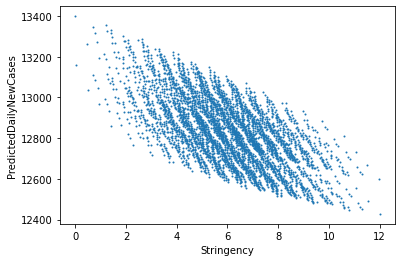

In [82]:
plt.scatter(df['Stringency'], df['PredictedDailyNewCases'], s = 1)
plt.xlabel('Stringency')
plt.ylabel('PredictedDailyNewCases');

In [83]:
def compute_pareto_set(objective1_list, objective2_list):
    """
    Return objective values for the subset of solutions that
    lie on the pareto front.
    """
    
    assert len(objective1_list) == len(objective2_list), \
            "Each solution must have a value for each objective."
        
    n_solutions = len(objective1_list)
    
    objective1_pareto = []
    objective2_pareto = []
    for i in range(n_solutions):
        is_in_pareto_set = True
        for j in range(n_solutions):
            if (objective1_list[j] < objective1_list[i]) and \
                    (objective2_list[j] < objective2_list[i]):
                is_in_pareto_set = False
        if is_in_pareto_set:
            objective1_pareto.append(objective1_list[i])         
            objective2_pareto.append(objective2_list[i])   
    
    return objective1_pareto, objective2_pareto

In [88]:
# Compute pareto set from full solution set.
objective1_pareto, objective2_pareto = compute_pareto_set(list(df['Stringency']), list(df['PredictedDailyNewCases']))

# Sort by first objective. 
objective1_pareto, objective2_pareto = list(zip(*sorted(zip(objective1_pareto,objective2_pareto))))

In [90]:
objective2_pareto

(13398.945652453933,
 13157.266454303739,
 13034.573021356577,
 12965.95741553662,
 12933.209618416731,
 12858.110009673712,
 12820.11163417529,
 12799.074380735026,
 12768.045980004928,
 12764.288856136849,
 12733.31080964256,
 12715.827156157142,
 12714.694915759294,
 12683.938209087584,
 12703.734317759485,
 12683.383574435491,
 12669.10559627802,
 12665.968674760461,
 12656.905907093324,
 12651.310793715085,
 12637.1608605158,
 12635.361583819127,
 12627.202769465237,
 12607.651602474303,
 12606.885272798856,
 12594.115296419657,
 12592.1396228014,
 12584.817544315312,
 12584.303144237045,
 12581.754907710421,
 12565.634944081034,
 12563.72768693304,
 12557.240852508203,
 12554.752957484372,
 12551.697906703312,
 12544.237374175049,
 12543.314941645096,
 12541.113697846458,
 12538.995076895186,
 12532.857568417032,
 12524.275910792203,
 12531.971806361136,
 12517.573038182985,
 12516.753452572735,
 12514.267230279826,
 12505.099947728624,
 12511.57642703228,
 12500.741941421224,
 1